# Using YOLOV8 for Object Detection on Custom Dataset for Pedestrian Attribute Detection

In [1]:
!nvidia-smi

Mon May 13 06:29:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              25W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

In [6]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True


  0%|                                               | 0.00/49.7M [00:00<?, ?B/s]


 62%|████████████████████████▏              | 30.8M/49.7M [00:00<00:00, 323MB/s]


100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 327MB/s]


Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs




  0%|                                                | 0.00/104k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 21.3MB/s]


image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 108.6ms
Speed: 10.4ms preprocess, 108.6ms inference, 449.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


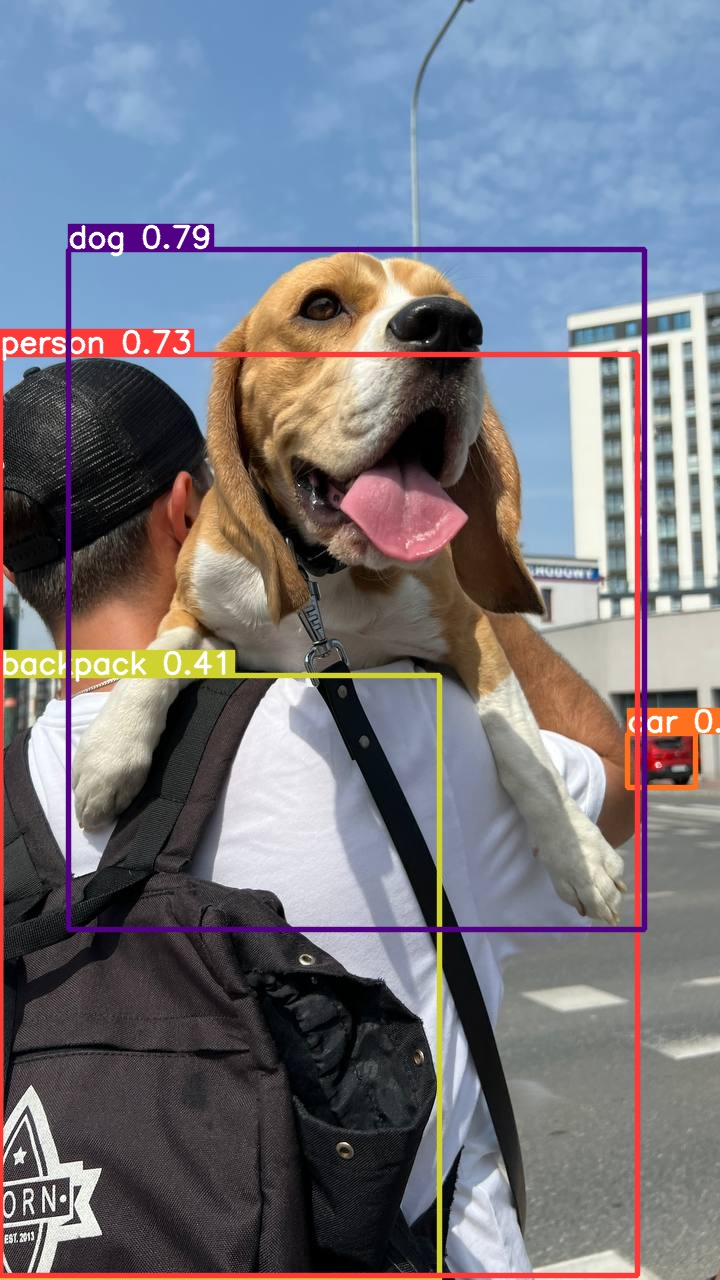

In [7]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [8]:
model = YOLO(f'yolov8m.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 85.7ms


Speed: 3.9ms preprocess, 85.7ms inference, 344.1ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[  68.5242,  249.5818,  644.2305,  929.1172],
        [   0.0000,  354.1622,  637.2100, 1275.3462],
        [ 627.4268,  733.7242,  695.9684,  787.4945],
        [   0.0000,  675.5507,  439.9560, 1279.5045]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.7889, 0.7302, 0.7294, 0.4113], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([16.,  0.,  2., 24.], device='cuda:0')

## Custom Training

In [17]:
!yolo task=detect mode=train model=yolov8m.pt data=/kaggle/input/fyp-datasetv2/data.yaml epochs=100 imgsz=800 plots=True  

New https://pypi.org/project/ultralytics/8.2.14 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/fyp-datasetv2/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=


  0%|                                                | 0.00/755k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 84.4MB/s]


2024-05-13 06:30:35.892029: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 06:30:35.892142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered


2024-05-13 06:30:36.019048: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Overriding model.yaml nc=80 with nc=51

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              


  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              


  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           


 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  2    517632  ultralytics.nn.modules.block.C2f             [576, 192, 2]                 
 16                  -1  1    332160  ultralytics.nn.modules.conv.Conv             [192, 192, 3, 2]              
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 


 22        [15, 18, 21]  1   3805225  ultralytics.nn.modules.head.Detect           [51, [192, 384, 576]]         


Model summary: 295 layers, 25885849 parameters, 25885833 gradients, 79.2 GFLOPs



Transferred 469/475 items from pretrained weights
TensorBoard: Start with 'tensorboard --logdir runs/detect/train', view at http://localhost:6006/


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...



  0%|                                               | 0.00/6.23M [00:00<?, ?B/s]


100%|███████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 237MB/s]


AMP: checks passed ✅



train: Scanning /kaggle/input/fyp-datasetv2/train/labels...:   0%|          | 0/


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 21 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 46 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 71 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 95 images, 0 backgro


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 119 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 143 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 170 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 195 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 220 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 244 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 270 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 296 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 321 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 346 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 371 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 397 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 422 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 448 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 473 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 499 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 525 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 549 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 574 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 599 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 623 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 647 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 672 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 699 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 724 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 749 images, 0 backgr


train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 773 images, 0 backgr
train: Scanning /kaggle/input/fyp-datasetv2/train/labels... 774 images, 0 backgr


train: WARNING ⚠️ Cache directory /kaggle/input/fyp-datasetv2/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/input/fyp-datasetv2/valid/labels...:   0%|          | 0/20


val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 18 images, 0 backgroun
val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 20 images, 0 backgroun
val: WARNING ⚠️ Cache directory /kaggle/input/fyp-datasetv2/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000182, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)


Image sizes 800 train, 800 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      1/100      10.2G      1.683      5.171      1.683        344        800:  
      1/100      10.2G      1.683      5.171      1.683        344        800:  


      1/100      10.2G      1.745      5.144      1.707        483        800:  
      1/100      10.2G      1.745      5.144      1.707        483        800:  


      1/100      10.2G      1.808      5.177      1.696        746        800:  
      1/100      10.2G      1.808      5.177      1.696        746        800:  


      1/100      10.2G      1.811      5.225      1.678        626        800:  
      1/100      10.2G      1.811      5.225      1.678        626        800:  


      1/100      10.2G      1.811      5.269      1.679        408        800:  
      1/100      10.2G      1.811      5.269      1.679        408        800:  


      1/100      10.8G      1.846      5.299       1.67       1005        800:  
      1/100      10.8G      1.846      5.299       1.67       1005        800:  


      1/100      10.8G      1.848      5.275      1.673        684        800:  
      1/100      10.8G      1.848      5.275      1.673        684        800:  


      1/100      10.8G      1.852      5.272      1.668        535        800:  
      1/100      10.8G      1.852      5.272      1.668        535        800:  


      1/100      10.8G      1.854      5.263      1.663        676        800:  
      1/100      10.8G      1.854      5.263      1.663        676        800:  


      1/100      10.8G      1.844      5.228      1.656        634        800:  
      1/100      10.8G      1.844      5.228      1.656        634        800:  


      1/100      10.8G      1.832      5.188      1.648        603        800:  
      1/100      10.8G      1.832      5.188      1.648        603        800:  


      1/100      10.8G       1.84      5.148      1.646        603        800:  
      1/100      10.8G       1.84      5.148      1.646        603        800:  


      1/100      10.8G      1.834      5.113       1.64        674        800:  
      1/100      10.8G      1.834      5.113       1.64        674        800:  


      1/100      10.8G      1.823      5.066      1.635        460        800:  
      1/100      10.8G      1.823      5.066      1.635        460        800:  


      1/100      10.8G      1.811      5.016       1.63        545        800:  
      1/100      10.8G      1.811      5.016       1.63        545        800:  


      1/100      10.8G      1.805      4.967      1.623        716        800:  
      1/100      10.8G      1.805      4.967      1.623        716        800:  


      1/100      10.8G      1.804      4.921      1.617        752        800:  
      1/100      10.8G      1.804      4.921      1.617        752        800:  


      1/100      10.8G      1.797      4.871      1.608        696        800:  
      1/100      10.8G      1.797      4.871      1.608        696        800:  


      1/100      10.8G      1.788      4.807      1.598        645        800:  
      1/100      10.8G      1.788      4.807      1.598        645        800:  


      1/100      10.8G      1.776      4.759       1.59        692        800:  
      1/100      10.8G      1.776      4.759       1.59        692        800:  


      1/100      10.8G      1.764      4.706       1.58        616        800:  
      1/100      10.8G      1.764      4.706       1.58        616        800:  


      1/100      10.8G      1.754       4.65      1.571        721        800:  
      1/100      10.8G      1.754       4.65      1.571        721        800:  


      1/100      10.8G      1.743      4.604      1.563        554        800:  
      1/100      10.8G      1.743      4.604      1.563        554        800:  


      1/100      10.8G      1.735       4.55      1.556        565        800:  
      1/100      10.8G      1.735       4.55      1.556        565        800:  


      1/100      10.8G      1.731      4.499       1.55        709        800:  
      1/100      10.8G      1.731      4.499       1.55        709        800:  


      1/100      10.8G      1.721      4.444      1.542        495        800:  
      1/100      10.8G      1.721      4.444      1.542        495        800:  


      1/100      10.8G      1.707      4.398      1.535        477        800:  
      1/100      10.8G      1.707      4.398      1.535        477        800:  


      1/100      10.8G      1.702      4.346      1.528        579        800:  
      1/100      10.8G      1.702      4.346      1.528        579        800:  


      1/100      10.8G      1.696      4.301      1.522        578        800:  
      1/100      10.8G      1.696      4.301      1.522        578        800:  


      1/100      10.8G      1.688      4.253      1.515        586        800:  
      1/100      10.8G      1.688      4.253      1.515        586        800:  


      1/100      10.8G      1.679      4.209      1.507        708        800:  


      1/100      10.8G      1.679      4.209      1.507        708        800:  


      1/100      10.8G      1.674      4.163      1.502        682        800:  
      1/100      10.8G      1.674      4.163      1.502        682        800:  


      1/100      10.8G      1.667      4.118      1.494        643        800:  
      1/100      10.8G      1.667      4.118      1.494        643        800:  


      1/100      10.8G      1.659      4.077      1.488        644        800:  
      1/100      10.8G      1.659      4.077      1.488        644        800:  


      1/100      10.8G      1.652      4.037      1.482        682        800:  
      1/100      10.8G      1.652      4.037      1.482        682        800:  


      1/100      10.8G      1.649      3.997      1.477        811        800:  
      1/100      10.8G      1.649      3.997      1.477        811        800:  


      1/100      10.8G      1.642      3.958      1.472        599        800:  
      1/100      10.8G      1.642      3.958      1.472        599        800:  


      1/100      10.8G      1.635      3.922      1.466        757        800:  
      1/100      10.8G      1.635      3.922      1.466        757        800:  


      1/100      10.8G       1.63      3.888      1.461        611        800:  
      1/100      10.8G       1.63      3.888      1.461        611        800:  


      1/100      10.8G      1.626      3.851      1.456        627        800:  
      1/100      10.8G      1.626      3.851      1.456        627        800:  


      1/100      10.8G      1.622      3.818      1.451        712        800:  
      1/100      10.8G      1.622      3.818      1.451        712        800:  


      1/100      10.8G      1.617       3.79      1.449        498        800:  
      1/100      10.8G      1.617       3.79      1.449        498        800:  


      1/100      10.8G      1.611      3.759      1.446        500        800:  
      1/100      10.8G      1.611      3.759      1.446        500        800:  


      1/100      10.8G      1.608      3.731      1.446        386        800:  
      1/100      10.8G      1.608      3.731      1.446        386        800:  


      1/100      10.8G      1.602      3.699       1.44        681        800:  
      1/100      10.8G      1.602      3.699       1.44        681        800:  


      1/100      10.8G      1.598      3.669      1.436        559        800:  
      1/100      10.8G      1.598      3.669      1.436        559        800:  


      1/100      10.8G      1.594      3.641      1.431        833        800:  
      1/100      10.8G      1.594      3.641      1.431        833        800:  


      1/100      10.8G      1.588      3.612      1.428        516        800:  
      1/100      10.8G      1.588      3.612      1.428        516        800:  


      1/100      10.8G       1.58      3.584      1.423        239        800:  
      1/100      10.8G       1.58      3.584      1.423        239        800: 1
      1/100      10.8G       1.58      3.584      1.423        239        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.549       0.19      0.127      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      2/100      11.6G      1.414      2.285      1.251        723        800:  
      2/100      11.6G      1.414      2.285      1.251        723        800:  


      2/100      11.6G      1.387      2.268       1.22        866        800:  
      2/100      11.6G      1.387      2.268       1.22        866        800:  


      2/100      11.6G      1.391      2.249      1.228        598        800:  
      2/100      11.6G      1.391      2.249      1.228        598        800:  


      2/100      11.6G      1.391      2.235      1.216        792        800:  
      2/100      11.6G      1.391      2.235      1.216        792        800:  


      2/100      11.6G      1.379      2.235      1.226        559        800:  
      2/100      11.6G      1.379      2.235      1.226        559        800:  


      2/100      11.6G      1.388      2.206      1.227        783        800:  
      2/100      11.6G      1.388      2.206      1.227        783        800:  


      2/100      11.6G      1.392      2.205      1.226        704        800:  
      2/100      11.6G      1.392      2.205      1.226        704        800:  


      2/100      11.6G      1.393      2.197      1.223        759        800:  
      2/100      11.6G      1.393      2.197      1.223        759        800:  


      2/100      11.6G      1.379      2.195      1.222        655        800:  
      2/100      11.6G      1.379      2.195      1.222        655        800:  


      2/100      11.6G      1.371      2.186      1.222        584        800:  
      2/100      11.6G      1.371      2.186      1.222        584        800:  


      2/100      11.6G       1.37      2.177      1.222        685        800:  
      2/100      11.6G       1.37      2.177      1.222        685        800:  


      2/100      11.6G      1.364      2.168      1.221        512        800:  
      2/100      11.6G      1.364      2.168      1.221        512        800:  


      2/100      11.6G      1.355      2.158      1.223        496        800:  
      2/100      11.6G      1.355      2.158      1.223        496        800:  


      2/100      11.6G      1.355      2.152      1.221        768        800:  
      2/100      11.6G      1.355      2.152      1.221        768        800:  


      2/100      11.6G      1.356      2.145      1.221        602        800:  
      2/100      11.6G      1.356      2.145      1.221        602        800:  


      2/100      11.6G      1.355       2.14      1.225        480        800:  
      2/100      11.6G      1.355       2.14      1.225        480        800:  


      2/100      11.6G       1.35      2.132      1.222        655        800:  
      2/100      11.6G       1.35      2.132      1.222        655        800:  


      2/100      11.6G      1.349      2.122      1.218        580        800:  
      2/100      11.6G      1.349      2.122      1.218        580        800:  


      2/100      11.6G      1.348      2.115      1.218        579        800:  
      2/100      11.6G      1.348      2.115      1.218        579        800:  


      2/100      11.6G      1.351       2.11      1.216        685        800:  
      2/100      11.6G      1.351       2.11      1.216        685        800:  


      2/100      11.6G      1.347      2.099      1.214        798        800:  
      2/100      11.6G      1.347      2.099      1.214        798        800:  


      2/100      11.6G      1.341      2.095      1.213        569        800:  
      2/100      11.6G      1.341      2.095      1.213        569        800:  


      2/100      11.6G      1.345      2.091      1.218        524        800:  
      2/100      11.6G      1.345      2.091      1.218        524        800:  


      2/100      11.6G      1.343      2.084      1.217        549        800:  
      2/100      11.6G      1.343      2.084      1.217        549        800:  


      2/100      11.6G      1.342      2.077      1.217        678        800:  
      2/100      11.6G      1.342      2.077      1.217        678        800:  


      2/100      11.6G      1.341       2.07      1.218        534        800:  
      2/100      11.6G      1.341       2.07      1.218        534        800:  


      2/100      11.6G      1.337       2.06      1.216        611        800:  
      2/100      11.6G      1.337       2.06      1.216        611        800:  


      2/100      11.6G      1.336      2.051      1.215        583        800:  
      2/100      11.6G      1.336      2.051      1.215        583        800:  


      2/100      11.6G      1.333      2.045      1.213        759        800:  
      2/100      11.6G      1.333      2.045      1.213        759        800:  


      2/100      11.6G      1.332      2.038      1.212        521        800:  
      2/100      11.6G      1.332      2.038      1.212        521        800:  


      2/100      11.6G      1.328      2.032      1.214        479        800:  
      2/100      11.6G      1.328      2.032      1.214        479        800:  


      2/100      11.6G      1.326      2.028      1.212        730        800:  
      2/100      11.6G      1.326      2.028      1.212        730        800:  


      2/100      11.6G      1.323      2.022      1.209        781        800:  
      2/100      11.6G      1.323      2.022      1.209        781        800:  


      2/100      11.6G      1.323       2.02       1.21        507        800:  
      2/100      11.6G      1.323       2.02       1.21        507        800:  


      2/100      11.6G      1.318      2.015      1.209        604        800:  
      2/100      11.6G      1.318      2.015      1.209        604        800:  


      2/100      11.6G      1.319      2.011      1.208        681        800:  
      2/100      11.6G      1.319      2.011      1.208        681        800:  


      2/100      11.6G      1.318      2.007      1.207        808        800:  
      2/100      11.6G      1.318      2.007      1.207        808        800:  


      2/100      11.6G      1.319      2.006      1.207        643        800:  
      2/100      11.6G      1.319      2.006      1.207        643        800:  


      2/100      11.6G      1.318          2      1.207        686        800:  
      2/100      11.6G      1.318          2      1.207        686        800:  


      2/100      11.6G      1.317      1.992      1.206        888        800:  
      2/100      11.6G      1.317      1.992      1.206        888        800:  


      2/100      11.6G      1.315      1.988      1.204        691        800:  
      2/100      11.6G      1.315      1.988      1.204        691        800:  


      2/100      11.6G      1.314      1.984      1.204        632        800:  
      2/100      11.6G      1.314      1.984      1.204        632        800:  


      2/100      11.6G      1.312      1.978      1.203        641        800:  
      2/100      11.6G      1.312      1.978      1.203        641        800:  


      2/100      11.6G      1.308      1.972      1.202        587        800:  
      2/100      11.6G      1.308      1.972      1.202        587        800:  


      2/100      11.6G      1.308      1.968      1.202        533        800:  
      2/100      11.6G      1.308      1.968      1.202        533        800:  


      2/100      11.6G      1.307      1.964      1.203        595        800:  
      2/100      11.6G      1.307      1.964      1.203        595        800:  


      2/100      11.6G      1.306      1.958      1.201        782        800:  
      2/100      11.6G      1.306      1.958      1.201        782        800:  


      2/100      11.6G      1.305      1.953      1.199        864        800:  
      2/100      11.6G      1.305      1.953      1.199        864        800:  


      2/100      11.6G      1.305      1.951      1.199        270        800:  
      2/100      11.6G      1.305      1.951      1.199        270        800: 1
      2/100      11.6G      1.305      1.951      1.199        270        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.362      0.332      0.268      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      3/100      10.6G      1.269      1.682      1.162        619        800:  
      3/100      10.6G      1.269      1.682      1.162        619        800:  


      3/100      10.6G      1.284       1.73      1.137        851        800:  
      3/100      10.6G      1.284       1.73      1.137        851        800:  


      3/100      10.6G      1.257      1.699      1.148        611        800:  
      3/100      10.6G      1.257      1.699      1.148        611        800:  


      3/100      10.6G      1.262      1.713      1.155        566        800:  
      3/100      10.6G      1.262      1.713      1.155        566        800:  


      3/100      10.6G       1.26      1.714      1.168        488        800:  
      3/100      10.6G       1.26      1.714      1.168        488        800:  


      3/100      10.6G       1.25      1.697      1.165        620        800:  


      3/100      10.6G       1.25      1.697      1.165        620        800:  


      3/100      10.6G      1.249      1.688      1.166        679        800:  
      3/100      10.6G      1.249      1.688      1.166        679        800:  


      3/100      10.6G      1.249      1.674      1.161        654        800:  
      3/100      10.6G      1.249      1.674      1.161        654        800:  


      3/100      10.6G      1.244      1.671       1.16        629        800:  
      3/100      10.6G      1.244      1.671       1.16        629        800:  


      3/100      10.6G       1.24      1.663      1.155        651        800:  
      3/100      10.6G       1.24      1.663      1.155        651        800:  


      3/100      10.6G      1.239      1.656      1.151        777        800:  
      3/100      10.6G      1.239      1.656      1.151        777        800:  


      3/100      10.6G      1.236      1.656      1.152        517        800:  
      3/100      10.6G      1.236      1.656      1.152        517        800:  


      3/100      10.6G      1.235      1.654      1.153        654        800:  
      3/100      10.6G      1.235      1.654      1.153        654        800:  


      3/100      10.6G      1.236       1.65      1.152        709        800:  
      3/100      10.6G      1.236       1.65      1.152        709        800:  


      3/100      10.6G      1.231      1.634      1.148        676        800:  
      3/100      10.6G      1.231      1.634      1.148        676        800:  


      3/100      10.6G      1.235      1.631      1.148        688        800:  
      3/100      10.6G      1.235      1.631      1.148        688        800:  


      3/100      10.6G      1.234      1.626      1.147        593        800:  
      3/100      10.6G      1.234      1.626      1.147        593        800:  


      3/100      10.6G      1.233      1.624      1.147        749        800:  
      3/100      10.6G      1.233      1.624      1.147        749        800:  


      3/100      10.6G      1.233      1.624      1.146        643        800:  
      3/100      10.6G      1.233      1.624      1.146        643        800:  


      3/100      10.6G       1.23       1.62      1.144        538        800:  
      3/100      10.6G       1.23       1.62      1.144        538        800:  


      3/100      10.6G       1.23      1.617      1.143        667        800:  
      3/100      10.6G       1.23      1.617      1.143        667        800:  


      3/100      10.6G      1.231      1.617      1.145        581        800:  


      3/100      10.6G      1.231      1.617      1.145        581        800:  


      3/100      10.6G      1.232      1.618      1.149        441        800:  
      3/100      10.6G      1.232      1.618      1.149        441        800:  


      3/100      10.6G      1.232      1.619      1.151        496        800:  
      3/100      10.6G      1.232      1.619      1.151        496        800:  


      3/100      10.6G      1.231      1.619      1.152        494        800:  
      3/100      10.6G      1.231      1.619      1.152        494        800:  


      3/100      11.1G      1.231      1.619      1.151        842        800:  
      3/100      11.1G      1.231      1.619      1.151        842        800:  


      3/100      11.1G       1.23      1.617      1.151        635        800:  
      3/100      11.1G       1.23      1.617      1.151        635        800:  


      3/100      11.1G       1.23      1.612      1.151        668        800:  
      3/100      11.1G       1.23      1.612      1.151        668        800:  


      3/100      11.1G      1.229       1.61       1.15        686        800:  
      3/100      11.1G      1.229       1.61       1.15        686        800:  


      3/100      11.1G      1.226      1.606      1.149        611        800:  
      3/100      11.1G      1.226      1.606      1.149        611        800:  


      3/100      11.1G      1.224      1.602      1.148        664        800:  
      3/100      11.1G      1.224      1.602      1.148        664        800:  


      3/100      11.1G      1.223      1.599      1.149        457        800:  
      3/100      11.1G      1.223      1.599      1.149        457        800:  


      3/100      11.1G      1.221      1.593      1.148        664        800:  
      3/100      11.1G      1.221      1.593      1.148        664        800:  


      3/100      11.1G      1.219      1.587      1.148        602        800:  
      3/100      11.1G      1.219      1.587      1.148        602        800:  


      3/100      11.1G      1.218      1.584      1.148        584        800:  
      3/100      11.1G      1.218      1.584      1.148        584        800:  


      3/100      11.1G      1.217       1.58      1.147        734        800:  
      3/100      11.1G      1.217       1.58      1.147        734        800:  


      3/100      11.1G      1.218      1.576      1.147        843        800:  
      3/100      11.1G      1.218      1.576      1.147        843        800:  


      3/100      11.1G      1.216      1.573      1.146        726        800:  
      3/100      11.1G      1.216      1.573      1.146        726        800:  


      3/100      11.1G      1.215       1.57      1.145        541        800:  
      3/100      11.1G      1.215       1.57      1.145        541        800:  


      3/100      11.1G      1.214      1.567      1.144        718        800:  
      3/100      11.1G      1.214      1.567      1.144        718        800:  


      3/100      11.1G      1.213      1.564      1.143        756        800:  
      3/100      11.1G      1.213      1.564      1.143        756        800:  


      3/100      11.1G      1.213      1.561      1.142        748        800:  
      3/100      11.1G      1.213      1.561      1.142        748        800:  


      3/100      11.1G      1.213       1.56      1.143        506        800:  
      3/100      11.1G      1.213       1.56      1.143        506        800:  


      3/100      11.1G      1.213      1.558      1.143        706        800:  
      3/100      11.1G      1.213      1.558      1.143        706        800:  


      3/100      11.1G      1.213      1.556      1.142        708        800:  
      3/100      11.1G      1.213      1.556      1.142        708        800:  


      3/100      11.1G      1.212      1.553      1.142        667        800:  
      3/100      11.1G      1.212      1.553      1.142        667        800:  


      3/100      11.1G      1.212       1.55      1.141        669        800:  
      3/100      11.1G      1.212       1.55      1.141        669        800:  


      3/100      11.1G      1.212      1.549       1.14        675        800:  
      3/100      11.1G      1.212      1.549       1.14        675        800:  


      3/100      11.1G      1.211      1.547       1.14        219        800:  


      3/100      11.1G      1.211      1.547       1.14        219        800: 1
      3/100      11.1G      1.211      1.547       1.14        219        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.493      0.308      0.342      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      4/100      10.8G      1.195      1.397      1.105        735        800:  
      4/100      10.8G      1.195      1.397      1.105        735        800:  


      4/100      10.8G      1.176      1.402      1.137        521        800:  
      4/100      10.8G      1.176      1.402      1.137        521        800:  


      4/100      10.8G      1.179      1.422      1.119        816        800:  
      4/100      10.8G      1.179      1.422      1.119        816        800:  


      4/100      11.4G      1.172      1.414      1.107        785        800:  
      4/100      11.4G      1.172      1.414      1.107        785        800:  


      4/100      11.4G      1.199      1.457      1.164        346        800:  
      4/100      11.4G      1.199      1.457      1.164        346        800:  


      4/100      11.4G       1.19      1.435      1.156        716        800:  
      4/100      11.4G       1.19      1.435      1.156        716        800:  


      4/100      11.4G      1.193      1.434      1.149        754        800:  
      4/100      11.4G      1.193      1.434      1.149        754        800:  


      4/100      11.4G       1.19      1.429       1.14        779        800:  
      4/100      11.4G       1.19      1.429       1.14        779        800:  


      4/100      11.4G      1.183      1.421      1.135        637        800:  
      4/100      11.4G      1.183      1.421      1.135        637        800:  


      4/100      11.4G      1.182      1.424      1.136        671        800:  
      4/100      11.4G      1.182      1.424      1.136        671        800:  


      4/100      11.4G      1.187      1.417      1.132        769        800:  
      4/100      11.4G      1.187      1.417      1.132        769        800:  


      4/100      11.4G      1.186      1.418      1.134        531        800:  
      4/100      11.4G      1.186      1.418      1.134        531        800:  


      4/100      11.4G      1.182      1.412      1.133        533        800:  
      4/100      11.4G      1.182      1.412      1.133        533        800:  


      4/100      11.4G      1.185      1.405      1.129        753        800:  
      4/100      11.4G      1.185      1.405      1.129        753        800:  


      4/100      11.4G      1.187      1.404       1.13        734        800:  
      4/100      11.4G      1.187      1.404       1.13        734        800:  


      4/100      11.4G      1.188      1.403      1.132        547        800:  
      4/100      11.4G      1.188      1.403      1.132        547        800:  


      4/100      11.4G      1.187      1.402      1.134        595        800:  
      4/100      11.4G      1.187      1.402      1.134        595        800:  


      4/100      11.4G      1.187      1.402      1.134        552        800:  
      4/100      11.4G      1.187      1.402      1.134        552        800:  


      4/100      11.4G      1.185      1.401      1.136        458        800:  
      4/100      11.4G      1.185      1.401      1.136        458        800:  


      4/100      11.4G      1.183      1.398      1.135        618        800:  
      4/100      11.4G      1.183      1.398      1.135        618        800:  


      4/100      11.4G      1.183      1.393      1.133        703        800:  
      4/100      11.4G      1.183      1.393      1.133        703        800:  


      4/100      11.4G      1.184      1.394      1.136        459        800:  
      4/100      11.4G      1.184      1.394      1.136        459        800:  


      4/100      11.4G      1.181      1.396      1.136        638        800:  
      4/100      11.4G      1.181      1.396      1.136        638        800:  


      4/100      11.4G      1.182      1.394      1.134        608        800:  
      4/100      11.4G      1.182      1.394      1.134        608        800:  


      4/100      11.4G       1.18       1.39      1.133        579        800:  
      4/100      11.4G       1.18       1.39      1.133        579        800:  


      4/100      11.4G      1.176      1.389      1.132        609        800:  
      4/100      11.4G      1.176      1.389      1.132        609        800:  


      4/100      11.4G      1.177      1.386      1.129        843        800:  
      4/100      11.4G      1.177      1.386      1.129        843        800:  


      4/100      11.4G      1.174      1.382       1.13        511        800:  
      4/100      11.4G      1.174      1.382       1.13        511        800:  


      4/100      11.4G      1.173      1.379      1.129        604        800:  
      4/100      11.4G      1.173      1.379      1.129        604        800:  


      4/100      11.4G      1.171      1.374      1.126        796        800:  
      4/100      11.4G      1.171      1.374      1.126        796        800:  


      4/100      11.4G      1.168      1.373      1.125        720        800:  
      4/100      11.4G      1.168      1.373      1.125        720        800:  


      4/100      11.4G      1.166      1.372      1.125        597        800:  
      4/100      11.4G      1.166      1.372      1.125        597        800:  


      4/100      11.4G      1.166      1.369      1.125        673        800:  
      4/100      11.4G      1.166      1.369      1.125        673        800:  


      4/100      11.4G      1.166      1.367      1.124        590        800:  
      4/100      11.4G      1.166      1.367      1.124        590        800:  


      4/100      11.4G      1.166      1.366      1.126        516        800:  
      4/100      11.4G      1.166      1.366      1.126        516        800:  


      4/100      11.4G      1.167      1.368      1.128        406        800:  
      4/100      11.4G      1.167      1.368      1.128        406        800:  


      4/100      11.4G      1.166      1.369      1.129        497        800:  
      4/100      11.4G      1.166      1.369      1.129        497        800:  


      4/100      11.4G      1.166      1.367      1.128        826        800:  
      4/100      11.4G      1.166      1.367      1.128        826        800:  


      4/100      11.4G      1.164      1.364      1.128        561        800:  
      4/100      11.4G      1.164      1.364      1.128        561        800:  


      4/100      11.4G      1.164      1.361      1.127        837        800:  
      4/100      11.4G      1.164      1.361      1.127        837        800:  


      4/100      11.4G      1.164      1.364      1.128        504        800:  
      4/100      11.4G      1.164      1.364      1.128        504        800:  


      4/100      11.4G      1.164      1.363      1.128        738        800:  
      4/100      11.4G      1.164      1.363      1.128        738        800:  


      4/100      11.4G      1.164       1.36      1.127        596        800:  
      4/100      11.4G      1.164       1.36      1.127        596        800:  


      4/100      11.4G      1.164      1.357      1.126        942        800:  
      4/100      11.4G      1.164      1.357      1.126        942        800:  


      4/100      11.4G      1.164      1.356      1.126        650        800:  
      4/100      11.4G      1.164      1.356      1.126        650        800:  


      4/100      11.4G      1.164      1.354      1.126        641        800:  
      4/100      11.4G      1.164      1.354      1.126        641        800:  


      4/100      11.4G      1.166      1.354      1.127        586        800:  
      4/100      11.4G      1.166      1.354      1.127        586        800:  


      4/100      11.4G      1.166      1.353      1.126        882        800:  
      4/100      11.4G      1.166      1.353      1.126        882        800:  


      4/100      11.4G      1.169      1.351      1.126        363        800:  
      4/100      11.4G      1.169      1.351      1.126        363        800: 1
      4/100      11.4G      1.169      1.351      1.126        363        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.511      0.403      0.401      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      5/100      10.6G      1.131      1.234      1.062        933        800:  
      5/100      10.6G      1.131      1.234      1.062        933        800:  


      5/100      10.6G      1.145      1.294      1.102        528        800:  
      5/100      10.6G      1.145      1.294      1.102        528        800:  


      5/100      10.6G      1.151       1.27      1.092        779        800:  
      5/100      10.6G      1.151       1.27      1.092        779        800:  


      5/100      10.6G      1.157      1.257      1.091        686        800:  
      5/100      10.6G      1.157      1.257      1.091        686        800:  


      5/100      10.6G      1.157      1.261      1.098        557        800:  
      5/100      10.6G      1.157      1.261      1.098        557        800:  


      5/100      10.6G       1.16      1.276      1.105        658        800:  
      5/100      10.6G       1.16      1.276      1.105        658        800:  


      5/100      10.6G      1.151      1.273      1.103        592        800:  


      5/100      10.6G      1.151      1.273      1.103        592        800:  


      5/100      10.6G      1.143      1.271      1.101        638        800:  
      5/100      10.6G      1.143      1.271      1.101        638        800:  


      5/100      10.6G       1.15      1.267      1.103        767        800:  
      5/100      10.6G       1.15      1.267      1.103        767        800:  


      5/100      10.6G      1.144      1.263      1.104        553        800:  
      5/100      10.6G      1.144      1.263      1.104        553        800:  


      5/100      10.6G      1.142      1.257      1.098       1017        800:  
      5/100      10.6G      1.142      1.257      1.098       1017        800:  


      5/100      10.6G      1.144      1.249      1.098        675        800:  
      5/100      10.6G      1.144      1.249      1.098        675        800:  


      5/100      10.6G      1.145      1.251      1.097        790        800:  
      5/100      10.6G      1.145      1.251      1.097        790        800:  


      5/100      10.6G      1.142      1.248      1.096        723        800:  
      5/100      10.6G      1.142      1.248      1.096        723        800:  


      5/100      10.6G       1.14      1.249      1.097        531        800:  
      5/100      10.6G       1.14      1.249      1.097        531        800:  


      5/100      10.6G      1.143      1.253        1.1        570        800:  
      5/100      10.6G      1.143      1.253        1.1        570        800:  


      5/100      10.6G      1.144      1.249      1.101        649        800:  
      5/100      10.6G      1.144      1.249      1.101        649        800:  


      5/100      10.6G      1.138      1.248      1.098        639        800:  
      5/100      10.6G      1.138      1.248      1.098        639        800:  


      5/100      10.6G      1.136      1.246      1.098        737        800:  
      5/100      10.6G      1.136      1.246      1.098        737        800:  


      5/100      10.6G      1.141      1.247      1.102        507        800:  
      5/100      10.6G      1.141      1.247      1.102        507        800:  


      5/100      10.6G      1.139      1.245      1.101        557        800:  
      5/100      10.6G      1.139      1.245      1.101        557        800:  


      5/100      10.6G      1.141      1.245      1.101        802        800:  
      5/100      10.6G      1.141      1.245      1.101        802        800:  


      5/100      10.6G      1.139      1.245        1.1        673        800:  
      5/100      10.6G      1.139      1.245        1.1        673        800:  


      5/100      10.6G      1.139      1.242      1.098        686        800:  
      5/100      10.6G      1.139      1.242      1.098        686        800:  


      5/100      10.6G       1.14      1.241      1.102        513        800:  
      5/100      10.6G       1.14      1.241      1.102        513        800:  


      5/100      10.6G      1.138      1.236      1.099        848        800:  
      5/100      10.6G      1.138      1.236      1.099        848        800:  


      5/100      10.6G      1.139      1.235        1.1        583        800:  
      5/100      10.6G      1.139      1.235        1.1        583        800:  


      5/100      10.6G      1.139      1.238        1.1        600        800:  
      5/100      10.6G      1.139      1.238        1.1        600        800:  


      5/100      10.6G      1.136      1.235        1.1        670        800:  
      5/100      10.6G      1.136      1.235        1.1        670        800:  


      5/100      10.6G      1.134      1.231        1.1        697        800:  
      5/100      10.6G      1.134      1.231        1.1        697        800:  


      5/100      10.6G      1.134      1.229        1.1        739        800:  
      5/100      10.6G      1.134      1.229        1.1        739        800:  


      5/100      10.6G      1.136       1.23      1.103        522        800:  
      5/100      10.6G      1.136       1.23      1.103        522        800:  


      5/100      10.6G      1.134      1.229      1.103        665        800:  
      5/100      10.6G      1.134      1.229      1.103        665        800:  


      5/100      10.6G      1.134      1.231      1.104        538        800:  
      5/100      10.6G      1.134      1.231      1.104        538        800:  


      5/100      10.6G      1.135      1.236      1.108        277        800:  
      5/100      10.6G      1.135      1.236      1.108        277        800:  


      5/100      10.6G      1.133      1.239      1.109        501        800:  
      5/100      10.6G      1.133      1.239      1.109        501        800:  


      5/100      10.6G      1.133      1.237      1.109        542        800:  
      5/100      10.6G      1.133      1.237      1.109        542        800:  


      5/100      10.6G      1.132      1.235      1.108        864        800:  
      5/100      10.6G      1.132      1.235      1.108        864        800:  


      5/100      10.6G      1.135       1.24       1.11        480        800:  
      5/100      10.6G      1.135       1.24       1.11        480        800:  


      5/100      10.6G      1.135      1.237      1.109        739        800:  
      5/100      10.6G      1.135      1.237      1.109        739        800:  


      5/100      10.6G      1.134      1.234      1.109        657        800:  
      5/100      10.6G      1.134      1.234      1.109        657        800:  


      5/100      10.6G      1.135      1.233      1.107        976        800:  
      5/100      10.6G      1.135      1.233      1.107        976        800:  


      5/100      10.6G      1.133      1.231      1.107        639        800:  
      5/100      10.6G      1.133      1.231      1.107        639        800:  


      5/100      10.6G      1.131      1.231      1.108        388        800:  
      5/100      10.6G      1.131      1.231      1.108        388        800:  


      5/100      10.6G      1.131       1.23      1.107        686        800:  
      5/100      10.6G      1.131       1.23      1.107        686        800:  


      5/100      10.6G      1.132      1.229      1.108        650        800:  
      5/100      10.6G      1.132      1.229      1.108        650        800:  


      5/100      10.6G      1.131      1.227      1.107        717        800:  
      5/100      10.6G      1.131      1.227      1.107        717        800:  


      5/100      10.6G      1.129      1.225      1.106        767        800:  
      5/100      10.6G      1.129      1.225      1.106        767        800:  


      5/100      10.6G      1.128      1.227      1.107        144        800:  
      5/100      10.6G      1.128      1.227      1.107        144        800: 1
      5/100      10.6G      1.128      1.227      1.107        144        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.687      0.322      0.408      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      6/100      10.5G      1.086       1.12      1.094        687        800:  
      6/100      10.5G      1.086       1.12      1.094        687        800:  


      6/100      10.5G      1.088      1.177      1.117        446        800:  
      6/100      10.5G      1.088      1.177      1.117        446        800:  


      6/100      10.5G      1.078      1.173      1.107        588        800:  
      6/100      10.5G      1.078      1.173      1.107        588        800:  


      6/100      10.5G      1.079      1.172      1.123        484        800:  
      6/100      10.5G      1.079      1.172      1.123        484        800:  


      6/100      10.5G      1.095      1.188      1.132        558        800:  
      6/100      10.5G      1.095      1.188      1.132        558        800:  


      6/100      10.5G      1.094      1.184      1.128        550        800:  
      6/100      10.5G      1.094      1.184      1.128        550        800:  


      6/100      10.5G      1.093       1.19      1.133        401        800:  
      6/100      10.5G      1.093       1.19      1.133        401        800:  


      6/100      10.5G      1.091      1.175      1.129        642        800:  
      6/100      10.5G      1.091      1.175      1.129        642        800:  


      6/100      10.5G      1.109      1.196      1.132        645        800:  
      6/100      10.5G      1.109      1.196      1.132        645        800:  


      6/100      10.5G      1.108      1.194      1.124        693        800:  
      6/100      10.5G      1.108      1.194      1.124        693        800:  


      6/100      10.5G      1.113      1.197      1.123        623        800:  
      6/100      10.5G      1.113      1.197      1.123        623        800:  


      6/100      10.5G      1.113      1.193      1.118        652        800:  
      6/100      10.5G      1.113      1.193      1.118        652        800:  


      6/100      10.5G      1.114      1.194      1.117        802        800:  
      6/100      10.5G      1.114      1.194      1.117        802        800:  


      6/100      10.5G      1.109      1.194      1.116        631        800:  
      6/100      10.5G      1.109      1.194      1.116        631        800:  


      6/100      10.5G      1.108      1.191      1.116        563        800:  
      6/100      10.5G      1.108      1.191      1.116        563        800:  


      6/100      10.5G      1.107      1.195      1.114        574        800:  
      6/100      10.5G      1.107      1.195      1.114        574        800:  


      6/100      10.5G      1.109      1.189      1.112        846        800:  
      6/100      10.5G      1.109      1.189      1.112        846        800:  


      6/100      10.5G      1.107      1.185       1.11        861        800:  
      6/100      10.5G      1.107      1.185       1.11        861        800:  


      6/100      10.5G      1.106      1.182       1.11        660        800:  
      6/100      10.5G      1.106      1.182       1.11        660        800:  


      6/100      10.5G      1.107      1.181      1.108        671        800:  
      6/100      10.5G      1.107      1.181      1.108        671        800:  


      6/100      10.5G      1.104      1.183      1.108        468        800:  
      6/100      10.5G      1.104      1.183      1.108        468        800:  


      6/100      10.5G      1.104      1.184      1.109        588        800:  
      6/100      10.5G      1.104      1.184      1.109        588        800:  


      6/100      10.5G      1.102      1.185      1.108        483        800:  
      6/100      10.5G      1.102      1.185      1.108        483        800:  


      6/100      10.5G      1.102      1.186       1.11        499        800:  
      6/100      10.5G      1.102      1.186       1.11        499        800:  


      6/100      10.5G      1.104      1.183       1.11        527        800:  
      6/100      10.5G      1.104      1.183       1.11        527        800:  


      6/100      10.5G      1.105      1.183      1.115        456        800:  
      6/100      10.5G      1.105      1.183      1.115        456        800:  


      6/100      10.5G      1.105      1.181      1.114        595        800:  
      6/100      10.5G      1.105      1.181      1.114        595        800:  


      6/100      10.5G      1.105      1.181      1.116        474        800:  
      6/100      10.5G      1.105      1.181      1.116        474        800:  


      6/100      10.5G      1.104       1.18      1.115        574        800:  
      6/100      10.5G      1.104       1.18      1.115        574        800:  


      6/100      11.1G      1.105      1.176      1.113        844        800:  
      6/100      11.1G      1.105      1.176      1.113        844        800:  


      6/100      11.1G      1.104      1.174      1.112        631        800:  
      6/100      11.1G      1.104      1.174      1.112        631        800:  


      6/100      11.1G      1.103      1.171      1.111        631        800:  
      6/100      11.1G      1.103      1.171      1.111        631        800:  


      6/100      11.1G      1.104      1.172      1.113        499        800:  
      6/100      11.1G      1.104      1.172      1.113        499        800:  


      6/100      11.1G      1.103      1.168       1.11        829        800:  
      6/100      11.1G      1.103      1.168       1.11        829        800:  


      6/100      11.1G      1.102      1.167      1.109        559        800:  
      6/100      11.1G      1.102      1.167      1.109        559        800:  


      6/100      11.1G      1.101      1.165      1.109        547        800:  
      6/100      11.1G      1.101      1.165      1.109        547        800:  


      6/100      11.1G        1.1      1.164      1.107        981        800:  
      6/100      11.1G        1.1      1.164      1.107        981        800:  


      6/100      11.1G        1.1      1.162      1.107        567        800:  
      6/100      11.1G        1.1      1.162      1.107        567        800:  


      6/100      11.1G        1.1       1.16      1.105        709        800:  
      6/100      11.1G        1.1       1.16      1.105        709        800:  


      6/100      11.1G      1.101      1.159      1.104        797        800:  
      6/100      11.1G      1.101      1.159      1.104        797        800:  


      6/100      11.1G        1.1      1.156      1.103        712        800:  
      6/100      11.1G        1.1      1.156      1.103        712        800:  


      6/100      11.1G      1.102      1.154      1.104        688        800:  
      6/100      11.1G      1.102      1.154      1.104        688        800:  


      6/100      11.1G      1.101      1.153      1.103        677        800:  
      6/100      11.1G      1.101      1.153      1.103        677        800:  


      6/100      11.1G        1.1      1.151      1.103        547        800:  
      6/100      11.1G        1.1      1.151      1.103        547        800:  


      6/100      11.1G      1.101       1.15      1.102        729        800:  
      6/100      11.1G      1.101       1.15      1.102        729        800:  


      6/100      11.1G      1.102      1.149      1.101        954        800:  
      6/100      11.1G      1.102      1.149      1.101        954        800:  


      6/100      11.1G      1.101      1.147        1.1        705        800:  
      6/100      11.1G      1.101      1.147        1.1        705        800:  


      6/100      11.1G      1.101      1.146      1.101        556        800:  
      6/100      11.1G      1.101      1.146      1.101        556        800:  


      6/100      11.1G      1.101      1.145      1.104        116        800:  
      6/100      11.1G      1.101      1.145      1.104        116        800: 1
      6/100      11.1G      1.101      1.145      1.104        116        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.487      0.452      0.466      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      7/100      10.6G      1.047      1.075      1.095        718        800:  
      7/100      10.6G      1.047      1.075      1.095        718        800:  


      7/100      10.6G      1.066      1.042      1.077        788        800:  
      7/100      10.6G      1.066      1.042      1.077        788        800:  


      7/100      10.6G      1.073       1.06      1.086        531        800:  
      7/100      10.6G      1.073       1.06      1.086        531        800:  


      7/100      10.6G      1.065      1.047      1.066        703        800:  
      7/100      10.6G      1.065      1.047      1.066        703        800:  


      7/100      10.6G      1.087      1.054      1.066        824        800:  
      7/100      10.6G      1.087      1.054      1.066        824        800:  


      7/100      10.6G      1.089      1.066      1.062        709        800:  
      7/100      10.6G      1.089      1.066      1.062        709        800:  


      7/100      10.6G      1.095       1.06      1.068        667        800:  
      7/100      10.6G      1.095       1.06      1.068        667        800:  


      7/100      10.6G      1.083      1.057      1.067        626        800:  
      7/100      10.6G      1.083      1.057      1.067        626        800:  


      7/100      10.6G       1.08      1.066      1.069        670        800:  
      7/100      10.6G       1.08      1.066      1.069        670        800:  


      7/100      10.6G      1.079      1.065      1.069        761        800:  
      7/100      10.6G      1.079      1.065      1.069        761        800:  


      7/100      10.6G      1.078      1.061      1.072        569        800:  
      7/100      10.6G      1.078      1.061      1.072        569        800:  


      7/100      10.6G      1.078      1.067      1.072        638        800:  
      7/100      10.6G      1.078      1.067      1.072        638        800:  


      7/100      10.6G      1.076      1.069      1.078        461        800:  
      7/100      10.6G      1.076      1.069      1.078        461        800:  


      7/100      10.6G      1.075      1.072      1.079        632        800:  
      7/100      10.6G      1.075      1.072      1.079        632        800:  


      7/100      10.6G      1.075      1.069      1.079        642        800:  
      7/100      10.6G      1.075      1.069      1.079        642        800:  


      7/100      10.6G      1.076      1.068       1.08        636        800:  
      7/100      10.6G      1.076      1.068       1.08        636        800:  


      7/100      10.6G      1.082      1.071      1.082        657        800:  
      7/100      10.6G      1.082      1.071      1.082        657        800:  


      7/100      10.6G      1.078       1.07      1.082        727        800:  
      7/100      10.6G      1.078       1.07      1.082        727        800:  


      7/100      10.6G       1.08      1.069       1.08        753        800:  
      7/100      10.6G       1.08      1.069       1.08        753        800:  


      7/100      10.6G       1.08      1.073      1.081        508        800:  
      7/100      10.6G       1.08      1.073      1.081        508        800:  


      7/100      10.6G      1.078      1.071       1.08        695        800:  
      7/100      10.6G      1.078      1.071       1.08        695        800:  


      7/100      10.6G      1.079      1.068      1.082        516        800:  
      7/100      10.6G      1.079      1.068      1.082        516        800:  


      7/100      10.6G      1.076      1.066      1.081        614        800:  
      7/100      10.6G      1.076      1.066      1.081        614        800:  


      7/100      10.6G      1.073      1.064       1.08        671        800:  
      7/100      10.6G      1.073      1.064       1.08        671        800:  


      7/100      10.6G       1.07       1.06      1.079        675        800:  
      7/100      10.6G       1.07       1.06      1.079        675        800:  


      7/100      10.6G       1.07      1.057      1.079        573        800:  
      7/100      10.6G       1.07      1.057      1.079        573        800:  


      7/100      10.6G      1.069      1.057       1.08        569        800:  
      7/100      10.6G      1.069      1.057       1.08        569        800:  


      7/100      10.6G      1.068      1.058       1.08        496        800:  
      7/100      10.6G      1.068      1.058       1.08        496        800:  


      7/100      10.6G      1.071       1.06       1.08        736        800:  
      7/100      10.6G      1.071       1.06       1.08        736        800:  


      7/100      10.6G      1.074      1.059       1.08        759        800:  
      7/100      10.6G      1.074      1.059       1.08        759        800:  


      7/100      10.6G      1.073       1.06      1.081        502        800:  
      7/100      10.6G      1.073       1.06      1.081        502        800:  


      7/100      10.6G       1.07      1.057       1.08        609        800:  
      7/100      10.6G       1.07      1.057       1.08        609        800:  


      7/100      10.6G      1.068      1.056      1.079        597        800:  
      7/100      10.6G      1.068      1.056      1.079        597        800:  


      7/100      10.6G      1.069      1.056      1.079        832        800:  
      7/100      10.6G      1.069      1.056      1.079        832        800:  


      7/100      10.6G      1.067      1.053      1.079        503        800:  
      7/100      10.6G      1.067      1.053      1.079        503        800:  


      7/100      10.6G      1.065      1.052      1.079        574        800:  
      7/100      10.6G      1.065      1.052      1.079        574        800:  


      7/100      10.6G      1.064      1.051       1.08        400        800:  


      7/100      10.6G      1.064      1.051       1.08        400        800:  


      7/100      10.6G      1.062      1.049      1.079        590        800:  
      7/100      10.6G      1.062      1.049      1.079        590        800:  


      7/100      10.6G      1.061      1.047       1.08        420        800:  
      7/100      10.6G      1.061      1.047       1.08        420        800:  


      7/100      10.6G       1.06      1.047      1.081        401        800:  
      7/100      10.6G       1.06      1.047      1.081        401        800:  


      7/100      10.6G       1.06      1.047      1.081        536        800:  
      7/100      10.6G       1.06      1.047      1.081        536        800:  


      7/100      10.6G      1.062      1.048      1.081        728        800:  
      7/100      10.6G      1.062      1.048      1.081        728        800:  


      7/100      11.2G      1.064      1.047       1.08        914        800:  
      7/100      11.2G      1.064      1.047       1.08        914        800:  


      7/100      11.2G      1.062      1.047       1.08        781        800:  
      7/100      11.2G      1.062      1.047       1.08        781        800:  


      7/100      11.2G      1.063      1.048       1.08        625        800:  
      7/100      11.2G      1.063      1.048       1.08        625        800:  


      7/100      11.2G      1.064      1.047      1.079        849        800:  
      7/100      11.2G      1.064      1.047      1.079        849        800:  


      7/100      11.2G      1.063      1.046      1.078        880        800:  
      7/100      11.2G      1.063      1.046      1.078        880        800:  


      7/100      11.2G      1.063      1.045      1.078        593        800:  
      7/100      11.2G      1.063      1.045      1.078        593        800:  


      7/100      11.2G      1.061      1.046      1.077        199        800:  
      7/100      11.2G      1.061      1.046      1.077        199        800: 1
      7/100      11.2G      1.061      1.046      1.077        199        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.399      0.493      0.454      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      8/100      11.1G      1.075     0.9821      1.068        799        800:  
      8/100      11.1G      1.075     0.9821      1.068        799        800:  


      8/100      11.1G      1.075      1.004      1.074        665        800:  
      8/100      11.1G      1.075      1.004      1.074        665        800:  


      8/100      11.1G      1.048     0.9813      1.052        652        800:  
      8/100      11.1G      1.048     0.9813      1.052        652        800:  


      8/100      11.1G      1.039     0.9993      1.061        596        800:  
      8/100      11.1G      1.039     0.9993      1.061        596        800:  


      8/100      11.1G      1.041       1.01      1.061        713        800:  
      8/100      11.1G      1.041       1.01      1.061        713        800:  


      8/100      11.1G      1.032      1.008      1.056        657        800:  
      8/100      11.1G      1.032      1.008      1.056        657        800:  


      8/100      11.1G       1.03      1.012      1.062        486        800:  
      8/100      11.1G       1.03      1.012      1.062        486        800:  


      8/100      11.1G      1.041      1.026      1.076        576        800:  
      8/100      11.1G      1.041      1.026      1.076        576        800:  


      8/100      11.1G      1.041      1.027       1.08        509        800:  
      8/100      11.1G      1.041      1.027       1.08        509        800:  


      8/100      11.1G      1.046      1.023      1.076        848        800:  
      8/100      11.1G      1.046      1.023      1.076        848        800:  


      8/100      11.1G       1.05      1.027      1.079        577        800:  
      8/100      11.1G       1.05      1.027      1.079        577        800:  


      8/100      11.1G      1.048      1.025      1.076        679        800:  
      8/100      11.1G      1.048      1.025      1.076        679        800:  


      8/100      11.1G      1.048      1.024      1.076        728        800:  
      8/100      11.1G      1.048      1.024      1.076        728        800:  


      8/100      11.1G      1.052      1.024      1.083        517        800:  
      8/100      11.1G      1.052      1.024      1.083        517        800:  


      8/100      11.1G       1.05      1.021      1.077        799        800:  
      8/100      11.1G       1.05      1.021      1.077        799        800:  


      8/100      11.1G      1.045      1.018      1.074        776        800:  
      8/100      11.1G      1.045      1.018      1.074        776        800:  


      8/100      11.1G      1.044      1.018      1.076        558        800:  
      8/100      11.1G      1.044      1.018      1.076        558        800:  


      8/100      11.1G      1.046       1.02      1.073        920        800:  
      8/100      11.1G      1.046       1.02      1.073        920        800:  


      8/100      11.1G      1.044      1.017       1.07        712        800:  
      8/100      11.1G      1.044      1.017       1.07        712        800:  


      8/100      11.1G      1.044      1.015      1.073        467        800:  
      8/100      11.1G      1.044      1.015      1.073        467        800:  


      8/100      11.1G      1.041      1.013      1.075        587        800:  
      8/100      11.1G      1.041      1.013      1.075        587        800:  


      8/100      11.1G      1.042      1.013      1.075        628        800:  
      8/100      11.1G      1.042      1.013      1.075        628        800:  


      8/100      11.1G      1.037      1.007      1.073        609        800:  
      8/100      11.1G      1.037      1.007      1.073        609        800:  


      8/100      11.1G      1.038      1.006      1.073        704        800:  
      8/100      11.1G      1.038      1.006      1.073        704        800:  


      8/100      11.1G      1.039      1.005      1.071        790        800:  
      8/100      11.1G      1.039      1.005      1.071        790        800:  


      8/100      11.1G      1.038      1.004      1.071        645        800:  
      8/100      11.1G      1.038      1.004      1.071        645        800:  


      8/100      11.1G       1.04      1.005      1.073        546        800:  
      8/100      11.1G       1.04      1.005      1.073        546        800:  


      8/100      11.1G      1.037      1.001      1.071        692        800:  
      8/100      11.1G      1.037      1.001      1.071        692        800:  


      8/100      11.1G       1.04      1.002      1.073        631        800:  
      8/100      11.1G       1.04      1.002      1.073        631        800:  


      8/100      11.1G       1.04      1.002      1.073        678        800:  
      8/100      11.1G       1.04      1.002      1.073        678        800:  


      8/100      11.1G      1.038     0.9974      1.071        566        800:  
      8/100      11.1G      1.038     0.9974      1.071        566        800:  


      8/100      11.1G      1.038     0.9977      1.072        510        800:  
      8/100      11.1G      1.038     0.9977      1.072        510        800:  


      8/100      11.1G      1.039     0.9993      1.073        596        800:  
      8/100      11.1G      1.039     0.9993      1.073        596        800:  


      8/100      11.1G      1.041      1.003      1.075        490        800:  
      8/100      11.1G      1.041      1.003      1.075        490        800:  


      8/100      11.1G      1.039          1      1.075        429        800:  
      8/100      11.1G      1.039          1      1.075        429        800:  


      8/100      11.1G      1.038     0.9972      1.073        715        800:  
      8/100      11.1G      1.038     0.9972      1.073        715        800:  


      8/100      11.1G      1.036      0.995      1.072        662        800:  
      8/100      11.1G      1.036      0.995      1.072        662        800:  


      8/100      11.1G      1.035     0.9937      1.071        486        800:  
      8/100      11.1G      1.035     0.9937      1.071        486        800:  


      8/100      11.1G      1.035     0.9945      1.072        550        800:  
      8/100      11.1G      1.035     0.9945      1.072        550        800:  


      8/100      11.1G      1.035     0.9933       1.07        838        800:  
      8/100      11.1G      1.035     0.9933       1.07        838        800:  


      8/100      11.1G      1.035     0.9919       1.07        717        800:  
      8/100      11.1G      1.035     0.9919       1.07        717        800:  


      8/100      11.1G      1.037     0.9934       1.07        605        800:  
      8/100      11.1G      1.037     0.9934       1.07        605        800:  


      8/100      11.1G      1.036     0.9907       1.07        497        800:  
      8/100      11.1G      1.036     0.9907       1.07        497        800:  


      8/100      11.1G      1.036     0.9907      1.069        625        800:  
      8/100      11.1G      1.036     0.9907      1.069        625        800:  


      8/100      11.1G      1.036     0.9902      1.068        762        800:  
      8/100      11.1G      1.036     0.9902      1.068        762        800:  


      8/100      11.1G      1.035     0.9896      1.068        544        800:  
      8/100      11.1G      1.035     0.9896      1.068        544        800:  


      8/100      11.1G      1.034     0.9891      1.067        691        800:  
      8/100      11.1G      1.034     0.9891      1.067        691        800:  


      8/100      11.1G      1.034     0.9896      1.068        596        800:  
      8/100      11.1G      1.034     0.9896      1.068        596        800:  


      8/100      11.1G      1.037     0.9897      1.068        394        800:  
      8/100      11.1G      1.037     0.9897      1.068        394        800: 1
      8/100      11.1G      1.037     0.9897      1.068        394        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.44      0.448      0.455      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


      9/100      10.6G      1.009     0.8906      1.003        784        800:  
      9/100      10.6G      1.009     0.8906      1.003        784        800:  


      9/100      10.6G      1.025     0.9374      1.044        538        800:  
      9/100      10.6G      1.025     0.9374      1.044        538        800:  


      9/100      10.6G      1.054     0.9737      1.063        520        800:  
      9/100      10.6G      1.054     0.9737      1.063        520        800:  


      9/100      10.6G      1.045     0.9541      1.059        752        800:  
      9/100      10.6G      1.045     0.9541      1.059        752        800:  


      9/100      10.6G      1.053     0.9541       1.06        746        800:  
      9/100      10.6G      1.053     0.9541       1.06        746        800:  


      9/100      10.6G      1.057     0.9587      1.064        666        800:  
      9/100      10.6G      1.057     0.9587      1.064        666        800:  


      9/100      10.6G      1.062     0.9623      1.063        666        800:  
      9/100      10.6G      1.062     0.9623      1.063        666        800:  


      9/100      10.6G      1.064     0.9646      1.069        503        800:  
      9/100      10.6G      1.064     0.9646      1.069        503        800:  


      9/100      10.6G      1.062     0.9597      1.073        526        800:  
      9/100      10.6G      1.062     0.9597      1.073        526        800:  


      9/100      10.6G      1.056     0.9584      1.069        627        800:  
      9/100      10.6G      1.056     0.9584      1.069        627        800:  


      9/100      10.6G      1.054     0.9544      1.066        754        800:  
      9/100      10.6G      1.054     0.9544      1.066        754        800:  


      9/100      10.6G      1.046     0.9586      1.068        520        800:  
      9/100      10.6G      1.046     0.9586      1.068        520        800:  


      9/100      10.6G      1.044     0.9611      1.068        541        800:  
      9/100      10.6G      1.044     0.9611      1.068        541        800:  


      9/100      10.6G      1.044     0.9586      1.066        739        800:  
      9/100      10.6G      1.044     0.9586      1.066        739        800:  


      9/100      10.6G       1.05     0.9604      1.065        823        800:  
      9/100      10.6G       1.05     0.9604      1.065        823        800:  


      9/100      11.2G      1.058     0.9643      1.063        924        800:  
      9/100      11.2G      1.058     0.9643      1.063        924        800:  


      9/100      11.2G      1.055     0.9608      1.061        635        800:  
      9/100      11.2G      1.055     0.9608      1.061        635        800:  


      9/100      11.2G      1.051     0.9565       1.06        602        800:  
      9/100      11.2G      1.051     0.9565       1.06        602        800:  


      9/100      11.2G      1.044     0.9526      1.058        638        800:  
      9/100      11.2G      1.044     0.9526      1.058        638        800:  


      9/100      11.2G      1.045     0.9534      1.061        578        800:  
      9/100      11.2G      1.045     0.9534      1.061        578        800:  


      9/100      11.2G      1.047     0.9583      1.061        773        800:  
      9/100      11.2G      1.047     0.9583      1.061        773        800:  


      9/100      11.2G      1.045     0.9527       1.06        587        800:  
      9/100      11.2G      1.045     0.9527       1.06        587        800:  


      9/100      11.2G      1.043     0.9502       1.06        625        800:  
      9/100      11.2G      1.043     0.9502       1.06        625        800:  


      9/100      11.2G      1.039     0.9472      1.061        545        800:  
      9/100      11.2G      1.039     0.9472      1.061        545        800:  


      9/100      11.2G      1.037     0.9462      1.061        640        800:  
      9/100      11.2G      1.037     0.9462      1.061        640        800:  


      9/100      11.2G      1.035     0.9433       1.06        527        800:  
      9/100      11.2G      1.035     0.9433       1.06        527        800:  


      9/100      11.2G      1.038     0.9437      1.063        540        800:  
      9/100      11.2G      1.038     0.9437      1.063        540        800:  


      9/100      11.2G      1.039     0.9425      1.063        822        800:  
      9/100      11.2G      1.039     0.9425      1.063        822        800:  


      9/100      11.2G      1.038     0.9402      1.061        685        800:  
      9/100      11.2G      1.038     0.9402      1.061        685        800:  


      9/100      11.2G      1.038     0.9422      1.063        521        800:  
      9/100      11.2G      1.038     0.9422      1.063        521        800:  


      9/100      11.2G      1.037     0.9408      1.063        673        800:  
      9/100      11.2G      1.037     0.9408      1.063        673        800:  


      9/100      11.2G      1.038     0.9401      1.062        728        800:  
      9/100      11.2G      1.038     0.9401      1.062        728        800:  


      9/100      11.2G      1.037     0.9406      1.062        632        800:  
      9/100      11.2G      1.037     0.9406      1.062        632        800:  


      9/100      11.2G      1.039     0.9412      1.063        629        800:  
      9/100      11.2G      1.039     0.9412      1.063        629        800:  


      9/100      11.2G      1.037     0.9409      1.064        440        800:  
      9/100      11.2G      1.037     0.9409      1.064        440        800:  


      9/100      11.2G      1.038     0.9418      1.065        533        800:  
      9/100      11.2G      1.038     0.9418      1.065        533        800:  


      9/100      11.2G      1.037     0.9416      1.065        619        800:  
      9/100      11.2G      1.037     0.9416      1.065        619        800:  


      9/100      11.2G      1.038     0.9416      1.065        603        800:  
      9/100      11.2G      1.038     0.9416      1.065        603        800:  


      9/100      11.2G      1.039      0.941      1.065        820        800:  
      9/100      11.2G      1.039      0.941      1.065        820        800:  


      9/100      11.2G      1.038     0.9396      1.063        686        800:  
      9/100      11.2G      1.038     0.9396      1.063        686        800:  


      9/100      11.2G      1.036     0.9393      1.063        634        800:  
      9/100      11.2G      1.036     0.9393      1.063        634        800:  


      9/100      11.2G      1.037     0.9398      1.064        494        800:  
      9/100      11.2G      1.037     0.9398      1.064        494        800:  


      9/100      11.2G      1.036     0.9382      1.063        607        800:  
      9/100      11.2G      1.036     0.9382      1.063        607        800:  


      9/100      11.2G      1.034      0.936      1.063        548        800:  
      9/100      11.2G      1.034      0.936      1.063        548        800:  


      9/100      11.2G      1.033     0.9357      1.062        738        800:  
      9/100      11.2G      1.033     0.9357      1.062        738        800:  


      9/100      11.2G      1.033     0.9351      1.061        634        800:  
      9/100      11.2G      1.033     0.9351      1.061        634        800:  


      9/100      11.2G      1.031     0.9334      1.061        601        800:  
      9/100      11.2G      1.031     0.9334      1.061        601        800:  


      9/100      11.2G       1.03     0.9309       1.06        670        800:  
      9/100      11.2G       1.03     0.9309       1.06        670        800:  


      9/100      11.2G       1.03      0.934      1.061        126        800:  
      9/100      11.2G       1.03      0.934      1.061        126        800: 1
      9/100      11.2G       1.03      0.934      1.061        126        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.592      0.411      0.498      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     10/100      10.5G      1.022     0.8584      1.028        621        800:  
     10/100      10.5G      1.022     0.8584      1.028        621        800:  


     10/100      10.5G     0.9934     0.9018      1.043        486        800:  
     10/100      10.5G     0.9934     0.9018      1.043        486        800:  


     10/100      10.5G     0.9828     0.9035      1.049        565        800:  
     10/100      10.5G     0.9828     0.9035      1.049        565        800:  


     10/100      10.5G     0.9704     0.8772      1.043        578        800:  
     10/100      10.5G     0.9704     0.8772      1.043        578        800:  


     10/100      10.5G     0.9738     0.8767      1.046        519        800:  
     10/100      10.5G     0.9738     0.8767      1.046        519        800:  


     10/100      10.5G     0.9672     0.8671      1.044        619        800:  
     10/100      10.5G     0.9672     0.8671      1.044        619        800:  


     10/100      10.5G     0.9847     0.8828      1.049        580        800:  
     10/100      10.5G     0.9847     0.8828      1.049        580        800:  


     10/100        11G      0.984     0.8848      1.048        672        800:  
     10/100        11G      0.984     0.8848      1.048        672        800:  


     10/100        11G     0.9895     0.8886      1.049        659        800:  
     10/100        11G     0.9895     0.8886      1.049        659        800:  


     10/100        11G     0.9949     0.8935      1.048        639        800:  
     10/100        11G     0.9949     0.8935      1.048        639        800:  


     10/100        11G     0.9989     0.8952      1.051        491        800:  
     10/100        11G     0.9989     0.8952      1.051        491        800:  


     10/100        11G     0.9939     0.8943      1.053        530        800:  
     10/100        11G     0.9939     0.8943      1.053        530        800:  


     10/100        11G     0.9932      0.895      1.052        634        800:  
     10/100        11G     0.9932      0.895      1.052        634        800:  


     10/100        11G     0.9957     0.8993      1.054        576        800:  
     10/100        11G     0.9957     0.8993      1.054        576        800:  


     10/100        11G     0.9992     0.9044      1.056        624        800:  
     10/100        11G     0.9992     0.9044      1.056        624        800:  


     10/100        11G     0.9918     0.8979      1.054        526        800:  
     10/100        11G     0.9918     0.8979      1.054        526        800:  


     10/100        11G     0.9925     0.8987      1.051        675        800:  
     10/100        11G     0.9925     0.8987      1.051        675        800:  


     10/100        11G     0.9925     0.8968       1.05        693        800:  
     10/100        11G     0.9925     0.8968       1.05        693        800:  


     10/100        11G     0.9953      0.899      1.052        510        800:  
     10/100        11G     0.9953      0.899      1.052        510        800:  


     10/100        11G     0.9919      0.893      1.049        673        800:  
     10/100        11G     0.9919      0.893      1.049        673        800:  


     10/100        11G     0.9901     0.8921      1.052        433        800:  
     10/100        11G     0.9901     0.8921      1.052        433        800:  


     10/100        11G     0.9905     0.8932      1.052        624        800:  
     10/100        11G     0.9905     0.8932      1.052        624        800:  


     10/100        11G     0.9922     0.8922      1.056        413        800:  
     10/100        11G     0.9922     0.8922      1.056        413        800:  


     10/100        11G     0.9948     0.8906      1.057        686        800:  
     10/100        11G     0.9948     0.8906      1.057        686        800:  


     10/100        11G     0.9941     0.8906      1.055        650        800:  
     10/100        11G     0.9941     0.8906      1.055        650        800:  


     10/100        11G     0.9924     0.8882      1.052        776        800:  
     10/100        11G     0.9924     0.8882      1.052        776        800:  


     10/100        11G     0.9914     0.8867      1.051        653        800:  
     10/100        11G     0.9914     0.8867      1.051        653        800:  


     10/100        11G     0.9932     0.8874      1.051        625        800:  
     10/100        11G     0.9932     0.8874      1.051        625        800:  


     10/100        11G     0.9923     0.8855      1.051        563        800:  
     10/100        11G     0.9923     0.8855      1.051        563        800:  


     10/100        11G     0.9905     0.8855      1.051        547        800:  
     10/100        11G     0.9905     0.8855      1.051        547        800:  


     10/100        11G     0.9907     0.8854       1.05        760        800:  
     10/100        11G     0.9907     0.8854       1.05        760        800:  


     10/100        11G      0.991     0.8847      1.051        503        800:  
     10/100        11G      0.991     0.8847      1.051        503        800:  


     10/100        11G     0.9907     0.8841       1.05        637        800:  
     10/100        11G     0.9907     0.8841       1.05        637        800:  


     10/100        11G     0.9929      0.886      1.051        534        800:  
     10/100        11G     0.9929      0.886      1.051        534        800:  


     10/100        11G     0.9942     0.8864      1.051        606        800:  
     10/100        11G     0.9942     0.8864      1.051        606        800:  


     10/100        11G     0.9926     0.8849       1.05        729        800:  
     10/100        11G     0.9926     0.8849       1.05        729        800:  


     10/100        11G     0.9929     0.8854      1.049        664        800:  
     10/100        11G     0.9929     0.8854      1.049        664        800:  


     10/100        11G     0.9928     0.8836      1.049        651        800:  
     10/100        11G     0.9928     0.8836      1.049        651        800:  


     10/100        11G     0.9926     0.8831      1.048        692        800:  
     10/100        11G     0.9926     0.8831      1.048        692        800:  


     10/100        11G     0.9938     0.8824      1.048        620        800:  
     10/100        11G     0.9938     0.8824      1.048        620        800:  


     10/100        11G     0.9918     0.8801      1.047        757        800:  
     10/100        11G     0.9918     0.8801      1.047        757        800:  


     10/100        11G     0.9933     0.8802      1.048        556        800:  
     10/100        11G     0.9933     0.8802      1.048        556        800:  


     10/100        11G      0.993     0.8804      1.049        477        800:  
     10/100        11G      0.993     0.8804      1.049        477        800:  


     10/100        11G     0.9928     0.8797      1.048        643        800:  
     10/100        11G     0.9928     0.8797      1.048        643        800:  


     10/100        11G     0.9929     0.8789      1.049        585        800:  
     10/100        11G     0.9929     0.8789      1.049        585        800:  


     10/100        11G     0.9931     0.8791      1.049        648        800:  
     10/100        11G     0.9931     0.8791      1.049        648        800:  


     10/100        11G      0.994     0.8793      1.049        630        800:  
     10/100        11G      0.994     0.8793      1.049        630        800:  


     10/100        11G     0.9938     0.8776      1.048        740        800:  
     10/100        11G     0.9938     0.8776      1.048        740        800:  


     10/100        11G     0.9945     0.8779       1.05        127        800:  
     10/100        11G     0.9945     0.8779       1.05        127        800: 1
     10/100        11G     0.9945     0.8779       1.05        127        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.477       0.45      0.447      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     11/100      10.9G       0.98     0.7933      0.979        692        800:  
     11/100      10.9G       0.98     0.7933      0.979        692        800:  


     11/100      10.9G     0.9873     0.8298      1.036        591        800:  
     11/100      10.9G     0.9873     0.8298      1.036        591        800:  


     11/100      10.9G      0.967     0.8184      1.043        457        800:  
     11/100      10.9G      0.967     0.8184      1.043        457        800:  


     11/100      10.9G     0.9703     0.8255      1.037        727        800:  
     11/100      10.9G     0.9703     0.8255      1.037        727        800:  


     11/100      10.9G     0.9733     0.8274      1.034        586        800:  
     11/100      10.9G     0.9733     0.8274      1.034        586        800:  


     11/100      10.9G     0.9838     0.8374      1.036        735        800:  
     11/100      10.9G     0.9838     0.8374      1.036        735        800:  


     11/100      10.9G     0.9812     0.8388      1.034        711        800:  
     11/100      10.9G     0.9812     0.8388      1.034        711        800:  


     11/100      10.9G     0.9725     0.8336      1.031        554        800:  
     11/100      10.9G     0.9725     0.8336      1.031        554        800:  


     11/100      10.9G     0.9695     0.8412      1.032        499        800:  
     11/100      10.9G     0.9695     0.8412      1.032        499        800:  


     11/100      10.9G      0.975     0.8498       1.03        806        800:  
     11/100      10.9G      0.975     0.8498       1.03        806        800:  


     11/100      10.9G     0.9697     0.8458      1.031        584        800:  
     11/100      10.9G     0.9697     0.8458      1.031        584        800:  


     11/100      10.9G      0.971     0.8437       1.03        689        800:  
     11/100      10.9G      0.971     0.8437       1.03        689        800:  


     11/100      10.9G     0.9764     0.8523      1.035        455        800:  
     11/100      10.9G     0.9764     0.8523      1.035        455        800:  


     11/100      10.9G     0.9821     0.8528      1.032        966        800:  
     11/100      10.9G     0.9821     0.8528      1.032        966        800:  


     11/100      10.9G     0.9807     0.8498      1.032        549        800:  
     11/100      10.9G     0.9807     0.8498      1.032        549        800:  


     11/100      10.9G     0.9769     0.8466      1.031        569        800:  
     11/100      10.9G     0.9769     0.8466      1.031        569        800:  


     11/100      10.9G     0.9781     0.8462      1.034        523        800:  
     11/100      10.9G     0.9781     0.8462      1.034        523        800:  


     11/100      10.9G     0.9816     0.8472      1.034        716        800:  
     11/100      10.9G     0.9816     0.8472      1.034        716        800:  


     11/100      10.9G     0.9785     0.8466      1.036        486        800:  
     11/100      10.9G     0.9785     0.8466      1.036        486        800:  


     11/100      10.9G     0.9777      0.847      1.036        584        800:  
     11/100      10.9G     0.9777      0.847      1.036        584        800:  


     11/100      10.9G     0.9749     0.8438      1.036        594        800:  
     11/100      10.9G     0.9749     0.8438      1.036        594        800:  


     11/100      10.9G      0.975     0.8445      1.035        739        800:  
     11/100      10.9G      0.975     0.8445      1.035        739        800:  


     11/100      10.9G     0.9775     0.8481      1.037        513        800:  
     11/100      10.9G     0.9775     0.8481      1.037        513        800:  


     11/100      10.9G     0.9793     0.8502      1.037        609        800:  
     11/100      10.9G     0.9793     0.8502      1.037        609        800:  


     11/100      10.9G     0.9783     0.8492      1.036        661        800:  
     11/100      10.9G     0.9783     0.8492      1.036        661        800:  


     11/100      10.9G     0.9778     0.8489      1.035        799        800:  
     11/100      10.9G     0.9778     0.8489      1.035        799        800:  


     11/100      10.9G     0.9786     0.8496      1.035        618        800:  
     11/100      10.9G     0.9786     0.8496      1.035        618        800:  


     11/100      10.9G     0.9782     0.8479      1.034        694        800:  
     11/100      10.9G     0.9782     0.8479      1.034        694        800:  


     11/100      10.9G     0.9772     0.8496      1.035        423        800:  
     11/100      10.9G     0.9772     0.8496      1.035        423        800:  


     11/100      10.9G     0.9796     0.8491      1.036        737        800:  
     11/100      10.9G     0.9796     0.8491      1.036        737        800:  


     11/100      10.9G     0.9782     0.8499      1.036        552        800:  
     11/100      10.9G     0.9782     0.8499      1.036        552        800:  


     11/100      10.9G     0.9778     0.8497      1.036        652        800:  
     11/100      10.9G     0.9778     0.8497      1.036        652        800:  


     11/100      10.9G     0.9787     0.8533      1.039        388        800:  
     11/100      10.9G     0.9787     0.8533      1.039        388        800:  


     11/100      10.9G     0.9791     0.8521      1.038        730        800:  
     11/100      10.9G     0.9791     0.8521      1.038        730        800:  


     11/100      10.9G      0.978     0.8507      1.037        591        800:  
     11/100      10.9G      0.978     0.8507      1.037        591        800:  


     11/100      10.9G     0.9789     0.8518      1.038        548        800:  
     11/100      10.9G     0.9789     0.8518      1.038        548        800:  


     11/100      10.9G     0.9778     0.8525      1.039        459        800:  
     11/100      10.9G     0.9778     0.8525      1.039        459        800:  


     11/100      10.9G     0.9766     0.8505      1.039        669        800:  


     11/100      10.9G     0.9766     0.8505      1.039        669        800:  


     11/100      10.9G     0.9787     0.8526      1.041        487        800:  
     11/100      10.9G     0.9787     0.8526      1.041        487        800:  


     11/100      10.9G      0.979     0.8533      1.041        536        800:  
     11/100      10.9G      0.979     0.8533      1.041        536        800:  


     11/100      10.9G     0.9769     0.8531      1.042        428        800:  
     11/100      10.9G     0.9769     0.8531      1.042        428        800:  


     11/100      10.9G      0.977     0.8534      1.042        623        800:  
     11/100      10.9G      0.977     0.8534      1.042        623        800:  


     11/100      10.9G     0.9783     0.8536      1.043        517        800:  
     11/100      10.9G     0.9783     0.8536      1.043        517        800:  


     11/100      10.9G     0.9786     0.8532      1.044        575        800:  
     11/100      10.9G     0.9786     0.8532      1.044        575        800:  


     11/100      10.9G     0.9784     0.8537      1.044        560        800:  
     11/100      10.9G     0.9784     0.8537      1.044        560        800:  


     11/100      10.9G     0.9784     0.8538      1.044        704        800:  
     11/100      10.9G     0.9784     0.8538      1.044        704        800:  


     11/100      10.9G     0.9787     0.8535      1.043        626        800:  
     11/100      10.9G     0.9787     0.8535      1.043        626        800:  


     11/100      10.9G     0.9796     0.8532      1.043        654        800:  
     11/100      10.9G     0.9796     0.8532      1.043        654        800:  


     11/100      10.9G     0.9802     0.8524      1.044        181        800:  
     11/100      10.9G     0.9802     0.8524      1.044        181        800: 1
     11/100      10.9G     0.9802     0.8524      1.044        181        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.565      0.435      0.464      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     12/100      10.4G     0.9012     0.7834      1.046        505        800:  
     12/100      10.4G     0.9012     0.7834      1.046        505        800:  


     12/100      10.5G     0.9472     0.8409      1.048        676        800:  
     12/100      10.5G     0.9472     0.8409      1.048        676        800:  


     12/100      10.5G     0.9367     0.8291      1.053        593        800:  
     12/100      10.5G     0.9367     0.8291      1.053        593        800:  


     12/100      10.5G     0.9488     0.8267      1.047        682        800:  
     12/100      10.5G     0.9488     0.8267      1.047        682        800:  


     12/100      10.5G      0.955     0.8324      1.044        590        800:  
     12/100      10.5G      0.955     0.8324      1.044        590        800:  


     12/100      10.5G     0.9521     0.8249      1.037        567        800:  
     12/100      10.5G     0.9521     0.8249      1.037        567        800:  


     12/100      10.5G     0.9635      0.825      1.038        708        800:  
     12/100      10.5G     0.9635      0.825      1.038        708        800:  


     12/100      10.5G     0.9635     0.8185      1.034        769        800:  
     12/100      10.5G     0.9635     0.8185      1.034        769        800:  


     12/100      10.5G     0.9762     0.8253      1.049        455        800:  
     12/100      10.5G     0.9762     0.8253      1.049        455        800:  


     12/100      10.5G     0.9791     0.8294      1.056        536        800:  
     12/100      10.5G     0.9791     0.8294      1.056        536        800:  


     12/100      10.5G     0.9791     0.8313      1.056        583        800:  
     12/100      10.5G     0.9791     0.8313      1.056        583        800:  


     12/100      10.5G     0.9786      0.831      1.051        756        800:  
     12/100      10.5G     0.9786      0.831      1.051        756        800:  


     12/100      10.5G     0.9796     0.8347      1.051        731        800:  
     12/100      10.5G     0.9796     0.8347      1.051        731        800:  


     12/100      10.5G     0.9772     0.8305      1.046        807        800:  
     12/100      10.5G     0.9772     0.8305      1.046        807        800:  


     12/100        11G     0.9754     0.8303      1.045        663        800:  
     12/100        11G     0.9754     0.8303      1.045        663        800:  


     12/100        11G     0.9722     0.8321      1.045        518        800:  
     12/100        11G     0.9722     0.8321      1.045        518        800:  


     12/100        11G      0.973     0.8338      1.044        713        800:  
     12/100        11G      0.973     0.8338      1.044        713        800:  


     12/100        11G      0.973     0.8323      1.042        629        800:  
     12/100        11G      0.973     0.8323      1.042        629        800:  


     12/100        11G     0.9747     0.8306      1.041        755        800:  
     12/100        11G     0.9747     0.8306      1.041        755        800:  


     12/100        11G     0.9731     0.8294      1.038        770        800:  
     12/100        11G     0.9731     0.8294      1.038        770        800:  


     12/100        11G     0.9706     0.8281      1.038        649        800:  
     12/100        11G     0.9706     0.8281      1.038        649        800:  


     12/100        11G     0.9701     0.8254      1.039        457        800:  


     12/100        11G     0.9701     0.8254      1.039        457        800:  


     12/100        11G     0.9705     0.8248      1.039        580        800:  
     12/100        11G     0.9705     0.8248      1.039        580        800:  


     12/100        11G     0.9686     0.8222      1.038        722        800:  
     12/100        11G     0.9686     0.8222      1.038        722        800:  


     12/100        11G     0.9694     0.8219      1.037        629        800:  
     12/100        11G     0.9694     0.8219      1.037        629        800:  


     12/100        11G      0.974     0.8233      1.039        567        800:  
     12/100        11G      0.974     0.8233      1.039        567        800:  


     12/100        11G     0.9718     0.8214      1.039        566        800:  
     12/100        11G     0.9718     0.8214      1.039        566        800:  


     12/100        11G     0.9726     0.8214      1.038        534        800:  
     12/100        11G     0.9726     0.8214      1.038        534        800:  


     12/100        11G     0.9717     0.8191      1.037        684        800:  
     12/100        11G     0.9717     0.8191      1.037        684        800:  


     12/100        11G      0.971      0.818      1.037        527        800:  
     12/100        11G      0.971      0.818      1.037        527        800:  


     12/100        11G     0.9711     0.8187      1.036        785        800:  
     12/100        11G     0.9711     0.8187      1.036        785        800:  


     12/100        11G     0.9707     0.8207      1.035        578        800:  
     12/100        11G     0.9707     0.8207      1.035        578        800:  


     12/100        11G     0.9685     0.8193      1.034        685        800:  
     12/100        11G     0.9685     0.8193      1.034        685        800:  


     12/100        11G     0.9688     0.8207      1.036        505        800:  
     12/100        11G     0.9688     0.8207      1.036        505        800:  


     12/100        11G     0.9676     0.8205      1.037        523        800:  
     12/100        11G     0.9676     0.8205      1.037        523        800:  


     12/100        11G      0.967     0.8207      1.038        493        800:  
     12/100        11G      0.967     0.8207      1.038        493        800:  


     12/100        11G     0.9666     0.8193      1.037        695        800:  
     12/100        11G     0.9666     0.8193      1.037        695        800:  


     12/100        11G     0.9657     0.8195      1.037        547        800:  
     12/100        11G     0.9657     0.8195      1.037        547        800:  


     12/100        11G     0.9651     0.8185      1.037        619        800:  
     12/100        11G     0.9651     0.8185      1.037        619        800:  


     12/100        11G     0.9653     0.8175      1.036        778        800:  
     12/100        11G     0.9653     0.8175      1.036        778        800:  


     12/100        11G     0.9634     0.8159      1.035        594        800:  
     12/100        11G     0.9634     0.8159      1.035        594        800:  


     12/100        11G     0.9628     0.8154      1.035        609        800:  
     12/100        11G     0.9628     0.8154      1.035        609        800:  


     12/100        11G     0.9617      0.814      1.033        612        800:  
     12/100        11G     0.9617      0.814      1.033        612        800:  


     12/100        11G     0.9619     0.8133      1.033        593        800:  
     12/100        11G     0.9619     0.8133      1.033        593        800:  


     12/100        11G     0.9638     0.8158      1.034        595        800:  
     12/100        11G     0.9638     0.8158      1.034        595        800:  


     12/100        11G     0.9637     0.8155      1.035        637        800:  
     12/100        11G     0.9637     0.8155      1.035        637        800:  


     12/100        11G     0.9626     0.8151      1.034        654        800:  
     12/100        11G     0.9626     0.8151      1.034        654        800:  


     12/100        11G     0.9638      0.816      1.034        708        800:  
     12/100        11G     0.9638      0.816      1.034        708        800:  


     12/100        11G     0.9648     0.8168      1.034        253        800:  
     12/100        11G     0.9648     0.8168      1.034        253        800: 1
     12/100        11G     0.9648     0.8168      1.034        253        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.519      0.475      0.441      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     13/100      10.8G     0.9781     0.7583      1.011        754        800:  
     13/100      10.8G     0.9781     0.7583      1.011        754        800:  


     13/100      10.8G     0.9649     0.7791      1.017        607        800:  
     13/100      10.8G     0.9649     0.7791      1.017        607        800:  


     13/100      10.8G     0.9787     0.7791       1.03        602        800:  
     13/100      10.8G     0.9787     0.7791       1.03        602        800:  


     13/100      10.8G      0.977     0.7831      1.023        717        800:  
     13/100      10.8G      0.977     0.7831      1.023        717        800:  


     13/100      10.8G     0.9682     0.7917      1.021        724        800:  
     13/100      10.8G     0.9682     0.7917      1.021        724        800:  


     13/100      10.8G     0.9691     0.7876      1.013        918        800:  
     13/100      10.8G     0.9691     0.7876      1.013        918        800:  


     13/100      10.8G     0.9576     0.7799       1.01        564        800:  
     13/100      10.8G     0.9576     0.7799       1.01        564        800:  


     13/100      10.8G     0.9593     0.7821      1.013        735        800:  
     13/100      10.8G     0.9593     0.7821      1.013        735        800:  


     13/100      10.8G     0.9575      0.782      1.013        782        800:  
     13/100      10.8G     0.9575      0.782      1.013        782        800:  


     13/100      10.8G     0.9497     0.7799       1.01        672        800:  
     13/100      10.8G     0.9497     0.7799       1.01        672        800:  


     13/100      10.8G     0.9492     0.7819      1.011        488        800:  
     13/100      10.8G     0.9492     0.7819      1.011        488        800:  


     13/100      10.8G     0.9498     0.7801      1.011        638        800:  
     13/100      10.8G     0.9498     0.7801      1.011        638        800:  


     13/100      10.8G     0.9555     0.7866      1.015        615        800:  
     13/100      10.8G     0.9555     0.7866      1.015        615        800:  


     13/100      10.8G     0.9582     0.7861      1.014        780        800:  
     13/100      10.8G     0.9582     0.7861      1.014        780        800:  


     13/100      10.8G     0.9618     0.7803      1.013        616        800:  
     13/100      10.8G     0.9618     0.7803      1.013        616        800:  


     13/100      10.8G     0.9669     0.7849      1.016        722        800:  
     13/100      10.8G     0.9669     0.7849      1.016        722        800:  


     13/100      10.8G     0.9656     0.7831      1.019        482        800:  
     13/100      10.8G     0.9656     0.7831      1.019        482        800:  


     13/100      10.8G     0.9655     0.7823      1.018        839        800:  
     13/100      10.8G     0.9655     0.7823      1.018        839        800:  


     13/100      10.8G      0.965     0.7814      1.018        672        800:  
     13/100      10.8G      0.965     0.7814      1.018        672        800:  


     13/100      11.6G     0.9653     0.7793      1.017        697        800:  
     13/100      11.6G     0.9653     0.7793      1.017        697        800:  


     13/100      11.6G     0.9633     0.7787      1.016        892        800:  
     13/100      11.6G     0.9633     0.7787      1.016        892        800:  


     13/100      11.6G     0.9627     0.7789      1.017        531        800:  
     13/100      11.6G     0.9627     0.7789      1.017        531        800:  


     13/100      11.6G     0.9647     0.7785      1.016        775        800:  
     13/100      11.6G     0.9647     0.7785      1.016        775        800:  


     13/100      11.6G     0.9633     0.7774      1.016        741        800:  
     13/100      11.6G     0.9633     0.7774      1.016        741        800:  


     13/100      11.6G     0.9629     0.7798      1.017        583        800:  
     13/100      11.6G     0.9629     0.7798      1.017        583        800:  


     13/100      11.6G     0.9612      0.779      1.016        753        800:  
     13/100      11.6G     0.9612      0.779      1.016        753        800:  


     13/100      11.6G     0.9644     0.7784      1.016        712        800:  


     13/100      11.6G     0.9644     0.7784      1.016        712        800:  


     13/100      11.6G     0.9637     0.7774      1.016        784        800:  
     13/100      11.6G     0.9637     0.7774      1.016        784        800:  


     13/100      11.6G     0.9652      0.777      1.016        758        800:  
     13/100      11.6G     0.9652      0.777      1.016        758        800:  


     13/100      11.6G     0.9665     0.7778      1.016        634        800:  
     13/100      11.6G     0.9665     0.7778      1.016        634        800:  


     13/100      11.6G     0.9665      0.778      1.018        508        800:  
     13/100      11.6G     0.9665      0.778      1.018        508        800:  


     13/100      11.6G     0.9684     0.7816      1.019        662        800:  
     13/100      11.6G     0.9684     0.7816      1.019        662        800:  


     13/100      11.6G     0.9685     0.7827       1.02        675        800:  
     13/100      11.6G     0.9685     0.7827       1.02        675        800:  


     13/100      11.6G     0.9674     0.7817       1.02        603        800:  
     13/100      11.6G     0.9674     0.7817       1.02        603        800:  


     13/100      11.6G     0.9689      0.782      1.021        685        800:  
     13/100      11.6G     0.9689      0.782      1.021        685        800:  


     13/100      11.6G     0.9697     0.7838      1.021        703        800:  
     13/100      11.6G     0.9697     0.7838      1.021        703        800:  


     13/100      11.6G     0.9677     0.7839      1.022        616        800:  
     13/100      11.6G     0.9677     0.7839      1.022        616        800:  


     13/100      11.6G      0.967     0.7838      1.022        520        800:  
     13/100      11.6G      0.967     0.7838      1.022        520        800:  


     13/100      11.6G     0.9673     0.7834      1.024        562        800:  
     13/100      11.6G     0.9673     0.7834      1.024        562        800:  


     13/100      11.6G     0.9669     0.7847      1.025        493        800:  
     13/100      11.6G     0.9669     0.7847      1.025        493        800:  


     13/100      11.6G     0.9683     0.7861      1.025        701        800:  
     13/100      11.6G     0.9683     0.7861      1.025        701        800:  


     13/100      11.6G     0.9674     0.7859      1.026        566        800:  
     13/100      11.6G     0.9674     0.7859      1.026        566        800:  


     13/100      11.6G     0.9674     0.7873      1.026        553        800:  
     13/100      11.6G     0.9674     0.7873      1.026        553        800:  


     13/100      11.6G      0.968     0.7865      1.026        733        800:  
     13/100      11.6G      0.968     0.7865      1.026        733        800:  


     13/100      11.6G     0.9669      0.786      1.027        470        800:  
     13/100      11.6G     0.9669      0.786      1.027        470        800:  


     13/100      11.6G     0.9647     0.7848      1.026        607        800:  
     13/100      11.6G     0.9647     0.7848      1.026        607        800:  


     13/100      11.6G     0.9663      0.786      1.027        622        800:  
     13/100      11.6G     0.9663      0.786      1.027        622        800:  


     13/100      11.6G     0.9684     0.7875      1.027        685        800:  
     13/100      11.6G     0.9684     0.7875      1.027        685        800:  


     13/100      11.6G      0.972     0.7924      1.028        259        800:  
     13/100      11.6G      0.972     0.7924      1.028        259        800: 1
     13/100      11.6G      0.972     0.7924      1.028        259        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556       0.59        0.5      0.483      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     14/100      10.9G     0.9338     0.7739     0.9925        725        800:  
     14/100      10.9G     0.9338     0.7739     0.9925        725        800:  


     14/100        11G     0.9285     0.7338     0.9966        537        800:  
     14/100        11G     0.9285     0.7338     0.9966        537        800:  


     14/100        11G     0.9232     0.7533      1.002        674        800:  
     14/100        11G     0.9232     0.7533      1.002        674        800:  


     14/100        11G     0.9505     0.7677      1.001        944        800:  
     14/100        11G     0.9505     0.7677      1.001        944        800:  


     14/100        11G     0.9397     0.7634      1.002        592        800:  
     14/100        11G     0.9397     0.7634      1.002        592        800:  


     14/100        11G      0.942     0.7669      1.003        582        800:  
     14/100        11G      0.942     0.7669      1.003        582        800:  


     14/100        11G     0.9356     0.7643      1.006        579        800:  
     14/100        11G     0.9356     0.7643      1.006        579        800:  


     14/100        11G     0.9407     0.7636      1.006        673        800:  
     14/100        11G     0.9407     0.7636      1.006        673        800:  


     14/100        11G      0.931     0.7565      1.006        634        800:  
     14/100        11G      0.931     0.7565      1.006        634        800:  


     14/100        11G     0.9359     0.7618      1.015        416        800:  
     14/100        11G     0.9359     0.7618      1.015        416        800:  


     14/100        11G     0.9369     0.7633      1.017        642        800:  
     14/100        11G     0.9369     0.7633      1.017        642        800:  


     14/100        11G     0.9341     0.7637      1.017        535        800:  
     14/100        11G     0.9341     0.7637      1.017        535        800:  


     14/100        11G     0.9308     0.7606      1.019        560        800:  
     14/100        11G     0.9308     0.7606      1.019        560        800:  


     14/100        11G     0.9324     0.7581      1.017        725        800:  
     14/100        11G     0.9324     0.7581      1.017        725        800:  


     14/100        11G     0.9363      0.762      1.023        511        800:  
     14/100        11G     0.9363      0.762      1.023        511        800:  


     14/100        11G     0.9359     0.7629      1.023        630        800:  
     14/100        11G     0.9359     0.7629      1.023        630        800:  


     14/100        11G     0.9343     0.7627      1.023        560        800:  
     14/100        11G     0.9343     0.7627      1.023        560        800:  


     14/100        11G     0.9348      0.762      1.021        783        800:  
     14/100        11G     0.9348      0.762      1.021        783        800:  


     14/100        11G     0.9306     0.7568      1.019        709        800:  
     14/100        11G     0.9306     0.7568      1.019        709        800:  


     14/100        11G      0.931     0.7557      1.017        740        800:  
     14/100        11G      0.931     0.7557      1.017        740        800:  


     14/100        11G     0.9292     0.7538      1.016        605        800:  
     14/100        11G     0.9292     0.7538      1.016        605        800:  


     14/100        11G     0.9333     0.7569      1.016        796        800:  
     14/100        11G     0.9333     0.7569      1.016        796        800:  


     14/100        11G     0.9318     0.7574      1.017        562        800:  
     14/100        11G     0.9318     0.7574      1.017        562        800:  


     14/100        11G     0.9314     0.7575      1.018        601        800:  
     14/100        11G     0.9314     0.7575      1.018        601        800:  


     14/100        11G     0.9325     0.7575      1.018        700        800:  
     14/100        11G     0.9325     0.7575      1.018        700        800:  


     14/100        11G     0.9322     0.7573      1.018        744        800:  
     14/100        11G     0.9322     0.7573      1.018        744        800:  


     14/100        11G     0.9304     0.7565      1.018        446        800:  
     14/100        11G     0.9304     0.7565      1.018        446        800:  


     14/100        11G     0.9289     0.7588       1.02        532        800:  
     14/100        11G     0.9289     0.7588       1.02        532        800:  


     14/100        11G     0.9309     0.7598      1.018        901        800:  
     14/100        11G     0.9309     0.7598      1.018        901        800:  


     14/100        11G       0.93     0.7584      1.018        567        800:  
     14/100        11G       0.93     0.7584      1.018        567        800:  


     14/100        11G     0.9294     0.7592      1.019        566        800:  
     14/100        11G     0.9294     0.7592      1.019        566        800:  


     14/100        11G     0.9262     0.7567      1.018        512        800:  
     14/100        11G     0.9262     0.7567      1.018        512        800:  


     14/100        11G     0.9261     0.7552      1.018        591        800:  
     14/100        11G     0.9261     0.7552      1.018        591        800:  


     14/100        11G     0.9273      0.756      1.017        783        800:  
     14/100        11G     0.9273      0.756      1.017        783        800:  


     14/100        11G     0.9273     0.7552      1.017        563        800:  
     14/100        11G     0.9273     0.7552      1.017        563        800:  


     14/100        11G     0.9271     0.7548      1.017        638        800:  
     14/100        11G     0.9271     0.7548      1.017        638        800:  


     14/100        11G     0.9266     0.7538      1.018        446        800:  
     14/100        11G     0.9266     0.7538      1.018        446        800:  


     14/100        11G     0.9262     0.7529      1.018        702        800:  
     14/100        11G     0.9262     0.7529      1.018        702        800:  


     14/100        11G     0.9235     0.7511      1.018        366        800:  
     14/100        11G     0.9235     0.7511      1.018        366        800:  


     14/100        11G     0.9248     0.7518       1.02        461        800:  
     14/100        11G     0.9248     0.7518       1.02        461        800:  


     14/100        11G      0.926     0.7524      1.019        725        800:  
     14/100        11G      0.926     0.7524      1.019        725        800:  


     14/100        11G     0.9278     0.7533      1.018        822        800:  
     14/100        11G     0.9278     0.7533      1.018        822        800:  


     14/100        11G     0.9266     0.7511      1.018        609        800:  
     14/100        11G     0.9266     0.7511      1.018        609        800:  


     14/100        11G     0.9272     0.7503      1.018        652        800:  
     14/100        11G     0.9272     0.7503      1.018        652        800:  


     14/100        11G     0.9271     0.7502      1.019        493        800:  
     14/100        11G     0.9271     0.7502      1.019        493        800:  


     14/100        11G     0.9289     0.7516       1.02        487        800:  
     14/100        11G     0.9289     0.7516       1.02        487        800:  


     14/100        11G     0.9269     0.7506       1.02        501        800:  
     14/100        11G     0.9269     0.7506       1.02        501        800:  


     14/100        11G     0.9274     0.7512      1.021        516        800:  
     14/100        11G     0.9274     0.7512      1.021        516        800:  


     14/100        11G     0.9284     0.7529      1.021        212        800:  
     14/100        11G     0.9284     0.7529      1.021        212        800: 1
     14/100        11G     0.9284     0.7529      1.021        212        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.64      0.365      0.452      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     15/100      10.5G     0.9789     0.7565      1.037        759        800:  
     15/100      10.5G     0.9789     0.7565      1.037        759        800:  


     15/100      10.5G     0.9214     0.7139      1.015        616        800:  
     15/100      10.5G     0.9214     0.7139      1.015        616        800:  


     15/100      10.5G     0.9277     0.7035      1.022        580        800:  
     15/100      10.5G     0.9277     0.7035      1.022        580        800:  


     15/100      10.5G     0.9396     0.7152      1.026        615        800:  
     15/100      10.5G     0.9396     0.7152      1.026        615        800:  


     15/100      10.5G      0.936     0.7195      1.018        911        800:  
     15/100      10.5G      0.936     0.7195      1.018        911        800:  


     15/100      10.5G     0.9356     0.7165      1.014        582        800:  
     15/100      10.5G     0.9356     0.7165      1.014        582        800:  


     15/100      10.5G     0.9356     0.7208      1.013        654        800:  
     15/100      10.5G     0.9356     0.7208      1.013        654        800:  


     15/100      10.5G      0.925     0.7112      1.007        767        800:  
     15/100      10.5G      0.925     0.7112      1.007        767        800:  


     15/100      10.5G     0.9232     0.7139      1.007        732        800:  
     15/100      10.5G     0.9232     0.7139      1.007        732        800:  


     15/100      10.5G     0.9292     0.7101      1.014        563        800:  
     15/100      10.5G     0.9292     0.7101      1.014        563        800:  


     15/100      10.5G     0.9364     0.7128      1.015        701        800:  
     15/100      10.5G     0.9364     0.7128      1.015        701        800:  


     15/100      10.5G      0.934     0.7146      1.016        489        800:  
     15/100      10.5G      0.934     0.7146      1.016        489        800:  


     15/100      10.5G     0.9305     0.7161      1.017        570        800:  
     15/100      10.5G     0.9305     0.7161      1.017        570        800:  


     15/100      10.5G     0.9255      0.713      1.018        551        800:  
     15/100      10.5G     0.9255      0.713      1.018        551        800:  


     15/100      10.5G     0.9263     0.7177       1.02        508        800:  
     15/100      10.5G     0.9263     0.7177       1.02        508        800:  


     15/100      10.5G     0.9276     0.7229      1.022        590        800:  
     15/100      10.5G     0.9276     0.7229      1.022        590        800:  


     15/100      10.5G     0.9295     0.7288      1.024        548        800:  
     15/100      10.5G     0.9295     0.7288      1.024        548        800:  


     15/100      10.5G     0.9282     0.7282      1.024        487        800:  
     15/100      10.5G     0.9282     0.7282      1.024        487        800:  


     15/100      10.5G     0.9268     0.7274       1.02        855        800:  
     15/100      10.5G     0.9268     0.7274       1.02        855        800:  


     15/100      10.5G     0.9239     0.7268      1.018        640        800:  
     15/100      10.5G     0.9239     0.7268      1.018        640        800:  


     15/100      10.5G     0.9248     0.7272      1.016        704        800:  
     15/100      10.5G     0.9248     0.7272      1.016        704        800:  


     15/100      10.5G     0.9198     0.7261      1.016        476        800:  
     15/100      10.5G     0.9198     0.7261      1.016        476        800:  


     15/100      10.5G     0.9201      0.726      1.017        634        800:  
     15/100      10.5G     0.9201      0.726      1.017        634        800:  


     15/100      10.5G     0.9187     0.7242      1.016        609        800:  
     15/100      10.5G     0.9187     0.7242      1.016        609        800:  


     15/100      10.5G     0.9198     0.7255      1.017        456        800:  
     15/100      10.5G     0.9198     0.7255      1.017        456        800:  


     15/100      10.5G     0.9178     0.7243      1.016        619        800:  
     15/100      10.5G     0.9178     0.7243      1.016        619        800:  


     15/100      10.5G     0.9171     0.7232      1.015        717        800:  
     15/100      10.5G     0.9171     0.7232      1.015        717        800:  


     15/100      10.5G     0.9175     0.7236      1.015        546        800:  
     15/100      10.5G     0.9175     0.7236      1.015        546        800:  


     15/100      10.5G     0.9192     0.7233      1.015        792        800:  
     15/100      10.5G     0.9192     0.7233      1.015        792        800:  


     15/100      10.5G     0.9193     0.7246      1.015        545        800:  
     15/100      10.5G     0.9193     0.7246      1.015        545        800:  


     15/100      10.5G     0.9197     0.7245      1.013       1049        800:  
     15/100      10.5G     0.9197     0.7245      1.013       1049        800:  


     15/100      10.5G     0.9188     0.7227      1.012        682        800:  
     15/100      10.5G     0.9188     0.7227      1.012        682        800:  


     15/100      10.5G     0.9206     0.7228      1.011        957        800:  
     15/100      10.5G     0.9206     0.7228      1.011        957        800:  


     15/100      10.5G     0.9197     0.7234      1.011        501        800:  
     15/100      10.5G     0.9197     0.7234      1.011        501        800:  


     15/100      10.5G     0.9185     0.7235      1.011        589        800:  
     15/100      10.5G     0.9185     0.7235      1.011        589        800:  


     15/100      10.5G     0.9191     0.7234      1.011        681        800:  
     15/100      10.5G     0.9191     0.7234      1.011        681        800:  


     15/100      10.5G      0.919     0.7221      1.011        610        800:  
     15/100      10.5G      0.919     0.7221      1.011        610        800:  


     15/100      10.5G     0.9178     0.7214      1.011        595        800:  
     15/100      10.5G     0.9178     0.7214      1.011        595        800:  


     15/100      10.5G      0.919     0.7217      1.011        837        800:  
     15/100      10.5G      0.919     0.7217      1.011        837        800:  


     15/100      10.5G     0.9196     0.7223       1.01        700        800:  
     15/100      10.5G     0.9196     0.7223       1.01        700        800:  


     15/100      10.5G     0.9206     0.7219       1.01        602        800:  
     15/100      10.5G     0.9206     0.7219       1.01        602        800:  


     15/100      10.5G     0.9186     0.7202       1.01        585        800:  
     15/100      10.5G     0.9186     0.7202       1.01        585        800:  


     15/100      10.5G     0.9191     0.7202      1.009        772        800:  
     15/100      10.5G     0.9191     0.7202      1.009        772        800:  


     15/100      10.5G     0.9188     0.7204      1.009        790        800:  
     15/100      10.5G     0.9188     0.7204      1.009        790        800:  


     15/100      10.5G     0.9167     0.7193      1.008        718        800:  
     15/100      10.5G     0.9167     0.7193      1.008        718        800:  


     15/100      10.5G      0.915      0.718      1.008        534        800:  
     15/100      10.5G      0.915      0.718      1.008        534        800:  


     15/100      10.5G     0.9162     0.7184      1.008        753        800:  
     15/100      10.5G     0.9162     0.7184      1.008        753        800:  


     15/100      10.5G     0.9166     0.7181      1.008        816        800:  
     15/100      10.5G     0.9166     0.7181      1.008        816        800:  


     15/100      10.5G     0.9201     0.7208       1.01        194        800:  
     15/100      10.5G     0.9201     0.7208       1.01        194        800: 1
     15/100      10.5G     0.9201     0.7208       1.01        194        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.407      0.525      0.478      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     16/100      10.4G     0.9349     0.7537      1.043        501        800:  


     16/100      10.4G     0.9349     0.7537      1.043        501        800:  


     16/100      10.4G     0.9382     0.7511      1.043        646        800:  
     16/100      10.4G     0.9382     0.7511      1.043        646        800:  


     16/100      10.4G     0.9322     0.7688      1.042        529        800:  
     16/100      10.4G     0.9322     0.7688      1.042        529        800:  


     16/100      10.4G     0.9473     0.7665      1.033        752        800:  
     16/100      10.4G     0.9473     0.7665      1.033        752        800:  


     16/100      10.4G     0.9405      0.759      1.024        673        800:  
     16/100      10.4G     0.9405      0.759      1.024        673        800:  


     16/100      10.4G     0.9353     0.7503       1.02        732        800:  
     16/100      10.4G     0.9353     0.7503       1.02        732        800:  


     16/100      10.4G     0.9374     0.7433      1.021        568        800:  
     16/100      10.4G     0.9374     0.7433      1.021        568        800:  


     16/100      10.4G     0.9567     0.7581      1.018        830        800:  
     16/100      10.4G     0.9567     0.7581      1.018        830        800:  


     16/100      10.4G     0.9514      0.747      1.015        699        800:  
     16/100      10.4G     0.9514      0.747      1.015        699        800:  


     16/100      10.4G     0.9506     0.7467      1.023        525        800:  
     16/100      10.4G     0.9506     0.7467      1.023        525        800:  


     16/100      10.4G     0.9443     0.7391       1.02        777        800:  
     16/100      10.4G     0.9443     0.7391       1.02        777        800:  


     16/100      10.4G     0.9424     0.7342      1.021        539        800:  
     16/100      10.4G     0.9424     0.7342      1.021        539        800:  


     16/100      10.4G     0.9361     0.7362      1.025        389        800:  
     16/100      10.4G     0.9361     0.7362      1.025        389        800:  


     16/100      10.4G     0.9352     0.7314      1.022        734        800:  
     16/100      10.4G     0.9352     0.7314      1.022        734        800:  


     16/100        11G     0.9397     0.7339      1.019        999        800:  
     16/100        11G     0.9397     0.7339      1.019        999        800:  


     16/100        11G     0.9421     0.7385      1.019        662        800:  
     16/100        11G     0.9421     0.7385      1.019        662        800:  


     16/100        11G     0.9394     0.7342      1.017        695        800:  
     16/100        11G     0.9394     0.7342      1.017        695        800:  


     16/100        11G     0.9371     0.7338      1.017        512        800:  
     16/100        11G     0.9371     0.7338      1.017        512        800:  


     16/100        11G     0.9348     0.7299      1.016        830        800:  
     16/100        11G     0.9348     0.7299      1.016        830        800:  


     16/100        11G     0.9306     0.7281      1.014        673        800:  
     16/100        11G     0.9306     0.7281      1.014        673        800:  


     16/100        11G      0.931     0.7243      1.012        723        800:  
     16/100        11G      0.931     0.7243      1.012        723        800:  


     16/100        11G     0.9304      0.723      1.013        658        800:  
     16/100        11G     0.9304      0.723      1.013        658        800:  


     16/100        11G     0.9314     0.7253      1.015        554        800:  
     16/100        11G     0.9314     0.7253      1.015        554        800:  


     16/100        11G     0.9302     0.7234      1.013        907        800:  
     16/100        11G     0.9302     0.7234      1.013        907        800:  


     16/100        11G     0.9278     0.7205      1.014        495        800:  
     16/100        11G     0.9278     0.7205      1.014        495        800:  


     16/100        11G     0.9262       0.72      1.014        490        800:  
     16/100        11G     0.9262       0.72      1.014        490        800:  


     16/100        11G     0.9293     0.7207      1.014        921        800:  
     16/100        11G     0.9293     0.7207      1.014        921        800:  


     16/100        11G     0.9276     0.7184      1.012        820        800:  
     16/100        11G     0.9276     0.7184      1.012        820        800:  


     16/100        11G     0.9284      0.718      1.014        594        800:  
     16/100        11G     0.9284      0.718      1.014        594        800:  


     16/100        11G     0.9274     0.7168      1.013        604        800:  
     16/100        11G     0.9274     0.7168      1.013        604        800:  


     16/100        11G     0.9267     0.7171      1.013        604        800:  
     16/100        11G     0.9267     0.7171      1.013        604        800:  


     16/100        11G     0.9284     0.7178      1.014        560        800:  
     16/100        11G     0.9284     0.7178      1.014        560        800:  


     16/100        11G     0.9264      0.715      1.013        576        800:  
     16/100        11G     0.9264      0.715      1.013        576        800:  


     16/100        11G      0.925      0.713      1.012        644        800:  
     16/100        11G      0.925      0.713      1.012        644        800:  


     16/100        11G     0.9229      0.711      1.011        636        800:  
     16/100        11G     0.9229      0.711      1.011        636        800:  


     16/100        11G     0.9212     0.7101      1.011        568        800:  
     16/100        11G     0.9212     0.7101      1.011        568        800:  


     16/100        11G       0.92     0.7099       1.01        776        800:  
     16/100        11G       0.92     0.7099       1.01        776        800:  


     16/100        11G     0.9185     0.7089      1.009        725        800:  
     16/100        11G     0.9185     0.7089      1.009        725        800:  


     16/100        11G     0.9184     0.7078      1.008        863        800:  
     16/100        11G     0.9184     0.7078      1.008        863        800:  


     16/100        11G     0.9186     0.7069      1.008        760        800:  
     16/100        11G     0.9186     0.7069      1.008        760        800:  


     16/100        11G     0.9192     0.7078      1.007        722        800:  
     16/100        11G     0.9192     0.7078      1.007        722        800:  


     16/100        11G     0.9199     0.7077      1.006        896        800:  
     16/100        11G     0.9199     0.7077      1.006        896        800:  


     16/100        11G     0.9201     0.7077      1.007        478        800:  
     16/100        11G     0.9201     0.7077      1.007        478        800:  


     16/100        11G     0.9202     0.7069      1.006        800        800:  
     16/100        11G     0.9202     0.7069      1.006        800        800:  


     16/100        11G     0.9194     0.7071      1.007        478        800:  
     16/100        11G     0.9194     0.7071      1.007        478        800:  


     16/100        11G     0.9187     0.7071      1.007        627        800:  
     16/100        11G     0.9187     0.7071      1.007        627        800:  


     16/100        11G     0.9178     0.7071      1.007        610        800:  
     16/100        11G     0.9178     0.7071      1.007        610        800:  


     16/100        11G     0.9179     0.7067      1.006        664        800:  
     16/100        11G     0.9179     0.7067      1.006        664        800:  


     16/100        11G     0.9148     0.7057      1.006        188        800:  
     16/100        11G     0.9148     0.7057      1.006        188        800: 1
     16/100        11G     0.9148     0.7057      1.006        188        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.504       0.51      0.478      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     17/100        11G     0.9479     0.6816     0.9709        777        800:  
     17/100        11G     0.9479     0.6816     0.9709        777        800:  


     17/100        11G     0.9102     0.6796      0.994        641        800:  
     17/100        11G     0.9102     0.6796      0.994        641        800:  


     17/100        11G      0.907     0.6943     0.9927        549        800:  
     17/100        11G      0.907     0.6943     0.9927        549        800:  


     17/100        11G     0.9095     0.7023     0.9943        490        800:  
     17/100        11G     0.9095     0.7023     0.9943        490        800:  


     17/100        11G     0.9062     0.6966     0.9895        830        800:  
     17/100        11G     0.9062     0.6966     0.9895        830        800:  


     17/100        11G     0.9011     0.6903     0.9924        657        800:  
     17/100        11G     0.9011     0.6903     0.9924        657        800:  


     17/100        11G     0.9008     0.6828     0.9885        610        800:  
     17/100        11G     0.9008     0.6828     0.9885        610        800:  


     17/100        11G     0.9022     0.6861     0.9903        737        800:  
     17/100        11G     0.9022     0.6861     0.9903        737        800:  


     17/100        11G     0.9144     0.6967     0.9957        722        800:  
     17/100        11G     0.9144     0.6967     0.9957        722        800:  


     17/100        11G     0.9068     0.6899     0.9939        730        800:  
     17/100        11G     0.9068     0.6899     0.9939        730        800:  


     17/100        11G     0.9071     0.6877     0.9929        735        800:  
     17/100        11G     0.9071     0.6877     0.9929        735        800:  


     17/100        11G     0.9069     0.6993     0.9954        443        800:  
     17/100        11G     0.9069     0.6993     0.9954        443        800:  


     17/100        11G     0.9079     0.7005     0.9975        603        800:  
     17/100        11G     0.9079     0.7005     0.9975        603        800:  


     17/100        11G     0.9088     0.7003     0.9959        744        800:  
     17/100        11G     0.9088     0.7003     0.9959        744        800:  


     17/100        11G     0.9126     0.7004          1        490        800:  
     17/100        11G     0.9126     0.7004          1        490        800:  


     17/100        11G     0.9101     0.7017      1.003        479        800:  
     17/100        11G     0.9101     0.7017      1.003        479        800:  


     17/100        11G     0.9114     0.7011      1.003        646        800:  
     17/100        11G     0.9114     0.7011      1.003        646        800:  


     17/100        11G     0.9098     0.6979      1.001        744        800:  
     17/100        11G     0.9098     0.6979      1.001        744        800:  


     17/100        11G     0.9083     0.7008      1.004        476        800:  
     17/100        11G     0.9083     0.7008      1.004        476        800:  


     17/100        11G     0.9075      0.701      1.002        717        800:  
     17/100        11G     0.9075      0.701      1.002        717        800:  


     17/100        11G     0.9046     0.7016      1.003        558        800:  
     17/100        11G     0.9046     0.7016      1.003        558        800:  


     17/100        11G     0.9046     0.6996      1.002        784        800:  
     17/100        11G     0.9046     0.6996      1.002        784        800:  


     17/100        11G     0.9035     0.6983          1        700        800:  
     17/100        11G     0.9035     0.6983          1        700        800:  


     17/100        11G     0.9053     0.7015     0.9988        908        800:  
     17/100        11G     0.9053     0.7015     0.9988        908        800:  


     17/100        11G     0.9068     0.7027      1.001        512        800:  
     17/100        11G     0.9068     0.7027      1.001        512        800:  


     17/100        11G     0.9059     0.7008     0.9994        754        800:  
     17/100        11G     0.9059     0.7008     0.9994        754        800:  


     17/100        11G     0.9034     0.6992      0.998        569        800:  
     17/100        11G     0.9034     0.6992      0.998        569        800:  


     17/100        11G     0.9046     0.7018     0.9973        753        800:  
     17/100        11G     0.9046     0.7018     0.9973        753        800:  


     17/100        11G     0.9045     0.7032     0.9983        552        800:  
     17/100        11G     0.9045     0.7032     0.9983        552        800:  


     17/100        11G      0.901     0.7011     0.9981        545        800:  
     17/100        11G      0.901     0.7011     0.9981        545        800:  


     17/100        11G     0.8991     0.6994          1        464        800:  
     17/100        11G     0.8991     0.6994          1        464        800:  


     17/100        11G     0.9003     0.6999     0.9999        661        800:  
     17/100        11G     0.9003     0.6999     0.9999        661        800:  


     17/100        11G     0.9005      0.698     0.9984        956        800:  
     17/100        11G     0.9005      0.698     0.9984        956        800:  


     17/100        11G      0.901     0.6996     0.9994        546        800:  
     17/100        11G      0.901     0.6996     0.9994        546        800:  


     17/100        11G     0.9015     0.6995      1.001        467        800:  
     17/100        11G     0.9015     0.6995      1.001        467        800:  


     17/100        11G        0.9      0.699      1.001        565        800:  
     17/100        11G        0.9      0.699      1.001        565        800:  


     17/100        11G     0.8993     0.6981          1        769        800:  
     17/100        11G     0.8993     0.6981          1        769        800:  


     17/100        11G      0.899      0.697          1        626        800:  
     17/100        11G      0.899      0.697          1        626        800:  


     17/100        11G     0.8984     0.6959      1.001        620        800:  
     17/100        11G     0.8984     0.6959      1.001        620        800:  


     17/100        11G     0.8983     0.6953      1.002        485        800:  
     17/100        11G     0.8983     0.6953      1.002        485        800:  


     17/100        11G     0.9015     0.6969      1.003        510        800:  


     17/100        11G     0.9015     0.6969      1.003        510        800:  


     17/100        11G     0.9004     0.6965      1.003        578        800:  
     17/100        11G     0.9004     0.6965      1.003        578        800:  


     17/100        11G     0.9013     0.6967      1.002        638        800:  
     17/100        11G     0.9013     0.6967      1.002        638        800:  


     17/100        11G      0.902     0.6971      1.002        807        800:  
     17/100        11G      0.902     0.6971      1.002        807        800:  


     17/100        11G     0.9011     0.6959      1.001        675        800:  
     17/100        11G     0.9011     0.6959      1.001        675        800:  


     17/100        11G     0.9005     0.6952          1        780        800:  
     17/100        11G     0.9005     0.6952          1        780        800:  


     17/100        11G     0.9012     0.6958      1.001        586        800:  
     17/100        11G     0.9012     0.6958      1.001        586        800:  


     17/100        11G      0.901      0.696      1.001        583        800:  
     17/100        11G      0.901      0.696      1.001        583        800:  


     17/100        11G     0.9028      0.696      1.001        253        800:  
     17/100        11G     0.9028      0.696      1.001        253        800: 1
     17/100        11G     0.9028      0.696      1.001        253        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556       0.47      0.528      0.466      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     18/100      10.9G     0.9574     0.7378     0.9735        841        800:  
     18/100      10.9G     0.9574     0.7378     0.9735        841        800:  


     18/100      10.9G     0.9131     0.7238     0.9794        470        800:  
     18/100      10.9G     0.9131     0.7238     0.9794        470        800:  


     18/100      10.9G     0.9135     0.7142     0.9993        562        800:  
     18/100      10.9G     0.9135     0.7142     0.9993        562        800:  


     18/100      10.9G     0.9074     0.7102     0.9902        764        800:  
     18/100      10.9G     0.9074     0.7102     0.9902        764        800:  


     18/100      10.9G     0.9045     0.6977     0.9809        931        800:  
     18/100      10.9G     0.9045     0.6977     0.9809        931        800:  


     18/100      10.9G      0.903     0.7076     0.9937        391        800:  
     18/100      10.9G      0.903     0.7076     0.9937        391        800:  


     18/100      10.9G     0.8975     0.7019     0.9934        491        800:  
     18/100      10.9G     0.8975     0.7019     0.9934        491        800:  


     18/100      10.9G     0.8968     0.6977      1.003        499        800:  
     18/100      10.9G     0.8968     0.6977      1.003        499        800:  


     18/100      10.9G     0.9018     0.6926      1.001        761        800:  
     18/100      10.9G     0.9018     0.6926      1.001        761        800:  


     18/100      10.9G     0.9006     0.6918     0.9974        836        800:  
     18/100      10.9G     0.9006     0.6918     0.9974        836        800:  


     18/100      10.9G     0.9079      0.706      1.004        608        800:  
     18/100      10.9G     0.9079      0.706      1.004        608        800:  


     18/100      10.9G     0.9046      0.706      1.005        596        800:  
     18/100      10.9G     0.9046      0.706      1.005        596        800:  


     18/100      10.9G     0.9048     0.7031      1.002        772        800:  
     18/100      10.9G     0.9048     0.7031      1.002        772        800:  


     18/100      10.9G     0.9093     0.7037     0.9995        957        800:  
     18/100      10.9G     0.9093     0.7037     0.9995        957        800:  


     18/100      10.9G     0.9088     0.7015     0.9987        549        800:  
     18/100      10.9G     0.9088     0.7015     0.9987        549        800:  


     18/100      10.9G     0.9081     0.7008     0.9978        785        800:  
     18/100      10.9G     0.9081     0.7008     0.9978        785        800:  


     18/100      10.9G     0.9073     0.7003     0.9998        595        800:  
     18/100      10.9G     0.9073     0.7003     0.9998        595        800:  


     18/100      10.9G     0.9103     0.7056      1.003        465        800:  
     18/100      10.9G     0.9103     0.7056      1.003        465        800:  


     18/100      10.9G     0.9054     0.7032      1.001        629        800:  
     18/100      10.9G     0.9054     0.7032      1.001        629        800:  


     18/100      10.9G     0.9025     0.7025      1.002        542        800:  
     18/100      10.9G     0.9025     0.7025      1.002        542        800:  


     18/100      10.9G     0.9003     0.6998     0.9999        712        800:  
     18/100      10.9G     0.9003     0.6998     0.9999        712        800:  


     18/100      10.9G     0.9001     0.6991     0.9993        724        800:  
     18/100      10.9G     0.9001     0.6991     0.9993        724        800:  


     18/100      10.9G     0.8986     0.6985     0.9986        540        800:  
     18/100      10.9G     0.8986     0.6985     0.9986        540        800:  


     18/100      10.9G     0.8966     0.6956     0.9979        610        800:  
     18/100      10.9G     0.8966     0.6956     0.9979        610        800:  


     18/100      10.9G     0.8974     0.6942     0.9989        608        800:  
     18/100      10.9G     0.8974     0.6942     0.9989        608        800:  


     18/100      10.9G     0.8963     0.6935     0.9985        837        800:  
     18/100      10.9G     0.8963     0.6935     0.9985        837        800:  


     18/100      10.9G     0.8962     0.6927     0.9968        731        800:  
     18/100      10.9G     0.8962     0.6927     0.9968        731        800:  


     18/100      10.9G     0.8965     0.6922     0.9972        714        800:  
     18/100      10.9G     0.8965     0.6922     0.9972        714        800:  


     18/100      10.9G     0.8964     0.6935     0.9997        439        800:  
     18/100      10.9G     0.8964     0.6935     0.9997        439        800:  


     18/100      10.9G     0.8963     0.6922     0.9991        720        800:  
     18/100      10.9G     0.8963     0.6922     0.9991        720        800:  


     18/100      10.9G     0.8961     0.6903     0.9985        741        800:  
     18/100      10.9G     0.8961     0.6903     0.9985        741        800:  


     18/100      10.9G     0.8945     0.6893     0.9986        440        800:  
     18/100      10.9G     0.8945     0.6893     0.9986        440        800:  


     18/100      10.9G     0.8935     0.6909      0.998        651        800:  
     18/100      10.9G     0.8935     0.6909      0.998        651        800:  


     18/100      10.9G     0.8946     0.6916     0.9983        618        800:  
     18/100      10.9G     0.8946     0.6916     0.9983        618        800:  


     18/100      10.9G     0.8933     0.6906      0.997        727        800:  
     18/100      10.9G     0.8933     0.6906      0.997        727        800:  


     18/100      10.9G      0.893     0.6903      0.998        514        800:  
     18/100      10.9G      0.893     0.6903      0.998        514        800:  


     18/100      10.9G     0.8937     0.6923     0.9989        475        800:  
     18/100      10.9G     0.8937     0.6923     0.9989        475        800:  


     18/100      10.9G      0.893     0.6916     0.9989        561        800:  
     18/100      10.9G      0.893     0.6916     0.9989        561        800:  


     18/100      10.9G      0.892     0.6906     0.9993        565        800:  
     18/100      10.9G      0.892     0.6906     0.9993        565        800:  


     18/100      10.9G     0.8918     0.6909     0.9989        755        800:  
     18/100      10.9G     0.8918     0.6909     0.9989        755        800:  


     18/100      10.9G     0.8917     0.6906     0.9986        543        800:  
     18/100      10.9G     0.8917     0.6906     0.9986        543        800:  


     18/100      10.9G     0.8915     0.6906          1        538        800:  
     18/100      10.9G     0.8915     0.6906          1        538        800:  


     18/100      10.9G     0.8899     0.6889     0.9995        537        800:  
     18/100      10.9G     0.8899     0.6889     0.9995        537        800:  


     18/100      10.9G     0.8894     0.6883     0.9981        947        800:  
     18/100      10.9G     0.8894     0.6883     0.9981        947        800:  


     18/100      10.9G     0.8886     0.6873     0.9976        578        800:  


     18/100      10.9G     0.8886     0.6873     0.9976        578        800:  


     18/100      10.9G     0.8873     0.6866     0.9982        408        800:  
     18/100      10.9G     0.8873     0.6866     0.9982        408        800:  


     18/100      10.9G     0.8873     0.6868     0.9984        645        800:  
     18/100      10.9G     0.8873     0.6868     0.9984        645        800:  


     18/100      10.9G     0.8876     0.6872      0.998        706        800:  
     18/100      10.9G     0.8876     0.6872      0.998        706        800:  


     18/100      10.9G     0.8869     0.6865     0.9972        302        800:  
     18/100      10.9G     0.8869     0.6865     0.9972        302        800: 1
     18/100      10.9G     0.8869     0.6865     0.9972        302        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.645      0.448      0.498      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     19/100      10.4G     0.9137     0.6686      1.002        628        800:  
     19/100      10.4G     0.9137     0.6686      1.002        628        800:  


     19/100      10.4G     0.9066     0.6797     0.9866        723        800:  
     19/100      10.4G     0.9066     0.6797     0.9866        723        800:  


     19/100      10.4G     0.8868     0.6677     0.9827        664        800:  
     19/100      10.4G     0.8868     0.6677     0.9827        664        800:  


     19/100      10.9G     0.8997     0.6763     0.9911        736        800:  
     19/100      10.9G     0.8997     0.6763     0.9911        736        800:  


     19/100      10.9G     0.9032     0.6809     0.9836        773        800:  
     19/100      10.9G     0.9032     0.6809     0.9836        773        800:  


     19/100      10.9G      0.887     0.6722      0.981        589        800:  
     19/100      10.9G      0.887     0.6722      0.981        589        800:  


     19/100      10.9G      0.888     0.6658     0.9766        814        800:  
     19/100      10.9G      0.888     0.6658     0.9766        814        800:  


     19/100      10.9G     0.8833     0.6639     0.9756        670        800:  
     19/100      10.9G     0.8833     0.6639     0.9756        670        800:  


     19/100      10.9G     0.8829     0.6696     0.9823        460        800:  
     19/100      10.9G     0.8829     0.6696     0.9823        460        800:  


     19/100      10.9G     0.8767     0.6651     0.9809        645        800:  
     19/100      10.9G     0.8767     0.6651     0.9809        645        800:  


     19/100      10.9G     0.8753     0.6647     0.9801        717        800:  
     19/100      10.9G     0.8753     0.6647     0.9801        717        800:  


     19/100      10.9G     0.8751      0.662     0.9778        846        800:  
     19/100      10.9G     0.8751      0.662     0.9778        846        800:  


     19/100      10.9G     0.8718     0.6591     0.9756        693        800:  
     19/100      10.9G     0.8718     0.6591     0.9756        693        800:  


     19/100      10.9G      0.872      0.663     0.9805        439        800:  
     19/100      10.9G      0.872      0.663     0.9805        439        800:  


     19/100      10.9G     0.8721     0.6617      0.979        672        800:  
     19/100      10.9G     0.8721     0.6617      0.979        672        800:  


     19/100      10.9G     0.8706     0.6601     0.9776        895        800:  


     19/100      10.9G     0.8706     0.6601     0.9776        895        800:  


     19/100      10.9G     0.8724     0.6618     0.9789        670        800:  
     19/100      10.9G     0.8724     0.6618     0.9789        670        800:  


     19/100      10.9G     0.8738     0.6635     0.9802        623        800:  
     19/100      10.9G     0.8738     0.6635     0.9802        623        800:  


     19/100      10.9G      0.874     0.6641     0.9822        597        800:  
     19/100      10.9G      0.874     0.6641     0.9822        597        800:  


     19/100      10.9G     0.8764     0.6635     0.9825        637        800:  
     19/100      10.9G     0.8764     0.6635     0.9825        637        800:  


     19/100      10.9G     0.8773     0.6651     0.9847        620        800:  
     19/100      10.9G     0.8773     0.6651     0.9847        620        800:  


     19/100      10.9G     0.8746      0.662      0.984        623        800:  
     19/100      10.9G     0.8746      0.662      0.984        623        800:  


     19/100      10.9G     0.8748     0.6618     0.9846        635        800:  
     19/100      10.9G     0.8748     0.6618     0.9846        635        800:  


     19/100      10.9G     0.8758     0.6629     0.9826        807        800:  
     19/100      10.9G     0.8758     0.6629     0.9826        807        800:  


     19/100      10.9G     0.8734     0.6611     0.9831        432        800:  
     19/100      10.9G     0.8734     0.6611     0.9831        432        800:  


     19/100      10.9G     0.8727     0.6605     0.9848        408        800:  
     19/100      10.9G     0.8727     0.6605     0.9848        408        800:  


     19/100      10.9G      0.873      0.663     0.9867        550        800:  
     19/100      10.9G      0.873      0.663     0.9867        550        800:  


     19/100      10.9G     0.8744     0.6632     0.9867        858        800:  
     19/100      10.9G     0.8744     0.6632     0.9867        858        800:  


     19/100      10.9G     0.8743     0.6627     0.9861        618        800:  
     19/100      10.9G     0.8743     0.6627     0.9861        618        800:  


     19/100      10.9G     0.8738     0.6623     0.9855        669        800:  
     19/100      10.9G     0.8738     0.6623     0.9855        669        800:  


     19/100      10.9G     0.8736     0.6637     0.9866        539        800:  
     19/100      10.9G     0.8736     0.6637     0.9866        539        800:  


     19/100      10.9G     0.8735     0.6629     0.9862        750        800:  
     19/100      10.9G     0.8735     0.6629     0.9862        750        800:  


     19/100      10.9G     0.8732     0.6608      0.985        917        800:  
     19/100      10.9G     0.8732     0.6608      0.985        917        800:  


     19/100      10.9G     0.8744     0.6604     0.9842        986        800:  
     19/100      10.9G     0.8744     0.6604     0.9842        986        800:  


     19/100      10.9G     0.8741      0.659     0.9842        593        800:  
     19/100      10.9G     0.8741      0.659     0.9842        593        800:  


     19/100      10.9G     0.8739     0.6579     0.9846        783        800:  
     19/100      10.9G     0.8739     0.6579     0.9846        783        800:  


     19/100      10.9G     0.8735     0.6578      0.985        504        800:  
     19/100      10.9G     0.8735     0.6578      0.985        504        800:  


     19/100      10.9G     0.8742       0.66     0.9857        650        800:  
     19/100      10.9G     0.8742       0.66     0.9857        650        800:  


     19/100      10.9G      0.874     0.6593      0.985        790        800:  
     19/100      10.9G      0.874     0.6593      0.985        790        800:  


     19/100      10.9G     0.8745      0.659      0.985        602        800:  
     19/100      10.9G     0.8745      0.659      0.985        602        800:  


     19/100      10.9G     0.8737     0.6614     0.9873        425        800:  
     19/100      10.9G     0.8737     0.6614     0.9873        425        800:  


     19/100      10.9G     0.8745     0.6628     0.9877        459        800:  
     19/100      10.9G     0.8745     0.6628     0.9877        459        800:  


     19/100      10.9G     0.8756     0.6635     0.9893        557        800:  
     19/100      10.9G     0.8756     0.6635     0.9893        557        800:  


     19/100      10.9G     0.8746     0.6625     0.9884        853        800:  
     19/100      10.9G     0.8746     0.6625     0.9884        853        800:  


     19/100      10.9G     0.8749     0.6629     0.9891        610        800:  
     19/100      10.9G     0.8749     0.6629     0.9891        610        800:  


     19/100      10.9G     0.8749     0.6626     0.9894        578        800:  
     19/100      10.9G     0.8749     0.6626     0.9894        578        800:  


     19/100      10.9G     0.8754     0.6631     0.9888        701        800:  
     19/100      10.9G     0.8754     0.6631     0.9888        701        800:  


     19/100      10.9G     0.8745     0.6622     0.9883        731        800:  
     19/100      10.9G     0.8745     0.6622     0.9883        731        800:  


     19/100      10.9G     0.8755     0.6638     0.9897        191        800:  
     19/100      10.9G     0.8755     0.6638     0.9897        191        800: 1
     19/100      10.9G     0.8755     0.6638     0.9897        191        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.519      0.481      0.489      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     20/100      10.6G     0.8232     0.6342     0.9863        607        800:  
     20/100      10.6G     0.8232     0.6342     0.9863        607        800:  


     20/100      10.6G     0.8453     0.6409     0.9878        631        800:  
     20/100      10.6G     0.8453     0.6409     0.9878        631        800:  


     20/100      10.6G     0.8715      0.663     0.9929        697        800:  
     20/100      10.6G     0.8715      0.663     0.9929        697        800:  


     20/100      10.6G     0.8702     0.6638     0.9981        577        800:  
     20/100      10.6G     0.8702     0.6638     0.9981        577        800:  


     20/100      10.6G     0.8609      0.651     0.9899        694        800:  
     20/100      10.6G     0.8609      0.651     0.9899        694        800:  


     20/100      10.6G     0.8688      0.659     0.9914        614        800:  
     20/100      10.6G     0.8688      0.659     0.9914        614        800:  


     20/100      10.6G     0.8703     0.6574     0.9858        646        800:  
     20/100      10.6G     0.8703     0.6574     0.9858        646        800:  


     20/100      10.6G     0.8712     0.6568     0.9845        630        800:  
     20/100      10.6G     0.8712     0.6568     0.9845        630        800:  


     20/100      10.6G     0.8727     0.6558     0.9821        839        800:  
     20/100      10.6G     0.8727     0.6558     0.9821        839        800:  


     20/100      10.6G      0.875     0.6579     0.9889        492        800:  
     20/100      10.6G      0.875     0.6579     0.9889        492        800:  


     20/100      10.6G      0.876     0.6593     0.9893        483        800:  
     20/100      10.6G      0.876     0.6593     0.9893        483        800:  


     20/100      11.1G     0.8817     0.6588     0.9871        894        800:  
     20/100      11.1G     0.8817     0.6588     0.9871        894        800:  


     20/100      11.1G      0.886     0.6601      0.989        609        800:  
     20/100      11.1G      0.886     0.6601      0.989        609        800:  


     20/100      11.1G      0.886     0.6614     0.9874        718        800:  
     20/100      11.1G      0.886     0.6614     0.9874        718        800:  


     20/100      11.1G     0.8865       0.66     0.9882        707        800:  
     20/100      11.1G     0.8865       0.66     0.9882        707        800:  


     20/100      11.1G     0.8892     0.6618       0.99        656        800:  
     20/100      11.1G     0.8892     0.6618       0.99        656        800:  


     20/100      11.1G     0.8855     0.6572     0.9905        602        800:  
     20/100      11.1G     0.8855     0.6572     0.9905        602        800:  


     20/100      11.1G     0.8818     0.6547     0.9896        630        800:  
     20/100      11.1G     0.8818     0.6547     0.9896        630        800:  


     20/100      11.1G     0.8802     0.6524     0.9877        663        800:  
     20/100      11.1G     0.8802     0.6524     0.9877        663        800:  


     20/100      11.1G     0.8787     0.6506     0.9874        598        800:  
     20/100      11.1G     0.8787     0.6506     0.9874        598        800:  


     20/100      11.1G     0.8767     0.6497     0.9878        562        800:  
     20/100      11.1G     0.8767     0.6497     0.9878        562        800:  


     20/100      11.1G     0.8764     0.6488      0.988        711        800:  
     20/100      11.1G     0.8764     0.6488      0.988        711        800:  


     20/100      11.1G     0.8748     0.6471     0.9869        594        800:  
     20/100      11.1G     0.8748     0.6471     0.9869        594        800:  


     20/100      11.1G      0.874     0.6449     0.9859        835        800:  
     20/100      11.1G      0.874     0.6449     0.9859        835        800:  


     20/100      11.1G     0.8762     0.6473     0.9899        470        800:  
     20/100      11.1G     0.8762     0.6473     0.9899        470        800:  


     20/100      11.1G      0.878     0.6478     0.9906        595        800:  
     20/100      11.1G      0.878     0.6478     0.9906        595        800:  


     20/100      11.1G     0.8762     0.6472     0.9912        619        800:  
     20/100      11.1G     0.8762     0.6472     0.9912        619        800:  


     20/100      11.1G     0.8791     0.6493       0.99        710        800:  
     20/100      11.1G     0.8791     0.6493       0.99        710        800:  


     20/100      11.1G     0.8803      0.653     0.9927        454        800:  
     20/100      11.1G     0.8803      0.653     0.9927        454        800:  


     20/100      11.1G     0.8801     0.6556     0.9941        449        800:  
     20/100      11.1G     0.8801     0.6556     0.9941        449        800:  


     20/100      11.1G     0.8799     0.6555     0.9952        478        800:  
     20/100      11.1G     0.8799     0.6555     0.9952        478        800:  


     20/100      11.1G     0.8815     0.6576     0.9959        689        800:  
     20/100      11.1G     0.8815     0.6576     0.9959        689        800:  


     20/100      11.1G     0.8801      0.657     0.9959        591        800:  
     20/100      11.1G     0.8801      0.657     0.9959        591        800:  


     20/100      11.1G     0.8798     0.6569     0.9954        726        800:  
     20/100      11.1G     0.8798     0.6569     0.9954        726        800:  


     20/100      11.1G     0.8805     0.6567     0.9956        560        800:  
     20/100      11.1G     0.8805     0.6567     0.9956        560        800:  


     20/100      11.1G     0.8814     0.6569     0.9944        945        800:  
     20/100      11.1G     0.8814     0.6569     0.9944        945        800:  


     20/100      11.1G     0.8801     0.6552     0.9941        578        800:  
     20/100      11.1G     0.8801     0.6552     0.9941        578        800:  


     20/100      11.1G     0.8816     0.6549     0.9935        901        800:  
     20/100      11.1G     0.8816     0.6549     0.9935        901        800:  


     20/100      11.1G     0.8816     0.6543      0.993        728        800:  
     20/100      11.1G     0.8816     0.6543      0.993        728        800:  


     20/100      11.1G     0.8817     0.6551     0.9928        625        800:  
     20/100      11.1G     0.8817     0.6551     0.9928        625        800:  


     20/100      11.1G     0.8819     0.6549     0.9924        733        800:  
     20/100      11.1G     0.8819     0.6549     0.9924        733        800:  


     20/100      11.1G     0.8822     0.6543     0.9923        825        800:  
     20/100      11.1G     0.8822     0.6543     0.9923        825        800:  


     20/100      11.1G     0.8821     0.6544     0.9926        675        800:  
     20/100      11.1G     0.8821     0.6544     0.9926        675        800:  


     20/100      11.1G      0.882     0.6541     0.9924        568        800:  
     20/100      11.1G      0.882     0.6541     0.9924        568        800:  


     20/100      11.1G     0.8804     0.6535     0.9923        556        800:  
     20/100      11.1G     0.8804     0.6535     0.9923        556        800:  


     20/100      11.1G     0.8799     0.6523     0.9918        641        800:  
     20/100      11.1G     0.8799     0.6523     0.9918        641        800:  


     20/100      11.1G     0.8797     0.6527     0.9919        642        800:  
     20/100      11.1G     0.8797     0.6527     0.9919        642        800:  


     20/100      11.1G      0.879     0.6526     0.9915        809        800:  
     20/100      11.1G      0.879     0.6526     0.9915        809        800:  


     20/100      11.1G     0.8828     0.6559     0.9944        204        800:  
     20/100      11.1G     0.8828     0.6559     0.9944        204        800: 1
     20/100      11.1G     0.8828     0.6559     0.9944        204        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.644      0.434      0.459      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     21/100      10.4G     0.8716     0.6074      1.017        493        800:  
     21/100      10.4G     0.8716     0.6074      1.017        493        800:  


     21/100      10.4G     0.8677     0.6217      1.024        486        800:  
     21/100      10.4G     0.8677     0.6217      1.024        486        800:  


     21/100      10.4G     0.8592     0.6503      1.033        482        800:  
     21/100      10.4G     0.8592     0.6503      1.033        482        800:  


     21/100      10.4G     0.8754     0.6661      1.022        620        800:  
     21/100      10.4G     0.8754     0.6661      1.022        620        800:  


     21/100      10.4G     0.8713     0.6601      1.006        741        800:  
     21/100      10.4G     0.8713     0.6601      1.006        741        800:  


     21/100      10.4G     0.8724     0.6549      1.006        601        800:  
     21/100      10.4G     0.8724     0.6549      1.006        601        800:  


     21/100        11G     0.8741     0.6531     0.9997        746        800:  
     21/100        11G     0.8741     0.6531     0.9997        746        800:  


     21/100        11G     0.8642     0.6544          1        522        800:  
     21/100        11G     0.8642     0.6544          1        522        800:  


     21/100        11G     0.8594     0.6491     0.9965        633        800:  
     21/100        11G     0.8594     0.6491     0.9965        633        800:  


     21/100        11G     0.8597     0.6452     0.9946        772        800:  
     21/100        11G     0.8597     0.6452     0.9946        772        800:  


     21/100        11G     0.8604      0.643     0.9887       1004        800:  
     21/100        11G     0.8604      0.643     0.9887       1004        800:  


     21/100        11G     0.8646     0.6422     0.9869        844        800:  
     21/100        11G     0.8646     0.6422     0.9869        844        800:  


     21/100        11G     0.8633     0.6409     0.9874        543        800:  
     21/100        11G     0.8633     0.6409     0.9874        543        800:  


     21/100        11G      0.868     0.6486     0.9892        614        800:  
     21/100        11G      0.868     0.6486     0.9892        614        800:  


     21/100        11G     0.8681     0.6497     0.9897        577        800:  
     21/100        11G     0.8681     0.6497     0.9897        577        800:  


     21/100        11G     0.8628     0.6464     0.9907        432        800:  
     21/100        11G     0.8628     0.6464     0.9907        432        800:  


     21/100        11G     0.8689     0.6492     0.9906        789        800:  
     21/100        11G     0.8689     0.6492     0.9906        789        800:  


     21/100        11G     0.8688     0.6501     0.9951        368        800:  
     21/100        11G     0.8688     0.6501     0.9951        368        800:  


     21/100        11G      0.868     0.6501     0.9932        673        800:  
     21/100        11G      0.868     0.6501     0.9932        673        800:  


     21/100        11G     0.8675     0.6501     0.9938        612        800:  
     21/100        11G     0.8675     0.6501     0.9938        612        800:  


     21/100        11G     0.8695     0.6486     0.9929        702        800:  
     21/100        11G     0.8695     0.6486     0.9929        702        800:  


     21/100        11G     0.8678     0.6457     0.9906        704        800:  
     21/100        11G     0.8678     0.6457     0.9906        704        800:  


     21/100        11G     0.8674     0.6454      0.989        785        800:  
     21/100        11G     0.8674     0.6454      0.989        785        800:  


     21/100        11G     0.8648     0.6435     0.9877        759        800:  
     21/100        11G     0.8648     0.6435     0.9877        759        800:  


     21/100        11G      0.864     0.6428      0.988        704        800:  
     21/100        11G      0.864     0.6428      0.988        704        800:  


     21/100        11G     0.8646     0.6429     0.9884        593        800:  
     21/100        11G     0.8646     0.6429     0.9884        593        800:  


     21/100        11G     0.8671     0.6438     0.9877        791        800:  
     21/100        11G     0.8671     0.6438     0.9877        791        800:  


     21/100        11G     0.8678     0.6427     0.9884        708        800:  
     21/100        11G     0.8678     0.6427     0.9884        708        800:  


     21/100        11G     0.8677     0.6412     0.9892        611        800:  
     21/100        11G     0.8677     0.6412     0.9892        611        800:  


     21/100        11G     0.8675     0.6425     0.9891        625        800:  
     21/100        11G     0.8675     0.6425     0.9891        625        800:  


     21/100        11G     0.8679      0.642     0.9877        767        800:  
     21/100        11G     0.8679      0.642     0.9877        767        800:  


     21/100        11G     0.8667     0.6406     0.9873        733        800:  
     21/100        11G     0.8667     0.6406     0.9873        733        800:  


     21/100        11G     0.8645     0.6382     0.9858        696        800:  
     21/100        11G     0.8645     0.6382     0.9858        696        800:  


     21/100        11G     0.8635     0.6381     0.9856        600        800:  
     21/100        11G     0.8635     0.6381     0.9856        600        800:  


     21/100        11G     0.8655     0.6393     0.9871        628        800:  
     21/100        11G     0.8655     0.6393     0.9871        628        800:  


     21/100        11G     0.8639      0.638     0.9862        833        800:  
     21/100        11G     0.8639      0.638     0.9862        833        800:  


     21/100        11G     0.8641     0.6378     0.9859        736        800:  
     21/100        11G     0.8641     0.6378     0.9859        736        800:  


     21/100        11G     0.8644     0.6376     0.9864        516        800:  
     21/100        11G     0.8644     0.6376     0.9864        516        800:  


     21/100        11G     0.8637     0.6372     0.9866        560        800:  
     21/100        11G     0.8637     0.6372     0.9866        560        800:  


     21/100        11G     0.8624     0.6368     0.9871        529        800:  
     21/100        11G     0.8624     0.6368     0.9871        529        800:  


     21/100        11G     0.8598     0.6347     0.9859        651        800:  
     21/100        11G     0.8598     0.6347     0.9859        651        800:  


     21/100        11G     0.8587     0.6341     0.9852        608        800:  
     21/100        11G     0.8587     0.6341     0.9852        608        800:  


     21/100        11G     0.8583      0.635     0.9855        575        800:  
     21/100        11G     0.8583      0.635     0.9855        575        800:  


     21/100        11G     0.8569     0.6334     0.9846        793        800:  
     21/100        11G     0.8569     0.6334     0.9846        793        800:  


     21/100        11G     0.8551     0.6321     0.9838        679        800:  
     21/100        11G     0.8551     0.6321     0.9838        679        800:  


     21/100        11G     0.8556     0.6335     0.9848        569        800:  
     21/100        11G     0.8556     0.6335     0.9848        569        800:  


     21/100        11G     0.8556     0.6331     0.9841        667        800:  
     21/100        11G     0.8556     0.6331     0.9841        667        800:  


     21/100        11G     0.8553     0.6319     0.9839        748        800:  
     21/100        11G     0.8553     0.6319     0.9839        748        800:  


     21/100        11G      0.856      0.632     0.9842        231        800:  
     21/100        11G      0.856      0.632     0.9842        231        800: 1
     21/100        11G      0.856      0.632     0.9842        231        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.567      0.442      0.461      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     22/100      10.9G     0.8211     0.6172     0.9575        723        800:  
     22/100      10.9G     0.8211     0.6172     0.9575        723        800:  


     22/100      10.9G     0.8489     0.6231     0.9702        664        800:  
     22/100      10.9G     0.8489     0.6231     0.9702        664        800:  


     22/100      10.9G     0.8461     0.6101      0.974        597        800:  
     22/100      10.9G     0.8461     0.6101      0.974        597        800:  


     22/100      10.9G     0.8516     0.6169     0.9708        806        800:  
     22/100      10.9G     0.8516     0.6169     0.9708        806        800:  


     22/100      10.9G     0.8502     0.6197     0.9772        500        800:  
     22/100      10.9G     0.8502     0.6197     0.9772        500        800:  


     22/100      10.9G     0.8633     0.6336     0.9878        522        800:  
     22/100      10.9G     0.8633     0.6336     0.9878        522        800:  


     22/100      10.9G     0.8595     0.6331     0.9841        778        800:  
     22/100      10.9G     0.8595     0.6331     0.9841        778        800:  


     22/100      10.9G     0.8599     0.6323     0.9843        636        800:  
     22/100      10.9G     0.8599     0.6323     0.9843        636        800:  


     22/100      10.9G     0.8605     0.6343     0.9851        510        800:  
     22/100      10.9G     0.8605     0.6343     0.9851        510        800:  


     22/100      10.9G     0.8596     0.6314     0.9893        447        800:  
     22/100      10.9G     0.8596     0.6314     0.9893        447        800:  


     22/100      10.9G     0.8626     0.6326     0.9889        761        800:  
     22/100      10.9G     0.8626     0.6326     0.9889        761        800:  


     22/100      10.9G     0.8659     0.6314     0.9908        525        800:  
     22/100      10.9G     0.8659     0.6314     0.9908        525        800:  


     22/100      10.9G     0.8694     0.6313     0.9918        618        800:  
     22/100      10.9G     0.8694     0.6313     0.9918        618        800:  


     22/100      10.9G      0.874     0.6314     0.9894        796        800:  
     22/100      10.9G      0.874     0.6314     0.9894        796        800:  


     22/100      10.9G     0.8734      0.628     0.9864        787        800:  
     22/100      10.9G     0.8734      0.628     0.9864        787        800:  


     22/100      10.9G     0.8706     0.6242     0.9849        687        800:  
     22/100      10.9G     0.8706     0.6242     0.9849        687        800:  


     22/100      10.9G     0.8679     0.6226     0.9854        512        800:  
     22/100      10.9G     0.8679     0.6226     0.9854        512        800:  


     22/100      10.9G      0.867     0.6225     0.9839        837        800:  
     22/100      10.9G      0.867     0.6225     0.9839        837        800:  


     22/100      10.9G     0.8683     0.6219      0.984        700        800:  
     22/100      10.9G     0.8683     0.6219      0.984        700        800:  


     22/100      10.9G     0.8663     0.6208     0.9849        609        800:  
     22/100      10.9G     0.8663     0.6208     0.9849        609        800:  


     22/100      10.9G     0.8644     0.6199     0.9847        770        800:  
     22/100      10.9G     0.8644     0.6199     0.9847        770        800:  


     22/100      10.9G     0.8636     0.6194     0.9835        777        800:  
     22/100      10.9G     0.8636     0.6194     0.9835        777        800:  


     22/100      10.9G     0.8618      0.618     0.9836        633        800:  
     22/100      10.9G     0.8618      0.618     0.9836        633        800:  


     22/100      10.9G     0.8625     0.6183     0.9829        772        800:  
     22/100      10.9G     0.8625     0.6183     0.9829        772        800:  


     22/100      10.9G     0.8605     0.6173     0.9834        511        800:  
     22/100      10.9G     0.8605     0.6173     0.9834        511        800:  


     22/100      10.9G     0.8601     0.6173      0.984        633        800:  
     22/100      10.9G     0.8601     0.6173      0.984        633        800:  


     22/100      10.9G      0.859     0.6168     0.9835        733        800:  
     22/100      10.9G      0.859     0.6168     0.9835        733        800:  


     22/100      10.9G     0.8586     0.6172     0.9837        626        800:  
     22/100      10.9G     0.8586     0.6172     0.9837        626        800:  


     22/100      10.9G     0.8588     0.6181     0.9844        549        800:  
     22/100      10.9G     0.8588     0.6181     0.9844        549        800:  


     22/100      10.9G     0.8573     0.6165      0.983        843        800:  
     22/100      10.9G     0.8573     0.6165      0.983        843        800:  


     22/100      10.9G     0.8579     0.6182     0.9833        680        800:  
     22/100      10.9G     0.8579     0.6182     0.9833        680        800:  


     22/100      10.9G     0.8562     0.6169     0.9836        460        800:  
     22/100      10.9G     0.8562     0.6169     0.9836        460        800:  


     22/100      10.9G     0.8561     0.6168      0.983        664        800:  
     22/100      10.9G     0.8561     0.6168      0.983        664        800:  


     22/100      10.9G     0.8528     0.6153     0.9836        483        800:  
     22/100      10.9G     0.8528     0.6153     0.9836        483        800:  


     22/100      10.9G     0.8541     0.6156     0.9824        765        800:  
     22/100      10.9G     0.8541     0.6156     0.9824        765        800:  


     22/100      10.9G     0.8531      0.615     0.9818        677        800:  
     22/100      10.9G     0.8531      0.615     0.9818        677        800:  


     22/100      10.9G     0.8535     0.6162     0.9829        509        800:  
     22/100      10.9G     0.8535     0.6162     0.9829        509        800:  


     22/100      10.9G     0.8522     0.6153     0.9818        761        800:  
     22/100      10.9G     0.8522     0.6153     0.9818        761        800:  


     22/100      10.9G      0.852     0.6148     0.9821        618        800:  
     22/100      10.9G      0.852     0.6148     0.9821        618        800:  


     22/100      10.9G     0.8528     0.6155     0.9814        790        800:  
     22/100      10.9G     0.8528     0.6155     0.9814        790        800:  


     22/100      10.9G     0.8514     0.6149      0.981        639        800:  
     22/100      10.9G     0.8514     0.6149      0.981        639        800:  


     22/100      10.9G     0.8525     0.6158     0.9828        461        800:  
     22/100      10.9G     0.8525     0.6158     0.9828        461        800:  


     22/100      10.9G     0.8533     0.6163     0.9827        677        800:  
     22/100      10.9G     0.8533     0.6163     0.9827        677        800:  


     22/100      10.9G     0.8541     0.6174     0.9834        519        800:  
     22/100      10.9G     0.8541     0.6174     0.9834        519        800:  


     22/100      10.9G     0.8546     0.6167     0.9841        637        800:  
     22/100      10.9G     0.8546     0.6167     0.9841        637        800:  


     22/100      10.9G     0.8559     0.6174     0.9842        573        800:  
     22/100      10.9G     0.8559     0.6174     0.9842        573        800:  


     22/100      10.9G     0.8553     0.6173     0.9837        695        800:  
     22/100      10.9G     0.8553     0.6173     0.9837        695        800:  


     22/100      10.9G      0.856      0.617     0.9837        580        800:  
     22/100      10.9G      0.856      0.617     0.9837        580        800:  


     22/100      10.9G     0.8556     0.6181     0.9841        147        800:  
     22/100      10.9G     0.8556     0.6181     0.9841        147        800: 1
     22/100      10.9G     0.8556     0.6181     0.9841        147        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.491      0.485      0.451      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     23/100        11G     0.8273     0.5634     0.9554        693        800:  
     23/100        11G     0.8273     0.5634     0.9554        693        800:  


     23/100        11G     0.8447     0.5901     0.9827        596        800:  
     23/100        11G     0.8447     0.5901     0.9827        596        800:  


     23/100        11G     0.8187     0.5853      0.978        483        800:  
     23/100        11G     0.8187     0.5853      0.978        483        800:  


     23/100        11G     0.8318     0.5941     0.9842        591        800:  
     23/100        11G     0.8318     0.5941     0.9842        591        800:  


     23/100        11G     0.8356     0.5973     0.9802        690        800:  
     23/100        11G     0.8356     0.5973     0.9802        690        800:  


     23/100        11G     0.8476     0.6122     0.9826        650        800:  
     23/100        11G     0.8476     0.6122     0.9826        650        800:  


     23/100        11G     0.8436     0.6101     0.9759        659        800:  
     23/100        11G     0.8436     0.6101     0.9759        659        800:  


     23/100        11G     0.8359     0.6123     0.9765        689        800:  
     23/100        11G     0.8359     0.6123     0.9765        689        800:  


     23/100        11G     0.8392     0.6113     0.9748        810        800:  
     23/100        11G     0.8392     0.6113     0.9748        810        800:  


     23/100        11G     0.8314     0.6097     0.9731        577        800:  
     23/100        11G     0.8314     0.6097     0.9731        577        800:  


     23/100        11G     0.8378     0.6124     0.9765        573        800:  
     23/100        11G     0.8378     0.6124     0.9765        573        800:  


     23/100        11G      0.841      0.619     0.9801        551        800:  
     23/100        11G      0.841      0.619     0.9801        551        800:  


     23/100        11G     0.8381      0.615     0.9765        829        800:  
     23/100        11G     0.8381      0.615     0.9765        829        800:  


     23/100        11G     0.8353      0.613     0.9767        433        800:  
     23/100        11G     0.8353      0.613     0.9767        433        800:  


     23/100        11G      0.835     0.6122     0.9776        556        800:  
     23/100        11G      0.835     0.6122     0.9776        556        800:  


     23/100        11G     0.8382     0.6141     0.9769        751        800:  
     23/100        11G     0.8382     0.6141     0.9769        751        800:  


     23/100        11G     0.8395     0.6152     0.9762        735        800:  
     23/100        11G     0.8395     0.6152     0.9762        735        800:  


     23/100        11G     0.8369     0.6133     0.9784        462        800:  
     23/100        11G     0.8369     0.6133     0.9784        462        800:  


     23/100        11G      0.836     0.6111     0.9784        606        800:  
     23/100        11G      0.836     0.6111     0.9784        606        800:  


     23/100        11G     0.8382     0.6123     0.9778        748        800:  
     23/100        11G     0.8382     0.6123     0.9778        748        800:  


     23/100        11G     0.8356     0.6085     0.9772        582        800:  
     23/100        11G     0.8356     0.6085     0.9772        582        800:  


     23/100        11G     0.8318     0.6052     0.9763        501        800:  
     23/100        11G     0.8318     0.6052     0.9763        501        800:  


     23/100        11G     0.8311     0.6052     0.9765        690        800:  
     23/100        11G     0.8311     0.6052     0.9765        690        800:  


     23/100        11G      0.831     0.6048     0.9757        669        800:  
     23/100        11G      0.831     0.6048     0.9757        669        800:  


     23/100        11G     0.8311     0.6035     0.9779        488        800:  


     23/100        11G     0.8311     0.6035     0.9779        488        800:  


     23/100        11G     0.8299     0.6028     0.9763        709        800:  
     23/100        11G     0.8299     0.6028     0.9763        709        800:  


     23/100        11G      0.829     0.6018     0.9754        623        800:  
     23/100        11G      0.829     0.6018     0.9754        623        800:  


     23/100        11G     0.8265     0.6005     0.9747        643        800:  
     23/100        11G     0.8265     0.6005     0.9747        643        800:  


     23/100        11G     0.8256      0.602     0.9751        450        800:  
     23/100        11G     0.8256      0.602     0.9751        450        800:  


     23/100        11G     0.8256     0.6016     0.9746        727        800:  
     23/100        11G     0.8256     0.6016     0.9746        727        800:  


     23/100        11G     0.8262     0.6016     0.9757        586        800:  
     23/100        11G     0.8262     0.6016     0.9757        586        800:  


     23/100        11G      0.826     0.6005     0.9747        546        800:  
     23/100        11G      0.826     0.6005     0.9747        546        800:  


     23/100        11G     0.8256     0.6008     0.9738        774        800:  
     23/100        11G     0.8256     0.6008     0.9738        774        800:  


     23/100        11G     0.8225     0.5996     0.9741        527        800:  
     23/100        11G     0.8225     0.5996     0.9741        527        800:  


     23/100        11G     0.8227     0.5995     0.9744        609        800:  
     23/100        11G     0.8227     0.5995     0.9744        609        800:  


     23/100        11G     0.8223     0.5985      0.973        764        800:  
     23/100        11G     0.8223     0.5985      0.973        764        800:  


     23/100        11G     0.8218     0.5973      0.972        818        800:  
     23/100        11G     0.8218     0.5973      0.972        818        800:  


     23/100        11G     0.8206     0.5966      0.973        488        800:  
     23/100        11G     0.8206     0.5966      0.973        488        800:  


     23/100        11G     0.8207     0.5961     0.9721        717        800:  
     23/100        11G     0.8207     0.5961     0.9721        717        800:  


     23/100        11G     0.8212     0.5955     0.9716        815        800:  
     23/100        11G     0.8212     0.5955     0.9716        815        800:  


     23/100        11G     0.8214     0.5954     0.9718        596        800:  
     23/100        11G     0.8214     0.5954     0.9718        596        800:  


     23/100        11G     0.8219     0.5952     0.9706        937        800:  
     23/100        11G     0.8219     0.5952     0.9706        937        800:  


     23/100        11G     0.8222     0.5951     0.9711        637        800:  
     23/100        11G     0.8222     0.5951     0.9711        637        800:  


     23/100        11G     0.8229     0.5952     0.9708        902        800:  
     23/100        11G     0.8229     0.5952     0.9708        902        800:  


     23/100        11G     0.8231     0.5946     0.9708        596        800:  
     23/100        11G     0.8231     0.5946     0.9708        596        800:  


     23/100        11G     0.8246     0.5949      0.971        655        800:  
     23/100        11G     0.8246     0.5949      0.971        655        800:  


     23/100        11G     0.8249     0.5946     0.9722        457        800:  
     23/100        11G     0.8249     0.5946     0.9722        457        800:  


     23/100        11G     0.8238     0.5944     0.9735        330        800:  
     23/100        11G     0.8238     0.5944     0.9735        330        800:  


     23/100        11G     0.8244      0.596     0.9738        241        800:  
     23/100        11G     0.8244      0.596     0.9738        241        800: 1
     23/100        11G     0.8244      0.596     0.9738        241        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.557      0.503      0.465      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     24/100      10.5G     0.8425     0.5943      1.005        592        800:  
     24/100      10.5G     0.8425     0.5943      1.005        592        800:  


     24/100      10.5G      0.811     0.5764     0.9736        661        800:  
     24/100      10.5G      0.811     0.5764     0.9736        661        800:  


     24/100      10.5G     0.8093     0.5785     0.9691        614        800:  
     24/100      10.5G     0.8093     0.5785     0.9691        614        800:  


     24/100      10.5G     0.8252     0.5994     0.9801        615        800:  
     24/100      10.5G     0.8252     0.5994     0.9801        615        800:  


     24/100      10.5G     0.8167     0.5943     0.9745        603        800:  
     24/100      10.5G     0.8167     0.5943     0.9745        603        800:  


     24/100      10.5G     0.8222     0.5986     0.9727        821        800:  
     24/100      10.5G     0.8222     0.5986     0.9727        821        800:  


     24/100      10.5G     0.8197     0.5969     0.9738        587        800:  
     24/100      10.5G     0.8197     0.5969     0.9738        587        800:  


     24/100      10.5G     0.8178     0.5974     0.9742        546        800:  
     24/100      10.5G     0.8178     0.5974     0.9742        546        800:  


     24/100      10.5G     0.8276     0.6069     0.9801        576        800:  
     24/100      10.5G     0.8276     0.6069     0.9801        576        800:  


     24/100      11.1G      0.831     0.6118     0.9812        699        800:  
     24/100      11.1G      0.831     0.6118     0.9812        699        800:  


     24/100      11.1G     0.8365     0.6195     0.9811        576        800:  
     24/100      11.1G     0.8365     0.6195     0.9811        576        800:  


     24/100      11.1G     0.8338     0.6147     0.9768        623        800:  
     24/100      11.1G     0.8338     0.6147     0.9768        623        800:  


     24/100      11.1G     0.8354     0.6149     0.9755        841        800:  
     24/100      11.1G     0.8354     0.6149     0.9755        841        800:  


     24/100      11.1G     0.8329     0.6123     0.9756        665        800:  
     24/100      11.1G     0.8329     0.6123     0.9756        665        800:  


     24/100      11.1G     0.8321     0.6114     0.9748        694        800:  
     24/100      11.1G     0.8321     0.6114     0.9748        694        800:  


     24/100      11.1G     0.8318     0.6091     0.9717        776        800:  
     24/100      11.1G     0.8318     0.6091     0.9717        776        800:  


     24/100      11.1G     0.8309     0.6062     0.9699        696        800:  
     24/100      11.1G     0.8309     0.6062     0.9699        696        800:  


     24/100      11.1G     0.8332     0.6058     0.9694        687        800:  
     24/100      11.1G     0.8332     0.6058     0.9694        687        800:  


     24/100      11.1G     0.8359     0.6096     0.9717        688        800:  
     24/100      11.1G     0.8359     0.6096     0.9717        688        800:  


     24/100      11.1G      0.835     0.6069     0.9714        643        800:  
     24/100      11.1G      0.835     0.6069     0.9714        643        800:  


     24/100      11.1G     0.8336     0.6049     0.9724        520        800:  
     24/100      11.1G     0.8336     0.6049     0.9724        520        800:  


     24/100      11.1G     0.8322     0.6033     0.9708        796        800:  
     24/100      11.1G     0.8322     0.6033     0.9708        796        800:  


     24/100      11.1G     0.8294     0.6008     0.9685        715        800:  
     24/100      11.1G     0.8294     0.6008     0.9685        715        800:  


     24/100      11.1G     0.8305      0.601     0.9695        631        800:  
     24/100      11.1G     0.8305      0.601     0.9695        631        800:  


     24/100      11.1G     0.8312     0.6005     0.9693        752        800:  


     24/100      11.1G     0.8312     0.6005     0.9693        752        800:  


     24/100      11.1G     0.8336     0.6013     0.9707        606        800:  
     24/100      11.1G     0.8336     0.6013     0.9707        606        800:  


     24/100      11.1G     0.8351     0.6022     0.9723        618        800:  
     24/100      11.1G     0.8351     0.6022     0.9723        618        800:  


     24/100      11.1G     0.8348     0.6024     0.9731        709        800:  
     24/100      11.1G     0.8348     0.6024     0.9731        709        800:  


     24/100      11.1G     0.8338     0.6019     0.9727        696        800:  
     24/100      11.1G     0.8338     0.6019     0.9727        696        800:  


     24/100      11.1G     0.8321     0.6017     0.9734        542        800:  
     24/100      11.1G     0.8321     0.6017     0.9734        542        800:  


     24/100      11.1G      0.833     0.6033     0.9731        693        800:  
     24/100      11.1G      0.833     0.6033     0.9731        693        800:  


     24/100      11.1G     0.8356     0.6036     0.9735        823        800:  
     24/100      11.1G     0.8356     0.6036     0.9735        823        800:  


     24/100      11.1G     0.8349     0.6031      0.973        638        800:  
     24/100      11.1G     0.8349     0.6031      0.973        638        800:  


     24/100      11.1G     0.8352     0.6038     0.9745        469        800:  
     24/100      11.1G     0.8352     0.6038     0.9745        469        800:  


     24/100      11.1G     0.8347     0.6031      0.974        678        800:  
     24/100      11.1G     0.8347     0.6031      0.974        678        800:  


     24/100      11.1G     0.8342     0.6025     0.9749        507        800:  
     24/100      11.1G     0.8342     0.6025     0.9749        507        800:  


     24/100      11.1G     0.8343     0.6014     0.9746        729        800:  
     24/100      11.1G     0.8343     0.6014     0.9746        729        800:  


     24/100      11.1G     0.8347     0.6026      0.976        460        800:  
     24/100      11.1G     0.8347     0.6026      0.976        460        800:  


     24/100      11.1G      0.834     0.6016     0.9756        619        800:  
     24/100      11.1G      0.834     0.6016     0.9756        619        800:  


     24/100      11.1G      0.834     0.6023     0.9762        661        800:  
     24/100      11.1G      0.834     0.6023     0.9762        661        800:  


     24/100      11.1G     0.8341     0.6022     0.9759        716        800:  
     24/100      11.1G     0.8341     0.6022     0.9759        716        800:  


     24/100      11.1G     0.8326     0.6009     0.9762        485        800:  
     24/100      11.1G     0.8326     0.6009     0.9762        485        800:  


     24/100      11.1G     0.8317     0.6008     0.9756        574        800:  
     24/100      11.1G     0.8317     0.6008     0.9756        574        800:  


     24/100      11.1G     0.8323     0.6013     0.9757        696        800:  
     24/100      11.1G     0.8323     0.6013     0.9757        696        800:  


     24/100      11.1G     0.8314     0.5999     0.9755        614        800:  
     24/100      11.1G     0.8314     0.5999     0.9755        614        800:  


     24/100      11.1G     0.8301     0.5992      0.975        580        800:  
     24/100      11.1G     0.8301     0.5992      0.975        580        800:  


     24/100      11.1G     0.8291     0.5986     0.9738        825        800:  
     24/100      11.1G     0.8291     0.5986     0.9738        825        800:  


     24/100      11.1G     0.8283     0.5981     0.9735        687        800:  
     24/100      11.1G     0.8283     0.5981     0.9735        687        800:  


     24/100      11.1G     0.8293     0.6006     0.9737        275        800:  
     24/100      11.1G     0.8293     0.6006     0.9737        275        800: 1
     24/100      11.1G     0.8293     0.6006     0.9737        275        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.428      0.502      0.472      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     25/100      10.6G     0.8282     0.5941     0.9377        616        800:  
     25/100      10.6G     0.8282     0.5941     0.9377        616        800:  


     25/100      10.6G     0.8301     0.6018     0.9686        443        800:  
     25/100      10.6G     0.8301     0.6018     0.9686        443        800:  


     25/100      10.6G     0.8275     0.5974     0.9634        671        800:  
     25/100      10.6G     0.8275     0.5974     0.9634        671        800:  


     25/100      10.6G     0.8367     0.6078       0.97        486        800:  
     25/100      10.6G     0.8367     0.6078       0.97        486        800:  


     25/100      10.6G     0.8321     0.5997     0.9676        635        800:  
     25/100      10.6G     0.8321     0.5997     0.9676        635        800:  


     25/100      10.6G      0.832      0.609     0.9668        570        800:  
     25/100      10.6G      0.832      0.609     0.9668        570        800:  


     25/100      10.6G     0.8373     0.6126     0.9719        433        800:  
     25/100      10.6G     0.8373     0.6126     0.9719        433        800:  


     25/100      10.6G     0.8297      0.606     0.9686        654        800:  
     25/100      10.6G     0.8297      0.606     0.9686        654        800:  


     25/100      10.6G      0.825     0.6022     0.9678        554        800:  
     25/100      10.6G      0.825     0.6022     0.9678        554        800:  


     25/100      10.6G     0.8253     0.5988     0.9676        575        800:  
     25/100      10.6G     0.8253     0.5988     0.9676        575        800:  


     25/100      10.6G     0.8241     0.5963     0.9669        523        800:  
     25/100      10.6G     0.8241     0.5963     0.9669        523        800:  


     25/100      10.6G     0.8218     0.5949     0.9656        522        800:  
     25/100      10.6G     0.8218     0.5949     0.9656        522        800:  


     25/100      10.6G      0.818     0.5923     0.9632        695        800:  
     25/100      10.6G      0.818     0.5923     0.9632        695        800:  


     25/100      10.6G     0.8214      0.594     0.9631        635        800:  
     25/100      10.6G     0.8214      0.594     0.9631        635        800:  


     25/100      10.6G      0.817     0.5928      0.964        551        800:  
     25/100      10.6G      0.817     0.5928      0.964        551        800:  


     25/100      10.6G     0.8149     0.5926     0.9631        584        800:  
     25/100      10.6G     0.8149     0.5926     0.9631        584        800:  


     25/100      10.6G     0.8121     0.5889     0.9628        509        800:  
     25/100      10.6G     0.8121     0.5889     0.9628        509        800:  


     25/100      10.6G     0.8116     0.5881     0.9628        559        800:  
     25/100      10.6G     0.8116     0.5881     0.9628        559        800:  


     25/100      11.2G     0.8161     0.5916     0.9624        867        800:  
     25/100      11.2G     0.8161     0.5916     0.9624        867        800:  


     25/100      11.2G     0.8165     0.5902     0.9616        736        800:  
     25/100      11.2G     0.8165     0.5902     0.9616        736        800:  


     25/100      11.2G     0.8181     0.5911     0.9623        627        800:  
     25/100      11.2G     0.8181     0.5911     0.9623        627        800:  


     25/100      11.2G     0.8201     0.5913     0.9607        940        800:  
     25/100      11.2G     0.8201     0.5913     0.9607        940        800:  


     25/100      11.2G     0.8201     0.5903     0.9594        832        800:  
     25/100      11.2G     0.8201     0.5903     0.9594        832        800:  


     25/100      11.2G     0.8189       0.59     0.9577        815        800:  
     25/100      11.2G     0.8189       0.59     0.9577        815        800:  


     25/100      11.2G     0.8206     0.5932     0.9574        773        800:  
     25/100      11.2G     0.8206     0.5932     0.9574        773        800:  


     25/100      11.2G     0.8227     0.5933     0.9575        767        800:  
     25/100      11.2G     0.8227     0.5933     0.9575        767        800:  


     25/100      11.2G     0.8228     0.5921     0.9581        602        800:  
     25/100      11.2G     0.8228     0.5921     0.9581        602        800:  


     25/100      11.2G     0.8235     0.5916     0.9576        673        800:  
     25/100      11.2G     0.8235     0.5916     0.9576        673        800:  


     25/100      11.2G     0.8232     0.5905     0.9577        650        800:  
     25/100      11.2G     0.8232     0.5905     0.9577        650        800:  


     25/100      11.2G     0.8227     0.5885     0.9584        581        800:  
     25/100      11.2G     0.8227     0.5885     0.9584        581        800:  


     25/100      11.2G     0.8225     0.5885     0.9608        425        800:  
     25/100      11.2G     0.8225     0.5885     0.9608        425        800:  


     25/100      11.2G     0.8239     0.5894      0.961        860        800:  
     25/100      11.2G     0.8239     0.5894      0.961        860        800:  


     25/100      11.2G     0.8247     0.5892     0.9612        679        800:  
     25/100      11.2G     0.8247     0.5892     0.9612        679        800:  


     25/100      11.2G     0.8233     0.5882     0.9618        575        800:  
     25/100      11.2G     0.8233     0.5882     0.9618        575        800:  


     25/100      11.2G     0.8226     0.5877     0.9624        534        800:  
     25/100      11.2G     0.8226     0.5877     0.9624        534        800:  


     25/100      11.2G     0.8226     0.5877     0.9614        795        800:  
     25/100      11.2G     0.8226     0.5877     0.9614        795        800:  


     25/100      11.2G     0.8248     0.5877     0.9608        957        800:  
     25/100      11.2G     0.8248     0.5877     0.9608        957        800:  


     25/100      11.2G     0.8253     0.5887     0.9615        592        800:  
     25/100      11.2G     0.8253     0.5887     0.9615        592        800:  


     25/100      11.2G     0.8235     0.5882     0.9608        678        800:  
     25/100      11.2G     0.8235     0.5882     0.9608        678        800:  


     25/100      11.2G      0.824     0.5878     0.9604        715        800:  
     25/100      11.2G      0.824     0.5878     0.9604        715        800:  


     25/100      11.2G     0.8239     0.5869     0.9596        668        800:  
     25/100      11.2G     0.8239     0.5869     0.9596        668        800:  


     25/100      11.2G     0.8213     0.5863       0.96        368        800:  
     25/100      11.2G     0.8213     0.5863       0.96        368        800:  


     25/100      11.2G     0.8206      0.586     0.9603        622        800:  
     25/100      11.2G     0.8206      0.586     0.9603        622        800:  


     25/100      11.2G     0.8217     0.5864     0.9602        818        800:  
     25/100      11.2G     0.8217     0.5864     0.9602        818        800:  


     25/100      11.2G     0.8217     0.5869     0.9618        518        800:  
     25/100      11.2G     0.8217     0.5869     0.9618        518        800:  


     25/100      11.2G     0.8221     0.5867     0.9618        697        800:  
     25/100      11.2G     0.8221     0.5867     0.9618        697        800:  


     25/100      11.2G     0.8216      0.587     0.9621        527        800:  
     25/100      11.2G     0.8216      0.587     0.9621        527        800:  


     25/100      11.2G     0.8221     0.5872     0.9623        644        800:  
     25/100      11.2G     0.8221     0.5872     0.9623        644        800:  


     25/100      11.2G     0.8215     0.5854     0.9614        232        800:  
     25/100      11.2G     0.8215     0.5854     0.9614        232        800: 1
     25/100      11.2G     0.8215     0.5854     0.9614        232        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.588      0.468      0.516      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     26/100      10.8G     0.8331      0.604     0.9814        593        800:  
     26/100      10.8G     0.8331      0.604     0.9814        593        800:  


     26/100      10.8G     0.8005     0.5684     0.9596        850        800:  
     26/100      10.8G     0.8005     0.5684     0.9596        850        800:  


     26/100      10.8G     0.7868     0.5475     0.9464        796        800:  
     26/100      10.8G     0.7868     0.5475     0.9464        796        800:  


     26/100      10.8G       0.78     0.5485      0.948        655        800:  
     26/100      10.8G       0.78     0.5485      0.948        655        800:  


     26/100      10.8G     0.7809     0.5551     0.9536        528        800:  
     26/100      10.8G     0.7809     0.5551     0.9536        528        800:  


     26/100      10.8G     0.7838     0.5521     0.9525        715        800:  
     26/100      10.8G     0.7838     0.5521     0.9525        715        800:  


     26/100      10.8G     0.7903     0.5511     0.9513        667        800:  
     26/100      10.8G     0.7903     0.5511     0.9513        667        800:  


     26/100      10.8G     0.7919     0.5478     0.9491        725        800:  
     26/100      10.8G     0.7919     0.5478     0.9491        725        800:  


     26/100      10.8G     0.7996      0.557     0.9553        565        800:  
     26/100      10.8G     0.7996      0.557     0.9553        565        800:  


     26/100      10.8G     0.7973     0.5581     0.9573        574        800:  
     26/100      10.8G     0.7973     0.5581     0.9573        574        800:  


     26/100      10.8G     0.7978     0.5594     0.9582        675        800:  
     26/100      10.8G     0.7978     0.5594     0.9582        675        800:  


     26/100      10.8G     0.8017     0.5606      0.958        678        800:  
     26/100      10.8G     0.8017     0.5606      0.958        678        800:  


     26/100      10.8G     0.8039     0.5636     0.9629        507        800:  
     26/100      10.8G     0.8039     0.5636     0.9629        507        800:  


     26/100      10.8G     0.8079     0.5661      0.963        607        800:  
     26/100      10.8G     0.8079     0.5661      0.963        607        800:  


     26/100      10.8G     0.8054     0.5655      0.963        644        800:  
     26/100      10.8G     0.8054     0.5655      0.963        644        800:  


     26/100      10.8G     0.8077     0.5664     0.9635        619        800:  
     26/100      10.8G     0.8077     0.5664     0.9635        619        800:  


     26/100      10.8G     0.8057     0.5676      0.962        767        800:  
     26/100      10.8G     0.8057     0.5676      0.962        767        800:  


     26/100      10.8G     0.8064     0.5676     0.9628        650        800:  
     26/100      10.8G     0.8064     0.5676     0.9628        650        800:  


     26/100      10.8G     0.8012     0.5668     0.9618        472        800:  
     26/100      10.8G     0.8012     0.5668     0.9618        472        800:  


     26/100      10.8G     0.8022     0.5676     0.9631        641        800:  
     26/100      10.8G     0.8022     0.5676     0.9631        641        800:  


     26/100      10.8G     0.8034     0.5693     0.9653        520        800:  
     26/100      10.8G     0.8034     0.5693     0.9653        520        800:  


     26/100      10.8G     0.8047     0.5709      0.966        614        800:  
     26/100      10.8G     0.8047     0.5709      0.966        614        800:  


     26/100      10.8G        0.8     0.5687     0.9657        585        800:  
     26/100      10.8G        0.8     0.5687     0.9657        585        800:  


     26/100      10.8G     0.7992     0.5683     0.9652        711        800:  
     26/100      10.8G     0.7992     0.5683     0.9652        711        800:  


     26/100      10.8G     0.8011     0.5687     0.9641        771        800:  
     26/100      10.8G     0.8011     0.5687     0.9641        771        800:  


     26/100      10.8G     0.8022     0.5696     0.9645        600        800:  


     26/100      10.8G     0.8022     0.5696     0.9645        600        800:  


     26/100      10.8G     0.8043     0.5708     0.9652        494        800:  
     26/100      10.8G     0.8043     0.5708     0.9652        494        800:  


     26/100      10.8G     0.8059     0.5723      0.966        524        800:  
     26/100      10.8G     0.8059     0.5723      0.966        524        800:  


     26/100      10.8G     0.8062      0.571     0.9654        717        800:  
     26/100      10.8G     0.8062      0.571     0.9654        717        800:  


     26/100      10.8G     0.8077      0.572     0.9661        520        800:  
     26/100      10.8G     0.8077      0.572     0.9661        520        800:  


     26/100      10.8G     0.8082     0.5713     0.9662        667        800:  
     26/100      10.8G     0.8082     0.5713     0.9662        667        800:  


     26/100      10.8G     0.8043     0.5707     0.9662        407        800:  
     26/100      10.8G     0.8043     0.5707     0.9662        407        800:  


     26/100      10.8G     0.8035     0.5704     0.9671        539        800:  
     26/100      10.8G     0.8035     0.5704     0.9671        539        800:  


     26/100      10.8G     0.8037     0.5703     0.9677        457        800:  
     26/100      10.8G     0.8037     0.5703     0.9677        457        800:  


     26/100      10.8G      0.804     0.5706     0.9694        497        800:  


     26/100      10.8G      0.804     0.5706     0.9694        497        800:  


     26/100      10.8G     0.8038     0.5707     0.9696        654        800:  
     26/100      10.8G     0.8038     0.5707     0.9696        654        800:  


     26/100      10.8G     0.8049     0.5714     0.9688        797        800:  
     26/100      10.8G     0.8049     0.5714     0.9688        797        800:  


     26/100      10.8G     0.8051     0.5714     0.9683        630        800:  
     26/100      10.8G     0.8051     0.5714     0.9683        630        800:  


     26/100      10.8G     0.8036     0.5694     0.9672        684        800:  
     26/100      10.8G     0.8036     0.5694     0.9672        684        800:  


     26/100      10.8G     0.8033     0.5694      0.967        520        800:  
     26/100      10.8G     0.8033     0.5694      0.967        520        800:  


     26/100      10.8G     0.8024     0.5692     0.9666        680        800:  
     26/100      10.8G     0.8024     0.5692     0.9666        680        800:  


     26/100      10.8G     0.8036     0.5695     0.9666        591        800:  
     26/100      10.8G     0.8036     0.5695     0.9666        591        800:  


     26/100      10.8G     0.8048     0.5707     0.9673        667        800:  
     26/100      10.8G     0.8048     0.5707     0.9673        667        800:  


     26/100      10.8G     0.8044       0.57     0.9672        572        800:  
     26/100      10.8G     0.8044       0.57     0.9672        572        800:  


     26/100      10.8G     0.8029     0.5685     0.9663        645        800:  
     26/100      10.8G     0.8029     0.5685     0.9663        645        800:  


     26/100      10.8G     0.8007     0.5671     0.9667        442        800:  
     26/100      10.8G     0.8007     0.5671     0.9667        442        800:  


     26/100      10.8G     0.7994     0.5668     0.9663        526        800:  
     26/100      10.8G     0.7994     0.5668     0.9663        526        800:  


     26/100      10.8G     0.7985      0.566     0.9661        690        800:  
     26/100      10.8G     0.7985      0.566     0.9661        690        800:  


     26/100      10.8G     0.7992     0.5652     0.9666        157        800:  
     26/100      10.8G     0.7992     0.5652     0.9666        157        800: 1
     26/100      10.8G     0.7992     0.5652     0.9666        157        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.464      0.486      0.492      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     27/100      10.4G     0.8364     0.6024     0.9927        499        800:  
     27/100      10.4G     0.8364     0.6024     0.9927        499        800:  


     27/100      10.4G     0.7894     0.5579      0.963        696        800:  
     27/100      10.4G     0.7894     0.5579      0.963        696        800:  


     27/100      10.4G     0.8027     0.5591      0.969        636        800:  
     27/100      10.4G     0.8027     0.5591      0.969        636        800:  


     27/100      10.9G     0.8119     0.5623     0.9561       1018        800:  
     27/100      10.9G     0.8119     0.5623     0.9561       1018        800:  


     27/100      10.9G     0.8081     0.5586     0.9559        702        800:  
     27/100      10.9G     0.8081     0.5586     0.9559        702        800:  


     27/100      10.9G     0.8186     0.5703     0.9617        569        800:  
     27/100      10.9G     0.8186     0.5703     0.9617        569        800:  


     27/100      10.9G      0.804     0.5617      0.957        606        800:  
     27/100      10.9G      0.804     0.5617      0.957        606        800:  


     27/100      10.9G     0.7935     0.5587     0.9613        421        800:  
     27/100      10.9G     0.7935     0.5587     0.9613        421        800:  


     27/100      10.9G     0.7913      0.555     0.9572        776        800:  
     27/100      10.9G     0.7913      0.555     0.9572        776        800:  


     27/100      10.9G     0.7929     0.5545     0.9537        726        800:  
     27/100      10.9G     0.7929     0.5545     0.9537        726        800:  


     27/100      10.9G     0.7924     0.5566     0.9536        710        800:  
     27/100      10.9G     0.7924     0.5566     0.9536        710        800:  


     27/100      10.9G     0.7967     0.5555     0.9521        740        800:  
     27/100      10.9G     0.7967     0.5555     0.9521        740        800:  


     27/100      10.9G     0.7933     0.5544     0.9512        711        800:  
     27/100      10.9G     0.7933     0.5544     0.9512        711        800:  


     27/100      10.9G     0.7918     0.5519     0.9525        674        800:  
     27/100      10.9G     0.7918     0.5519     0.9525        674        800:  


     27/100      10.9G     0.7916     0.5503     0.9514        787        800:  
     27/100      10.9G     0.7916     0.5503     0.9514        787        800:  


     27/100      10.9G     0.7892     0.5503     0.9499        739        800:  
     27/100      10.9G     0.7892     0.5503     0.9499        739        800:  


     27/100      10.9G     0.7929     0.5503     0.9477        915        800:  
     27/100      10.9G     0.7929     0.5503     0.9477        915        800:  


     27/100      10.9G     0.7887      0.549      0.947        603        800:  
     27/100      10.9G     0.7887      0.549      0.947        603        800:  


     27/100      10.9G     0.7885     0.5493     0.9474        607        800:  
     27/100      10.9G     0.7885     0.5493     0.9474        607        800:  


     27/100      10.9G     0.7894     0.5482     0.9468        769        800:  
     27/100      10.9G     0.7894     0.5482     0.9468        769        800:  


     27/100      10.9G     0.7899     0.5476     0.9469        723        800:  
     27/100      10.9G     0.7899     0.5476     0.9469        723        800:  


     27/100      10.9G     0.7934     0.5498     0.9482        673        800:  
     27/100      10.9G     0.7934     0.5498     0.9482        673        800:  


     27/100      10.9G     0.7938     0.5505     0.9525        462        800:  
     27/100      10.9G     0.7938     0.5505     0.9525        462        800:  


     27/100      10.9G     0.7946     0.5503     0.9545        526        800:  
     27/100      10.9G     0.7946     0.5503     0.9545        526        800:  


     27/100      10.9G     0.7933     0.5491     0.9541        598        800:  
     27/100      10.9G     0.7933     0.5491     0.9541        598        800:  


     27/100      10.9G     0.7951     0.5507     0.9552        567        800:  
     27/100      10.9G     0.7951     0.5507     0.9552        567        800:  


     27/100      10.9G     0.7957     0.5508     0.9567        564        800:  
     27/100      10.9G     0.7957     0.5508     0.9567        564        800:  


     27/100      10.9G     0.7969     0.5546     0.9582        548        800:  
     27/100      10.9G     0.7969     0.5546     0.9582        548        800:  


     27/100      10.9G     0.7984     0.5553     0.9588        720        800:  
     27/100      10.9G     0.7984     0.5553     0.9588        720        800:  


     27/100      10.9G     0.7999     0.5553     0.9585        749        800:  
     27/100      10.9G     0.7999     0.5553     0.9585        749        800:  


     27/100      10.9G        0.8     0.5551     0.9592        561        800:  
     27/100      10.9G        0.8     0.5551     0.9592        561        800:  


     27/100      10.9G     0.7995     0.5542     0.9595        543        800:  
     27/100      10.9G     0.7995     0.5542     0.9595        543        800:  


     27/100      10.9G     0.7988     0.5538     0.9586        710        800:  
     27/100      10.9G     0.7988     0.5538     0.9586        710        800:  


     27/100      10.9G     0.7981     0.5539     0.9589        576        800:  
     27/100      10.9G     0.7981     0.5539     0.9589        576        800:  


     27/100      10.9G     0.7975     0.5533      0.958        753        800:  
     27/100      10.9G     0.7975     0.5533      0.958        753        800:  


     27/100      10.9G      0.797      0.553     0.9584        551        800:  
     27/100      10.9G      0.797      0.553     0.9584        551        800:  


     27/100      10.9G     0.7964     0.5528     0.9577        647        800:  
     27/100      10.9G     0.7964     0.5528     0.9577        647        800:  


     27/100      10.9G      0.796     0.5527     0.9574        819        800:  
     27/100      10.9G      0.796     0.5527     0.9574        819        800:  


     27/100      10.9G     0.7951     0.5528     0.9574        428        800:  
     27/100      10.9G     0.7951     0.5528     0.9574        428        800:  


     27/100      10.9G     0.7943     0.5523     0.9578        537        800:  
     27/100      10.9G     0.7943     0.5523     0.9578        537        800:  


     27/100      10.9G     0.7952     0.5548     0.9589        479        800:  
     27/100      10.9G     0.7952     0.5548     0.9589        479        800:  


     27/100      10.9G     0.7954     0.5544     0.9587        643        800:  
     27/100      10.9G     0.7954     0.5544     0.9587        643        800:  


     27/100      10.9G     0.7945      0.555     0.9593        453        800:  
     27/100      10.9G     0.7945      0.555     0.9593        453        800:  


     27/100      10.9G     0.7956     0.5552     0.9591        778        800:  
     27/100      10.9G     0.7956     0.5552     0.9591        778        800:  


     27/100      10.9G     0.7965     0.5549     0.9588        871        800:  
     27/100      10.9G     0.7965     0.5549     0.9588        871        800:  


     27/100      10.9G     0.7961     0.5552     0.9583        630        800:  
     27/100      10.9G     0.7961     0.5552     0.9583        630        800:  


     27/100      10.9G     0.7959     0.5551     0.9581        564        800:  
     27/100      10.9G     0.7959     0.5551     0.9581        564        800:  


     27/100      10.9G     0.7963     0.5551     0.9587        524        800:  
     27/100      10.9G     0.7963     0.5551     0.9587        524        800:  


     27/100      10.9G     0.7984     0.5553     0.9573        362        800:  
     27/100      10.9G     0.7984     0.5553     0.9573        362        800: 1
     27/100      10.9G     0.7984     0.5553     0.9573        362        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.533      0.441      0.493      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     28/100        11G      0.813     0.5706     0.9701        681        800:  
     28/100        11G      0.813     0.5706     0.9701        681        800:  


     28/100        11G      0.787     0.5437     0.9477        625        800:  
     28/100        11G      0.787     0.5437     0.9477        625        800:  


     28/100        11G     0.7886     0.5446     0.9414        682        800:  
     28/100        11G     0.7886     0.5446     0.9414        682        800:  


     28/100        11G     0.7979     0.5516     0.9435        713        800:  
     28/100        11G     0.7979     0.5516     0.9435        713        800:  


     28/100        11G     0.7954     0.5552      0.949        659        800:  
     28/100        11G     0.7954     0.5552      0.949        659        800:  


     28/100        11G     0.7888     0.5558     0.9499        605        800:  
     28/100        11G     0.7888     0.5558     0.9499        605        800:  


     28/100        11G     0.7956     0.5604     0.9506        642        800:  
     28/100        11G     0.7956     0.5604     0.9506        642        800:  


     28/100        11G     0.7977      0.563     0.9562        527        800:  
     28/100        11G     0.7977      0.563     0.9562        527        800:  


     28/100        11G     0.7947     0.5577     0.9557        725        800:  
     28/100        11G     0.7947     0.5577     0.9557        725        800:  


     28/100        11G     0.7892     0.5534     0.9519        805        800:  
     28/100        11G     0.7892     0.5534     0.9519        805        800:  


     28/100        11G     0.7846     0.5507     0.9515        523        800:  
     28/100        11G     0.7846     0.5507     0.9515        523        800:  


     28/100        11G     0.7929     0.5536     0.9504        761        800:  
     28/100        11G     0.7929     0.5536     0.9504        761        800:  


     28/100        11G     0.7948      0.555     0.9506        780        800:  
     28/100        11G     0.7948      0.555     0.9506        780        800:  


     28/100        11G      0.796     0.5565     0.9497        691        800:  
     28/100        11G      0.796     0.5565     0.9497        691        800:  


     28/100        11G      0.794     0.5552     0.9492        662        800:  
     28/100        11G      0.794     0.5552     0.9492        662        800:  


     28/100        11G     0.7938     0.5575     0.9526        516        800:  
     28/100        11G     0.7938     0.5575     0.9526        516        800:  


     28/100        11G      0.799     0.5615     0.9546        660        800:  
     28/100        11G      0.799     0.5615     0.9546        660        800:  


     28/100        11G      0.796     0.5591     0.9544        587        800:  
     28/100        11G      0.796     0.5591     0.9544        587        800:  


     28/100        11G     0.7982     0.5599     0.9546        801        800:  
     28/100        11G     0.7982     0.5599     0.9546        801        800:  


     28/100        11G     0.7989     0.5624     0.9551        570        800:  
     28/100        11G     0.7989     0.5624     0.9551        570        800:  


     28/100        11G     0.8006     0.5625     0.9548        706        800:  
     28/100        11G     0.8006     0.5625     0.9548        706        800:  


     28/100        11G     0.8017     0.5631     0.9558        631        800:  
     28/100        11G     0.8017     0.5631     0.9558        631        800:  


     28/100        11G     0.8007     0.5613     0.9543        803        800:  
     28/100        11G     0.8007     0.5613     0.9543        803        800:  


     28/100        11G     0.7995     0.5604     0.9541        701        800:  
     28/100        11G     0.7995     0.5604     0.9541        701        800:  


     28/100        11G     0.8033     0.5627     0.9548        626        800:  


     28/100        11G     0.8033     0.5627     0.9548        626        800:  


     28/100        11G     0.8024     0.5615     0.9542        651        800:  
     28/100        11G     0.8024     0.5615     0.9542        651        800:  


     28/100        11G     0.8028     0.5612     0.9542        669        800:  
     28/100        11G     0.8028     0.5612     0.9542        669        800:  


     28/100        11G     0.8012     0.5612     0.9556        406        800:  
     28/100        11G     0.8012     0.5612     0.9556        406        800:  


     28/100        11G     0.7978      0.558     0.9542        707        800:  
     28/100        11G     0.7978      0.558     0.9542        707        800:  


     28/100        11G     0.7966     0.5587     0.9545        665        800:  
     28/100        11G     0.7966     0.5587     0.9545        665        800:  


     28/100        11G     0.7976     0.5581     0.9545        664        800:  
     28/100        11G     0.7976     0.5581     0.9545        664        800:  


     28/100        11G     0.7959     0.5572     0.9533        593        800:  
     28/100        11G     0.7959     0.5572     0.9533        593        800:  


     28/100        11G     0.7965     0.5571     0.9533        761        800:  
     28/100        11G     0.7965     0.5571     0.9533        761        800:  


     28/100        11G     0.7952     0.5573     0.9534        623        800:  
     28/100        11G     0.7952     0.5573     0.9534        623        800:  


     28/100        11G     0.7952     0.5559     0.9534        721        800:  
     28/100        11G     0.7952     0.5559     0.9534        721        800:  


     28/100        11G     0.7947     0.5557     0.9539        503        800:  
     28/100        11G     0.7947     0.5557     0.9539        503        800:  


     28/100        11G     0.7968     0.5562     0.9532        834        800:  
     28/100        11G     0.7968     0.5562     0.9532        834        800:  


     28/100        11G      0.796     0.5553     0.9525        832        800:  
     28/100        11G      0.796     0.5553     0.9525        832        800:  


     28/100        11G     0.7964     0.5557     0.9524        652        800:  
     28/100        11G     0.7964     0.5557     0.9524        652        800:  


     28/100        11G     0.7964     0.5557     0.9526        540        800:  
     28/100        11G     0.7964     0.5557     0.9526        540        800:  


     28/100        11G     0.7966     0.5551     0.9519        893        800:  
     28/100        11G     0.7966     0.5551     0.9519        893        800:  


     28/100        11G      0.797     0.5551     0.9516        678        800:  
     28/100        11G      0.797     0.5551     0.9516        678        800:  


     28/100        11G     0.7973     0.5556     0.9516        586        800:  
     28/100        11G     0.7973     0.5556     0.9516        586        800:  


     28/100        11G     0.7949     0.5548     0.9532        319        800:  
     28/100        11G     0.7949     0.5548     0.9532        319        800:  


     28/100        11G     0.7948     0.5546     0.9528        856        800:  
     28/100        11G     0.7948     0.5546     0.9528        856        800:  


     28/100        11G     0.7951     0.5551     0.9527        717        800:  
     28/100        11G     0.7951     0.5551     0.9527        717        800:  


     28/100        11G     0.7948     0.5544     0.9519        707        800:  
     28/100        11G     0.7948     0.5544     0.9519        707        800:  


     28/100        11G     0.7954     0.5551     0.9523        686        800:  
     28/100        11G     0.7954     0.5551     0.9523        686        800:  


     28/100        11G      0.797     0.5573     0.9541        184        800:  
     28/100        11G      0.797     0.5573     0.9541        184        800: 1
     28/100        11G      0.797     0.5573     0.9541        184        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.455      0.467      0.453      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     29/100      10.6G     0.7306      0.501     0.9651        616        800:  
     29/100      10.6G     0.7306      0.501     0.9651        616        800:  


     29/100      10.6G     0.7879     0.5413     0.9685        662        800:  
     29/100      10.6G     0.7879     0.5413     0.9685        662        800:  


     29/100      10.6G     0.7861     0.5373     0.9666        566        800:  
     29/100      10.6G     0.7861     0.5373     0.9666        566        800:  


     29/100      10.6G     0.7976     0.5427     0.9598        812        800:  
     29/100      10.6G     0.7976     0.5427     0.9598        812        800:  


     29/100      10.6G     0.7963     0.5461     0.9617        626        800:  
     29/100      10.6G     0.7963     0.5461     0.9617        626        800:  


     29/100      10.6G     0.7996     0.5548      0.975        400        800:  
     29/100      10.6G     0.7996     0.5548      0.975        400        800:  


     29/100      10.6G      0.798     0.5508     0.9691        672        800:  
     29/100      10.6G      0.798     0.5508     0.9691        672        800:  


     29/100      10.6G     0.7977     0.5506     0.9681        708        800:  
     29/100      10.6G     0.7977     0.5506     0.9681        708        800:  


     29/100      10.6G     0.7986      0.556     0.9688        669        800:  
     29/100      10.6G     0.7986      0.556     0.9688        669        800:  


     29/100      11.2G     0.7976     0.5559     0.9629        875        800:  
     29/100      11.2G     0.7976     0.5559     0.9629        875        800:  


     29/100      11.2G     0.7985     0.5564     0.9651        528        800:  
     29/100      11.2G     0.7985     0.5564     0.9651        528        800:  


     29/100      11.3G     0.7963     0.5543     0.9653        646        800:  
     29/100      11.3G     0.7963     0.5543     0.9653        646        800:  


     29/100      11.3G     0.7945     0.5525     0.9634        610        800:  
     29/100      11.3G     0.7945     0.5525     0.9634        610        800:  


     29/100      11.3G     0.7965     0.5532     0.9661        431        800:  
     29/100      11.3G     0.7965     0.5532     0.9661        431        800:  


     29/100      11.3G     0.7953     0.5518     0.9664        514        800:  
     29/100      11.3G     0.7953     0.5518     0.9664        514        800:  


     29/100      11.3G     0.7962     0.5522     0.9656        678        800:  
     29/100      11.3G     0.7962     0.5522     0.9656        678        800:  


     29/100      11.3G     0.7965     0.5528     0.9651        648        800:  


     29/100      11.3G     0.7965     0.5528     0.9651        648        800:  


     29/100      11.3G     0.7966     0.5528      0.964        598        800:  
     29/100      11.3G     0.7966     0.5528      0.964        598        800:  


     29/100      11.3G     0.8011     0.5563     0.9692        449        800:  
     29/100      11.3G     0.8011     0.5563     0.9692        449        800:  


     29/100      11.3G     0.7993     0.5559     0.9689        566        800:  
     29/100      11.3G     0.7993     0.5559     0.9689        566        800:  


     29/100      11.3G     0.7977     0.5544      0.969        475        800:  
     29/100      11.3G     0.7977     0.5544      0.969        475        800:  


     29/100      11.3G     0.7956     0.5539     0.9668        545        800:  
     29/100      11.3G     0.7956     0.5539     0.9668        545        800:  


     29/100      11.3G      0.795     0.5537     0.9654        556        800:  
     29/100      11.3G      0.795     0.5537     0.9654        556        800:  


     29/100      11.3G     0.7945     0.5535     0.9645        825        800:  
     29/100      11.3G     0.7945     0.5535     0.9645        825        800:  


     29/100      11.3G     0.7917      0.551     0.9629        729        800:  
     29/100      11.3G     0.7917      0.551     0.9629        729        800:  


     29/100      11.3G     0.7922     0.5506     0.9649        374        800:  
     29/100      11.3G     0.7922     0.5506     0.9649        374        800:  


     29/100      11.3G     0.7936     0.5512     0.9639        700        800:  
     29/100      11.3G     0.7936     0.5512     0.9639        700        800:  


     29/100      11.3G     0.7927     0.5505     0.9634        649        800:  
     29/100      11.3G     0.7927     0.5505     0.9634        649        800:  


     29/100      11.3G     0.7914     0.5489     0.9622        722        800:  
     29/100      11.3G     0.7914     0.5489     0.9622        722        800:  


     29/100      11.3G     0.7918     0.5482     0.9627        592        800:  
     29/100      11.3G     0.7918     0.5482     0.9627        592        800:  


     29/100      11.3G     0.7939     0.5487     0.9622        698        800:  
     29/100      11.3G     0.7939     0.5487     0.9622        698        800:  


     29/100      11.3G     0.7957     0.5493     0.9613        943        800:  
     29/100      11.3G     0.7957     0.5493     0.9613        943        800:  


     29/100      11.3G     0.7947     0.5485     0.9609        548        800:  
     29/100      11.3G     0.7947     0.5485     0.9609        548        800:  


     29/100      11.3G     0.7957     0.5496     0.9614        528        800:  
     29/100      11.3G     0.7957     0.5496     0.9614        528        800:  


     29/100      11.3G     0.7966       0.55     0.9605        920        800:  
     29/100      11.3G     0.7966       0.55     0.9605        920        800:  


     29/100      11.3G     0.7973     0.5512     0.9617        536        800:  
     29/100      11.3G     0.7973     0.5512     0.9617        536        800:  


     29/100      11.3G     0.7965     0.5504      0.962        569        800:  
     29/100      11.3G     0.7965     0.5504      0.962        569        800:  


     29/100      11.3G     0.7948       0.55      0.962        537        800:  
     29/100      11.3G     0.7948       0.55      0.962        537        800:  


     29/100      11.3G     0.7955     0.5513      0.962        591        800:  
     29/100      11.3G     0.7955     0.5513      0.962        591        800:  


     29/100      11.3G     0.7965     0.5515     0.9621        665        800:  
     29/100      11.3G     0.7965     0.5515     0.9621        665        800:  


     29/100      11.3G     0.7967     0.5541     0.9629        508        800:  
     29/100      11.3G     0.7967     0.5541     0.9629        508        800:  


     29/100      11.3G     0.7963     0.5534     0.9623        665        800:  
     29/100      11.3G     0.7963     0.5534     0.9623        665        800:  


     29/100      11.3G     0.7951     0.5526     0.9617        621        800:  
     29/100      11.3G     0.7951     0.5526     0.9617        621        800:  


     29/100      11.3G     0.7954     0.5533     0.9626        488        800:  
     29/100      11.3G     0.7954     0.5533     0.9626        488        800:  


     29/100      11.3G     0.7954     0.5534     0.9625        629        800:  
     29/100      11.3G     0.7954     0.5534     0.9625        629        800:  


     29/100      11.3G     0.7968     0.5538      0.963        673        800:  
     29/100      11.3G     0.7968     0.5538      0.963        673        800:  


     29/100      11.3G     0.7956     0.5539     0.9627        570        800:  
     29/100      11.3G     0.7956     0.5539     0.9627        570        800:  


     29/100      11.3G     0.7946     0.5527     0.9626        668        800:  
     29/100      11.3G     0.7946     0.5527     0.9626        668        800:  


     29/100      11.3G     0.7935     0.5518     0.9621        159        800:  
     29/100      11.3G     0.7935     0.5518     0.9621        159        800: 1
     29/100      11.3G     0.7935     0.5518     0.9621        159        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.594      0.391      0.466      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     30/100      10.5G     0.7866     0.5423     0.9402        667        800:  
     30/100      10.5G     0.7866     0.5423     0.9402        667        800:  


     30/100      10.5G     0.7936     0.5435     0.9401        779        800:  
     30/100      10.5G     0.7936     0.5435     0.9401        779        800:  


     30/100      10.5G       0.79     0.5429      0.931        916        800:  
     30/100      10.5G       0.79     0.5429      0.931        916        800:  


     30/100      10.5G     0.7644     0.5354     0.9336        552        800:  
     30/100      10.5G     0.7644     0.5354     0.9336        552        800:  


     30/100      10.5G     0.7557     0.5359     0.9435        504        800:  
     30/100      10.5G     0.7557     0.5359     0.9435        504        800:  


     30/100      10.5G     0.7584     0.5343     0.9456        597        800:  
     30/100      10.5G     0.7584     0.5343     0.9456        597        800:  


     30/100      10.5G     0.7559     0.5325     0.9402        663        800:  
     30/100      10.5G     0.7559     0.5325     0.9402        663        800:  


     30/100      10.5G     0.7607     0.5378     0.9446        587        800:  
     30/100      10.5G     0.7607     0.5378     0.9446        587        800:  


     30/100      10.5G     0.7566     0.5358     0.9448        582        800:  
     30/100      10.5G     0.7566     0.5358     0.9448        582        800:  


     30/100      10.5G     0.7584     0.5385     0.9495        512        800:  
     30/100      10.5G     0.7584     0.5385     0.9495        512        800:  


     30/100      10.5G     0.7617       0.54     0.9492        677        800:  
     30/100      10.5G     0.7617       0.54     0.9492        677        800:  


     30/100      10.5G     0.7584     0.5391      0.948        562        800:  
     30/100      10.5G     0.7584     0.5391      0.948        562        800:  


     30/100      10.5G     0.7603     0.5408     0.9502        478        800:  
     30/100      10.5G     0.7603     0.5408     0.9502        478        800:  


     30/100      10.5G     0.7589     0.5369     0.9483        648        800:  
     30/100      10.5G     0.7589     0.5369     0.9483        648        800:  


     30/100      10.5G     0.7608     0.5353     0.9473        806        800:  
     30/100      10.5G     0.7608     0.5353     0.9473        806        800:  


     30/100      10.5G     0.7617     0.5364     0.9448        751        800:  
     30/100      10.5G     0.7617     0.5364     0.9448        751        800:  


     30/100      10.5G     0.7571     0.5339     0.9455        569        800:  
     30/100      10.5G     0.7571     0.5339     0.9455        569        800:  


     30/100      11.1G     0.7578     0.5335     0.9448        647        800:  
     30/100      11.1G     0.7578     0.5335     0.9448        647        800:  


     30/100      11.1G       0.76     0.5344     0.9451        677        800:  
     30/100      11.1G       0.76     0.5344     0.9451        677        800:  


     30/100      11.1G     0.7597     0.5341     0.9446        674        800:  
     30/100      11.1G     0.7597     0.5341     0.9446        674        800:  


     30/100      11.1G      0.762     0.5343     0.9458        496        800:  
     30/100      11.1G      0.762     0.5343     0.9458        496        800:  


     30/100      11.1G     0.7618     0.5338     0.9472        549        800:  
     30/100      11.1G     0.7618     0.5338     0.9472        549        800:  


     30/100      11.1G     0.7643     0.5344     0.9471        717        800:  
     30/100      11.1G     0.7643     0.5344     0.9471        717        800:  


     30/100      11.1G     0.7653      0.534     0.9463        797        800:  
     30/100      11.1G     0.7653      0.534     0.9463        797        800:  


     30/100      11.1G     0.7668     0.5359     0.9475        553        800:  
     30/100      11.1G     0.7668     0.5359     0.9475        553        800:  


     30/100      11.1G     0.7683     0.5361     0.9464        785        800:  
     30/100      11.1G     0.7683     0.5361     0.9464        785        800:  


     30/100      11.1G     0.7684     0.5363     0.9455        770        800:  
     30/100      11.1G     0.7684     0.5363     0.9455        770        800:  


     30/100      11.1G     0.7687     0.5355     0.9448        696        800:  
     30/100      11.1G     0.7687     0.5355     0.9448        696        800:  


     30/100      11.1G     0.7687     0.5352     0.9437        773        800:  
     30/100      11.1G     0.7687     0.5352     0.9437        773        800:  


     30/100      11.1G     0.7677     0.5356     0.9445        467        800:  
     30/100      11.1G     0.7677     0.5356     0.9445        467        800:  


     30/100      11.1G     0.7678     0.5352     0.9438        806        800:  
     30/100      11.1G     0.7678     0.5352     0.9438        806        800:  


     30/100      11.1G      0.768     0.5352     0.9429        706        800:  
     30/100      11.1G      0.768     0.5352     0.9429        706        800:  


     30/100      11.1G     0.7683     0.5353      0.942        699        800:  
     30/100      11.1G     0.7683     0.5353      0.942        699        800:  


     30/100      11.1G     0.7697     0.5354     0.9427        712        800:  
     30/100      11.1G     0.7697     0.5354     0.9427        712        800:  


     30/100      11.1G     0.7693     0.5341     0.9421        762        800:  
     30/100      11.1G     0.7693     0.5341     0.9421        762        800:  


     30/100      11.1G     0.7697     0.5343     0.9432        549        800:  
     30/100      11.1G     0.7697     0.5343     0.9432        549        800:  


     30/100      11.1G     0.7696     0.5335     0.9434        644        800:  
     30/100      11.1G     0.7696     0.5335     0.9434        644        800:  


     30/100      11.1G     0.7698     0.5345     0.9445        537        800:  
     30/100      11.1G     0.7698     0.5345     0.9445        537        800:  


     30/100      11.1G     0.7687     0.5341     0.9443        626        800:  
     30/100      11.1G     0.7687     0.5341     0.9443        626        800:  


     30/100      11.1G     0.7702     0.5347     0.9442        653        800:  
     30/100      11.1G     0.7702     0.5347     0.9442        653        800:  


     30/100      11.1G     0.7699     0.5353     0.9444        486        800:  
     30/100      11.1G     0.7699     0.5353     0.9444        486        800:  


     30/100      11.1G     0.7696     0.5368      0.945        453        800:  
     30/100      11.1G     0.7696     0.5368      0.945        453        800:  


     30/100      11.1G      0.769      0.536      0.945        616        800:  


     30/100      11.1G      0.769      0.536      0.945        616        800:  


     30/100      11.1G     0.7695     0.5368     0.9455        634        800:  
     30/100      11.1G     0.7695     0.5368     0.9455        634        800:  


     30/100      11.1G     0.7698     0.5368     0.9458        635        800:  
     30/100      11.1G     0.7698     0.5368     0.9458        635        800:  


     30/100      11.1G     0.7692     0.5367     0.9457        572        800:  
     30/100      11.1G     0.7692     0.5367     0.9457        572        800:  


     30/100      11.1G      0.769     0.5361     0.9452        838        800:  
     30/100      11.1G      0.769     0.5361     0.9452        838        800:  


     30/100      11.1G     0.7694     0.5357     0.9456        688        800:  
     30/100      11.1G     0.7694     0.5357     0.9456        688        800:  


     30/100      11.1G     0.7707     0.5357     0.9447        394        800:  
     30/100      11.1G     0.7707     0.5357     0.9447        394        800: 1
     30/100      11.1G     0.7707     0.5357     0.9447        394        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.524      0.478      0.472      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     31/100      10.9G      0.705     0.5118     0.9126        680        800:  
     31/100      10.9G      0.705     0.5118     0.9126        680        800:  


     31/100      10.9G     0.7483     0.5263     0.9271        739        800:  
     31/100      10.9G     0.7483     0.5263     0.9271        739        800:  


     31/100      10.9G     0.7756     0.5319     0.9254       1039        800:  
     31/100      10.9G     0.7756     0.5319     0.9254       1039        800:  


     31/100      10.9G     0.7748     0.5373     0.9361        565        800:  
     31/100      10.9G     0.7748     0.5373     0.9361        565        800:  


     31/100      10.9G     0.7758       0.54     0.9312        769        800:  
     31/100      10.9G     0.7758       0.54     0.9312        769        800:  


     31/100      10.9G     0.7791     0.5355     0.9309        926        800:  
     31/100      10.9G     0.7791     0.5355     0.9309        926        800:  


     31/100      10.9G      0.771     0.5305      0.929        753        800:  
     31/100      10.9G      0.771     0.5305      0.929        753        800:  


     31/100      10.9G     0.7717     0.5314      0.934        769        800:  
     31/100      10.9G     0.7717     0.5314      0.934        769        800:  


     31/100      10.9G      0.775     0.5308     0.9337        863        800:  
     31/100      10.9G      0.775     0.5308     0.9337        863        800:  


     31/100      10.9G     0.7743     0.5302     0.9339        727        800:  
     31/100      10.9G     0.7743     0.5302     0.9339        727        800:  


     31/100      10.9G      0.776     0.5338     0.9362        701        800:  
     31/100      10.9G      0.776     0.5338     0.9362        701        800:  


     31/100      10.9G      0.776     0.5324     0.9373        740        800:  
     31/100      10.9G      0.776     0.5324     0.9373        740        800:  


     31/100      10.9G     0.7786     0.5376      0.943        507        800:  
     31/100      10.9G     0.7786     0.5376      0.943        507        800:  


     31/100      10.9G     0.7785     0.5388     0.9433        683        800:  
     31/100      10.9G     0.7785     0.5388     0.9433        683        800:  


     31/100      10.9G     0.7791     0.5381     0.9429        767        800:  
     31/100      10.9G     0.7791     0.5381     0.9429        767        800:  


     31/100      10.9G     0.7792     0.5367      0.942        964        800:  
     31/100      10.9G     0.7792     0.5367      0.942        964        800:  


     31/100      10.9G     0.7801     0.5363     0.9415        707        800:  
     31/100      10.9G     0.7801     0.5363     0.9415        707        800:  


     31/100      10.9G     0.7797     0.5346     0.9431        551        800:  
     31/100      10.9G     0.7797     0.5346     0.9431        551        800:  


     31/100      10.9G     0.7808     0.5341     0.9451        610        800:  
     31/100      10.9G     0.7808     0.5341     0.9451        610        800:  


     31/100      10.9G     0.7797     0.5341     0.9477        528        800:  
     31/100      10.9G     0.7797     0.5341     0.9477        528        800:  


     31/100      10.9G     0.7807     0.5342     0.9473        768        800:  
     31/100      10.9G     0.7807     0.5342     0.9473        768        800:  


     31/100      10.9G     0.7791     0.5329     0.9459        859        800:  
     31/100      10.9G     0.7791     0.5329     0.9459        859        800:  


     31/100      10.9G     0.7803     0.5322     0.9475        593        800:  
     31/100      10.9G     0.7803     0.5322     0.9475        593        800:  


     31/100      10.9G     0.7816     0.5333     0.9489        648        800:  
     31/100      10.9G     0.7816     0.5333     0.9489        648        800:  


     31/100      10.9G     0.7815     0.5342     0.9489        650        800:  
     31/100      10.9G     0.7815     0.5342     0.9489        650        800:  


     31/100      10.9G     0.7814     0.5353     0.9524        382        800:  
     31/100      10.9G     0.7814     0.5353     0.9524        382        800:  


     31/100      10.9G     0.7822     0.5359     0.9505        912        800:  
     31/100      10.9G     0.7822     0.5359     0.9505        912        800:  


     31/100      10.9G     0.7804     0.5349     0.9497        752        800:  
     31/100      10.9G     0.7804     0.5349     0.9497        752        800:  


     31/100      10.9G     0.7803     0.5346       0.95        508        800:  
     31/100      10.9G     0.7803     0.5346       0.95        508        800:  


     31/100      10.9G     0.7824     0.5367     0.9503        737        800:  
     31/100      10.9G     0.7824     0.5367     0.9503        737        800:  


     31/100      10.9G     0.7807     0.5355      0.949        723        800:  
     31/100      10.9G     0.7807     0.5355      0.949        723        800:  


     31/100      10.9G     0.7784     0.5346     0.9486        743        800:  
     31/100      10.9G     0.7784     0.5346     0.9486        743        800:  


     31/100      10.9G     0.7775     0.5334     0.9481        601        800:  
     31/100      10.9G     0.7775     0.5334     0.9481        601        800:  


     31/100      10.9G     0.7777     0.5339     0.9483        631        800:  
     31/100      10.9G     0.7777     0.5339     0.9483        631        800:  


     31/100      10.9G     0.7782     0.5338     0.9483        629        800:  
     31/100      10.9G     0.7782     0.5338     0.9483        629        800:  


     31/100      10.9G     0.7793      0.535     0.9507        348        800:  
     31/100      10.9G     0.7793      0.535     0.9507        348        800:  


     31/100      10.9G     0.7795     0.5347     0.9496        797        800:  
     31/100      10.9G     0.7795     0.5347     0.9496        797        800:  


     31/100      10.9G     0.7798     0.5348     0.9497        670        800:  
     31/100      10.9G     0.7798     0.5348     0.9497        670        800:  


     31/100      10.9G     0.7817     0.5356     0.9496        738        800:  
     31/100      10.9G     0.7817     0.5356     0.9496        738        800:  


     31/100      10.9G      0.782     0.5369     0.9501        563        800:  
     31/100      10.9G      0.782     0.5369     0.9501        563        800:  


     31/100      10.9G     0.7816     0.5367     0.9505        491        800:  
     31/100      10.9G     0.7816     0.5367     0.9505        491        800:  


     31/100      10.9G     0.7815     0.5362     0.9503        577        800:  
     31/100      10.9G     0.7815     0.5362     0.9503        577        800:  


     31/100      10.9G     0.7819     0.5362     0.9505        603        800:  
     31/100      10.9G     0.7819     0.5362     0.9505        603        800:  


     31/100      10.9G     0.7811     0.5356     0.9496        642        800:  
     31/100      10.9G     0.7811     0.5356     0.9496        642        800:  


     31/100      10.9G     0.7803     0.5355     0.9497        581        800:  
     31/100      10.9G     0.7803     0.5355     0.9497        581        800:  


     31/100      10.9G     0.7803     0.5356     0.9503        523        800:  
     31/100      10.9G     0.7803     0.5356     0.9503        523        800:  


     31/100      10.9G     0.7802     0.5353     0.9499        755        800:  
     31/100      10.9G     0.7802     0.5353     0.9499        755        800:  


     31/100      10.9G     0.7786     0.5342     0.9495        463        800:  
     31/100      10.9G     0.7786     0.5342     0.9495        463        800:  


     31/100      10.9G     0.7808     0.5356     0.9488        292        800:  


     31/100      10.9G     0.7808     0.5356     0.9488        292        800: 1
     31/100      10.9G     0.7808     0.5356     0.9488        292        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556       0.41      0.519      0.475      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     32/100      10.5G     0.7322     0.4686     0.9189        655        800:  
     32/100      10.5G     0.7322     0.4686     0.9189        655        800:  


     32/100      10.6G     0.7459     0.5193     0.9456        574        800:  
     32/100      10.6G     0.7459     0.5193     0.9456        574        800:  


     32/100      10.6G     0.7722     0.5326     0.9507        581        800:  
     32/100      10.6G     0.7722     0.5326     0.9507        581        800:  


     32/100      10.6G     0.7762     0.5255     0.9579        570        800:  
     32/100      10.6G     0.7762     0.5255     0.9579        570        800:  


     32/100      10.6G     0.7579     0.5134      0.947        639        800:  
     32/100      10.6G     0.7579     0.5134      0.947        639        800:  


     32/100      10.6G     0.7624     0.5217     0.9511        439        800:  
     32/100      10.6G     0.7624     0.5217     0.9511        439        800:  


     32/100      10.6G     0.7572     0.5199     0.9488        610        800:  
     32/100      10.6G     0.7572     0.5199     0.9488        610        800:  


     32/100      10.6G     0.7627      0.523      0.946        620        800:  
     32/100      10.6G     0.7627      0.523      0.946        620        800:  


     32/100      10.6G     0.7638     0.5274     0.9484        505        800:  
     32/100      10.6G     0.7638     0.5274     0.9484        505        800:  


     32/100      10.6G     0.7616     0.5256     0.9473        539        800:  
     32/100      10.6G     0.7616     0.5256     0.9473        539        800:  


     32/100      10.6G     0.7596      0.523     0.9492        539        800:  
     32/100      10.6G     0.7596      0.523     0.9492        539        800:  


     32/100      10.6G     0.7594     0.5225     0.9503        668        800:  
     32/100      10.6G     0.7594     0.5225     0.9503        668        800:  


     32/100      10.6G     0.7685     0.5265     0.9528        633        800:  
     32/100      10.6G     0.7685     0.5265     0.9528        633        800:  


     32/100      10.6G     0.7674     0.5238     0.9507        543        800:  
     32/100      10.6G     0.7674     0.5238     0.9507        543        800:  


     32/100      10.6G       0.77     0.5243     0.9502        747        800:  
     32/100      10.6G       0.77     0.5243     0.9502        747        800:  


     32/100      11.1G     0.7731     0.5265     0.9498        787        800:  
     32/100      11.1G     0.7731     0.5265     0.9498        787        800:  


     32/100      11.1G     0.7717     0.5253      0.948        689        800:  
     32/100      11.1G     0.7717     0.5253      0.948        689        800:  


     32/100      11.1G     0.7693     0.5262     0.9491        510        800:  
     32/100      11.1G     0.7693     0.5262     0.9491        510        800:  


     32/100      11.1G     0.7651     0.5227     0.9476        597        800:  
     32/100      11.1G     0.7651     0.5227     0.9476        597        800:  


     32/100      11.1G     0.7668     0.5235       0.95        455        800:  
     32/100      11.1G     0.7668     0.5235       0.95        455        800:  


     32/100      11.1G     0.7694     0.5262     0.9509        599        800:  
     32/100      11.1G     0.7694     0.5262     0.9509        599        800:  


     32/100      11.1G     0.7684     0.5257     0.9531        406        800:  
     32/100      11.1G     0.7684     0.5257     0.9531        406        800:  


     32/100      11.1G     0.7669     0.5256     0.9539        446        800:  
     32/100      11.1G     0.7669     0.5256     0.9539        446        800:  


     32/100      11.1G     0.7711     0.5281     0.9532        853        800:  
     32/100      11.1G     0.7711     0.5281     0.9532        853        800:  


     32/100      11.1G     0.7696     0.5275     0.9522        673        800:  
     32/100      11.1G     0.7696     0.5275     0.9522        673        800:  


     32/100      11.1G     0.7698     0.5277     0.9512        677        800:  
     32/100      11.1G     0.7698     0.5277     0.9512        677        800:  


     32/100      11.1G     0.7696     0.5275     0.9521        476        800:  
     32/100      11.1G     0.7696     0.5275     0.9521        476        800:  


     32/100      11.1G     0.7703     0.5269     0.9513        634        800:  
     32/100      11.1G     0.7703     0.5269     0.9513        634        800:  


     32/100      11.1G     0.7702     0.5277     0.9517        544        800:  
     32/100      11.1G     0.7702     0.5277     0.9517        544        800:  


     32/100      11.1G     0.7698     0.5267     0.9509        618        800:  
     32/100      11.1G     0.7698     0.5267     0.9509        618        800:  


     32/100      11.1G      0.769     0.5258     0.9498        753        800:  
     32/100      11.1G      0.769     0.5258     0.9498        753        800:  


     32/100      11.1G     0.7689     0.5256     0.9492        709        800:  
     32/100      11.1G     0.7689     0.5256     0.9492        709        800:  


     32/100      11.1G     0.7677     0.5254     0.9487        591        800:  
     32/100      11.1G     0.7677     0.5254     0.9487        591        800:  


     32/100      11.1G     0.7672     0.5251     0.9486        645        800:  
     32/100      11.1G     0.7672     0.5251     0.9486        645        800:  


     32/100      11.1G     0.7665     0.5244     0.9479        716        800:  
     32/100      11.1G     0.7665     0.5244     0.9479        716        800:  


     32/100      11.1G     0.7661     0.5234     0.9473        626        800:  
     32/100      11.1G     0.7661     0.5234     0.9473        626        800:  


     32/100      11.1G     0.7666     0.5235     0.9476        658        800:  
     32/100      11.1G     0.7666     0.5235     0.9476        658        800:  


     32/100      11.1G     0.7657     0.5227     0.9469        633        800:  
     32/100      11.1G     0.7657     0.5227     0.9469        633        800:  


     32/100      11.1G     0.7632     0.5217      0.947        577        800:  
     32/100      11.1G     0.7632     0.5217      0.947        577        800:  


     32/100      11.1G     0.7635     0.5214     0.9462        683        800:  
     32/100      11.1G     0.7635     0.5214     0.9462        683        800:  


     32/100      11.1G     0.7632     0.5209     0.9457        739        800:  
     32/100      11.1G     0.7632     0.5209     0.9457        739        800:  


     32/100      11.1G     0.7633     0.5208     0.9459        624        800:  
     32/100      11.1G     0.7633     0.5208     0.9459        624        800:  


     32/100      11.1G     0.7636     0.5205     0.9461        669        800:  
     32/100      11.1G     0.7636     0.5205     0.9461        669        800:  


     32/100      11.1G     0.7648     0.5214     0.9473        483        800:  
     32/100      11.1G     0.7648     0.5214     0.9473        483        800:  


     32/100      11.1G     0.7652     0.5216     0.9475        762        800:  
     32/100      11.1G     0.7652     0.5216     0.9475        762        800:  


     32/100      11.1G     0.7651     0.5215     0.9482        522        800:  
     32/100      11.1G     0.7651     0.5215     0.9482        522        800:  


     32/100      11.1G     0.7645      0.521     0.9482        788        800:  
     32/100      11.1G     0.7645      0.521     0.9482        788        800:  


     32/100      11.1G     0.7643     0.5205     0.9478        765        800:  
     32/100      11.1G     0.7643     0.5205     0.9478        765        800:  


     32/100      11.1G     0.7654     0.5223     0.9492        215        800:  
     32/100      11.1G     0.7654     0.5223     0.9492        215        800: 1
     32/100      11.1G     0.7654     0.5223     0.9492        215        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.501      0.488      0.487      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     33/100      11.1G     0.8545       0.58     0.9757        694        800:  
     33/100      11.1G     0.8545       0.58     0.9757        694        800:  


     33/100      11.1G     0.8053     0.5453     0.9538        615        800:  
     33/100      11.1G     0.8053     0.5453     0.9538        615        800:  


     33/100      11.1G     0.7803     0.5389     0.9437        597        800:  
     33/100      11.1G     0.7803     0.5389     0.9437        597        800:  


     33/100      11.1G     0.7692     0.5496     0.9541        487        800:  
     33/100      11.1G     0.7692     0.5496     0.9541        487        800:  


     33/100      11.1G     0.7654     0.5447     0.9521        534        800:  
     33/100      11.1G     0.7654     0.5447     0.9521        534        800:  


     33/100      11.1G     0.7654     0.5478     0.9547        434        800:  
     33/100      11.1G     0.7654     0.5478     0.9547        434        800:  


     33/100      11.1G     0.7657     0.5447     0.9518        733        800:  
     33/100      11.1G     0.7657     0.5447     0.9518        733        800:  


     33/100      11.1G     0.7659     0.5414     0.9517        636        800:  
     33/100      11.1G     0.7659     0.5414     0.9517        636        800:  


     33/100      11.1G     0.7671     0.5442     0.9528        567        800:  
     33/100      11.1G     0.7671     0.5442     0.9528        567        800:  


     33/100      11.1G     0.7563     0.5334     0.9484        606        800:  
     33/100      11.1G     0.7563     0.5334     0.9484        606        800:  


     33/100      11.1G     0.7578     0.5338     0.9511        596        800:  
     33/100      11.1G     0.7578     0.5338     0.9511        596        800:  


     33/100      11.1G      0.762     0.5343      0.949        757        800:  
     33/100      11.1G      0.762     0.5343      0.949        757        800:  


     33/100      11.1G     0.7586     0.5302     0.9469        609        800:  
     33/100      11.1G     0.7586     0.5302     0.9469        609        800:  


     33/100      11.1G     0.7576     0.5276     0.9458        602        800:  
     33/100      11.1G     0.7576     0.5276     0.9458        602        800:  


     33/100      11.1G     0.7585     0.5272     0.9451        617        800:  
     33/100      11.1G     0.7585     0.5272     0.9451        617        800:  


     33/100      11.1G     0.7567     0.5263      0.945        523        800:  
     33/100      11.1G     0.7567     0.5263      0.945        523        800:  


     33/100      11.1G     0.7563      0.526     0.9452        532        800:  
     33/100      11.1G     0.7563      0.526     0.9452        532        800:  


     33/100      11.1G     0.7594     0.5279     0.9453        714        800:  
     33/100      11.1G     0.7594     0.5279     0.9453        714        800:  


     33/100      11.1G     0.7591     0.5272     0.9453        629        800:  
     33/100      11.1G     0.7591     0.5272     0.9453        629        800:  


     33/100      11.1G     0.7594     0.5278     0.9465        540        800:  
     33/100      11.1G     0.7594     0.5278     0.9465        540        800:  


     33/100      11.1G     0.7594     0.5296     0.9467        629        800:  
     33/100      11.1G     0.7594     0.5296     0.9467        629        800:  


     33/100      11.1G     0.7566     0.5281     0.9474        579        800:  
     33/100      11.1G     0.7566     0.5281     0.9474        579        800:  


     33/100      11.1G     0.7585     0.5292     0.9464        814        800:  
     33/100      11.1G     0.7585     0.5292     0.9464        814        800:  


     33/100      11.1G     0.7582     0.5284     0.9456        578        800:  
     33/100      11.1G     0.7582     0.5284     0.9456        578        800:  


     33/100      11.1G     0.7589     0.5281     0.9447        830        800:  
     33/100      11.1G     0.7589     0.5281     0.9447        830        800:  


     33/100      11.1G      0.757     0.5274     0.9455        556        800:  
     33/100      11.1G      0.757     0.5274     0.9455        556        800:  


     33/100      11.1G      0.758     0.5279     0.9464        591        800:  
     33/100      11.1G      0.758     0.5279     0.9464        591        800:  


     33/100      11.1G     0.7572     0.5277     0.9467        587        800:  
     33/100      11.1G     0.7572     0.5277     0.9467        587        800:  


     33/100      11.1G     0.7577     0.5275      0.946        859        800:  
     33/100      11.1G     0.7577     0.5275      0.946        859        800:  


     33/100      11.1G     0.7555     0.5252     0.9458        656        800:  
     33/100      11.1G     0.7555     0.5252     0.9458        656        800:  


     33/100      11.1G     0.7555     0.5246     0.9453        799        800:  
     33/100      11.1G     0.7555     0.5246     0.9453        799        800:  


     33/100      11.1G     0.7556     0.5241     0.9444        652        800:  
     33/100      11.1G     0.7556     0.5241     0.9444        652        800:  


     33/100      11.1G     0.7546     0.5239     0.9447        541        800:  
     33/100      11.1G     0.7546     0.5239     0.9447        541        800:  


     33/100      11.1G     0.7553     0.5241     0.9456        618        800:  
     33/100      11.1G     0.7553     0.5241     0.9456        618        800:  


     33/100      11.1G     0.7569     0.5235     0.9448        804        800:  
     33/100      11.1G     0.7569     0.5235     0.9448        804        800:  


     33/100      11.1G     0.7569     0.5237     0.9446        533        800:  
     33/100      11.1G     0.7569     0.5237     0.9446        533        800:  


     33/100      11.1G      0.757      0.524     0.9453        558        800:  
     33/100      11.1G      0.757      0.524     0.9453        558        800:  


     33/100      11.1G     0.7565     0.5239     0.9451        550        800:  
     33/100      11.1G     0.7565     0.5239     0.9451        550        800:  


     33/100      11.1G      0.758     0.5239     0.9467        598        800:  
     33/100      11.1G      0.758     0.5239     0.9467        598        800:  


     33/100      11.1G     0.7572     0.5228     0.9458        873        800:  
     33/100      11.1G     0.7572     0.5228     0.9458        873        800:  


     33/100      11.1G     0.7563     0.5219     0.9457        657        800:  
     33/100      11.1G     0.7563     0.5219     0.9457        657        800:  


     33/100      11.1G     0.7552     0.5216     0.9458        588        800:  
     33/100      11.1G     0.7552     0.5216     0.9458        588        800:  


     33/100      11.1G     0.7561     0.5223     0.9458        604        800:  
     33/100      11.1G     0.7561     0.5223     0.9458        604        800:  


     33/100      11.1G      0.757     0.5227     0.9454        847        800:  
     33/100      11.1G      0.757     0.5227     0.9454        847        800:  


     33/100      11.1G     0.7565     0.5216     0.9446        766        800:  
     33/100      11.1G     0.7565     0.5216     0.9446        766        800:  


     33/100      11.1G     0.7561     0.5204     0.9439        734        800:  
     33/100      11.1G     0.7561     0.5204     0.9439        734        800:  


     33/100      11.1G     0.7553     0.5199     0.9442        596        800:  
     33/100      11.1G     0.7553     0.5199     0.9442        596        800:  


     33/100      11.1G     0.7562     0.5196     0.9431        914        800:  
     33/100      11.1G     0.7562     0.5196     0.9431        914        800:  


     33/100      11.1G     0.7575       0.52     0.9437        257        800:  
     33/100      11.1G     0.7575       0.52     0.9437        257        800: 1
     33/100      11.1G     0.7575       0.52     0.9437        257        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.417      0.533      0.454       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     34/100      10.4G     0.8119       0.54     0.9642        501        800:  
     34/100      10.4G     0.8119       0.54     0.9642        501        800:  


     34/100      10.5G     0.7822     0.5284     0.9783        489        800:  
     34/100      10.5G     0.7822     0.5284     0.9783        489        800:  


     34/100      10.5G     0.7576     0.5179     0.9612        664        800:  
     34/100      10.5G     0.7576     0.5179     0.9612        664        800:  


     34/100      10.5G     0.7425     0.5111      0.952        718        800:  
     34/100      10.5G     0.7425     0.5111      0.952        718        800:  


     34/100      10.5G     0.7432     0.5044     0.9499        712        800:  
     34/100      10.5G     0.7432     0.5044     0.9499        712        800:  


     34/100      10.5G     0.7468     0.5036     0.9438        871        800:  
     34/100      10.5G     0.7468     0.5036     0.9438        871        800:  


     34/100      11.1G     0.7535     0.5063     0.9403        770        800:  
     34/100      11.1G     0.7535     0.5063     0.9403        770        800:  


     34/100      11.1G     0.7501     0.5102     0.9455        597        800:  
     34/100      11.1G     0.7501     0.5102     0.9455        597        800:  


     34/100      11.1G     0.7446     0.5081     0.9447        496        800:  
     34/100      11.1G     0.7446     0.5081     0.9447        496        800:  


     34/100      11.1G     0.7484     0.5106     0.9463        543        800:  
     34/100      11.1G     0.7484     0.5106     0.9463        543        800:  


     34/100      11.1G     0.7419     0.5104     0.9435        558        800:  
     34/100      11.1G     0.7419     0.5104     0.9435        558        800:  


     34/100      11.1G     0.7412     0.5114     0.9418        589        800:  
     34/100      11.1G     0.7412     0.5114     0.9418        589        800:  


     34/100      11.1G     0.7439     0.5113     0.9407        761        800:  
     34/100      11.1G     0.7439     0.5113     0.9407        761        800:  


     34/100      11.1G     0.7433     0.5114     0.9401        607        800:  
     34/100      11.1G     0.7433     0.5114     0.9401        607        800:  


     34/100      11.1G     0.7427     0.5098     0.9388        729        800:  
     34/100      11.1G     0.7427     0.5098     0.9388        729        800:  


     34/100      11.1G     0.7428       0.51     0.9377        778        800:  
     34/100      11.1G     0.7428       0.51     0.9377        778        800:  


     34/100      11.1G     0.7431     0.5096     0.9369        707        800:  
     34/100      11.1G     0.7431     0.5096     0.9369        707        800:  


     34/100      11.1G     0.7439      0.509     0.9369        619        800:  
     34/100      11.1G     0.7439      0.509     0.9369        619        800:  


     34/100      11.1G      0.743     0.5086     0.9358        696        800:  
     34/100      11.1G      0.743     0.5086     0.9358        696        800:  


     34/100      11.1G     0.7418     0.5083     0.9364        567        800:  
     34/100      11.1G     0.7418     0.5083     0.9364        567        800:  


     34/100      11.1G     0.7403     0.5074      0.935        731        800:  
     34/100      11.1G     0.7403     0.5074      0.935        731        800:  


     34/100      11.1G     0.7404     0.5076     0.9347        694        800:  
     34/100      11.1G     0.7404     0.5076     0.9347        694        800:  


     34/100      11.1G      0.739     0.5063     0.9338        648        800:  
     34/100      11.1G      0.739     0.5063     0.9338        648        800:  


     34/100      11.1G     0.7404     0.5088     0.9348        642        800:  
     34/100      11.1G     0.7404     0.5088     0.9348        642        800:  


     34/100      11.1G     0.7409      0.509     0.9338        774        800:  
     34/100      11.1G     0.7409      0.509     0.9338        774        800:  


     34/100      11.1G     0.7405     0.5091      0.934        570        800:  
     34/100      11.1G     0.7405     0.5091      0.934        570        800:  


     34/100      11.1G     0.7428     0.5114     0.9344        826        800:  
     34/100      11.1G     0.7428     0.5114     0.9344        826        800:  


     34/100      11.1G     0.7426     0.5101     0.9328       1005        800:  
     34/100      11.1G     0.7426     0.5101     0.9328       1005        800:  


     34/100      11.1G     0.7421     0.5103     0.9335        528        800:  
     34/100      11.1G     0.7421     0.5103     0.9335        528        800:  


     34/100      11.1G     0.7418     0.5107      0.934        501        800:  
     34/100      11.1G     0.7418     0.5107      0.934        501        800:  


     34/100      11.1G     0.7413     0.5097     0.9337        736        800:  
     34/100      11.1G     0.7413     0.5097     0.9337        736        800:  


     34/100      11.1G     0.7421     0.5094     0.9344        657        800:  
     34/100      11.1G     0.7421     0.5094     0.9344        657        800:  


     34/100      11.1G     0.7434     0.5093     0.9338        845        800:  
     34/100      11.1G     0.7434     0.5093     0.9338        845        800:  


     34/100      11.1G      0.745     0.5103     0.9345        571        800:  
     34/100      11.1G      0.745     0.5103     0.9345        571        800:  


     34/100      11.1G     0.7448     0.5113     0.9359        540        800:  
     34/100      11.1G     0.7448     0.5113     0.9359        540        800:  


     34/100      11.1G     0.7454     0.5113     0.9363        765        800:  
     34/100      11.1G     0.7454     0.5113     0.9363        765        800:  


     34/100      11.1G      0.744     0.5101     0.9361        589        800:  
     34/100      11.1G      0.744     0.5101     0.9361        589        800:  


     34/100      11.1G     0.7449     0.5108     0.9355        789        800:  
     34/100      11.1G     0.7449     0.5108     0.9355        789        800:  


     34/100      11.1G     0.7458     0.5114     0.9356        653        800:  
     34/100      11.1G     0.7458     0.5114     0.9356        653        800:  


     34/100      11.1G      0.745      0.511     0.9353        668        800:  
     34/100      11.1G      0.745      0.511     0.9353        668        800:  


     34/100      11.1G     0.7456     0.5106     0.9357        570        800:  
     34/100      11.1G     0.7456     0.5106     0.9357        570        800:  


     34/100      11.1G     0.7464     0.5104     0.9346        839        800:  
     34/100      11.1G     0.7464     0.5104     0.9346        839        800:  


     34/100      11.1G     0.7462     0.5099     0.9345        711        800:  
     34/100      11.1G     0.7462     0.5099     0.9345        711        800:  


     34/100      11.1G     0.7459     0.5092     0.9339        740        800:  


     34/100      11.1G     0.7459     0.5092     0.9339        740        800:  


     34/100      11.1G     0.7462     0.5091     0.9328        916        800:  
     34/100      11.1G     0.7462     0.5091     0.9328        916        800:  


     34/100      11.1G      0.747      0.509     0.9321        862        800:  
     34/100      11.1G      0.747      0.509     0.9321        862        800:  


     34/100      11.1G     0.7469     0.5083     0.9315        697        800:  
     34/100      11.1G     0.7469     0.5083     0.9315        697        800:  


     34/100      11.1G      0.747     0.5078     0.9316        667        800:  


     34/100      11.1G      0.747     0.5078     0.9316        667        800:  


     34/100      11.1G     0.7474     0.5082     0.9316        276        800:  
     34/100      11.1G     0.7474     0.5082     0.9316        276        800: 1
     34/100      11.1G     0.7474     0.5082     0.9316        276        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.399      0.485      0.448      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     35/100      10.6G     0.7308     0.4939     0.9148        716        800:  
     35/100      10.6G     0.7308     0.4939     0.9148        716        800:  


     35/100      10.6G     0.7526     0.4978     0.9328        604        800:  
     35/100      10.6G     0.7526     0.4978     0.9328        604        800:  


     35/100      10.6G      0.751     0.5032     0.9398        506        800:  
     35/100      10.6G      0.751     0.5032     0.9398        506        800:  


     35/100      10.6G     0.7571     0.5048     0.9349        648        800:  
     35/100      10.6G     0.7571     0.5048     0.9349        648        800:  


     35/100      10.6G      0.753     0.5018     0.9274        789        800:  
     35/100      10.6G      0.753     0.5018     0.9274        789        800:  


     35/100      10.6G     0.7536     0.4977     0.9287        695        800:  
     35/100      10.6G     0.7536     0.4977     0.9287        695        800:  


     35/100      10.6G     0.7471     0.4967     0.9272        750        800:  
     35/100      10.6G     0.7471     0.4967     0.9272        750        800:  


     35/100      10.6G     0.7453     0.4969     0.9244        833        800:  
     35/100      10.6G     0.7453     0.4969     0.9244        833        800:  


     35/100      10.6G     0.7499     0.5002     0.9289        498        800:  
     35/100      10.6G     0.7499     0.5002     0.9289        498        800:  


     35/100      10.6G     0.7519     0.5014     0.9299        662        800:  
     35/100      10.6G     0.7519     0.5014     0.9299        662        800:  


     35/100      10.6G     0.7451     0.4989     0.9274        626        800:  
     35/100      10.6G     0.7451     0.4989     0.9274        626        800:  


     35/100      10.6G     0.7479      0.501     0.9315        579        800:  
     35/100      10.6G     0.7479      0.501     0.9315        579        800:  


     35/100      10.6G     0.7493     0.5026     0.9336        562        800:  
     35/100      10.6G     0.7493     0.5026     0.9336        562        800:  


     35/100      10.6G      0.747      0.501     0.9325        722        800:  
     35/100      10.6G      0.747      0.501     0.9325        722        800:  


     35/100      10.6G     0.7498     0.5049     0.9328        601        800:  
     35/100      10.6G     0.7498     0.5049     0.9328        601        800:  


     35/100      10.6G     0.7476     0.5032     0.9328        644        800:  
     35/100      10.6G     0.7476     0.5032     0.9328        644        800:  


     35/100      10.6G     0.7498     0.5045     0.9358        610        800:  
     35/100      10.6G     0.7498     0.5045     0.9358        610        800:  


     35/100      10.6G     0.7491     0.5049     0.9373        553        800:  
     35/100      10.6G     0.7491     0.5049     0.9373        553        800:  


     35/100      10.6G     0.7499     0.5051     0.9395        577        800:  
     35/100      10.6G     0.7499     0.5051     0.9395        577        800:  


     35/100      10.6G      0.751      0.505     0.9372        783        800:  
     35/100      10.6G      0.751      0.505     0.9372        783        800:  


     35/100      10.6G     0.7484     0.5045     0.9364        665        800:  
     35/100      10.6G     0.7484     0.5045     0.9364        665        800:  


     35/100      11.2G     0.7484      0.504     0.9353        797        800:  
     35/100      11.2G     0.7484      0.504     0.9353        797        800:  


     35/100      11.2G     0.7455      0.503     0.9346        538        800:  
     35/100      11.2G     0.7455      0.503     0.9346        538        800:  


     35/100      11.2G     0.7445     0.5032     0.9358        477        800:  
     35/100      11.2G     0.7445     0.5032     0.9358        477        800:  


     35/100      11.2G     0.7443     0.5038     0.9355        669        800:  
     35/100      11.2G     0.7443     0.5038     0.9355        669        800:  


     35/100      11.2G     0.7468     0.5047      0.937        550        800:  
     35/100      11.2G     0.7468     0.5047      0.937        550        800:  


     35/100      11.2G     0.7461     0.5039     0.9361        631        800:  
     35/100      11.2G     0.7461     0.5039     0.9361        631        800:  


     35/100      11.2G     0.7461     0.5051     0.9375        439        800:  
     35/100      11.2G     0.7461     0.5051     0.9375        439        800:  


     35/100      11.2G     0.7462     0.5042     0.9369        968        800:  
     35/100      11.2G     0.7462     0.5042     0.9369        968        800:  


     35/100      11.2G     0.7469     0.5049     0.9366        745        800:  
     35/100      11.2G     0.7469     0.5049     0.9366        745        800:  


     35/100      11.2G     0.7477     0.5061     0.9363        632        800:  
     35/100      11.2G     0.7477     0.5061     0.9363        632        800:  


     35/100      11.2G     0.7463     0.5059     0.9369        464        800:  
     35/100      11.2G     0.7463     0.5059     0.9369        464        800:  


     35/100      11.2G     0.7484     0.5071     0.9367        833        800:  


     35/100      11.2G     0.7484     0.5071     0.9367        833        800:  


     35/100      11.2G      0.747      0.506     0.9358        778        800:  
     35/100      11.2G      0.747      0.506     0.9358        778        800:  


     35/100      11.2G     0.7482      0.506     0.9362        599        800:  
     35/100      11.2G     0.7482      0.506     0.9362        599        800:  


     35/100      11.2G     0.7481     0.5066     0.9376        523        800:  
     35/100      11.2G     0.7481     0.5066     0.9376        523        800:  


     35/100      11.2G     0.7477      0.506     0.9376        622        800:  
     35/100      11.2G     0.7477      0.506     0.9376        622        800:  


     35/100      11.2G     0.7464     0.5054      0.937        530        800:  
     35/100      11.2G     0.7464     0.5054      0.937        530        800:  


     35/100      11.2G      0.746     0.5052     0.9364        610        800:  
     35/100      11.2G      0.746     0.5052     0.9364        610        800:  


     35/100      11.2G     0.7457     0.5048     0.9356        729        800:  
     35/100      11.2G     0.7457     0.5048     0.9356        729        800:  


     35/100      11.2G     0.7458     0.5049     0.9359        658        800:  
     35/100      11.2G     0.7458     0.5049     0.9359        658        800:  


     35/100      11.2G     0.7461     0.5045     0.9358        677        800:  
     35/100      11.2G     0.7461     0.5045     0.9358        677        800:  


     35/100      11.2G     0.7454     0.5039     0.9357        678        800:  
     35/100      11.2G     0.7454     0.5039     0.9357        678        800:  


     35/100      11.2G     0.7446      0.503     0.9348        759        800:  
     35/100      11.2G     0.7446      0.503     0.9348        759        800:  


     35/100      11.2G     0.7448     0.5029     0.9345        742        800:  
     35/100      11.2G     0.7448     0.5029     0.9345        742        800:  


     35/100      11.2G     0.7443     0.5028     0.9347        498        800:  
     35/100      11.2G     0.7443     0.5028     0.9347        498        800:  


     35/100      11.2G     0.7443     0.5026     0.9352        678        800:  
     35/100      11.2G     0.7443     0.5026     0.9352        678        800:  


     35/100      11.2G     0.7438     0.5025     0.9348        644        800:  
     35/100      11.2G     0.7438     0.5025     0.9348        644        800:  


     35/100      11.2G     0.7424     0.5015     0.9348        198        800:  
     35/100      11.2G     0.7424     0.5015     0.9348        198        800: 1
     35/100      11.2G     0.7424     0.5015     0.9348        198        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.412      0.508      0.485      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     36/100        11G     0.8281     0.5721     0.9417        876        800:  
     36/100        11G     0.8281     0.5721     0.9417        876        800:  


     36/100        11G     0.7757     0.5148     0.9371        562        800:  
     36/100        11G     0.7757     0.5148     0.9371        562        800:  


     36/100        11G      0.762     0.5063     0.9385        638        800:  
     36/100        11G      0.762     0.5063     0.9385        638        800:  


     36/100        11G     0.7668     0.5035     0.9513        489        800:  
     36/100        11G     0.7668     0.5035     0.9513        489        800:  


     36/100        11G     0.7679     0.5061     0.9452        722        800:  
     36/100        11G     0.7679     0.5061     0.9452        722        800:  


     36/100        11G     0.7632     0.5042     0.9399        817        800:  
     36/100        11G     0.7632     0.5042     0.9399        817        800:  


     36/100        11G     0.7672      0.511     0.9437        495        800:  
     36/100        11G     0.7672      0.511     0.9437        495        800:  


     36/100        11G     0.7677     0.5112     0.9488        624        800:  
     36/100        11G     0.7677     0.5112     0.9488        624        800:  


     36/100        11G      0.765     0.5098     0.9443        769        800:  
     36/100        11G      0.765     0.5098     0.9443        769        800:  


     36/100        11G     0.7641     0.5072      0.942        641        800:  
     36/100        11G     0.7641     0.5072      0.942        641        800:  


     36/100        11G     0.7598     0.5072     0.9427        547        800:  
     36/100        11G     0.7598     0.5072     0.9427        547        800:  


     36/100        11G     0.7587     0.5093      0.946        526        800:  
     36/100        11G     0.7587     0.5093      0.946        526        800:  


     36/100        11G     0.7573     0.5101     0.9487        372        800:  
     36/100        11G     0.7573     0.5101     0.9487        372        800:  


     36/100        11G     0.7498     0.5058     0.9457        627        800:  
     36/100        11G     0.7498     0.5058     0.9457        627        800:  


     36/100        11G     0.7488     0.5056     0.9454        511        800:  
     36/100        11G     0.7488     0.5056     0.9454        511        800:  


     36/100        11G     0.7502     0.5043     0.9447        727        800:  
     36/100        11G     0.7502     0.5043     0.9447        727        800:  


     36/100        11G     0.7498     0.5045      0.945        543        800:  
     36/100        11G     0.7498     0.5045      0.945        543        800:  


     36/100        11G     0.7497     0.5043      0.944        760        800:  
     36/100        11G     0.7497     0.5043      0.944        760        800:  


     36/100        11G     0.7472     0.5019     0.9423        622        800:  
     36/100        11G     0.7472     0.5019     0.9423        622        800:  


     36/100        11G     0.7464     0.5017     0.9401        666        800:  
     36/100        11G     0.7464     0.5017     0.9401        666        800:  


     36/100        11G     0.7477     0.5025     0.9415        466        800:  
     36/100        11G     0.7477     0.5025     0.9415        466        800:  


     36/100        11G     0.7455     0.5014     0.9399        595        800:  
     36/100        11G     0.7455     0.5014     0.9399        595        800:  


     36/100        11G     0.7486     0.5034     0.9407        710        800:  
     36/100        11G     0.7486     0.5034     0.9407        710        800:  


     36/100        11G     0.7479     0.5024     0.9409        604        800:  
     36/100        11G     0.7479     0.5024     0.9409        604        800:  


     36/100        11G     0.7483     0.5034     0.9413        490        800:  
     36/100        11G     0.7483     0.5034     0.9413        490        800:  


     36/100        11G     0.7489     0.5036     0.9415        541        800:  
     36/100        11G     0.7489     0.5036     0.9415        541        800:  


     36/100        11G     0.7491     0.5043     0.9434        501        800:  
     36/100        11G     0.7491     0.5043     0.9434        501        800:  


     36/100        11G     0.7475     0.5025     0.9427        660        800:  
     36/100        11G     0.7475     0.5025     0.9427        660        800:  


     36/100        11G     0.7463     0.5008     0.9408        691        800:  
     36/100        11G     0.7463     0.5008     0.9408        691        800:  


     36/100        11G     0.7462     0.5018     0.9418        498        800:  
     36/100        11G     0.7462     0.5018     0.9418        498        800:  


     36/100        11G     0.7453     0.5022     0.9417        564        800:  
     36/100        11G     0.7453     0.5022     0.9417        564        800:  


     36/100        11G      0.745     0.5013     0.9406        674        800:  
     36/100        11G      0.745     0.5013     0.9406        674        800:  


     36/100        11G      0.746     0.5011     0.9406        613        800:  
     36/100        11G      0.746     0.5011     0.9406        613        800:  


     36/100        11G     0.7456     0.5018     0.9399        631        800:  
     36/100        11G     0.7456     0.5018     0.9399        631        800:  


     36/100        11G     0.7433      0.502     0.9399        474        800:  
     36/100        11G     0.7433      0.502     0.9399        474        800:  


     36/100        11G     0.7441     0.5033     0.9396        706        800:  
     36/100        11G     0.7441     0.5033     0.9396        706        800:  


     36/100        11G     0.7441     0.5038     0.9399        604        800:  
     36/100        11G     0.7441     0.5038     0.9399        604        800:  


     36/100        11G     0.7448     0.5044     0.9398        568        800:  
     36/100        11G     0.7448     0.5044     0.9398        568        800:  


     36/100        11G     0.7454     0.5049     0.9398        725        800:  
     36/100        11G     0.7454     0.5049     0.9398        725        800:  


     36/100        11G     0.7449     0.5049     0.9403        573        800:  
     36/100        11G     0.7449     0.5049     0.9403        573        800:  


     36/100        11G     0.7453      0.505     0.9398        776        800:  
     36/100        11G     0.7453      0.505     0.9398        776        800:  


     36/100        11G     0.7444     0.5043     0.9395        650        800:  
     36/100        11G     0.7444     0.5043     0.9395        650        800:  


     36/100        11G     0.7445     0.5041     0.9398        569        800:  
     36/100        11G     0.7445     0.5041     0.9398        569        800:  


     36/100        11G     0.7433     0.5033     0.9394        588        800:  
     36/100        11G     0.7433     0.5033     0.9394        588        800:  


     36/100        11G     0.7433     0.5031     0.9392        571        800:  
     36/100        11G     0.7433     0.5031     0.9392        571        800:  


     36/100        11G      0.742      0.502      0.939        700        800:  
     36/100        11G      0.742      0.502      0.939        700        800:  


     36/100        11G     0.7412     0.5013     0.9388        587        800:  
     36/100        11G     0.7412     0.5013     0.9388        587        800:  


     36/100        11G     0.7389     0.5001     0.9377        694        800:  
     36/100        11G     0.7389     0.5001     0.9377        694        800:  


     36/100        11G     0.7397     0.4995     0.9371        239        800:  
     36/100        11G     0.7397     0.4995     0.9371        239        800: 1
     36/100        11G     0.7397     0.4995     0.9371        239        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.485       0.53      0.501      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     37/100      10.4G     0.7718     0.5891      1.018        428        800:  
     37/100      10.4G     0.7718     0.5891      1.018        428        800:  


     37/100      10.4G      0.768     0.5311      0.971        751        800:  
     37/100      10.4G      0.768     0.5311      0.971        751        800:  


     37/100      10.4G     0.7493     0.5194     0.9618        495        800:  
     37/100      10.4G     0.7493     0.5194     0.9618        495        800:  


     37/100      10.4G      0.764      0.526     0.9617        547        800:  
     37/100      10.4G      0.764      0.526     0.9617        547        800:  


     37/100      10.4G     0.7586     0.5214     0.9579        532        800:  
     37/100      10.4G     0.7586     0.5214     0.9579        532        800:  


     37/100      10.4G     0.7421     0.5136     0.9504        514        800:  
     37/100      10.4G     0.7421     0.5136     0.9504        514        800:  


     37/100      10.4G     0.7487     0.5136      0.946        718        800:  
     37/100      10.4G     0.7487     0.5136      0.946        718        800:  


     37/100      10.4G     0.7537     0.5123     0.9452        700        800:  
     37/100      10.4G     0.7537     0.5123     0.9452        700        800:  


     37/100      10.4G     0.7495     0.5115     0.9448        529        800:  
     37/100      10.4G     0.7495     0.5115     0.9448        529        800:  


     37/100      10.4G       0.75     0.5097     0.9452        642        800:  
     37/100      10.4G       0.75     0.5097     0.9452        642        800:  


     37/100      10.4G     0.7469     0.5101      0.942        588        800:  
     37/100      10.4G     0.7469     0.5101      0.942        588        800:  


     37/100      10.4G       0.75     0.5128     0.9463        602        800:  
     37/100      10.4G       0.75     0.5128     0.9463        602        800:  


     37/100      10.9G     0.7573     0.5167     0.9427       1083        800:  


     37/100      10.9G     0.7573     0.5167     0.9427       1083        800:  


     37/100      10.9G     0.7558      0.515       0.94        780        800:  
     37/100      10.9G     0.7558      0.515       0.94        780        800:  


     37/100      10.9G     0.7559     0.5134     0.9429        535        800:  
     37/100      10.9G     0.7559     0.5134     0.9429        535        800:  


     37/100      10.9G      0.754     0.5141     0.9416        680        800:  
     37/100      10.9G      0.754     0.5141     0.9416        680        800:  


     37/100      10.9G     0.7558     0.5145     0.9415        584        800:  
     37/100      10.9G     0.7558     0.5145     0.9415        584        800:  


     37/100      10.9G     0.7551     0.5137     0.9402        669        800:  
     37/100      10.9G     0.7551     0.5137     0.9402        669        800:  


     37/100      10.9G      0.752     0.5127     0.9415        472        800:  
     37/100      10.9G      0.752     0.5127     0.9415        472        800:  


     37/100      10.9G     0.7507     0.5106     0.9394        723        800:  
     37/100      10.9G     0.7507     0.5106     0.9394        723        800:  


     37/100      10.9G     0.7512     0.5093     0.9375        807        800:  
     37/100      10.9G     0.7512     0.5093     0.9375        807        800:  


     37/100      10.9G     0.7513     0.5075     0.9369        735        800:  
     37/100      10.9G     0.7513     0.5075     0.9369        735        800:  


     37/100      10.9G     0.7512     0.5074     0.9376        528        800:  
     37/100      10.9G     0.7512     0.5074     0.9376        528        800:  


     37/100      10.9G     0.7541     0.5089     0.9388        718        800:  
     37/100      10.9G     0.7541     0.5089     0.9388        718        800:  


     37/100      10.9G     0.7544      0.509     0.9372        871        800:  
     37/100      10.9G     0.7544      0.509     0.9372        871        800:  


     37/100      10.9G     0.7547     0.5089     0.9383        597        800:  
     37/100      10.9G     0.7547     0.5089     0.9383        597        800:  


     37/100      10.9G     0.7532     0.5074     0.9363        841        800:  
     37/100      10.9G     0.7532     0.5074     0.9363        841        800:  


     37/100      10.9G     0.7526     0.5071     0.9374        558        800:  
     37/100      10.9G     0.7526     0.5071     0.9374        558        800:  


     37/100      10.9G      0.751     0.5056      0.937        642        800:  
     37/100      10.9G      0.751     0.5056      0.937        642        800:  


     37/100      10.9G     0.7511     0.5055     0.9375        729        800:  
     37/100      10.9G     0.7511     0.5055     0.9375        729        800:  


     37/100      10.9G     0.7505     0.5049     0.9375        561        800:  
     37/100      10.9G     0.7505     0.5049     0.9375        561        800:  


     37/100      10.9G       0.75     0.5047     0.9372        676        800:  
     37/100      10.9G       0.75     0.5047     0.9372        676        800:  


     37/100      10.9G     0.7515     0.5045     0.9373        757        800:  
     37/100      10.9G     0.7515     0.5045     0.9373        757        800:  


     37/100      10.9G     0.7506     0.5044      0.937        636        800:  
     37/100      10.9G     0.7506     0.5044      0.937        636        800:  


     37/100      10.9G     0.7498     0.5038     0.9368        618        800:  
     37/100      10.9G     0.7498     0.5038     0.9368        618        800:  


     37/100      10.9G     0.7468     0.5024     0.9365        481        800:  
     37/100      10.9G     0.7468     0.5024     0.9365        481        800:  


     37/100      10.9G     0.7468     0.5031      0.937        623        800:  
     37/100      10.9G     0.7468     0.5031      0.937        623        800:  


     37/100      10.9G     0.7471     0.5028     0.9377        515        800:  
     37/100      10.9G     0.7471     0.5028     0.9377        515        800:  


     37/100      10.9G     0.7461     0.5029     0.9371        584        800:  
     37/100      10.9G     0.7461     0.5029     0.9371        584        800:  


     37/100      10.9G     0.7467     0.5036     0.9375        568        800:  
     37/100      10.9G     0.7467     0.5036     0.9375        568        800:  


     37/100      10.9G     0.7476     0.5044     0.9373        903        800:  
     37/100      10.9G     0.7476     0.5044     0.9373        903        800:  


     37/100      10.9G     0.7459     0.5036     0.9374        529        800:  
     37/100      10.9G     0.7459     0.5036     0.9374        529        800:  


     37/100      10.9G      0.746     0.5044     0.9392        424        800:  
     37/100      10.9G      0.746     0.5044     0.9392        424        800:  


     37/100      10.9G     0.7455     0.5042     0.9384        685        800:  
     37/100      10.9G     0.7455     0.5042     0.9384        685        800:  


     37/100      10.9G     0.7443     0.5035     0.9377        778        800:  
     37/100      10.9G     0.7443     0.5035     0.9377        778        800:  


     37/100      10.9G      0.743     0.5027     0.9384        580        800:  
     37/100      10.9G      0.743     0.5027     0.9384        580        800:  


     37/100      10.9G      0.743     0.5028     0.9383        539        800:  
     37/100      10.9G      0.743     0.5028     0.9383        539        800:  


     37/100      10.9G     0.7421     0.5022     0.9385        605        800:  
     37/100      10.9G     0.7421     0.5022     0.9385        605        800:  


     37/100      10.9G     0.7426      0.502      0.938        408        800:  
     37/100      10.9G     0.7426      0.502      0.938        408        800: 1
     37/100      10.9G     0.7426      0.502      0.938        408        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.387      0.545      0.479      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     38/100      10.4G     0.7712     0.5011     0.9346        605        800:  
     38/100      10.4G     0.7712     0.5011     0.9346        605        800:  


     38/100      10.4G     0.7167     0.4749     0.9337        587        800:  
     38/100      10.4G     0.7167     0.4749     0.9337        587        800:  


     38/100      10.4G     0.7343     0.4876     0.9301        677        800:  
     38/100      10.4G     0.7343     0.4876     0.9301        677        800:  


     38/100      10.4G     0.7407     0.5013     0.9326        540        800:  
     38/100      10.4G     0.7407     0.5013     0.9326        540        800:  


     38/100      10.4G     0.7396     0.5021     0.9379        533        800:  
     38/100      10.4G     0.7396     0.5021     0.9379        533        800:  


     38/100      10.4G     0.7431      0.508     0.9415        516        800:  
     38/100      10.4G     0.7431      0.508     0.9415        516        800:  


     38/100      10.4G     0.7393     0.5045     0.9394        634        800:  
     38/100      10.4G     0.7393     0.5045     0.9394        634        800:  


     38/100      10.4G     0.7441     0.5022     0.9397        610        800:  
     38/100      10.4G     0.7441     0.5022     0.9397        610        800:  


     38/100      10.4G     0.7431     0.5008     0.9366        807        800:  
     38/100      10.4G     0.7431     0.5008     0.9366        807        800:  


     38/100      10.4G     0.7368      0.494     0.9341        648        800:  
     38/100      10.4G     0.7368      0.494     0.9341        648        800:  


     38/100      10.4G     0.7346     0.4909       0.93        890        800:  
     38/100      10.4G     0.7346     0.4909       0.93        890        800:  


     38/100      10.4G     0.7376     0.4922     0.9296        762        800:  
     38/100      10.4G     0.7376     0.4922     0.9296        762        800:  


     38/100      10.4G     0.7308     0.4909     0.9307        560        800:  
     38/100      10.4G     0.7308     0.4909     0.9307        560        800:  


     38/100      10.9G     0.7344     0.4918     0.9281       1037        800:  
     38/100      10.9G     0.7344     0.4918     0.9281       1037        800:  


     38/100      10.9G     0.7345     0.4919     0.9272        722        800:  
     38/100      10.9G     0.7345     0.4919     0.9272        722        800:  


     38/100      10.9G      0.738     0.4944     0.9266        868        800:  
     38/100      10.9G      0.738     0.4944     0.9266        868        800:  


     38/100      10.9G     0.7365     0.4958     0.9282        482        800:  
     38/100      10.9G     0.7365     0.4958     0.9282        482        800:  


     38/100      10.9G     0.7363     0.4955     0.9284        624        800:  
     38/100      10.9G     0.7363     0.4955     0.9284        624        800:  


     38/100      10.9G     0.7337      0.496     0.9275        657        800:  
     38/100      10.9G     0.7337      0.496     0.9275        657        800:  


     38/100      10.9G     0.7345     0.4967     0.9274        826        800:  
     38/100      10.9G     0.7345     0.4967     0.9274        826        800:  


     38/100      10.9G      0.734     0.4967     0.9282        633        800:  
     38/100      10.9G      0.734     0.4967     0.9282        633        800:  


     38/100      10.9G     0.7326     0.4969     0.9292        486        800:  
     38/100      10.9G     0.7326     0.4969     0.9292        486        800:  


     38/100      10.9G     0.7314     0.4958     0.9286        650        800:  
     38/100      10.9G     0.7314     0.4958     0.9286        650        800:  


     38/100      10.9G      0.731     0.4945     0.9275        801        800:  
     38/100      10.9G      0.731     0.4945     0.9275        801        800:  


     38/100      10.9G     0.7325     0.4964     0.9298        440        800:  
     38/100      10.9G     0.7325     0.4964     0.9298        440        800:  


     38/100      10.9G     0.7347     0.4976     0.9313        592        800:  
     38/100      10.9G     0.7347     0.4976     0.9313        592        800:  


     38/100      10.9G     0.7326      0.497     0.9298        735        800:  
     38/100      10.9G     0.7326      0.497     0.9298        735        800:  


     38/100      10.9G      0.732     0.4952     0.9288        844        800:  
     38/100      10.9G      0.732     0.4952     0.9288        844        800:  


     38/100      10.9G     0.7323     0.4952     0.9285        767        800:  
     38/100      10.9G     0.7323     0.4952     0.9285        767        800:  


     38/100      10.9G     0.7318      0.495     0.9291        527        800:  
     38/100      10.9G     0.7318      0.495     0.9291        527        800:  


     38/100      10.9G     0.7293     0.4938      0.929        632        800:  
     38/100      10.9G     0.7293     0.4938      0.929        632        800:  


     38/100      10.9G     0.7267     0.4915     0.9281        638        800:  
     38/100      10.9G     0.7267     0.4915     0.9281        638        800:  


     38/100      10.9G     0.7265     0.4917     0.9288        513        800:  
     38/100      10.9G     0.7265     0.4917     0.9288        513        800:  


     38/100      10.9G     0.7251     0.4898     0.9276        685        800:  
     38/100      10.9G     0.7251     0.4898     0.9276        685        800:  


     38/100      10.9G     0.7258       0.49     0.9279        573        800:  
     38/100      10.9G     0.7258       0.49     0.9279        573        800:  


     38/100      10.9G     0.7279     0.4902     0.9291        623        800:  
     38/100      10.9G     0.7279     0.4902     0.9291        623        800:  


     38/100      10.9G     0.7278     0.4894     0.9286        866        800:  


     38/100      10.9G     0.7278     0.4894     0.9286        866        800:  


     38/100      10.9G     0.7282     0.4909     0.9303        413        800:  
     38/100      10.9G     0.7282     0.4909     0.9303        413        800:  


     38/100      10.9G     0.7281     0.4921     0.9315        381        800:  
     38/100      10.9G     0.7281     0.4921     0.9315        381        800:  


     38/100      10.9G     0.7278     0.4922     0.9313        707        800:  
     38/100      10.9G     0.7278     0.4922     0.9313        707        800:  


     38/100      10.9G     0.7285     0.4923      0.931        721        800:  
     38/100      10.9G     0.7285     0.4923      0.931        721        800:  


     38/100      10.9G     0.7274     0.4921     0.9305        660        800:  
     38/100      10.9G     0.7274     0.4921     0.9305        660        800:  


     38/100      10.9G     0.7257     0.4913     0.9301        577        800:  
     38/100      10.9G     0.7257     0.4913     0.9301        577        800:  


     38/100      10.9G     0.7254     0.4905     0.9296        703        800:  
     38/100      10.9G     0.7254     0.4905     0.9296        703        800:  


     38/100      10.9G     0.7257     0.4904     0.9292        725        800:  
     38/100      10.9G     0.7257     0.4904     0.9292        725        800:  


     38/100      10.9G     0.7259     0.4895      0.929        657        800:  
     38/100      10.9G     0.7259     0.4895      0.929        657        800:  


     38/100      10.9G     0.7261     0.4889     0.9289        501        800:  
     38/100      10.9G     0.7261     0.4889     0.9289        501        800:  


     38/100      10.9G     0.7253     0.4887     0.9288        543        800:  
     38/100      10.9G     0.7253     0.4887     0.9288        543        800:  


     38/100      10.9G     0.7278     0.4904      0.929        323        800:  
     38/100      10.9G     0.7278     0.4904      0.929        323        800: 1
     38/100      10.9G     0.7278     0.4904      0.929        323        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.424      0.531      0.469      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     39/100      10.5G     0.7351      0.504     0.9329        563        800:  
     39/100      10.5G     0.7351      0.504     0.9329        563        800:  


     39/100      10.5G     0.7431     0.5009     0.9443        556        800:  
     39/100      10.5G     0.7431     0.5009     0.9443        556        800:  


     39/100      10.5G     0.7389     0.5055      0.938        592        800:  
     39/100      10.5G     0.7389     0.5055      0.938        592        800:  


     39/100      10.5G     0.7393     0.5032     0.9321        721        800:  
     39/100      10.5G     0.7393     0.5032     0.9321        721        800:  


     39/100      10.5G     0.7387     0.4978      0.931        653        800:  
     39/100      10.5G     0.7387     0.4978      0.931        653        800:  


     39/100      10.5G     0.7373     0.4951     0.9331        617        800:  
     39/100      10.5G     0.7373     0.4951     0.9331        617        800:  


     39/100      10.5G     0.7259      0.486     0.9307        547        800:  
     39/100      10.5G     0.7259      0.486     0.9307        547        800:  


     39/100      10.5G     0.7288     0.4915     0.9391        385        800:  
     39/100      10.5G     0.7288     0.4915     0.9391        385        800:  


     39/100      10.5G     0.7269       0.49     0.9405        571        800:  
     39/100      10.5G     0.7269       0.49     0.9405        571        800:  


     39/100      10.5G     0.7296     0.4923      0.947        464        800:  
     39/100      10.5G     0.7296     0.4923      0.947        464        800:  


     39/100      10.5G     0.7323      0.494     0.9428        869        800:  


     39/100      10.5G     0.7323      0.494     0.9428        869        800:  


     39/100      10.5G     0.7343     0.4955     0.9419        779        800:  
     39/100      10.5G     0.7343     0.4955     0.9419        779        800:  


     39/100      10.5G     0.7363     0.4968     0.9439        487        800:  
     39/100      10.5G     0.7363     0.4968     0.9439        487        800:  


     39/100      10.5G      0.737     0.4948     0.9405        899        800:  
     39/100      10.5G      0.737     0.4948     0.9405        899        800:  


     39/100      10.5G     0.7342     0.4922     0.9394        483        800:  
     39/100      10.5G     0.7342     0.4922     0.9394        483        800:  


     39/100      10.5G     0.7298     0.4885     0.9381        668        800:  
     39/100      10.5G     0.7298     0.4885     0.9381        668        800:  


     39/100      10.5G     0.7304     0.4889     0.9375        599        800:  
     39/100      10.5G     0.7304     0.4889     0.9375        599        800:  


     39/100      10.5G     0.7332     0.4905     0.9417        335        800:  
     39/100      10.5G     0.7332     0.4905     0.9417        335        800:  


     39/100      11.1G      0.732     0.4893     0.9396        822        800:  
     39/100      11.1G      0.732     0.4893     0.9396        822        800:  


     39/100      11.1G     0.7332     0.4889     0.9397        608        800:  
     39/100      11.1G     0.7332     0.4889     0.9397        608        800:  


     39/100      11.1G       0.73     0.4868     0.9388        583        800:  
     39/100      11.1G       0.73     0.4868     0.9388        583        800:  


     39/100      11.1G     0.7328     0.4887     0.9377        856        800:  
     39/100      11.1G     0.7328     0.4887     0.9377        856        800:  


     39/100      11.1G     0.7336     0.4891     0.9369        702        800:  
     39/100      11.1G     0.7336     0.4891     0.9369        702        800:  


     39/100      11.1G     0.7323     0.4883     0.9365        559        800:  
     39/100      11.1G     0.7323     0.4883     0.9365        559        800:  


     39/100      11.1G     0.7336     0.4899     0.9385        526        800:  
     39/100      11.1G     0.7336     0.4899     0.9385        526        800:  


     39/100      11.1G     0.7346     0.4898     0.9377        751        800:  
     39/100      11.1G     0.7346     0.4898     0.9377        751        800:  


     39/100      11.1G     0.7359     0.4894     0.9371        685        800:  
     39/100      11.1G     0.7359     0.4894     0.9371        685        800:  


     39/100      11.1G     0.7365     0.4897     0.9371        586        800:  
     39/100      11.1G     0.7365     0.4897     0.9371        586        800:  


     39/100      11.1G     0.7364      0.489      0.937        545        800:  
     39/100      11.1G     0.7364      0.489      0.937        545        800:  


     39/100      11.1G     0.7352     0.4876     0.9359        664        800:  
     39/100      11.1G     0.7352     0.4876     0.9359        664        800:  


     39/100      11.1G     0.7359     0.4879     0.9354        793        800:  
     39/100      11.1G     0.7359     0.4879     0.9354        793        800:  


     39/100      11.1G     0.7366     0.4903     0.9354        528        800:  
     39/100      11.1G     0.7366     0.4903     0.9354        528        800:  


     39/100      11.1G     0.7346     0.4886     0.9344        822        800:  
     39/100      11.1G     0.7346     0.4886     0.9344        822        800:  


     39/100      11.1G     0.7352     0.4891     0.9354        508        800:  
     39/100      11.1G     0.7352     0.4891     0.9354        508        800:  


     39/100      11.1G     0.7355     0.4892      0.935        693        800:  
     39/100      11.1G     0.7355     0.4892      0.935        693        800:  


     39/100      11.1G     0.7345     0.4886     0.9343        470        800:  
     39/100      11.1G     0.7345     0.4886     0.9343        470        800:  


     39/100      11.1G     0.7333     0.4871     0.9345        638        800:  
     39/100      11.1G     0.7333     0.4871     0.9345        638        800:  


     39/100      11.1G     0.7327     0.4866     0.9343        691        800:  
     39/100      11.1G     0.7327     0.4866     0.9343        691        800:  


     39/100      11.1G     0.7324     0.4864      0.935        631        800:  
     39/100      11.1G     0.7324     0.4864      0.935        631        800:  


     39/100      11.1G     0.7315     0.4858     0.9348        504        800:  
     39/100      11.1G     0.7315     0.4858     0.9348        504        800:  


     39/100      11.1G     0.7296     0.4845     0.9349        484        800:  
     39/100      11.1G     0.7296     0.4845     0.9349        484        800:  


     39/100      11.1G     0.7292     0.4835     0.9344        828        800:  
     39/100      11.1G     0.7292     0.4835     0.9344        828        800:  


     39/100      11.1G     0.7286     0.4826     0.9341        624        800:  
     39/100      11.1G     0.7286     0.4826     0.9341        624        800:  


     39/100      11.1G     0.7276     0.4823     0.9341        428        800:  
     39/100      11.1G     0.7276     0.4823     0.9341        428        800:  


     39/100      11.1G     0.7269     0.4819     0.9344        634        800:  
     39/100      11.1G     0.7269     0.4819     0.9344        634        800:  


     39/100      11.1G     0.7265     0.4816     0.9341        736        800:  
     39/100      11.1G     0.7265     0.4816     0.9341        736        800:  


     39/100      11.1G      0.726     0.4816     0.9334        670        800:  
     39/100      11.1G      0.726     0.4816     0.9334        670        800:  


     39/100      11.1G     0.7253     0.4815     0.9337        628        800:  


     39/100      11.1G     0.7253     0.4815     0.9337        628        800:  


     39/100      11.1G     0.7255     0.4809      0.933        301        800:  
     39/100      11.1G     0.7255     0.4809      0.933        301        800: 1
     39/100      11.1G     0.7255     0.4809      0.933        301        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.582      0.433        0.5      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     40/100      10.5G     0.7513     0.5116     0.9498        469        800:  
     40/100      10.5G     0.7513     0.5116     0.9498        469        800:  


     40/100      10.5G     0.7573     0.5009      0.921        761        800:  
     40/100      10.5G     0.7573     0.5009      0.921        761        800:  


     40/100      10.5G     0.7369     0.4957     0.9162        617        800:  
     40/100      10.5G     0.7369     0.4957     0.9162        617        800:  


     40/100      10.5G     0.7115     0.4786     0.9143        625        800:  
     40/100      10.5G     0.7115     0.4786     0.9143        625        800:  


     40/100      10.5G     0.7045     0.4683     0.9112        697        800:  
     40/100      10.5G     0.7045     0.4683     0.9112        697        800:  


     40/100      10.5G     0.7021     0.4647     0.9129        633        800:  
     40/100      10.5G     0.7021     0.4647     0.9129        633        800:  


     40/100      11.1G      0.704     0.4647     0.9116        763        800:  
     40/100      11.1G      0.704     0.4647     0.9116        763        800:  


     40/100      11.1G     0.7121     0.4662     0.9125        892        800:  
     40/100      11.1G     0.7121     0.4662     0.9125        892        800:  


     40/100      11.1G     0.7136     0.4694      0.914        752        800:  
     40/100      11.1G     0.7136     0.4694      0.914        752        800:  


     40/100      11.1G     0.7186      0.474     0.9218        453        800:  
     40/100      11.1G     0.7186      0.474     0.9218        453        800:  


     40/100      11.1G     0.7178     0.4803      0.926        421        800:  
     40/100      11.1G     0.7178     0.4803      0.926        421        800:  


     40/100      11.1G     0.7108     0.4757     0.9231        726        800:  
     40/100      11.1G     0.7108     0.4757     0.9231        726        800:  


     40/100      11.1G     0.7137     0.4753     0.9227        787        800:  
     40/100      11.1G     0.7137     0.4753     0.9227        787        800:  


     40/100      11.1G     0.7122     0.4742     0.9228        584        800:  
     40/100      11.1G     0.7122     0.4742     0.9228        584        800:  


     40/100      11.1G     0.7113     0.4742     0.9226        566        800:  
     40/100      11.1G     0.7113     0.4742     0.9226        566        800:  


     40/100      11.1G     0.7131     0.4742     0.9221        865        800:  
     40/100      11.1G     0.7131     0.4742     0.9221        865        800:  


     40/100      11.1G     0.7134     0.4739     0.9229        592        800:  
     40/100      11.1G     0.7134     0.4739     0.9229        592        800:  


     40/100      11.1G     0.7112     0.4731     0.9224        710        800:  
     40/100      11.1G     0.7112     0.4731     0.9224        710        800:  


     40/100      11.1G     0.7107     0.4728     0.9219        655        800:  
     40/100      11.1G     0.7107     0.4728     0.9219        655        800:  


     40/100      11.1G     0.7087     0.4714     0.9212        704        800:  
     40/100      11.1G     0.7087     0.4714     0.9212        704        800:  


     40/100      11.1G     0.7103      0.471       0.92        827        800:  
     40/100      11.1G     0.7103      0.471       0.92        827        800:  


     40/100      11.1G     0.7108     0.4734      0.922        505        800:  
     40/100      11.1G     0.7108     0.4734      0.922        505        800:  


     40/100      11.1G     0.7085     0.4714     0.9217        619        800:  
     40/100      11.1G     0.7085     0.4714     0.9217        619        800:  


     40/100      11.1G     0.7097     0.4712     0.9208        837        800:  
     40/100      11.1G     0.7097     0.4712     0.9208        837        800:  


     40/100      11.1G     0.7074     0.4696     0.9203        648        800:  
     40/100      11.1G     0.7074     0.4696     0.9203        648        800:  


     40/100      11.1G     0.7101     0.4715     0.9228        483        800:  
     40/100      11.1G     0.7101     0.4715     0.9228        483        800:  


     40/100      11.1G     0.7108      0.472     0.9246        512        800:  
     40/100      11.1G     0.7108      0.472     0.9246        512        800:  


     40/100      11.1G     0.7103     0.4721     0.9239        688        800:  
     40/100      11.1G     0.7103     0.4721     0.9239        688        800:  


     40/100      11.1G     0.7101     0.4723     0.9243        603        800:  
     40/100      11.1G     0.7101     0.4723     0.9243        603        800:  


     40/100      11.1G     0.7122     0.4739     0.9249        689        800:  
     40/100      11.1G     0.7122     0.4739     0.9249        689        800:  


     40/100      11.1G     0.7131     0.4738     0.9252        682        800:  
     40/100      11.1G     0.7131     0.4738     0.9252        682        800:  


     40/100      11.1G     0.7127     0.4744     0.9254        651        800:  
     40/100      11.1G     0.7127     0.4744     0.9254        651        800:  


     40/100      11.1G     0.7146     0.4752     0.9261        581        800:  
     40/100      11.1G     0.7146     0.4752     0.9261        581        800:  


     40/100      11.1G     0.7148     0.4749     0.9266        588        800:  
     40/100      11.1G     0.7148     0.4749     0.9266        588        800:  


     40/100      11.1G     0.7146     0.4745     0.9263        682        800:  
     40/100      11.1G     0.7146     0.4745     0.9263        682        800:  


     40/100      11.1G     0.7154     0.4752     0.9256       1028        800:  
     40/100      11.1G     0.7154     0.4752     0.9256       1028        800:  


     40/100      11.1G     0.7152      0.475     0.9255        611        800:  
     40/100      11.1G     0.7152      0.475     0.9255        611        800:  


     40/100      11.1G     0.7148     0.4743     0.9252        677        800:  
     40/100      11.1G     0.7148     0.4743     0.9252        677        800:  


     40/100      11.1G     0.7137     0.4736     0.9248        601        800:  
     40/100      11.1G     0.7137     0.4736     0.9248        601        800:  


     40/100      11.1G     0.7142     0.4746     0.9261        576        800:  
     40/100      11.1G     0.7142     0.4746     0.9261        576        800:  


     40/100      11.1G     0.7147     0.4745     0.9259        606        800:  
     40/100      11.1G     0.7147     0.4745     0.9259        606        800:  


     40/100      11.1G     0.7145     0.4739     0.9256        713        800:  
     40/100      11.1G     0.7145     0.4739     0.9256        713        800:  


     40/100      11.1G     0.7159     0.4744     0.9251        835        800:  
     40/100      11.1G     0.7159     0.4744     0.9251        835        800:  


     40/100      11.1G     0.7166     0.4747     0.9249        781        800:  
     40/100      11.1G     0.7166     0.4747     0.9249        781        800:  


     40/100      11.1G     0.7171     0.4748     0.9253        661        800:  
     40/100      11.1G     0.7171     0.4748     0.9253        661        800:  


     40/100      11.1G      0.717     0.4745     0.9253        679        800:  
     40/100      11.1G      0.717     0.4745     0.9253        679        800:  


     40/100      11.1G     0.7163     0.4744     0.9253        562        800:  
     40/100      11.1G     0.7163     0.4744     0.9253        562        800:  


     40/100      11.1G     0.7163     0.4744     0.9249        840        800:  
     40/100      11.1G     0.7163     0.4744     0.9249        840        800:  


     40/100      11.1G      0.715     0.4742     0.9248        248        800:  
     40/100      11.1G      0.715     0.4742     0.9248        248        800: 1
     40/100      11.1G      0.715     0.4742     0.9248        248        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.54      0.449      0.505      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     41/100      10.5G     0.7191     0.4888     0.9301        680        800:  
     41/100      10.5G     0.7191     0.4888     0.9301        680        800:  


     41/100      10.5G     0.7522     0.4947     0.9296        642        800:  
     41/100      10.5G     0.7522     0.4947     0.9296        642        800:  


     41/100      10.6G     0.7364     0.4855     0.9171        867        800:  
     41/100      10.6G     0.7364     0.4855     0.9171        867        800:  


     41/100      10.6G      0.718     0.4886     0.9222        451        800:  
     41/100      10.6G      0.718     0.4886     0.9222        451        800:  


     41/100      10.6G     0.7179     0.4888     0.9192        881        800:  
     41/100      10.6G     0.7179     0.4888     0.9192        881        800:  


     41/100      10.6G     0.7242     0.4879     0.9192        700        800:  
     41/100      10.6G     0.7242     0.4879     0.9192        700        800:  


     41/100      10.6G      0.725     0.4847     0.9143        821        800:  
     41/100      10.6G      0.725     0.4847     0.9143        821        800:  


     41/100      10.6G     0.7178     0.4802     0.9125        683        800:  
     41/100      10.6G     0.7178     0.4802     0.9125        683        800:  


     41/100      10.6G     0.7173     0.4791     0.9117        813        800:  
     41/100      10.6G     0.7173     0.4791     0.9117        813        800:  


     41/100      10.6G     0.7151     0.4751     0.9099        580        800:  
     41/100      10.6G     0.7151     0.4751     0.9099        580        800:  


     41/100      11.1G     0.7183     0.4769      0.911        825        800:  
     41/100      11.1G     0.7183     0.4769      0.911        825        800:  


     41/100      11.1G     0.7199     0.4786      0.911        650        800:  
     41/100      11.1G     0.7199     0.4786      0.911        650        800:  


     41/100      11.1G     0.7165     0.4762     0.9106        741        800:  
     41/100      11.1G     0.7165     0.4762     0.9106        741        800:  


     41/100      11.1G      0.715     0.4738     0.9126        521        800:  
     41/100      11.1G      0.715     0.4738     0.9126        521        800:  


     41/100      11.1G     0.7175     0.4754     0.9136        824        800:  
     41/100      11.1G     0.7175     0.4754     0.9136        824        800:  


     41/100      11.1G     0.7163     0.4753     0.9134        646        800:  
     41/100      11.1G     0.7163     0.4753     0.9134        646        800:  


     41/100      11.1G     0.7193     0.4758     0.9148        665        800:  
     41/100      11.1G     0.7193     0.4758     0.9148        665        800:  


     41/100      11.1G     0.7183     0.4749      0.914        731        800:  
     41/100      11.1G     0.7183     0.4749      0.914        731        800:  


     41/100      11.1G     0.7182     0.4745     0.9145        673        800:  
     41/100      11.1G     0.7182     0.4745     0.9145        673        800:  


     41/100      11.1G     0.7178     0.4754     0.9146        833        800:  
     41/100      11.1G     0.7178     0.4754     0.9146        833        800:  


     41/100      11.1G     0.7161     0.4741     0.9153        585        800:  
     41/100      11.1G     0.7161     0.4741     0.9153        585        800:  


     41/100      11.1G     0.7148     0.4738     0.9157        526        800:  
     41/100      11.1G     0.7148     0.4738     0.9157        526        800:  


     41/100      11.1G     0.7162     0.4748     0.9162        655        800:  
     41/100      11.1G     0.7162     0.4748     0.9162        655        800:  


     41/100      11.1G     0.7172      0.475     0.9164        641        800:  
     41/100      11.1G     0.7172      0.475     0.9164        641        800:  


     41/100      11.1G     0.7151     0.4731      0.916        691        800:  
     41/100      11.1G     0.7151     0.4731      0.916        691        800:  


     41/100      11.1G     0.7142     0.4732     0.9159        610        800:  
     41/100      11.1G     0.7142     0.4732     0.9159        610        800:  


     41/100      11.1G     0.7131     0.4719     0.9151        689        800:  
     41/100      11.1G     0.7131     0.4719     0.9151        689        800:  


     41/100      11.1G     0.7125      0.471     0.9153        718        800:  
     41/100      11.1G     0.7125      0.471     0.9153        718        800:  


     41/100      11.1G     0.7126     0.4709     0.9143        923        800:  
     41/100      11.1G     0.7126     0.4709     0.9143        923        800:  


     41/100      11.1G      0.713     0.4703      0.914        690        800:  
     41/100      11.1G      0.713     0.4703      0.914        690        800:  


     41/100      11.1G     0.7141     0.4701     0.9137        708        800:  
     41/100      11.1G     0.7141     0.4701     0.9137        708        800:  


     41/100      11.1G     0.7145     0.4699     0.9129        836        800:  
     41/100      11.1G     0.7145     0.4699     0.9129        836        800:  


     41/100      11.1G     0.7146     0.4696     0.9145        577        800:  
     41/100      11.1G     0.7146     0.4696     0.9145        577        800:  


     41/100      11.1G     0.7129     0.4699     0.9152        451        800:  
     41/100      11.1G     0.7129     0.4699     0.9152        451        800:  


     41/100      11.1G     0.7127     0.4702     0.9158        489        800:  
     41/100      11.1G     0.7127     0.4702     0.9158        489        800:  


     41/100      11.1G     0.7146      0.472     0.9165        639        800:  
     41/100      11.1G     0.7146      0.472     0.9165        639        800:  


     41/100      11.1G     0.7143     0.4737     0.9176        437        800:  
     41/100      11.1G     0.7143     0.4737     0.9176        437        800:  


     41/100      11.1G      0.715     0.4738     0.9173        792        800:  
     41/100      11.1G      0.715     0.4738     0.9173        792        800:  


     41/100      11.1G     0.7151     0.4733     0.9172        683        800:  
     41/100      11.1G     0.7151     0.4733     0.9172        683        800:  


     41/100      11.1G     0.7164     0.4739     0.9174        727        800:  
     41/100      11.1G     0.7164     0.4739     0.9174        727        800:  


     41/100      11.1G     0.7158     0.4742     0.9177        497        800:  


     41/100      11.1G     0.7158     0.4742     0.9177        497        800:  


     41/100      11.1G     0.7154     0.4735     0.9175        685        800:  
     41/100      11.1G     0.7154     0.4735     0.9175        685        800:  


     41/100      11.1G      0.715     0.4736     0.9186        507        800:  
     41/100      11.1G      0.715     0.4736     0.9186        507        800:  


     41/100      11.1G     0.7153     0.4736     0.9184        809        800:  
     41/100      11.1G     0.7153     0.4736     0.9184        809        800:  


     41/100      11.1G     0.7156     0.4735     0.9181        652        800:  
     41/100      11.1G     0.7156     0.4735     0.9181        652        800:  


     41/100      11.1G     0.7145     0.4732     0.9181        560        800:  
     41/100      11.1G     0.7145     0.4732     0.9181        560        800:  


     41/100      11.1G     0.7138     0.4729     0.9184        509        800:  
     41/100      11.1G     0.7138     0.4729     0.9184        509        800:  


     41/100      11.1G     0.7144     0.4735      0.919        583        800:  
     41/100      11.1G     0.7144     0.4735      0.919        583        800:  


     41/100      11.1G     0.7148     0.4732     0.9187        257        800:  
     41/100      11.1G     0.7148     0.4732     0.9187        257        800: 1
     41/100      11.1G     0.7148     0.4732     0.9187        257        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.585      0.481      0.511      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     42/100      10.5G     0.7003     0.4818     0.9515        517        800:  
     42/100      10.5G     0.7003     0.4818     0.9515        517        800:  


     42/100      10.5G     0.6881     0.4765     0.9472        585        800:  
     42/100      10.5G     0.6881     0.4765     0.9472        585        800:  


     42/100      10.5G     0.6891     0.4741     0.9393        737        800:  
     42/100      10.5G     0.6891     0.4741     0.9393        737        800:  


     42/100      10.5G     0.6895     0.4677     0.9425        538        800:  
     42/100      10.5G     0.6895     0.4677     0.9425        538        800:  


     42/100      10.5G     0.6894     0.4691     0.9342        605        800:  
     42/100      10.5G     0.6894     0.4691     0.9342        605        800:  


     42/100      11.1G     0.6967     0.4687       0.93        757        800:  
     42/100      11.1G     0.6967     0.4687       0.93        757        800:  


     42/100      11.1G     0.7038     0.4692     0.9342        546        800:  


     42/100      11.1G     0.7038     0.4692     0.9342        546        800:  


     42/100      11.1G     0.6963     0.4645     0.9328        582        800:  
     42/100      11.1G     0.6963     0.4645     0.9328        582        800:  


     42/100      11.1G     0.7001     0.4647     0.9323        668        800:  
     42/100      11.1G     0.7001     0.4647     0.9323        668        800:  


     42/100      11.1G     0.6975     0.4651     0.9305        566        800:  
     42/100      11.1G     0.6975     0.4651     0.9305        566        800:  


     42/100      11.1G     0.7012     0.4679     0.9268        847        800:  
     42/100      11.1G     0.7012     0.4679     0.9268        847        800:  


     42/100      11.1G     0.7005     0.4703     0.9286        487        800:  
     42/100      11.1G     0.7005     0.4703     0.9286        487        800:  


     42/100      11.1G     0.6979      0.471     0.9308        457        800:  
     42/100      11.1G     0.6979      0.471     0.9308        457        800:  


     42/100      11.1G     0.6991     0.4719     0.9317        592        800:  
     42/100      11.1G     0.6991     0.4719     0.9317        592        800:  


     42/100      11.1G     0.6992     0.4701     0.9305        701        800:  
     42/100      11.1G     0.6992     0.4701     0.9305        701        800:  


     42/100      11.1G     0.6993     0.4689     0.9326        458        800:  
     42/100      11.1G     0.6993     0.4689     0.9326        458        800:  


     42/100      11.1G     0.6989     0.4694     0.9337        579        800:  
     42/100      11.1G     0.6989     0.4694     0.9337        579        800:  


     42/100      11.1G     0.7019     0.4711     0.9317        774        800:  
     42/100      11.1G     0.7019     0.4711     0.9317        774        800:  


     42/100      11.1G     0.7069     0.4722     0.9314        584        800:  
     42/100      11.1G     0.7069     0.4722     0.9314        584        800:  


     42/100      11.1G      0.707     0.4721     0.9322        587        800:  
     42/100      11.1G      0.707     0.4721     0.9322        587        800:  


     42/100      11.1G     0.7073     0.4708     0.9312        735        800:  
     42/100      11.1G     0.7073     0.4708     0.9312        735        800:  


     42/100      11.1G     0.7065     0.4719     0.9316        472        800:  
     42/100      11.1G     0.7065     0.4719     0.9316        472        800:  


     42/100      11.1G      0.706      0.472     0.9305        806        800:  
     42/100      11.1G      0.706      0.472     0.9305        806        800:  


     42/100      11.1G     0.7062     0.4721     0.9309        543        800:  
     42/100      11.1G     0.7062     0.4721     0.9309        543        800:  


     42/100      11.1G      0.706     0.4731     0.9324        479        800:  
     42/100      11.1G      0.706     0.4731     0.9324        479        800:  


     42/100      11.1G      0.706     0.4729     0.9318        649        800:  
     42/100      11.1G      0.706     0.4729     0.9318        649        800:  


     42/100      11.1G     0.7083     0.4732     0.9309        747        800:  
     42/100      11.1G     0.7083     0.4732     0.9309        747        800:  


     42/100      11.1G     0.7092     0.4751     0.9341        478        800:  
     42/100      11.1G     0.7092     0.4751     0.9341        478        800:  


     42/100      11.1G     0.7083     0.4751     0.9341        520        800:  
     42/100      11.1G     0.7083     0.4751     0.9341        520        800:  


     42/100      11.1G     0.7059     0.4746     0.9343        465        800:  
     42/100      11.1G     0.7059     0.4746     0.9343        465        800:  


     42/100      11.1G     0.7065     0.4737     0.9337        711        800:  
     42/100      11.1G     0.7065     0.4737     0.9337        711        800:  


     42/100      11.1G     0.7051     0.4727     0.9341        416        800:  
     42/100      11.1G     0.7051     0.4727     0.9341        416        800:  


     42/100      11.1G     0.7053     0.4724     0.9333        763        800:  
     42/100      11.1G     0.7053     0.4724     0.9333        763        800:  


     42/100      11.1G     0.7051     0.4723     0.9326        664        800:  
     42/100      11.1G     0.7051     0.4723     0.9326        664        800:  


     42/100      11.1G     0.7045     0.4716     0.9316        601        800:  
     42/100      11.1G     0.7045     0.4716     0.9316        601        800:  


     42/100      11.1G     0.7016     0.4708     0.9311        522        800:  
     42/100      11.1G     0.7016     0.4708     0.9311        522        800:  


     42/100      11.1G     0.7028     0.4711     0.9303        765        800:  
     42/100      11.1G     0.7028     0.4711     0.9303        765        800:  


     42/100      11.1G     0.7029     0.4702      0.929        990        800:  
     42/100      11.1G     0.7029     0.4702      0.929        990        800:  


     42/100      11.1G     0.7047     0.4712     0.9287        986        800:  
     42/100      11.1G     0.7047     0.4712     0.9287        986        800:  


     42/100      11.1G     0.7043     0.4703     0.9279        735        800:  
     42/100      11.1G     0.7043     0.4703     0.9279        735        800:  


     42/100      11.1G     0.7052     0.4716     0.9287        573        800:  
     42/100      11.1G     0.7052     0.4716     0.9287        573        800:  


     42/100      11.1G     0.7055      0.472     0.9284        680        800:  
     42/100      11.1G     0.7055      0.472     0.9284        680        800:  


     42/100      11.1G     0.7063      0.472     0.9284        692        800:  
     42/100      11.1G     0.7063      0.472     0.9284        692        800:  


     42/100      11.1G     0.7061     0.4724     0.9282        500        800:  
     42/100      11.1G     0.7061     0.4724     0.9282        500        800:  


     42/100      11.1G     0.7054      0.472     0.9278        637        800:  
     42/100      11.1G     0.7054      0.472     0.9278        637        800:  


     42/100      11.1G     0.7055      0.472     0.9272        662        800:  
     42/100      11.1G     0.7055      0.472     0.9272        662        800:  


     42/100      11.1G     0.7069     0.4725     0.9279        482        800:  
     42/100      11.1G     0.7069     0.4725     0.9279        482        800:  


     42/100      11.1G     0.7072     0.4727     0.9279        563        800:  
     42/100      11.1G     0.7072     0.4727     0.9279        563        800:  


     42/100      11.1G     0.7084     0.4722     0.9273        275        800:  
     42/100      11.1G     0.7084     0.4722     0.9273        275        800: 1
     42/100      11.1G     0.7084     0.4722     0.9273        275        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.534      0.449      0.477      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     43/100      10.9G     0.7254     0.4818     0.9273        723        800:  
     43/100      10.9G     0.7254     0.4818     0.9273        723        800:  


     43/100      10.9G     0.6986     0.4653     0.9125        646        800:  
     43/100      10.9G     0.6986     0.4653     0.9125        646        800:  


     43/100      10.9G      0.699      0.465     0.9138        489        800:  
     43/100      10.9G      0.699      0.465     0.9138        489        800:  


     43/100      10.9G     0.6833     0.4544      0.916        459        800:  
     43/100      10.9G     0.6833     0.4544      0.916        459        800:  


     43/100      10.9G     0.6833     0.4566     0.9135        719        800:  
     43/100      10.9G     0.6833     0.4566     0.9135        719        800:  


     43/100      10.9G     0.6915     0.4623     0.9168        666        800:  
     43/100      10.9G     0.6915     0.4623     0.9168        666        800:  


     43/100      10.9G     0.6923     0.4669     0.9198        537        800:  
     43/100      10.9G     0.6923     0.4669     0.9198        537        800:  


     43/100      10.9G     0.6908     0.4624      0.919        722        800:  
     43/100      10.9G     0.6908     0.4624      0.919        722        800:  


     43/100      10.9G     0.6907     0.4616     0.9173        836        800:  
     43/100      10.9G     0.6907     0.4616     0.9173        836        800:  


     43/100      10.9G     0.6902     0.4605     0.9179        715        800:  
     43/100      10.9G     0.6902     0.4605     0.9179        715        800:  


     43/100      10.9G     0.6891     0.4621     0.9228        447        800:  
     43/100      10.9G     0.6891     0.4621     0.9228        447        800:  


     43/100      10.9G     0.6871     0.4599     0.9209        477        800:  
     43/100      10.9G     0.6871     0.4599     0.9209        477        800:  


     43/100      10.9G     0.6944     0.4631     0.9206        799        800:  
     43/100      10.9G     0.6944     0.4631     0.9206        799        800:  


     43/100      10.9G     0.6912     0.4598     0.9219        558        800:  
     43/100      10.9G     0.6912     0.4598     0.9219        558        800:  


     43/100      10.9G     0.6926     0.4615     0.9249        387        800:  
     43/100      10.9G     0.6926     0.4615     0.9249        387        800:  


     43/100      10.9G      0.689     0.4594     0.9239        636        800:  
     43/100      10.9G      0.689     0.4594     0.9239        636        800:  


     43/100      10.9G     0.6922     0.4619     0.9247        622        800:  
     43/100      10.9G     0.6922     0.4619     0.9247        622        800:  


     43/100      10.9G     0.6926     0.4611     0.9233        798        800:  
     43/100      10.9G     0.6926     0.4611     0.9233        798        800:  


     43/100      10.9G     0.6906     0.4594     0.9223        677        800:  
     43/100      10.9G     0.6906     0.4594     0.9223        677        800:  


     43/100      10.9G     0.6897     0.4599     0.9222        576        800:  
     43/100      10.9G     0.6897     0.4599     0.9222        576        800:  


     43/100      10.9G     0.6911     0.4603     0.9221        630        800:  
     43/100      10.9G     0.6911     0.4603     0.9221        630        800:  


     43/100      10.9G     0.6886      0.459     0.9212        603        800:  
     43/100      10.9G     0.6886      0.459     0.9212        603        800:  


     43/100      10.9G     0.6869     0.4578     0.9204        632        800:  
     43/100      10.9G     0.6869     0.4578     0.9204        632        800:  


     43/100      10.9G     0.6877     0.4576     0.9195        876        800:  
     43/100      10.9G     0.6877     0.4576     0.9195        876        800:  


     43/100      10.9G     0.6895     0.4586     0.9197        761        800:  
     43/100      10.9G     0.6895     0.4586     0.9197        761        800:  


     43/100      10.9G      0.692     0.4604     0.9217        519        800:  
     43/100      10.9G      0.692     0.4604     0.9217        519        800:  


     43/100      10.9G     0.6952      0.465     0.9258        426        800:  
     43/100      10.9G     0.6952      0.465     0.9258        426        800:  


     43/100      10.9G     0.6954     0.4651     0.9249        871        800:  
     43/100      10.9G     0.6954     0.4651     0.9249        871        800:  


     43/100      10.9G     0.6975     0.4666     0.9249        744        800:  
     43/100      10.9G     0.6975     0.4666     0.9249        744        800:  


     43/100      10.9G      0.698     0.4668     0.9256        593        800:  
     43/100      10.9G      0.698     0.4668     0.9256        593        800:  


     43/100      10.9G     0.6984     0.4668     0.9255        825        800:  
     43/100      10.9G     0.6984     0.4668     0.9255        825        800:  


     43/100      10.9G        0.7     0.4675      0.925        791        800:  
     43/100      10.9G        0.7     0.4675      0.925        791        800:  


     43/100      10.9G     0.6991      0.468     0.9254        494        800:  
     43/100      10.9G     0.6991      0.468     0.9254        494        800:  


     43/100      10.9G     0.6994      0.468     0.9243        663        800:  
     43/100      10.9G     0.6994      0.468     0.9243        663        800:  


     43/100      10.9G     0.6989     0.4681     0.9245        445        800:  
     43/100      10.9G     0.6989     0.4681     0.9245        445        800:  


     43/100      10.9G     0.7016     0.4693     0.9246        772        800:  
     43/100      10.9G     0.7016     0.4693     0.9246        772        800:  


     43/100      10.9G     0.7018     0.4693     0.9247        620        800:  
     43/100      10.9G     0.7018     0.4693     0.9247        620        800:  


     43/100      10.9G     0.7008     0.4689     0.9255        596        800:  
     43/100      10.9G     0.7008     0.4689     0.9255        596        800:  


     43/100      10.9G     0.7013     0.4698     0.9264        509        800:  
     43/100      10.9G     0.7013     0.4698     0.9264        509        800:  


     43/100      10.9G     0.7009     0.4703     0.9265        638        800:  
     43/100      10.9G     0.7009     0.4703     0.9265        638        800:  


     43/100      10.9G     0.7006     0.4702     0.9259        636        800:  
     43/100      10.9G     0.7006     0.4702     0.9259        636        800:  


     43/100      10.9G        0.7     0.4695     0.9252        692        800:  


     43/100      10.9G        0.7     0.4695     0.9252        692        800:  


     43/100      10.9G        0.7     0.4699     0.9255        442        800:  
     43/100      10.9G        0.7     0.4699     0.9255        442        800:  


     43/100      10.9G     0.7001     0.4699     0.9254        602        800:  
     43/100      10.9G     0.7001     0.4699     0.9254        602        800:  


     43/100      10.9G     0.7003     0.4701      0.925        606        800:  
     43/100      10.9G     0.7003     0.4701      0.925        606        800:  


     43/100      10.9G     0.7009     0.4706     0.9248        787        800:  
     43/100      10.9G     0.7009     0.4706     0.9248        787        800:  


     43/100      10.9G     0.7014     0.4706     0.9249        661        800:  
     43/100      10.9G     0.7014     0.4706     0.9249        661        800:  


     43/100      10.9G     0.7022     0.4707     0.9244        904        800:  
     43/100      10.9G     0.7022     0.4707     0.9244        904        800:  


     43/100      10.9G     0.7037     0.4717     0.9239        286        800:  
     43/100      10.9G     0.7037     0.4717     0.9239        286        800: 1
     43/100      10.9G     0.7037     0.4717     0.9239        286        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.527      0.522      0.493      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     44/100        11G     0.6957     0.4623     0.8934        995        800:  
     44/100        11G     0.6957     0.4623     0.8934        995        800:  


     44/100        11G     0.6818     0.4615     0.8996        754        800:  
     44/100        11G     0.6818     0.4615     0.8996        754        800:  


     44/100        11G     0.6743     0.4612     0.9043        564        800:  
     44/100        11G     0.6743     0.4612     0.9043        564        800:  


     44/100        11G     0.6903     0.4742      0.915        539        800:  
     44/100        11G     0.6903     0.4742      0.915        539        800:  


     44/100        11G     0.6844     0.4645     0.9163        629        800:  
     44/100        11G     0.6844     0.4645     0.9163        629        800:  


     44/100        11G     0.6853     0.4604     0.9162        686        800:  
     44/100        11G     0.6853     0.4604     0.9162        686        800:  


     44/100        11G     0.6796     0.4546     0.9135        780        800:  
     44/100        11G     0.6796     0.4546     0.9135        780        800:  


     44/100        11G     0.6819     0.4551     0.9122        631        800:  
     44/100        11G     0.6819     0.4551     0.9122        631        800:  


     44/100        11G     0.6844     0.4584     0.9172        422        800:  
     44/100        11G     0.6844     0.4584     0.9172        422        800:  


     44/100        11G     0.6837     0.4544     0.9192        572        800:  
     44/100        11G     0.6837     0.4544     0.9192        572        800:  


     44/100        11G     0.6834     0.4525     0.9188        606        800:  
     44/100        11G     0.6834     0.4525     0.9188        606        800:  


     44/100        11G     0.6811     0.4514     0.9204        509        800:  
     44/100        11G     0.6811     0.4514     0.9204        509        800:  


     44/100        11G     0.6885     0.4559     0.9248        562        800:  
     44/100        11G     0.6885     0.4559     0.9248        562        800:  


     44/100        11G     0.6886     0.4548     0.9241        595        800:  
     44/100        11G     0.6886     0.4548     0.9241        595        800:  


     44/100        11G     0.6895     0.4538     0.9246        584        800:  
     44/100        11G     0.6895     0.4538     0.9246        584        800:  


     44/100        11G     0.6905      0.456     0.9286        475        800:  
     44/100        11G     0.6905      0.456     0.9286        475        800:  


     44/100        11G     0.6896      0.455     0.9285        621        800:  
     44/100        11G     0.6896      0.455     0.9285        621        800:  


     44/100        11G     0.6904     0.4543     0.9292        578        800:  
     44/100        11G     0.6904     0.4543     0.9292        578        800:  


     44/100        11G     0.6876     0.4548     0.9294        365        800:  
     44/100        11G     0.6876     0.4548     0.9294        365        800:  


     44/100        11G     0.6882     0.4555     0.9301        584        800:  
     44/100        11G     0.6882     0.4555     0.9301        584        800:  


     44/100        11G     0.6875     0.4547     0.9284        642        800:  
     44/100        11G     0.6875     0.4547     0.9284        642        800:  


     44/100        11G     0.6874     0.4542     0.9284        530        800:  
     44/100        11G     0.6874     0.4542     0.9284        530        800:  


     44/100        11G     0.6895      0.456     0.9284        667        800:  
     44/100        11G     0.6895      0.456     0.9284        667        800:  


     44/100        11G     0.6893     0.4554     0.9263        746        800:  
     44/100        11G     0.6893     0.4554     0.9263        746        800:  


     44/100        11G     0.6889     0.4549     0.9252        733        800:  
     44/100        11G     0.6889     0.4549     0.9252        733        800:  


     44/100        11G     0.6894     0.4567     0.9256        523        800:  
     44/100        11G     0.6894     0.4567     0.9256        523        800:  


     44/100        11G     0.6915     0.4586     0.9255        738        800:  
     44/100        11G     0.6915     0.4586     0.9255        738        800:  


     44/100        11G       0.69     0.4569     0.9248        542        800:  
     44/100        11G       0.69     0.4569     0.9248        542        800:  


     44/100        11G     0.6911     0.4575      0.924        716        800:  
     44/100        11G     0.6911     0.4575      0.924        716        800:  


     44/100        11G     0.6915     0.4573     0.9233        630        800:  
     44/100        11G     0.6915     0.4573     0.9233        630        800:  


     44/100        11G     0.6915     0.4569     0.9225        761        800:  
     44/100        11G     0.6915     0.4569     0.9225        761        800:  


     44/100        11G     0.6916     0.4568     0.9227        632        800:  


     44/100        11G     0.6916     0.4568     0.9227        632        800:  


     44/100        11G     0.6914     0.4577     0.9231        598        800:  
     44/100        11G     0.6914     0.4577     0.9231        598        800:  


     44/100        11G     0.6909     0.4566     0.9225        648        800:  
     44/100        11G     0.6909     0.4566     0.9225        648        800:  


     44/100        11G     0.6912     0.4566     0.9217        869        800:  
     44/100        11G     0.6912     0.4566     0.9217        869        800:  


     44/100        11G       0.69     0.4555     0.9211        707        800:  
     44/100        11G       0.69     0.4555     0.9211        707        800:  


     44/100        11G     0.6902     0.4553     0.9222        449        800:  
     44/100        11G     0.6902     0.4553     0.9222        449        800:  


     44/100        11G     0.6906     0.4555     0.9223        718        800:  
     44/100        11G     0.6906     0.4555     0.9223        718        800:  


     44/100        11G     0.6916     0.4563     0.9227        422        800:  
     44/100        11G     0.6916     0.4563     0.9227        422        800:  


     44/100        11G     0.6925     0.4567     0.9219        868        800:  
     44/100        11G     0.6925     0.4567     0.9219        868        800:  


     44/100        11G     0.6916     0.4562     0.9215        642        800:  
     44/100        11G     0.6916     0.4562     0.9215        642        800:  


     44/100        11G     0.6906     0.4557     0.9212        605        800:  
     44/100        11G     0.6906     0.4557     0.9212        605        800:  


     44/100        11G     0.6908     0.4556     0.9208        626        800:  
     44/100        11G     0.6908     0.4556     0.9208        626        800:  


     44/100        11G     0.6898     0.4554     0.9208        575        800:  
     44/100        11G     0.6898     0.4554     0.9208        575        800:  


     44/100        11G     0.6903     0.4565     0.9211        505        800:  
     44/100        11G     0.6903     0.4565     0.9211        505        800:  


     44/100        11G     0.6907     0.4568     0.9208        786        800:  
     44/100        11G     0.6907     0.4568     0.9208        786        800:  


     44/100        11G     0.6922     0.4577     0.9209        715        800:  
     44/100        11G     0.6922     0.4577     0.9209        715        800:  


     44/100        11G     0.6926     0.4575     0.9208        658        800:  
     44/100        11G     0.6926     0.4575     0.9208        658        800:  


     44/100        11G     0.6931     0.4583     0.9209        305        800:  
     44/100        11G     0.6931     0.4583     0.9209        305        800: 1
     44/100        11G     0.6931     0.4583     0.9209        305        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.628       0.46      0.501      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     45/100      10.6G     0.6799     0.4548     0.9148        545        800:  
     45/100      10.6G     0.6799     0.4548     0.9148        545        800:  


     45/100      10.6G     0.6877     0.4584     0.8971        848        800:  
     45/100      10.6G     0.6877     0.4584     0.8971        848        800:  


     45/100      10.6G     0.6821     0.4549     0.9076        643        800:  
     45/100      10.6G     0.6821     0.4549     0.9076        643        800:  


     45/100      10.6G     0.6806     0.4503     0.9043        658        800:  
     45/100      10.6G     0.6806     0.4503     0.9043        658        800:  


     45/100      10.6G     0.6799     0.4523     0.9095        388        800:  
     45/100      10.6G     0.6799     0.4523     0.9095        388        800:  


     45/100      10.6G     0.6914     0.4551     0.9066        643        800:  
     45/100      10.6G     0.6914     0.4551     0.9066        643        800:  


     45/100      10.6G     0.6968     0.4598      0.913        487        800:  
     45/100      10.6G     0.6968     0.4598      0.913        487        800:  


     45/100      10.6G     0.6978      0.459     0.9128        698        800:  
     45/100      10.6G     0.6978      0.459     0.9128        698        800:  


     45/100      10.6G     0.7017     0.4612     0.9143        678        800:  
     45/100      10.6G     0.7017     0.4612     0.9143        678        800:  


     45/100      10.6G     0.7052     0.4612     0.9118        926        800:  
     45/100      10.6G     0.7052     0.4612     0.9118        926        800:  


     45/100      10.6G     0.7052     0.4599     0.9089        876        800:  
     45/100      10.6G     0.7052     0.4599     0.9089        876        800:  


     45/100      10.6G     0.7067     0.4618     0.9084        857        800:  
     45/100      10.6G     0.7067     0.4618     0.9084        857        800:  


     45/100      10.6G     0.7065     0.4624     0.9077        851        800:  
     45/100      10.6G     0.7065     0.4624     0.9077        851        800:  


     45/100      10.6G     0.7087      0.463     0.9065        839        800:  
     45/100      10.6G     0.7087      0.463     0.9065        839        800:  


     45/100      10.6G     0.7079     0.4629     0.9082        612        800:  
     45/100      10.6G     0.7079     0.4629     0.9082        612        800:  


     45/100      10.6G     0.7055     0.4614     0.9098        536        800:  
     45/100      10.6G     0.7055     0.4614     0.9098        536        800:  


     45/100      10.6G     0.7024     0.4605     0.9095        713        800:  
     45/100      10.6G     0.7024     0.4605     0.9095        713        800:  


     45/100      10.6G     0.7051     0.4627     0.9091        776        800:  
     45/100      10.6G     0.7051     0.4627     0.9091        776        800:  


     45/100      10.6G     0.7054     0.4625     0.9083        625        800:  
     45/100      10.6G     0.7054     0.4625     0.9083        625        800:  


     45/100      10.6G     0.7068     0.4632      0.908        706        800:  
     45/100      10.6G     0.7068     0.4632      0.908        706        800:  


     45/100      10.6G     0.7053     0.4638     0.9089        513        800:  
     45/100      10.6G     0.7053     0.4638     0.9089        513        800:  


     45/100      10.6G      0.706     0.4637     0.9097        605        800:  
     45/100      10.6G      0.706     0.4637     0.9097        605        800:  


     45/100      10.6G     0.7061     0.4649     0.9112        509        800:  
     45/100      10.6G     0.7061     0.4649     0.9112        509        800:  


     45/100      10.6G     0.7055     0.4638     0.9104        733        800:  
     45/100      10.6G     0.7055     0.4638     0.9104        733        800:  


     45/100      10.6G     0.7036     0.4617     0.9098        748        800:  
     45/100      10.6G     0.7036     0.4617     0.9098        748        800:  


     45/100      10.6G     0.7032     0.4615     0.9095        663        800:  
     45/100      10.6G     0.7032     0.4615     0.9095        663        800:  


     45/100      10.6G     0.7002     0.4605     0.9095        524        800:  
     45/100      10.6G     0.7002     0.4605     0.9095        524        800:  


     45/100      10.6G        0.7     0.4609     0.9115        477        800:  
     45/100      10.6G        0.7     0.4609     0.9115        477        800:  


     45/100      10.6G     0.6996     0.4621     0.9122        604        800:  
     45/100      10.6G     0.6996     0.4621     0.9122        604        800:  


     45/100      10.6G     0.6994      0.462     0.9116        737        800:  
     45/100      10.6G     0.6994      0.462     0.9116        737        800:  


     45/100      10.6G     0.6989     0.4612     0.9112        633        800:  
     45/100      10.6G     0.6989     0.4612     0.9112        633        800:  


     45/100      10.6G     0.6997     0.4621     0.9118        582        800:  
     45/100      10.6G     0.6997     0.4621     0.9118        582        800:  


     45/100      10.6G        0.7     0.4619     0.9113        681        800:  
     45/100      10.6G        0.7     0.4619     0.9113        681        800:  


     45/100      10.6G     0.6992     0.4613     0.9113        490        800:  
     45/100      10.6G     0.6992     0.4613     0.9113        490        800:  


     45/100      10.6G     0.6971      0.461     0.9119        453        800:  
     45/100      10.6G     0.6971      0.461     0.9119        453        800:  


     45/100      10.6G     0.6975     0.4613     0.9127        476        800:  
     45/100      10.6G     0.6975     0.4613     0.9127        476        800:  


     45/100      10.6G     0.6984     0.4617     0.9127        719        800:  
     45/100      10.6G     0.6984     0.4617     0.9127        719        800:  


     45/100      10.6G     0.6986     0.4616     0.9133        710        800:  
     45/100      10.6G     0.6986     0.4616     0.9133        710        800:  


     45/100      10.6G     0.6993     0.4617     0.9136        695        800:  
     45/100      10.6G     0.6993     0.4617     0.9136        695        800:  


     45/100      10.6G     0.6988     0.4614     0.9141        614        800:  
     45/100      10.6G     0.6988     0.4614     0.9141        614        800:  


     45/100      10.6G     0.6978     0.4602     0.9133        639        800:  
     45/100      10.6G     0.6978     0.4602     0.9133        639        800:  


     45/100      10.6G     0.6981     0.4603     0.9136        564        800:  
     45/100      10.6G     0.6981     0.4603     0.9136        564        800:  


     45/100      10.6G      0.699     0.4612     0.9147        515        800:  
     45/100      10.6G      0.699     0.4612     0.9147        515        800:  


     45/100      10.6G     0.6986     0.4603     0.9139        699        800:  
     45/100      10.6G     0.6986     0.4603     0.9139        699        800:  


     45/100      10.6G     0.7007     0.4617     0.9143        535        800:  
     45/100      10.6G     0.7007     0.4617     0.9143        535        800:  


     45/100      10.6G     0.7008     0.4622     0.9149        488        800:  
     45/100      10.6G     0.7008     0.4622     0.9149        488        800:  


     45/100      10.6G        0.7     0.4618     0.9157        473        800:  
     45/100      10.6G        0.7     0.4618     0.9157        473        800:  


     45/100      10.6G     0.6994     0.4609     0.9155        653        800:  
     45/100      10.6G     0.6994     0.4609     0.9155        653        800:  


     45/100      10.6G     0.6994     0.4603     0.9144        332        800:  
     45/100      10.6G     0.6994     0.4603     0.9144        332        800: 1
     45/100      10.6G     0.6994     0.4603     0.9144        332        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.629      0.418      0.482      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     46/100      10.5G     0.6807     0.4283     0.9082        649        800:  
     46/100      10.5G     0.6807     0.4283     0.9082        649        800:  


     46/100      10.5G     0.6797     0.4365     0.9038        720        800:  
     46/100      10.5G     0.6797     0.4365     0.9038        720        800:  


     46/100      10.5G     0.6923     0.4436     0.9102        643        800:  
     46/100      10.5G     0.6923     0.4436     0.9102        643        800:  


     46/100      10.5G     0.6968     0.4602     0.9177        542        800:  
     46/100      10.5G     0.6968     0.4602     0.9177        542        800:  


     46/100      10.5G     0.7102     0.4715     0.9289        604        800:  
     46/100      10.5G     0.7102     0.4715     0.9289        604        800:  


     46/100      11.1G     0.7068     0.4698     0.9232        888        800:  
     46/100      11.1G     0.7068     0.4698     0.9232        888        800:  


     46/100      11.1G     0.7045     0.4666      0.919        715        800:  
     46/100      11.1G     0.7045     0.4666      0.919        715        800:  


     46/100      11.1G      0.709     0.4677     0.9179        739        800:  
     46/100      11.1G      0.709     0.4677     0.9179        739        800:  


     46/100      11.1G     0.7066     0.4696     0.9205        479        800:  
     46/100      11.1G     0.7066     0.4696     0.9205        479        800:  


     46/100      11.1G      0.704     0.4675     0.9177        774        800:  
     46/100      11.1G      0.704     0.4675     0.9177        774        800:  


     46/100      11.1G     0.6943     0.4624     0.9185        487        800:  
     46/100      11.1G     0.6943     0.4624     0.9185        487        800:  


     46/100      11.1G     0.6918     0.4597     0.9179        489        800:  
     46/100      11.1G     0.6918     0.4597     0.9179        489        800:  


     46/100      11.1G     0.6891     0.4577     0.9177        644        800:  
     46/100      11.1G     0.6891     0.4577     0.9177        644        800:  


     46/100      11.1G      0.689     0.4602     0.9197        566        800:  
     46/100      11.1G      0.689     0.4602     0.9197        566        800:  


     46/100      11.1G     0.6874     0.4573     0.9183        662        800:  
     46/100      11.1G     0.6874     0.4573     0.9183        662        800:  


     46/100      11.1G     0.6872     0.4568     0.9173        616        800:  
     46/100      11.1G     0.6872     0.4568     0.9173        616        800:  


     46/100      11.1G     0.6846     0.4542     0.9163        619        800:  
     46/100      11.1G     0.6846     0.4542     0.9163        619        800:  


     46/100      11.1G     0.6838     0.4524     0.9173        411        800:  
     46/100      11.1G     0.6838     0.4524     0.9173        411        800:  


     46/100      11.1G     0.6846     0.4525     0.9157        694        800:  


     46/100      11.1G     0.6846     0.4525     0.9157        694        800:  


     46/100      11.1G     0.6839     0.4512     0.9153        627        800:  
     46/100      11.1G     0.6839     0.4512     0.9153        627        800:  


     46/100      11.1G     0.6901     0.4562     0.9196        502        800:  
     46/100      11.1G     0.6901     0.4562     0.9196        502        800:  


     46/100      11.1G     0.6891     0.4559     0.9191        597        800:  
     46/100      11.1G     0.6891     0.4559     0.9191        597        800:  


     46/100      11.1G     0.6899      0.456     0.9177        791        800:  
     46/100      11.1G     0.6899      0.456     0.9177        791        800:  


     46/100      11.1G     0.6888     0.4546     0.9174        629        800:  
     46/100      11.1G     0.6888     0.4546     0.9174        629        800:  


     46/100      11.1G     0.6898     0.4561     0.9194        446        800:  
     46/100      11.1G     0.6898     0.4561     0.9194        446        800:  


     46/100      11.1G     0.6883     0.4554     0.9195        458        800:  
     46/100      11.1G     0.6883     0.4554     0.9195        458        800:  


     46/100      11.1G     0.6887     0.4549     0.9178       1030        800:  
     46/100      11.1G     0.6887     0.4549     0.9178       1030        800:  


     46/100      11.1G     0.6879     0.4552     0.9185        533        800:  
     46/100      11.1G     0.6879     0.4552     0.9185        533        800:  


     46/100      11.1G     0.6871     0.4545      0.918        720        800:  
     46/100      11.1G     0.6871     0.4545      0.918        720        800:  


     46/100      11.1G     0.6849     0.4533     0.9184        493        800:  
     46/100      11.1G     0.6849     0.4533     0.9184        493        800:  


     46/100      11.1G     0.6865     0.4543     0.9188        571        800:  
     46/100      11.1G     0.6865     0.4543     0.9188        571        800:  


     46/100      11.1G      0.686     0.4543     0.9179        709        800:  
     46/100      11.1G      0.686     0.4543     0.9179        709        800:  


     46/100      11.1G     0.6843     0.4528     0.9182        488        800:  


     46/100      11.1G     0.6843     0.4528     0.9182        488        800:  


     46/100      11.1G     0.6842     0.4522     0.9174        810        800:  
     46/100      11.1G     0.6842     0.4522     0.9174        810        800:  


     46/100      11.1G     0.6843     0.4521     0.9185        545        800:  
     46/100      11.1G     0.6843     0.4521     0.9185        545        800:  


     46/100      11.1G     0.6845     0.4528     0.9184        643        800:  
     46/100      11.1G     0.6845     0.4528     0.9184        643        800:  


     46/100      11.1G     0.6829     0.4523     0.9189        565        800:  
     46/100      11.1G     0.6829     0.4523     0.9189        565        800:  


     46/100      11.1G      0.683     0.4518     0.9181        803        800:  
     46/100      11.1G      0.683     0.4518     0.9181        803        800:  


     46/100      11.1G     0.6836     0.4523     0.9178        998        800:  
     46/100      11.1G     0.6836     0.4523     0.9178        998        800:  


     46/100      11.1G     0.6836     0.4522     0.9171        749        800:  
     46/100      11.1G     0.6836     0.4522     0.9171        749        800:  


     46/100      11.1G     0.6842      0.453     0.9173        608        800:  
     46/100      11.1G     0.6842      0.453     0.9173        608        800:  


     46/100      11.1G      0.683     0.4522     0.9167        772        800:  
     46/100      11.1G      0.683     0.4522     0.9167        772        800:  


     46/100      11.1G     0.6822     0.4517     0.9163        664        800:  


     46/100      11.1G     0.6822     0.4517     0.9163        664        800:  


     46/100      11.1G     0.6831      0.453      0.916        733        800:  
     46/100      11.1G     0.6831      0.453      0.916        733        800:  


     46/100      11.1G     0.6834     0.4531     0.9157        682        800:  
     46/100      11.1G     0.6834     0.4531     0.9157        682        800:  


     46/100      11.1G     0.6829     0.4529      0.916        543        800:  
     46/100      11.1G     0.6829     0.4529      0.916        543        800:  


     46/100      11.1G     0.6827     0.4524     0.9155        862        800:  
     46/100      11.1G     0.6827     0.4524     0.9155        862        800:  


     46/100      11.1G     0.6829     0.4522     0.9157        686        800:  
     46/100      11.1G     0.6829     0.4522     0.9157        686        800:  


     46/100      11.1G      0.683      0.453     0.9162        227        800:  
     46/100      11.1G      0.683      0.453     0.9162        227        800: 1
     46/100      11.1G      0.683      0.453     0.9162        227        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556       0.53      0.477      0.487      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     47/100      10.8G     0.6967     0.4637     0.8889        741        800:  
     47/100      10.8G     0.6967     0.4637     0.8889        741        800:  


     47/100      10.8G     0.6924     0.4535      0.894        575        800:  
     47/100      10.8G     0.6924     0.4535      0.894        575        800:  


     47/100      10.8G     0.6901     0.4634     0.9077        474        800:  
     47/100      10.8G     0.6901     0.4634     0.9077        474        800:  


     47/100      10.8G     0.6865     0.4516     0.9028        829        800:  
     47/100      10.8G     0.6865     0.4516     0.9028        829        800:  


     47/100      10.8G     0.6882     0.4518     0.9029        630        800:  
     47/100      10.8G     0.6882     0.4518     0.9029        630        800:  


     47/100      10.8G     0.6948     0.4521     0.9039        690        800:  
     47/100      10.8G     0.6948     0.4521     0.9039        690        800:  


     47/100      10.8G      0.691     0.4516     0.9091        527        800:  
     47/100      10.8G      0.691     0.4516     0.9091        527        800:  


     47/100      10.8G     0.6935     0.4516     0.9078        777        800:  
     47/100      10.8G     0.6935     0.4516     0.9078        777        800:  


     47/100      10.8G     0.6993     0.4565      0.908        928        800:  
     47/100      10.8G     0.6993     0.4565      0.908        928        800:  


     47/100      10.8G     0.6981     0.4596     0.9117        471        800:  
     47/100      10.8G     0.6981     0.4596     0.9117        471        800:  


     47/100      10.8G     0.6979      0.463     0.9134        407        800:  
     47/100      10.8G     0.6979      0.463     0.9134        407        800:  


     47/100      11.3G     0.6957     0.4608     0.9112        736        800:  
     47/100      11.3G     0.6957     0.4608     0.9112        736        800:  


     47/100      11.3G     0.6937     0.4583     0.9086        861        800:  
     47/100      11.3G     0.6937     0.4583     0.9086        861        800:  


     47/100      11.3G     0.6933     0.4564     0.9074        841        800:  
     47/100      11.3G     0.6933     0.4564     0.9074        841        800:  


     47/100      11.3G     0.6952     0.4563     0.9111        455        800:  
     47/100      11.3G     0.6952     0.4563     0.9111        455        800:  


     47/100      11.3G      0.695     0.4566     0.9097        889        800:  
     47/100      11.3G      0.695     0.4566     0.9097        889        800:  


     47/100      11.3G     0.6938      0.457      0.913        448        800:  
     47/100      11.3G     0.6938      0.457      0.913        448        800:  


     47/100      11.3G     0.6919     0.4561      0.911        838        800:  
     47/100      11.3G     0.6919     0.4561      0.911        838        800:  


     47/100      11.3G     0.6918     0.4557      0.912        644        800:  
     47/100      11.3G     0.6918     0.4557      0.912        644        800:  


     47/100      11.3G     0.6886     0.4541     0.9116        542        800:  
     47/100      11.3G     0.6886     0.4541     0.9116        542        800:  


     47/100      11.3G     0.6871      0.453      0.912        703        800:  
     47/100      11.3G     0.6871      0.453      0.912        703        800:  


     47/100      11.3G     0.6856     0.4523     0.9117        673        800:  
     47/100      11.3G     0.6856     0.4523     0.9117        673        800:  


     47/100      11.3G     0.6858     0.4526     0.9125        681        800:  
     47/100      11.3G     0.6858     0.4526     0.9125        681        800:  


     47/100      11.3G     0.6849     0.4516     0.9121        701        800:  
     47/100      11.3G     0.6849     0.4516     0.9121        701        800:  


     47/100      11.3G     0.6837     0.4505     0.9142        455        800:  
     47/100      11.3G     0.6837     0.4505     0.9142        455        800:  


     47/100      11.3G     0.6827     0.4503     0.9153        572        800:  
     47/100      11.3G     0.6827     0.4503     0.9153        572        800:  


     47/100      11.3G     0.6801     0.4486     0.9141        688        800:  
     47/100      11.3G     0.6801     0.4486     0.9141        688        800:  


     47/100      11.3G     0.6814     0.4486     0.9136        764        800:  
     47/100      11.3G     0.6814     0.4486     0.9136        764        800:  


     47/100      11.3G     0.6817     0.4478      0.913        785        800:  
     47/100      11.3G     0.6817     0.4478      0.913        785        800:  


     47/100      11.3G      0.681     0.4476      0.913        572        800:  
     47/100      11.3G      0.681     0.4476      0.913        572        800:  


     47/100      11.3G     0.6815     0.4468     0.9128        762        800:  
     47/100      11.3G     0.6815     0.4468     0.9128        762        800:  


     47/100      11.3G     0.6811     0.4467     0.9123        862        800:  
     47/100      11.3G     0.6811     0.4467     0.9123        862        800:  


     47/100      11.3G     0.6798     0.4451     0.9119        590        800:  
     47/100      11.3G     0.6798     0.4451     0.9119        590        800:  


     47/100      11.3G     0.6795     0.4446     0.9125        405        800:  
     47/100      11.3G     0.6795     0.4446     0.9125        405        800:  


     47/100      11.3G     0.6777     0.4445     0.9121        536        800:  
     47/100      11.3G     0.6777     0.4445     0.9121        536        800:  


     47/100      11.3G     0.6776     0.4448     0.9124        595        800:  
     47/100      11.3G     0.6776     0.4448     0.9124        595        800:  


     47/100      11.3G     0.6785     0.4449     0.9126        632        800:  


     47/100      11.3G     0.6785     0.4449     0.9126        632        800:  


     47/100      11.3G     0.6784     0.4444      0.912        668        800:  
     47/100      11.3G     0.6784     0.4444      0.912        668        800:  


     47/100      11.3G     0.6772      0.444     0.9122        622        800:  
     47/100      11.3G     0.6772      0.444     0.9122        622        800:  


     47/100      11.3G     0.6788     0.4454     0.9128        636        800:  
     47/100      11.3G     0.6788     0.4454     0.9128        636        800:  


     47/100      11.3G     0.6778     0.4446     0.9125        547        800:  
     47/100      11.3G     0.6778     0.4446     0.9125        547        800:  


     47/100      11.3G     0.6776     0.4452     0.9129        604        800:  
     47/100      11.3G     0.6776     0.4452     0.9129        604        800:  


     47/100      11.3G      0.677     0.4445     0.9131        687        800:  
     47/100      11.3G      0.677     0.4445     0.9131        687        800:  


     47/100      11.3G     0.6771     0.4441     0.9131        743        800:  
     47/100      11.3G     0.6771     0.4441     0.9131        743        800:  


     47/100      11.3G      0.677     0.4439     0.9125        829        800:  
     47/100      11.3G      0.677     0.4439     0.9125        829        800:  


     47/100      11.3G     0.6761     0.4434     0.9115        718        800:  
     47/100      11.3G     0.6761     0.4434     0.9115        718        800:  


     47/100      11.3G     0.6751     0.4432     0.9112        643        800:  
     47/100      11.3G     0.6751     0.4432     0.9112        643        800:  


     47/100      11.3G     0.6744     0.4427     0.9117        472        800:  
     47/100      11.3G     0.6744     0.4427     0.9117        472        800:  


     47/100      11.3G     0.6754     0.4428     0.9123        186        800:  
     47/100      11.3G     0.6754     0.4428     0.9123        186        800: 1
     47/100      11.3G     0.6754     0.4428     0.9123        186        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.569      0.521      0.498       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     48/100      11.1G     0.7146     0.4557     0.8958        800        800:  
     48/100      11.1G     0.7146     0.4557     0.8958        800        800:  


     48/100      11.1G     0.6858       0.45     0.9197        486        800:  
     48/100      11.1G     0.6858       0.45     0.9197        486        800:  


     48/100      11.1G     0.6815     0.4426     0.9202        562        800:  
     48/100      11.1G     0.6815     0.4426     0.9202        562        800:  


     48/100      11.1G     0.6815     0.4403     0.9167        684        800:  
     48/100      11.1G     0.6815     0.4403     0.9167        684        800:  


     48/100      11.1G     0.6947     0.4497     0.9239        475        800:  
     48/100      11.1G     0.6947     0.4497     0.9239        475        800:  


     48/100      11.1G     0.6872     0.4468     0.9233        569        800:  
     48/100      11.1G     0.6872     0.4468     0.9233        569        800:  


     48/100      11.1G     0.6801     0.4455     0.9219        573        800:  
     48/100      11.1G     0.6801     0.4455     0.9219        573        800:  


     48/100      11.1G     0.6809     0.4439      0.923        533        800:  
     48/100      11.1G     0.6809     0.4439      0.923        533        800:  


     48/100      11.1G     0.6801     0.4433     0.9201        547        800:  
     48/100      11.1G     0.6801     0.4433     0.9201        547        800:  


     48/100      11.1G     0.6804     0.4423     0.9175        793        800:  
     48/100      11.1G     0.6804     0.4423     0.9175        793        800:  


     48/100      11.1G      0.679     0.4413     0.9151        824        800:  
     48/100      11.1G      0.679     0.4413     0.9151        824        800:  


     48/100      11.1G      0.676     0.4419     0.9141        644        800:  
     48/100      11.1G      0.676     0.4419     0.9141        644        800:  


     48/100      11.1G      0.678     0.4424     0.9131        732        800:  
     48/100      11.1G      0.678     0.4424     0.9131        732        800:  


     48/100      11.1G     0.6742      0.441     0.9125        635        800:  
     48/100      11.1G     0.6742      0.441     0.9125        635        800:  


     48/100      11.1G     0.6711     0.4406     0.9123        527        800:  
     48/100      11.1G     0.6711     0.4406     0.9123        527        800:  


     48/100      11.1G     0.6726     0.4414     0.9121        563        800:  
     48/100      11.1G     0.6726     0.4414     0.9121        563        800:  


     48/100      11.1G     0.6724     0.4412     0.9116        678        800:  
     48/100      11.1G     0.6724     0.4412     0.9116        678        800:  


     48/100      11.1G     0.6698     0.4394      0.912        370        800:  
     48/100      11.1G     0.6698     0.4394      0.912        370        800:  


     48/100      11.1G     0.6737     0.4421     0.9159        495        800:  
     48/100      11.1G     0.6737     0.4421     0.9159        495        800:  


     48/100      11.1G     0.6772     0.4449     0.9174        655        800:  
     48/100      11.1G     0.6772     0.4449     0.9174        655        800:  


     48/100      11.1G     0.6777     0.4452     0.9172        715        800:  
     48/100      11.1G     0.6777     0.4452     0.9172        715        800:  


     48/100      11.1G     0.6765     0.4436     0.9157        833        800:  
     48/100      11.1G     0.6765     0.4436     0.9157        833        800:  


     48/100      11.1G     0.6756     0.4439     0.9142        835        800:  
     48/100      11.1G     0.6756     0.4439     0.9142        835        800:  


     48/100      11.1G     0.6769     0.4437     0.9137        740        800:  
     48/100      11.1G     0.6769     0.4437     0.9137        740        800:  


     48/100      11.1G     0.6766     0.4432     0.9133        705        800:  
     48/100      11.1G     0.6766     0.4432     0.9133        705        800:  


     48/100      11.1G     0.6757      0.442     0.9118        698        800:  
     48/100      11.1G     0.6757      0.442     0.9118        698        800:  


     48/100      11.1G     0.6761     0.4427     0.9113        754        800:  
     48/100      11.1G     0.6761     0.4427     0.9113        754        800:  


     48/100      11.1G     0.6747     0.4418     0.9104        577        800:  
     48/100      11.1G     0.6747     0.4418     0.9104        577        800:  


     48/100      11.1G     0.6734     0.4411       0.91        626        800:  
     48/100      11.1G     0.6734     0.4411       0.91        626        800:  


     48/100      11.1G     0.6733     0.4408     0.9105        551        800:  
     48/100      11.1G     0.6733     0.4408     0.9105        551        800:  


     48/100      11.1G     0.6739     0.4415     0.9111        692        800:  
     48/100      11.1G     0.6739     0.4415     0.9111        692        800:  


     48/100      11.1G     0.6753     0.4429     0.9114        661        800:  
     48/100      11.1G     0.6753     0.4429     0.9114        661        800:  


     48/100      11.1G     0.6751     0.4423     0.9112        657        800:  
     48/100      11.1G     0.6751     0.4423     0.9112        657        800:  


     48/100      11.1G     0.6749     0.4422     0.9104        856        800:  
     48/100      11.1G     0.6749     0.4422     0.9104        856        800:  


     48/100      11.1G      0.675     0.4426     0.9099        877        800:  
     48/100      11.1G      0.675     0.4426     0.9099        877        800:  


     48/100      11.1G     0.6741     0.4426     0.9096        523        800:  
     48/100      11.1G     0.6741     0.4426     0.9096        523        800:  


     48/100      11.1G      0.673     0.4418     0.9085        814        800:  
     48/100      11.1G      0.673     0.4418     0.9085        814        800:  


     48/100      11.1G      0.673     0.4415     0.9082        727        800:  
     48/100      11.1G      0.673     0.4415     0.9082        727        800:  


     48/100      11.1G      0.673     0.4413     0.9076        716        800:  
     48/100      11.1G      0.673     0.4413     0.9076        716        800:  


     48/100      11.1G     0.6721     0.4405      0.908        584        800:  
     48/100      11.1G     0.6721     0.4405      0.908        584        800:  


     48/100      11.1G     0.6729     0.4398     0.9079        614        800:  
     48/100      11.1G     0.6729     0.4398     0.9079        614        800:  


     48/100      11.1G     0.6745     0.4405      0.908        749        800:  
     48/100      11.1G     0.6745     0.4405      0.908        749        800:  


     48/100      11.1G     0.6729     0.4402     0.9077        688        800:  
     48/100      11.1G     0.6729     0.4402     0.9077        688        800:  


     48/100      11.1G     0.6723     0.4401      0.908        510        800:  
     48/100      11.1G     0.6723     0.4401      0.908        510        800:  


     48/100      11.1G      0.672     0.4395     0.9078        723        800:  
     48/100      11.1G      0.672     0.4395     0.9078        723        800:  


     48/100      11.1G     0.6732     0.4405     0.9087        432        800:  
     48/100      11.1G     0.6732     0.4405     0.9087        432        800:  


     48/100      11.1G     0.6723     0.4401     0.9093        518        800:  
     48/100      11.1G     0.6723     0.4401     0.9093        518        800:  


     48/100      11.1G     0.6713     0.4402     0.9099        401        800:  
     48/100      11.1G     0.6713     0.4402     0.9099        401        800:  


     48/100      11.1G     0.6718     0.4402     0.9104        204        800:  
     48/100      11.1G     0.6718     0.4402     0.9104        204        800: 1
     48/100      11.1G     0.6718     0.4402     0.9104        204        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.662       0.43       0.49      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     49/100      10.6G      0.638     0.4007     0.8788        729        800:  
     49/100      10.6G      0.638     0.4007     0.8788        729        800:  


     49/100      10.6G     0.6512     0.4288     0.8939        684        800:  
     49/100      10.6G     0.6512     0.4288     0.8939        684        800:  


     49/100      10.7G     0.6559     0.4339     0.9014        593        800:  
     49/100      10.7G     0.6559     0.4339     0.9014        593        800:  


     49/100      10.7G     0.6755     0.4409     0.9086        601        800:  
     49/100      10.7G     0.6755     0.4409     0.9086        601        800:  


     49/100      10.7G     0.6793     0.4436     0.9134        641        800:  
     49/100      10.7G     0.6793     0.4436     0.9134        641        800:  


     49/100      10.7G     0.6717     0.4454     0.9146        567        800:  
     49/100      10.7G     0.6717     0.4454     0.9146        567        800:  


     49/100      10.7G     0.6688      0.449     0.9198        382        800:  
     49/100      10.7G     0.6688      0.449     0.9198        382        800:  


     49/100      10.7G     0.6682     0.4442     0.9191        614        800:  
     49/100      10.7G     0.6682     0.4442     0.9191        614        800:  


     49/100      10.7G     0.6655     0.4441     0.9213        562        800:  
     49/100      10.7G     0.6655     0.4441     0.9213        562        800:  


     49/100      11.4G       0.67     0.4467     0.9216        741        800:  
     49/100      11.4G       0.67     0.4467     0.9216        741        800:  


     49/100      11.4G     0.6776     0.4513     0.9227        664        800:  
     49/100      11.4G     0.6776     0.4513     0.9227        664        800:  


     49/100      11.4G     0.6711     0.4467     0.9187        744        800:  
     49/100      11.4G     0.6711     0.4467     0.9187        744        800:  


     49/100      11.4G     0.6703     0.4452      0.916        680        800:  
     49/100      11.4G     0.6703     0.4452      0.916        680        800:  


     49/100      11.4G     0.6713     0.4454     0.9205        418        800:  
     49/100      11.4G     0.6713     0.4454     0.9205        418        800:  


     49/100      11.4G     0.6728     0.4462     0.9188        819        800:  
     49/100      11.4G     0.6728     0.4462     0.9188        819        800:  


     49/100      11.4G     0.6721     0.4468     0.9188        629        800:  
     49/100      11.4G     0.6721     0.4468     0.9188        629        800:  


     49/100      11.4G     0.6749      0.447     0.9177        796        800:  
     49/100      11.4G     0.6749      0.447     0.9177        796        800:  


     49/100      11.4G     0.6766     0.4483     0.9159        886        800:  
     49/100      11.4G     0.6766     0.4483     0.9159        886        800:  


     49/100      11.4G     0.6792     0.4495     0.9141        936        800:  
     49/100      11.4G     0.6792     0.4495     0.9141        936        800:  


     49/100      11.4G     0.6807     0.4509     0.9157        426        800:  
     49/100      11.4G     0.6807     0.4509     0.9157        426        800:  


     49/100      11.4G     0.6802     0.4511     0.9152        570        800:  
     49/100      11.4G     0.6802     0.4511     0.9152        570        800:  


     49/100      11.4G     0.6793     0.4526     0.9185        416        800:  
     49/100      11.4G     0.6793     0.4526     0.9185        416        800:  


     49/100      11.4G     0.6778     0.4507     0.9163        958        800:  
     49/100      11.4G     0.6778     0.4507     0.9163        958        800:  


     49/100      11.4G     0.6759     0.4508     0.9168        470        800:  
     49/100      11.4G     0.6759     0.4508     0.9168        470        800:  


     49/100      11.4G     0.6769     0.4511     0.9165        560        800:  
     49/100      11.4G     0.6769     0.4511     0.9165        560        800:  


     49/100      11.4G     0.6773     0.4505     0.9152        809        800:  
     49/100      11.4G     0.6773     0.4505     0.9152        809        800:  


     49/100      11.4G     0.6766     0.4492      0.915        729        800:  
     49/100      11.4G     0.6766     0.4492      0.915        729        800:  


     49/100      11.4G      0.677     0.4493     0.9157        559        800:  
     49/100      11.4G      0.677     0.4493     0.9157        559        800:  


     49/100      11.4G     0.6775     0.4491     0.9153        709        800:  
     49/100      11.4G     0.6775     0.4491     0.9153        709        800:  


     49/100      11.4G     0.6772     0.4487     0.9157        550        800:  
     49/100      11.4G     0.6772     0.4487     0.9157        550        800:  


     49/100      11.4G     0.6753     0.4472     0.9145        782        800:  
     49/100      11.4G     0.6753     0.4472     0.9145        782        800:  


     49/100      11.4G     0.6734     0.4464     0.9139        548        800:  
     49/100      11.4G     0.6734     0.4464     0.9139        548        800:  


     49/100      11.4G      0.674     0.4474      0.915        545        800:  
     49/100      11.4G      0.674     0.4474      0.915        545        800:  


     49/100      11.4G     0.6733     0.4461     0.9157        384        800:  
     49/100      11.4G     0.6733     0.4461     0.9157        384        800:  


     49/100      11.4G     0.6742     0.4459     0.9147        899        800:  
     49/100      11.4G     0.6742     0.4459     0.9147        899        800:  


     49/100      11.4G     0.6745     0.4463     0.9148        626        800:  
     49/100      11.4G     0.6745     0.4463     0.9148        626        800:  


     49/100      11.4G     0.6747      0.446     0.9145        647        800:  
     49/100      11.4G     0.6747      0.446     0.9145        647        800:  


     49/100      11.4G     0.6738     0.4451     0.9147        443        800:  
     49/100      11.4G     0.6738     0.4451     0.9147        443        800:  


     49/100      11.4G     0.6737     0.4449     0.9138        926        800:  


     49/100      11.4G     0.6737     0.4449     0.9138        926        800:  


     49/100      11.4G     0.6725     0.4437     0.9136        698        800:  
     49/100      11.4G     0.6725     0.4437     0.9136        698        800:  


     49/100      11.4G     0.6718     0.4426     0.9135        573        800:  
     49/100      11.4G     0.6718     0.4426     0.9135        573        800:  


     49/100      11.4G     0.6716     0.4425     0.9133        594        800:  
     49/100      11.4G     0.6716     0.4425     0.9133        594        800:  


     49/100      11.4G     0.6711     0.4422     0.9132        607        800:  
     49/100      11.4G     0.6711     0.4422     0.9132        607        800:  


     49/100      11.4G     0.6711     0.4415     0.9129        585        800:  
     49/100      11.4G     0.6711     0.4415     0.9129        585        800:  


     49/100      11.4G     0.6703     0.4411      0.913        585        800:  
     49/100      11.4G     0.6703     0.4411      0.913        585        800:  


     49/100      11.4G     0.6701     0.4406      0.913        644        800:  
     49/100      11.4G     0.6701     0.4406      0.913        644        800:  


     49/100      11.4G     0.6701     0.4403     0.9136        585        800:  
     49/100      11.4G     0.6701     0.4403     0.9136        585        800:  


     49/100      11.4G     0.6703     0.4409     0.9136        571        800:  
     49/100      11.4G     0.6703     0.4409     0.9136        571        800:  


     49/100      11.4G       0.67     0.4398     0.9143        122        800:  


     49/100      11.4G       0.67     0.4398     0.9143        122        800: 1
     49/100      11.4G       0.67     0.4398     0.9143        122        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.486      0.483      0.484      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     50/100      11.6G     0.6754     0.4224     0.8906        766        800:  
     50/100      11.6G     0.6754     0.4224     0.8906        766        800:  


     50/100      11.6G     0.6513     0.4038     0.8874        731        800:  
     50/100      11.6G     0.6513     0.4038     0.8874        731        800:  


     50/100      11.6G     0.6539     0.4194     0.8873        751        800:  
     50/100      11.6G     0.6539     0.4194     0.8873        751        800:  


     50/100      11.6G     0.6605     0.4206     0.8833        767        800:  
     50/100      11.6G     0.6605     0.4206     0.8833        767        800:  


     50/100      11.6G     0.6576     0.4208     0.8854        485        800:  
     50/100      11.6G     0.6576     0.4208     0.8854        485        800:  


     50/100      11.6G     0.6581     0.4265     0.8954        549        800:  
     50/100      11.6G     0.6581     0.4265     0.8954        549        800:  


     50/100      11.6G     0.6544     0.4224      0.895        624        800:  
     50/100      11.6G     0.6544     0.4224      0.895        624        800:  


     50/100      11.6G     0.6561     0.4229      0.899        469        800:  
     50/100      11.6G     0.6561     0.4229      0.899        469        800:  


     50/100      11.6G     0.6512     0.4213     0.9036        477        800:  
     50/100      11.6G     0.6512     0.4213     0.9036        477        800:  


     50/100      11.6G     0.6516     0.4208     0.9015        778        800:  
     50/100      11.6G     0.6516     0.4208     0.9015        778        800:  


     50/100      11.6G     0.6526     0.4212        0.9        814        800:  
     50/100      11.6G     0.6526     0.4212        0.9        814        800:  


     50/100      11.7G     0.6516     0.4216        0.9        821        800:  
     50/100      11.7G     0.6516     0.4216        0.9        821        800:  


     50/100      11.7G     0.6493     0.4208     0.8995        564        800:  
     50/100      11.7G     0.6493     0.4208     0.8995        564        800:  


     50/100      11.7G     0.6507     0.4222     0.9001        641        800:  
     50/100      11.7G     0.6507     0.4222     0.9001        641        800:  


     50/100      11.7G     0.6518     0.4216        0.9        602        800:  
     50/100      11.7G     0.6518     0.4216        0.9        602        800:  


     50/100      11.7G     0.6526     0.4225     0.9005        572        800:  
     50/100      11.7G     0.6526     0.4225     0.9005        572        800:  


     50/100      11.7G     0.6551      0.425     0.9015        590        800:  
     50/100      11.7G     0.6551      0.425     0.9015        590        800:  


     50/100      11.7G     0.6549     0.4257     0.9024        601        800:  
     50/100      11.7G     0.6549     0.4257     0.9024        601        800:  


     50/100      11.7G     0.6559     0.4262      0.903        685        800:  
     50/100      11.7G     0.6559     0.4262      0.903        685        800:  


     50/100      11.7G     0.6555     0.4262     0.9033        657        800:  
     50/100      11.7G     0.6555     0.4262     0.9033        657        800:  


     50/100      11.7G     0.6541     0.4252     0.9024        613        800:  
     50/100      11.7G     0.6541     0.4252     0.9024        613        800:  


     50/100      11.7G     0.6577     0.4267     0.9022        863        800:  
     50/100      11.7G     0.6577     0.4267     0.9022        863        800:  


     50/100      11.7G      0.658     0.4271     0.9015        643        800:  
     50/100      11.7G      0.658     0.4271     0.9015        643        800:  


     50/100      11.7G     0.6595     0.4283     0.9029        494        800:  
     50/100      11.7G     0.6595     0.4283     0.9029        494        800:  


     50/100      11.7G     0.6584     0.4279     0.9023        863        800:  
     50/100      11.7G     0.6584     0.4279     0.9023        863        800:  


     50/100      11.7G     0.6593     0.4275     0.9024        716        800:  
     50/100      11.7G     0.6593     0.4275     0.9024        716        800:  


     50/100      11.7G     0.6607     0.4275      0.902        728        800:  
     50/100      11.7G     0.6607     0.4275      0.902        728        800:  


     50/100      11.7G     0.6604     0.4278      0.903        560        800:  
     50/100      11.7G     0.6604     0.4278      0.903        560        800:  


     50/100      11.7G     0.6606     0.4273      0.902        809        800:  
     50/100      11.7G     0.6606     0.4273      0.902        809        800:  


     50/100      11.7G     0.6613     0.4279     0.9023        700        800:  
     50/100      11.7G     0.6613     0.4279     0.9023        700        800:  


     50/100      11.7G     0.6609     0.4275     0.9016        683        800:  
     50/100      11.7G     0.6609     0.4275     0.9016        683        800:  


     50/100      11.7G     0.6624     0.4285     0.9017        584        800:  
     50/100      11.7G     0.6624     0.4285     0.9017        584        800:  


     50/100      11.7G     0.6632     0.4291     0.9018        658        800:  
     50/100      11.7G     0.6632     0.4291     0.9018        658        800:  


     50/100      11.7G     0.6636     0.4284     0.9017        687        800:  
     50/100      11.7G     0.6636     0.4284     0.9017        687        800:  


     50/100      11.7G     0.6635     0.4283     0.9016        621        800:  
     50/100      11.7G     0.6635     0.4283     0.9016        621        800:  


     50/100      11.7G     0.6634     0.4288     0.9026        558        800:  
     50/100      11.7G     0.6634     0.4288     0.9026        558        800:  


     50/100      11.7G     0.6646     0.4295     0.9049        410        800:  
     50/100      11.7G     0.6646     0.4295     0.9049        410        800:  


     50/100      11.7G     0.6642     0.4291     0.9039        910        800:  
     50/100      11.7G     0.6642     0.4291     0.9039        910        800:  


     50/100      11.7G     0.6638     0.4287     0.9039        618        800:  
     50/100      11.7G     0.6638     0.4287     0.9039        618        800:  


     50/100      11.7G     0.6637     0.4289     0.9042        583        800:  
     50/100      11.7G     0.6637     0.4289     0.9042        583        800:  


     50/100      11.7G      0.663     0.4286     0.9033        872        800:  
     50/100      11.7G      0.663     0.4286     0.9033        872        800:  


     50/100      11.7G      0.662     0.4283     0.9036        682        800:  
     50/100      11.7G      0.662     0.4283     0.9036        682        800:  


     50/100      11.7G     0.6613     0.4278     0.9029        805        800:  
     50/100      11.7G     0.6613     0.4278     0.9029        805        800:  


     50/100      11.7G     0.6617      0.428     0.9036        536        800:  
     50/100      11.7G     0.6617      0.428     0.9036        536        800:  


     50/100      11.7G     0.6622     0.4282     0.9037        570        800:  
     50/100      11.7G     0.6622     0.4282     0.9037        570        800:  


     50/100      11.7G     0.6632     0.4284     0.9039        699        800:  
     50/100      11.7G     0.6632     0.4284     0.9039        699        800:  


     50/100      11.7G     0.6627     0.4282     0.9044        572        800:  
     50/100      11.7G     0.6627     0.4282     0.9044        572        800:  


     50/100      11.7G     0.6628      0.428     0.9046        641        800:  
     50/100      11.7G     0.6628      0.428     0.9046        641        800:  


     50/100      11.7G     0.6618      0.428     0.9041        263        800:  
     50/100      11.7G     0.6618      0.428     0.9041        263        800: 1
     50/100      11.7G     0.6618      0.428     0.9041        263        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556       0.53      0.527      0.509      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     51/100      10.4G     0.6344     0.4154      0.922        521        800:  
     51/100      10.4G     0.6344     0.4154      0.922        521        800:  


     51/100      10.4G     0.6629      0.425     0.9234        496        800:  
     51/100      10.4G     0.6629      0.425     0.9234        496        800:  


     51/100      10.4G     0.6528     0.4182     0.9108        624        800:  
     51/100      10.4G     0.6528     0.4182     0.9108        624        800:  


     51/100      10.4G     0.6651     0.4295     0.9136        618        800:  
     51/100      10.4G     0.6651     0.4295     0.9136        618        800:  


     51/100      10.4G     0.6604     0.4268     0.9112        651        800:  
     51/100      10.4G     0.6604     0.4268     0.9112        651        800:  


     51/100      10.4G     0.6606     0.4277     0.9127        487        800:  
     51/100      10.4G     0.6606     0.4277     0.9127        487        800:  


     51/100      10.4G     0.6639     0.4296      0.918        374        800:  
     51/100      10.4G     0.6639     0.4296      0.918        374        800:  


     51/100      10.4G     0.6649     0.4347     0.9213        491        800:  


     51/100      10.4G     0.6649     0.4347     0.9213        491        800:  


     51/100      10.4G     0.6615     0.4304     0.9171        783        800:  
     51/100      10.4G     0.6615     0.4304     0.9171        783        800:  


     51/100      10.4G     0.6582     0.4277     0.9181        452        800:  
     51/100      10.4G     0.6582     0.4277     0.9181        452        800:  


     51/100      10.9G     0.6562     0.4257     0.9145        856        800:  
     51/100      10.9G     0.6562     0.4257     0.9145        856        800:  


     51/100      10.9G     0.6577     0.4286     0.9138        649        800:  
     51/100      10.9G     0.6577     0.4286     0.9138        649        800:  


     51/100      10.9G     0.6581     0.4287     0.9132        588        800:  
     51/100      10.9G     0.6581     0.4287     0.9132        588        800:  


     51/100      10.9G      0.657     0.4274     0.9115        756        800:  
     51/100      10.9G      0.657     0.4274     0.9115        756        800:  


     51/100      10.9G     0.6575     0.4274     0.9121        468        800:  
     51/100      10.9G     0.6575     0.4274     0.9121        468        800:  


     51/100      10.9G     0.6586     0.4272      0.913        489        800:  
     51/100      10.9G     0.6586     0.4272      0.913        489        800:  


     51/100      10.9G     0.6577      0.426     0.9132        538        800:  
     51/100      10.9G     0.6577      0.426     0.9132        538        800:  


     51/100      10.9G     0.6571     0.4252     0.9119        674        800:  
     51/100      10.9G     0.6571     0.4252     0.9119        674        800:  


     51/100      10.9G     0.6548     0.4246     0.9114        755        800:  
     51/100      10.9G     0.6548     0.4246     0.9114        755        800:  


     51/100      10.9G      0.655     0.4252     0.9099        729        800:  
     51/100      10.9G      0.655     0.4252     0.9099        729        800:  


     51/100      10.9G     0.6533     0.4242     0.9098        607        800:  
     51/100      10.9G     0.6533     0.4242     0.9098        607        800:  


     51/100      10.9G     0.6531     0.4238     0.9085        786        800:  
     51/100      10.9G     0.6531     0.4238     0.9085        786        800:  


     51/100      10.9G     0.6518     0.4245     0.9087        573        800:  
     51/100      10.9G     0.6518     0.4245     0.9087        573        800:  


     51/100      10.9G     0.6538     0.4264     0.9086        659        800:  
     51/100      10.9G     0.6538     0.4264     0.9086        659        800:  


     51/100      10.9G     0.6533     0.4267     0.9084        643        800:  
     51/100      10.9G     0.6533     0.4267     0.9084        643        800:  


     51/100      10.9G      0.651     0.4256     0.9086        474        800:  
     51/100      10.9G      0.651     0.4256     0.9086        474        800:  


     51/100      10.9G     0.6508     0.4247     0.9078        783        800:  
     51/100      10.9G     0.6508     0.4247     0.9078        783        800:  


     51/100      10.9G      0.651     0.4246     0.9073        779        800:  
     51/100      10.9G      0.651     0.4246     0.9073        779        800:  


     51/100      10.9G     0.6498     0.4242     0.9071        692        800:  
     51/100      10.9G     0.6498     0.4242     0.9071        692        800:  


     51/100      10.9G     0.6493     0.4238     0.9064        757        800:  
     51/100      10.9G     0.6493     0.4238     0.9064        757        800:  


     51/100      10.9G      0.648     0.4226     0.9061        666        800:  
     51/100      10.9G      0.648     0.4226     0.9061        666        800:  


     51/100      10.9G     0.6494     0.4231     0.9059        663        800:  
     51/100      10.9G     0.6494     0.4231     0.9059        663        800:  


     51/100      10.9G     0.6491     0.4237     0.9066        451        800:  
     51/100      10.9G     0.6491     0.4237     0.9066        451        800:  


     51/100      10.9G     0.6489     0.4238      0.906        765        800:  
     51/100      10.9G     0.6489     0.4238      0.906        765        800:  


     51/100      10.9G     0.6479     0.4232     0.9064        575        800:  
     51/100      10.9G     0.6479     0.4232     0.9064        575        800:  


     51/100      10.9G     0.6476     0.4231     0.9062        556        800:  
     51/100      10.9G     0.6476     0.4231     0.9062        556        800:  


     51/100      10.9G     0.6479     0.4237     0.9061        669        800:  
     51/100      10.9G     0.6479     0.4237     0.9061        669        800:  


     51/100      10.9G     0.6454     0.4228     0.9062        457        800:  
     51/100      10.9G     0.6454     0.4228     0.9062        457        800:  


     51/100      10.9G     0.6447     0.4228     0.9058        591        800:  
     51/100      10.9G     0.6447     0.4228     0.9058        591        800:  


     51/100      10.9G     0.6449     0.4231     0.9053        822        800:  
     51/100      10.9G     0.6449     0.4231     0.9053        822        800:  


     51/100      10.9G     0.6447     0.4228     0.9051        716        800:  
     51/100      10.9G     0.6447     0.4228     0.9051        716        800:  


     51/100      10.9G     0.6467     0.4235     0.9054        744        800:  
     51/100      10.9G     0.6467     0.4235     0.9054        744        800:  


     51/100      10.9G     0.6461     0.4234     0.9054        618        800:  
     51/100      10.9G     0.6461     0.4234     0.9054        618        800:  


     51/100      10.9G      0.647     0.4236     0.9051        882        800:  
     51/100      10.9G      0.647     0.4236     0.9051        882        800:  


     51/100      10.9G     0.6474     0.4238     0.9048        766        800:  
     51/100      10.9G     0.6474     0.4238     0.9048        766        800:  


     51/100      10.9G     0.6475     0.4237     0.9051        674        800:  
     51/100      10.9G     0.6475     0.4237     0.9051        674        800:  


     51/100      10.9G      0.647     0.4239     0.9053        633        800:  
     51/100      10.9G      0.647     0.4239     0.9053        633        800:  


     51/100      10.9G     0.6473     0.4241      0.906        605        800:  
     51/100      10.9G     0.6473     0.4241      0.906        605        800:  


     51/100      10.9G     0.6471     0.4241     0.9062        241        800:  
     51/100      10.9G     0.6471     0.4241     0.9062        241        800: 1
     51/100      10.9G     0.6471     0.4241     0.9062        241        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.638      0.474      0.516      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     52/100      10.4G     0.6622     0.4489     0.9715        368        800:  
     52/100      10.4G     0.6622     0.4489     0.9715        368        800:  


     52/100      10.4G     0.6631     0.4319     0.9288        885        800:  
     52/100      10.4G     0.6631     0.4319     0.9288        885        800:  


     52/100      10.4G      0.659     0.4392     0.9331        492        800:  
     52/100      10.4G      0.659     0.4392     0.9331        492        800:  


     52/100      10.4G     0.6511     0.4296     0.9236        558        800:  
     52/100      10.4G     0.6511     0.4296     0.9236        558        800:  


     52/100      10.4G     0.6501     0.4249      0.917        584        800:  
     52/100      10.4G     0.6501     0.4249      0.917        584        800:  


     52/100      10.4G     0.6535     0.4277     0.9132        740        800:  
     52/100      10.4G     0.6535     0.4277     0.9132        740        800:  


     52/100      10.4G     0.6571     0.4291     0.9117        702        800:  
     52/100      10.4G     0.6571     0.4291     0.9117        702        800:  


     52/100      10.4G     0.6583     0.4292     0.9102        705        800:  
     52/100      10.4G     0.6583     0.4292     0.9102        705        800:  


     52/100      10.4G     0.6523     0.4244     0.9059        629        800:  
     52/100      10.4G     0.6523     0.4244     0.9059        629        800:  


     52/100      10.9G     0.6507     0.4225      0.903        813        800:  
     52/100      10.9G     0.6507     0.4225      0.903        813        800:  


     52/100      10.9G     0.6441      0.418     0.8996        549        800:  
     52/100      10.9G     0.6441      0.418     0.8996        549        800:  


     52/100      10.9G     0.6493     0.4231     0.9052        542        800:  
     52/100      10.9G     0.6493     0.4231     0.9052        542        800:  


     52/100      10.9G     0.6514     0.4241      0.906        532        800:  
     52/100      10.9G     0.6514     0.4241      0.906        532        800:  


     52/100      10.9G     0.6504     0.4226     0.9042        774        800:  
     52/100      10.9G     0.6504     0.4226     0.9042        774        800:  


     52/100      10.9G     0.6505     0.4224     0.9045        547        800:  
     52/100      10.9G     0.6505     0.4224     0.9045        547        800:  


     52/100      10.9G     0.6536     0.4243     0.9053        607        800:  
     52/100      10.9G     0.6536     0.4243     0.9053        607        800:  


     52/100      10.9G     0.6526     0.4223     0.9051        566        800:  
     52/100      10.9G     0.6526     0.4223     0.9051        566        800:  


     52/100      10.9G     0.6531     0.4225     0.9067        494        800:  
     52/100      10.9G     0.6531     0.4225     0.9067        494        800:  


     52/100      10.9G     0.6533     0.4216     0.9045        731        800:  
     52/100      10.9G     0.6533     0.4216     0.9045        731        800:  


     52/100      10.9G     0.6535     0.4241     0.9062        484        800:  
     52/100      10.9G     0.6535     0.4241     0.9062        484        800:  


     52/100      10.9G     0.6518     0.4226     0.9058        601        800:  
     52/100      10.9G     0.6518     0.4226     0.9058        601        800:  


     52/100      10.9G     0.6533     0.4237      0.906        776        800:  
     52/100      10.9G     0.6533     0.4237      0.906        776        800:  


     52/100      10.9G     0.6554     0.4246     0.9067        536        800:  
     52/100      10.9G     0.6554     0.4246     0.9067        536        800:  


     52/100      10.9G     0.6529     0.4245     0.9062        567        800:  
     52/100      10.9G     0.6529     0.4245     0.9062        567        800:  


     52/100      10.9G     0.6515     0.4232     0.9052        719        800:  
     52/100      10.9G     0.6515     0.4232     0.9052        719        800:  


     52/100      10.9G     0.6545      0.425      0.905        803        800:  
     52/100      10.9G     0.6545      0.425      0.905        803        800:  


     52/100      10.9G     0.6531     0.4245     0.9038        581        800:  
     52/100      10.9G     0.6531     0.4245     0.9038        581        800:  


     52/100      10.9G     0.6545     0.4257     0.9046        606        800:  
     52/100      10.9G     0.6545     0.4257     0.9046        606        800:  


     52/100      10.9G     0.6545     0.4255     0.9047        623        800:  
     52/100      10.9G     0.6545     0.4255     0.9047        623        800:  


     52/100      10.9G     0.6567     0.4262     0.9044        829        800:  
     52/100      10.9G     0.6567     0.4262     0.9044        829        800:  


     52/100      10.9G     0.6564     0.4257      0.903        761        800:  
     52/100      10.9G     0.6564     0.4257      0.903        761        800:  


     52/100      10.9G     0.6564     0.4269     0.9029        689        800:  
     52/100      10.9G     0.6564     0.4269     0.9029        689        800:  


     52/100      10.9G      0.657     0.4272     0.9043        499        800:  
     52/100      10.9G      0.657     0.4272     0.9043        499        800:  


     52/100      10.9G      0.659     0.4284     0.9046        628        800:  
     52/100      10.9G      0.659     0.4284     0.9046        628        800:  


     52/100      10.9G     0.6603     0.4292     0.9054        459        800:  
     52/100      10.9G     0.6603     0.4292     0.9054        459        800:  


     52/100      10.9G     0.6593     0.4283     0.9049        718        800:  
     52/100      10.9G     0.6593     0.4283     0.9049        718        800:  


     52/100      10.9G     0.6595     0.4282     0.9048        586        800:  
     52/100      10.9G     0.6595     0.4282     0.9048        586        800:  


     52/100      10.9G     0.6591     0.4285     0.9045        667        800:  
     52/100      10.9G     0.6591     0.4285     0.9045        667        800:  


     52/100      10.9G     0.6591     0.4291     0.9052        521        800:  
     52/100      10.9G     0.6591     0.4291     0.9052        521        800:  


     52/100      10.9G     0.6579     0.4285      0.905        663        800:  
     52/100      10.9G     0.6579     0.4285      0.905        663        800:  


     52/100      10.9G     0.6594     0.4306     0.9077        366        800:  
     52/100      10.9G     0.6594     0.4306     0.9077        366        800:  


     52/100      10.9G     0.6589     0.4297     0.9077        564        800:  
     52/100      10.9G     0.6589     0.4297     0.9077        564        800:  


     52/100      10.9G     0.6581     0.4292      0.907        605        800:  
     52/100      10.9G     0.6581     0.4292      0.907        605        800:  


     52/100      10.9G      0.658      0.429     0.9066        699        800:  
     52/100      10.9G      0.658      0.429     0.9066        699        800:  


     52/100      10.9G     0.6564     0.4279     0.9064        605        800:  
     52/100      10.9G     0.6564     0.4279     0.9064        605        800:  


     52/100      10.9G     0.6564     0.4276     0.9061        745        800:  
     52/100      10.9G     0.6564     0.4276     0.9061        745        800:  


     52/100      10.9G     0.6556     0.4273     0.9059        542        800:  
     52/100      10.9G     0.6556     0.4273     0.9059        542        800:  


     52/100      10.9G     0.6552     0.4274     0.9052        734        800:  
     52/100      10.9G     0.6552     0.4274     0.9052        734        800:  


     52/100      10.9G     0.6549     0.4269     0.9051        290        800:  
     52/100      10.9G     0.6549     0.4269     0.9051        290        800: 1
     52/100      10.9G     0.6549     0.4269     0.9051        290        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.546      0.472      0.504      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     53/100      10.9G     0.6172     0.4354     0.9159        634        800:  
     53/100      10.9G     0.6172     0.4354     0.9159        634        800:  


     53/100      10.9G     0.6347     0.4241     0.9044        589        800:  
     53/100      10.9G     0.6347     0.4241     0.9044        589        800:  


     53/100      10.9G     0.6416     0.4211     0.8978        733        800:  
     53/100      10.9G     0.6416     0.4211     0.8978        733        800:  


     53/100      10.9G     0.6438       0.42     0.8974        569        800:  
     53/100      10.9G     0.6438       0.42     0.8974        569        800:  


     53/100      10.9G     0.6487     0.4261     0.8963        699        800:  
     53/100      10.9G     0.6487     0.4261     0.8963        699        800:  


     53/100      10.9G     0.6484      0.428     0.9006        501        800:  
     53/100      10.9G     0.6484      0.428     0.9006        501        800:  


     53/100      10.9G     0.6631     0.4347     0.9051        574        800:  
     53/100      10.9G     0.6631     0.4347     0.9051        574        800:  


     53/100      10.9G       0.66     0.4306      0.902        765        800:  
     53/100      10.9G       0.66     0.4306      0.902        765        800:  


     53/100      10.9G      0.664     0.4347     0.9015        649        800:  
     53/100      10.9G      0.664     0.4347     0.9015        649        800:  


     53/100      10.9G     0.6646     0.4348     0.9034        693        800:  
     53/100      10.9G     0.6646     0.4348     0.9034        693        800:  


     53/100      10.9G     0.6626     0.4355     0.9029        714        800:  
     53/100      10.9G     0.6626     0.4355     0.9029        714        800:  


     53/100      10.9G     0.6604     0.4345      0.902        528        800:  
     53/100      10.9G     0.6604     0.4345      0.902        528        800:  


     53/100      10.9G     0.6618     0.4356     0.9028        653        800:  
     53/100      10.9G     0.6618     0.4356     0.9028        653        800:  


     53/100      10.9G     0.6601     0.4348      0.902        709        800:  
     53/100      10.9G     0.6601     0.4348      0.902        709        800:  


     53/100      10.9G      0.667     0.4389      0.906        563        800:  
     53/100      10.9G      0.667     0.4389      0.906        563        800:  


     53/100      10.9G      0.666     0.4365     0.9043        764        800:  
     53/100      10.9G      0.666     0.4365     0.9043        764        800:  


     53/100      10.9G     0.6632     0.4361     0.9032        579        800:  
     53/100      10.9G     0.6632     0.4361     0.9032        579        800:  


     53/100      10.9G     0.6625     0.4369     0.9052        551        800:  
     53/100      10.9G     0.6625     0.4369     0.9052        551        800:  


     53/100      10.9G     0.6602     0.4356     0.9041        791        800:  
     53/100      10.9G     0.6602     0.4356     0.9041        791        800:  


     53/100      10.9G     0.6578     0.4338     0.9039        601        800:  
     53/100      10.9G     0.6578     0.4338     0.9039        601        800:  


     53/100      10.9G     0.6545     0.4342     0.9042        512        800:  
     53/100      10.9G     0.6545     0.4342     0.9042        512        800:  


     53/100      10.9G     0.6538      0.433     0.9049        453        800:  
     53/100      10.9G     0.6538      0.433     0.9049        453        800:  


     53/100      10.9G     0.6545     0.4334     0.9049        603        800:  
     53/100      10.9G     0.6545     0.4334     0.9049        603        800:  


     53/100      10.9G     0.6532     0.4322     0.9048        523        800:  
     53/100      10.9G     0.6532     0.4322     0.9048        523        800:  


     53/100      10.9G     0.6533     0.4314     0.9042        625        800:  
     53/100      10.9G     0.6533     0.4314     0.9042        625        800:  


     53/100      10.9G     0.6531     0.4312     0.9043        625        800:  
     53/100      10.9G     0.6531     0.4312     0.9043        625        800:  


     53/100      10.9G     0.6539     0.4313     0.9043        591        800:  
     53/100      10.9G     0.6539     0.4313     0.9043        591        800:  


     53/100      10.9G     0.6536     0.4307     0.9041        597        800:  
     53/100      10.9G     0.6536     0.4307     0.9041        597        800:  


     53/100      10.9G     0.6543     0.4301     0.9035        756        800:  
     53/100      10.9G     0.6543     0.4301     0.9035        756        800:  


     53/100      10.9G     0.6521     0.4289     0.9035        589        800:  
     53/100      10.9G     0.6521     0.4289     0.9035        589        800:  


     53/100      10.9G     0.6525     0.4291     0.9033        693        800:  
     53/100      10.9G     0.6525     0.4291     0.9033        693        800:  


     53/100      10.9G     0.6532     0.4286     0.9028        825        800:  
     53/100      10.9G     0.6532     0.4286     0.9028        825        800:  


     53/100      10.9G     0.6534     0.4283      0.902        714        800:  
     53/100      10.9G     0.6534     0.4283      0.902        714        800:  


     53/100      10.9G     0.6526     0.4278     0.9018        587        800:  
     53/100      10.9G     0.6526     0.4278     0.9018        587        800:  


     53/100      10.9G      0.654     0.4283      0.902        655        800:  
     53/100      10.9G      0.654     0.4283      0.902        655        800:  


     53/100      10.9G     0.6555     0.4298     0.9016        869        800:  
     53/100      10.9G     0.6555     0.4298     0.9016        869        800:  


     53/100      10.9G     0.6554     0.4301     0.9028        508        800:  
     53/100      10.9G     0.6554     0.4301     0.9028        508        800:  


     53/100      10.9G     0.6557     0.4307     0.9025        715        800:  
     53/100      10.9G     0.6557     0.4307     0.9025        715        800:  


     53/100      10.9G     0.6547     0.4299     0.9028        526        800:  
     53/100      10.9G     0.6547     0.4299     0.9028        526        800:  


     53/100      10.9G     0.6542      0.429     0.9023        714        800:  
     53/100      10.9G     0.6542      0.429     0.9023        714        800:  


     53/100      10.9G     0.6534     0.4284     0.9024        696        800:  
     53/100      10.9G     0.6534     0.4284     0.9024        696        800:  


     53/100      10.9G     0.6549     0.4286      0.902        888        800:  
     53/100      10.9G     0.6549     0.4286      0.902        888        800:  


     53/100      10.9G     0.6538     0.4279     0.9014        669        800:  
     53/100      10.9G     0.6538     0.4279     0.9014        669        800:  


     53/100      10.9G     0.6537     0.4281     0.9017        529        800:  
     53/100      10.9G     0.6537     0.4281     0.9017        529        800:  


     53/100      10.9G     0.6532     0.4281     0.9023        470        800:  
     53/100      10.9G     0.6532     0.4281     0.9023        470        800:  


     53/100      10.9G     0.6534     0.4282      0.903        542        800:  
     53/100      10.9G     0.6534     0.4282      0.903        542        800:  


     53/100      10.9G     0.6528     0.4275     0.9024        747        800:  
     53/100      10.9G     0.6528     0.4275     0.9024        747        800:  


     53/100      10.9G     0.6523     0.4276     0.9029        542        800:  
     53/100      10.9G     0.6523     0.4276     0.9029        542        800:  


     53/100      10.9G     0.6524     0.4272     0.9021        272        800:  
     53/100      10.9G     0.6524     0.4272     0.9021        272        800: 1
     53/100      10.9G     0.6524     0.4272     0.9021        272        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.526      0.473      0.495       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     54/100      10.8G     0.6792     0.4543     0.8841        711        800:  
     54/100      10.8G     0.6792     0.4543     0.8841        711        800:  


     54/100      10.8G     0.6459     0.4296     0.8944        579        800:  
     54/100      10.8G     0.6459     0.4296     0.8944        579        800:  


     54/100      10.8G     0.6495     0.4333     0.9023        464        800:  
     54/100      10.8G     0.6495     0.4333     0.9023        464        800:  


     54/100      10.8G     0.6496      0.425     0.9044        535        800:  
     54/100      10.8G     0.6496      0.425     0.9044        535        800:  


     54/100      10.8G     0.6513     0.4247     0.9032        779        800:  
     54/100      10.8G     0.6513     0.4247     0.9032        779        800:  


     54/100      10.8G     0.6417     0.4184     0.8977        706        800:  
     54/100      10.8G     0.6417     0.4184     0.8977        706        800:  


     54/100      10.8G     0.6445     0.4186     0.8996        527        800:  
     54/100      10.8G     0.6445     0.4186     0.8996        527        800:  


     54/100      10.8G     0.6431     0.4208     0.8994        777        800:  
     54/100      10.8G     0.6431     0.4208     0.8994        777        800:  


     54/100      10.8G     0.6464       0.42     0.8985        933        800:  
     54/100      10.8G     0.6464       0.42     0.8985        933        800:  


     54/100      10.8G     0.6441     0.4187     0.8984        581        800:  
     54/100      10.8G     0.6441     0.4187     0.8984        581        800:  


     54/100      10.8G     0.6427      0.418     0.8966        883        800:  
     54/100      10.8G     0.6427      0.418     0.8966        883        800:  


     54/100      10.8G     0.6442      0.419     0.8951        779        800:  
     54/100      10.8G     0.6442      0.419     0.8951        779        800:  


     54/100      10.8G     0.6458     0.4222     0.8962        769        800:  
     54/100      10.8G     0.6458     0.4222     0.8962        769        800:  


     54/100      10.8G     0.6462     0.4222     0.8975        521        800:  
     54/100      10.8G     0.6462     0.4222     0.8975        521        800:  


     54/100      10.8G      0.647     0.4231     0.8985        515        800:  
     54/100      10.8G      0.647     0.4231     0.8985        515        800:  


     54/100      10.8G     0.6485     0.4235     0.8996        603        800:  
     54/100      10.8G     0.6485     0.4235     0.8996        603        800:  


     54/100      10.8G      0.651     0.4251     0.9014        524        800:  
     54/100      10.8G      0.651     0.4251     0.9014        524        800:  


     54/100      10.8G     0.6493     0.4249     0.9015        561        800:  
     54/100      10.8G     0.6493     0.4249     0.9015        561        800:  


     54/100      10.8G     0.6479     0.4235     0.9011        662        800:  
     54/100      10.8G     0.6479     0.4235     0.9011        662        800:  


     54/100      10.8G     0.6466     0.4215      0.899        755        800:  
     54/100      10.8G     0.6466     0.4215      0.899        755        800:  


     54/100      10.8G     0.6466     0.4219     0.9001        619        800:  
     54/100      10.8G     0.6466     0.4219     0.9001        619        800:  


     54/100      10.8G     0.6482     0.4214     0.8993        748        800:  
     54/100      10.8G     0.6482     0.4214     0.8993        748        800:  


     54/100      10.8G     0.6483      0.421     0.8991        631        800:  
     54/100      10.8G     0.6483      0.421     0.8991        631        800:  


     54/100      10.8G      0.647      0.421      0.899        617        800:  
     54/100      10.8G      0.647      0.421      0.899        617        800:  


     54/100      10.8G      0.649     0.4216     0.8984        828        800:  
     54/100      10.8G      0.649     0.4216     0.8984        828        800:  


     54/100      10.8G     0.6493     0.4214     0.8979        699        800:  
     54/100      10.8G     0.6493     0.4214     0.8979        699        800:  


     54/100      10.8G     0.6498     0.4215     0.8982        530        800:  
     54/100      10.8G     0.6498     0.4215     0.8982        530        800:  


     54/100      10.8G     0.6485     0.4206     0.8987        562        800:  
     54/100      10.8G     0.6485     0.4206     0.8987        562        800:  


     54/100      10.8G     0.6494     0.4211     0.8994        584        800:  
     54/100      10.8G     0.6494     0.4211     0.8994        584        800:  


     54/100      10.8G     0.6493     0.4214     0.8994        587        800:  
     54/100      10.8G     0.6493     0.4214     0.8994        587        800:  


     54/100      10.8G     0.6477     0.4204     0.8986        799        800:  
     54/100      10.8G     0.6477     0.4204     0.8986        799        800:  


     54/100      10.8G      0.647     0.4203     0.8991        464        800:  
     54/100      10.8G      0.647     0.4203     0.8991        464        800:  


     54/100      10.8G     0.6486     0.4207     0.8992        652        800:  
     54/100      10.8G     0.6486     0.4207     0.8992        652        800:  


     54/100      10.8G     0.6481     0.4207     0.8989        759        800:  
     54/100      10.8G     0.6481     0.4207     0.8989        759        800:  


     54/100      10.8G     0.6495     0.4213     0.8998        636        800:  
     54/100      10.8G     0.6495     0.4213     0.8998        636        800:  


     54/100      10.8G     0.6495     0.4209     0.8995        813        800:  
     54/100      10.8G     0.6495     0.4209     0.8995        813        800:  


     54/100      10.8G      0.649     0.4213        0.9        473        800:  
     54/100      10.8G      0.649     0.4213        0.9        473        800:  


     54/100      10.8G     0.6495     0.4215     0.8997        631        800:  
     54/100      10.8G     0.6495     0.4215     0.8997        631        800:  


     54/100      10.8G     0.6505      0.422     0.8998        629        800:  
     54/100      10.8G     0.6505      0.422     0.8998        629        800:  


     54/100      10.8G     0.6496     0.4213     0.8987        797        800:  
     54/100      10.8G     0.6496     0.4213     0.8987        797        800:  


     54/100      10.8G     0.6505     0.4211     0.8991        549        800:  
     54/100      10.8G     0.6505     0.4211     0.8991        549        800:  


     54/100      11.5G     0.6512     0.4211     0.8987        868        800:  
     54/100      11.5G     0.6512     0.4211     0.8987        868        800:  


     54/100      11.5G     0.6507     0.4208     0.8986        545        800:  
     54/100      11.5G     0.6507     0.4208     0.8986        545        800:  


     54/100      11.5G     0.6515     0.4212     0.8987        861        800:  
     54/100      11.5G     0.6515     0.4212     0.8987        861        800:  


     54/100      11.5G     0.6524      0.422     0.8999        458        800:  
     54/100      11.5G     0.6524      0.422     0.8999        458        800:  


     54/100      11.5G      0.652     0.4218        0.9        655        800:  
     54/100      11.5G      0.652     0.4218        0.9        655        800:  


     54/100      11.5G     0.6523     0.4218     0.9009        488        800:  
     54/100      11.5G     0.6523     0.4218     0.9009        488        800:  


     54/100      11.5G     0.6525     0.4215     0.9011        555        800:  
     54/100      11.5G     0.6525     0.4215     0.9011        555        800:  


     54/100      11.5G     0.6523     0.4214     0.9007        287        800:  
     54/100      11.5G     0.6523     0.4214     0.9007        287        800: 1
     54/100      11.5G     0.6523     0.4214     0.9007        287        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.469      0.572      0.519      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     55/100      10.4G     0.6834     0.4571     0.9692        423        800:  
     55/100      10.4G     0.6834     0.4571     0.9692        423        800:  


     55/100      10.4G     0.6449     0.4247     0.9238        588        800:  
     55/100      10.4G     0.6449     0.4247     0.9238        588        800:  


     55/100      10.4G     0.6615      0.437     0.9222        576        800:  
     55/100      10.4G     0.6615      0.437     0.9222        576        800:  


     55/100      10.4G     0.6656      0.434     0.9081        860        800:  
     55/100      10.4G     0.6656      0.434     0.9081        860        800:  


     55/100      10.4G     0.6601     0.4323     0.9072        676        800:  
     55/100      10.4G     0.6601     0.4323     0.9072        676        800:  


     55/100      10.4G     0.6695     0.4351     0.9098        631        800:  
     55/100      10.4G     0.6695     0.4351     0.9098        631        800:  


     55/100      10.4G     0.6778     0.4387     0.9136        592        800:  
     55/100      10.4G     0.6778     0.4387     0.9136        592        800:  


     55/100      10.4G     0.6753     0.4373     0.9103        746        800:  
     55/100      10.4G     0.6753     0.4373     0.9103        746        800:  


     55/100      10.4G     0.6675     0.4337     0.9099        617        800:  
     55/100      10.4G     0.6675     0.4337     0.9099        617        800:  


     55/100      10.4G      0.664     0.4306     0.9094        565        800:  
     55/100      10.4G      0.664     0.4306     0.9094        565        800:  


     55/100      10.4G     0.6591     0.4269     0.9075        689        800:  
     55/100      10.4G     0.6591     0.4269     0.9075        689        800:  


     55/100      10.4G     0.6575     0.4246     0.9057        608        800:  
     55/100      10.4G     0.6575     0.4246     0.9057        608        800:  


     55/100      10.4G     0.6549     0.4229     0.9045        730        800:  
     55/100      10.4G     0.6549     0.4229     0.9045        730        800:  


     55/100      10.4G     0.6545     0.4217     0.9035        714        800:  
     55/100      10.4G     0.6545     0.4217     0.9035        714        800:  


     55/100      10.4G     0.6556     0.4234      0.905        542        800:  
     55/100      10.4G     0.6556     0.4234      0.905        542        800:  


     55/100      10.4G     0.6536     0.4238     0.9061        548        800:  
     55/100      10.4G     0.6536     0.4238     0.9061        548        800:  


     55/100      10.4G     0.6527     0.4247     0.9065        498        800:  
     55/100      10.4G     0.6527     0.4247     0.9065        498        800:  


     55/100      10.4G     0.6519     0.4252     0.9084        482        800:  
     55/100      10.4G     0.6519     0.4252     0.9084        482        800:  


     55/100      10.4G     0.6533     0.4248     0.9084        658        800:  
     55/100      10.4G     0.6533     0.4248     0.9084        658        800:  


     55/100      10.4G      0.654     0.4253     0.9076        523        800:  
     55/100      10.4G      0.654     0.4253     0.9076        523        800:  


     55/100      10.4G     0.6533     0.4246     0.9097        483        800:  
     55/100      10.4G     0.6533     0.4246     0.9097        483        800:  


     55/100      10.4G     0.6531      0.425     0.9097        622        800:  
     55/100      10.4G     0.6531      0.425     0.9097        622        800:  


     55/100      10.4G      0.652     0.4247     0.9096        572        800:  
     55/100      10.4G      0.652     0.4247     0.9096        572        800:  


     55/100      10.4G     0.6516     0.4236     0.9085        719        800:  
     55/100      10.4G     0.6516     0.4236     0.9085        719        800:  


     55/100      10.4G     0.6509      0.423     0.9084        570        800:  
     55/100      10.4G     0.6509      0.423     0.9084        570        800:  


     55/100      10.4G     0.6517     0.4233     0.9087        535        800:  
     55/100      10.4G     0.6517     0.4233     0.9087        535        800:  


     55/100      10.4G     0.6516     0.4225      0.907        885        800:  
     55/100      10.4G     0.6516     0.4225      0.907        885        800:  


     55/100      10.4G     0.6509     0.4219     0.9071        672        800:  
     55/100      10.4G     0.6509     0.4219     0.9071        672        800:  


     55/100      10.4G     0.6508     0.4218      0.906        675        800:  
     55/100      10.4G     0.6508     0.4218      0.906        675        800:  


     55/100      10.4G     0.6523     0.4231     0.9063        715        800:  
     55/100      10.4G     0.6523     0.4231     0.9063        715        800:  


     55/100      10.4G     0.6505      0.422     0.9055        663        800:  
     55/100      10.4G     0.6505      0.422     0.9055        663        800:  


     55/100      10.4G     0.6504     0.4228     0.9052        577        800:  
     55/100      10.4G     0.6504     0.4228     0.9052        577        800:  


     55/100      10.4G     0.6516     0.4235     0.9053        619        800:  
     55/100      10.4G     0.6516     0.4235     0.9053        619        800:  


     55/100      10.4G     0.6499     0.4228     0.9054        607        800:  
     55/100      10.4G     0.6499     0.4228     0.9054        607        800:  


     55/100      10.4G     0.6498     0.4222     0.9054        720        800:  
     55/100      10.4G     0.6498     0.4222     0.9054        720        800:  


     55/100        11G     0.6499     0.4221     0.9048        894        800:  
     55/100        11G     0.6499     0.4221     0.9048        894        800:  


     55/100        11G     0.6491     0.4212     0.9042        703        800:  
     55/100        11G     0.6491     0.4212     0.9042        703        800:  


     55/100        11G     0.6499     0.4219      0.904        701        800:  
     55/100        11G     0.6499     0.4219      0.904        701        800:  


     55/100        11G     0.6498     0.4215     0.9036        664        800:  
     55/100        11G     0.6498     0.4215     0.9036        664        800:  


     55/100        11G     0.6494     0.4218     0.9032        639        800:  
     55/100        11G     0.6494     0.4218     0.9032        639        800:  


     55/100        11G     0.6493     0.4215     0.9033        612        800:  
     55/100        11G     0.6493     0.4215     0.9033        612        800:  


     55/100        11G     0.6486     0.4207      0.903        679        800:  
     55/100        11G     0.6486     0.4207      0.903        679        800:  


     55/100        11G     0.6486     0.4205     0.9029        543        800:  
     55/100        11G     0.6486     0.4205     0.9029        543        800:  


     55/100        11G     0.6486       0.42     0.9029        706        800:  
     55/100        11G     0.6486       0.42     0.9029        706        800:  


     55/100        11G     0.6476     0.4198     0.9032        523        800:  
     55/100        11G     0.6476     0.4198     0.9032        523        800:  


     55/100        11G     0.6481     0.4198     0.9033        773        800:  
     55/100        11G     0.6481     0.4198     0.9033        773        800:  


     55/100        11G     0.6488     0.4198     0.9032        853        800:  
     55/100        11G     0.6488     0.4198     0.9032        853        800:  


     55/100        11G     0.6493     0.4202     0.9035        640        800:  
     55/100        11G     0.6493     0.4202     0.9035        640        800:  


     55/100        11G     0.6501     0.4212     0.9041        208        800:  
     55/100        11G     0.6501     0.4212     0.9041        208        800: 1
     55/100        11G     0.6501     0.4212     0.9041        208        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.509      0.506      0.516      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     56/100      10.3G     0.6411     0.4415     0.9549        360        800:  
     56/100      10.3G     0.6411     0.4415     0.9549        360        800:  


     56/100      10.3G     0.6691     0.4572     0.9393        627        800:  
     56/100      10.3G     0.6691     0.4572     0.9393        627        800:  


     56/100      10.3G     0.6516     0.4365     0.9165        743        800:  
     56/100      10.3G     0.6516     0.4365     0.9165        743        800:  


     56/100      10.3G     0.6463     0.4252     0.9138        587        800:  
     56/100      10.3G     0.6463     0.4252     0.9138        587        800:  


     56/100      10.3G     0.6365     0.4193     0.9072        570        800:  
     56/100      10.3G     0.6365     0.4193     0.9072        570        800:  


     56/100      10.3G     0.6336     0.4136     0.9058        585        800:  
     56/100      10.3G     0.6336     0.4136     0.9058        585        800:  


     56/100      10.3G     0.6348     0.4107      0.901        680        800:  
     56/100      10.3G     0.6348     0.4107      0.901        680        800:  


     56/100      10.3G     0.6399     0.4138     0.9072        427        800:  
     56/100      10.3G     0.6399     0.4138     0.9072        427        800:  


     56/100      10.3G     0.6313     0.4117     0.9081        495        800:  
     56/100      10.3G     0.6313     0.4117     0.9081        495        800:  


     56/100      10.3G      0.634     0.4135     0.9088        709        800:  
     56/100      10.3G      0.634     0.4135     0.9088        709        800:  


     56/100      10.3G     0.6308     0.4093      0.905        719        800:  
     56/100      10.3G     0.6308     0.4093      0.905        719        800:  


     56/100      10.3G     0.6287     0.4064     0.9042        649        800:  
     56/100      10.3G     0.6287     0.4064     0.9042        649        800:  


     56/100      10.3G     0.6322     0.4091     0.9052        576        800:  
     56/100      10.3G     0.6322     0.4091     0.9052        576        800:  


     56/100      10.3G     0.6314     0.4078     0.9041        744        800:  
     56/100      10.3G     0.6314     0.4078     0.9041        744        800:  


     56/100      10.3G     0.6313     0.4108     0.9068        375        800:  
     56/100      10.3G     0.6313     0.4108     0.9068        375        800:  


     56/100      10.9G     0.6336     0.4122     0.9063        883        800:  
     56/100      10.9G     0.6336     0.4122     0.9063        883        800:  


     56/100      10.9G      0.634     0.4113     0.9067        516        800:  
     56/100      10.9G      0.634     0.4113     0.9067        516        800:  


     56/100      10.9G     0.6357     0.4117     0.9055        740        800:  
     56/100      10.9G     0.6357     0.4117     0.9055        740        800:  


     56/100      10.9G     0.6357     0.4112     0.9074        371        800:  
     56/100      10.9G     0.6357     0.4112     0.9074        371        800:  


     56/100      10.9G      0.636      0.411     0.9088        542        800:  
     56/100      10.9G      0.636      0.411     0.9088        542        800:  


     56/100      10.9G     0.6396     0.4124     0.9088        537        800:  
     56/100      10.9G     0.6396     0.4124     0.9088        537        800:  


     56/100      10.9G      0.641     0.4119     0.9073        890        800:  
     56/100      10.9G      0.641     0.4119     0.9073        890        800:  


     56/100      10.9G      0.641     0.4125     0.9059        637        800:  


     56/100      10.9G      0.641     0.4125     0.9059        637        800:  


     56/100      10.9G     0.6419     0.4144     0.9076        497        800:  
     56/100      10.9G     0.6419     0.4144     0.9076        497        800:  


     56/100      10.9G     0.6436     0.4166      0.909        483        800:  
     56/100      10.9G     0.6436     0.4166      0.909        483        800:  


     56/100      10.9G     0.6441      0.417     0.9081        573        800:  
     56/100      10.9G     0.6441      0.417     0.9081        573        800:  


     56/100      10.9G     0.6429     0.4166     0.9072        600        800:  
     56/100      10.9G     0.6429     0.4166     0.9072        600        800:  


     56/100      10.9G     0.6426     0.4169     0.9068        555        800:  
     56/100      10.9G     0.6426     0.4169     0.9068        555        800:  


     56/100      10.9G     0.6419     0.4173     0.9078        452        800:  
     56/100      10.9G     0.6419     0.4173     0.9078        452        800:  


     56/100      10.9G     0.6421     0.4172     0.9077        620        800:  
     56/100      10.9G     0.6421     0.4172     0.9077        620        800:  


     56/100      10.9G     0.6414     0.4172     0.9078        563        800:  
     56/100      10.9G     0.6414     0.4172     0.9078        563        800:  


     56/100      10.9G     0.6396     0.4164      0.908        566        800:  
     56/100      10.9G     0.6396     0.4164      0.908        566        800:  


     56/100      10.9G     0.6382     0.4153     0.9072        662        800:  
     56/100      10.9G     0.6382     0.4153     0.9072        662        800:  


     56/100      11.4G     0.6392     0.4154     0.9059        980        800:  
     56/100      11.4G     0.6392     0.4154     0.9059        980        800:  


     56/100      11.4G     0.6394     0.4158     0.9055        662        800:  
     56/100      11.4G     0.6394     0.4158     0.9055        662        800:  


     56/100      11.4G     0.6371     0.4142     0.9055        485        800:  


     56/100      11.4G     0.6371     0.4142     0.9055        485        800:  


     56/100      11.4G     0.6365     0.4137     0.9048        653        800:  
     56/100      11.4G     0.6365     0.4137     0.9048        653        800:  


     56/100      11.4G     0.6351     0.4126      0.904        661        800:  
     56/100      11.4G     0.6351     0.4126      0.904        661        800:  


     56/100      11.4G     0.6341     0.4117     0.9038        676        800:  
     56/100      11.4G     0.6341     0.4117     0.9038        676        800:  


     56/100      11.4G     0.6343     0.4121      0.904        488        800:  
     56/100      11.4G     0.6343     0.4121      0.904        488        800:  


     56/100      11.4G     0.6339     0.4116     0.9036        686        800:  
     56/100      11.4G     0.6339     0.4116     0.9036        686        800:  


     56/100      11.4G      0.634     0.4117     0.9036        487        800:  
     56/100      11.4G      0.634     0.4117     0.9036        487        800:  


     56/100      11.4G     0.6346     0.4118     0.9033        610        800:  
     56/100      11.4G     0.6346     0.4118     0.9033        610        800:  


     56/100      11.4G     0.6335     0.4115     0.9044        400        800:  
     56/100      11.4G     0.6335     0.4115     0.9044        400        800:  


     56/100      11.4G     0.6335     0.4113     0.9038        654        800:  
     56/100      11.4G     0.6335     0.4113     0.9038        654        800:  


     56/100      11.4G     0.6336     0.4109      0.904        517        800:  
     56/100      11.4G     0.6336     0.4109      0.904        517        800:  


     56/100      11.4G     0.6332     0.4111     0.9046        586        800:  
     56/100      11.4G     0.6332     0.4111     0.9046        586        800:  


     56/100      11.4G     0.6334     0.4109     0.9044        699        800:  
     56/100      11.4G     0.6334     0.4109     0.9044        699        800:  


     56/100      11.4G     0.6347     0.4116     0.9044        277        800:  
     56/100      11.4G     0.6347     0.4116     0.9044        277        800: 1
     56/100      11.4G     0.6347     0.4116     0.9044        277        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.451      0.492      0.502      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     57/100      10.5G       0.63     0.4103     0.9209        568        800:  
     57/100      10.5G       0.63     0.4103     0.9209        568        800:  


     57/100        11G     0.6337     0.4127     0.9074        752        800:  
     57/100        11G     0.6337     0.4127     0.9074        752        800:  


     57/100        11G     0.6293     0.4048     0.8988        745        800:  
     57/100        11G     0.6293     0.4048     0.8988        745        800:  


     57/100        11G     0.6405       0.42     0.9026        566        800:  
     57/100        11G     0.6405       0.42     0.9026        566        800:  


     57/100        11G     0.6452     0.4207     0.9026        646        800:  
     57/100        11G     0.6452     0.4207     0.9026        646        800:  


     57/100        11G     0.6504     0.4243     0.9041        717        800:  
     57/100        11G     0.6504     0.4243     0.9041        717        800:  


     57/100        11G     0.6467     0.4214     0.9041        677        800:  
     57/100        11G     0.6467     0.4214     0.9041        677        800:  


     57/100        11G     0.6509     0.4244      0.908        582        800:  
     57/100        11G     0.6509     0.4244      0.908        582        800:  


     57/100        11G     0.6489      0.424      0.906        674        800:  
     57/100        11G     0.6489      0.424      0.906        674        800:  


     57/100        11G     0.6505     0.4273     0.9064        617        800:  
     57/100        11G     0.6505     0.4273     0.9064        617        800:  


     57/100        11G     0.6456     0.4238     0.9037        625        800:  
     57/100        11G     0.6456     0.4238     0.9037        625        800:  


     57/100        11G     0.6402     0.4237     0.9039        434        800:  
     57/100        11G     0.6402     0.4237     0.9039        434        800:  


     57/100        11G     0.6389     0.4222     0.9043        543        800:  
     57/100        11G     0.6389     0.4222     0.9043        543        800:  


     57/100        11G     0.6417     0.4239     0.9071        515        800:  
     57/100        11G     0.6417     0.4239     0.9071        515        800:  


     57/100        11G     0.6402     0.4229     0.9059        683        800:  
     57/100        11G     0.6402     0.4229     0.9059        683        800:  


     57/100        11G       0.64     0.4207     0.9042        695        800:  
     57/100        11G       0.64     0.4207     0.9042        695        800:  


     57/100        11G      0.642     0.4197     0.9029        836        800:  
     57/100        11G      0.642     0.4197     0.9029        836        800:  


     57/100        11G     0.6441     0.4201     0.9026        678        800:  
     57/100        11G     0.6441     0.4201     0.9026        678        800:  


     57/100        11G     0.6461     0.4212     0.9034        617        800:  
     57/100        11G     0.6461     0.4212     0.9034        617        800:  


     57/100        11G     0.6463     0.4211      0.904        680        800:  
     57/100        11G     0.6463     0.4211      0.904        680        800:  


     57/100        11G     0.6466     0.4215     0.9037        674        800:  


     57/100        11G     0.6466     0.4215     0.9037        674        800:  


     57/100        11G     0.6438     0.4209     0.9035        449        800:  
     57/100        11G     0.6438     0.4209     0.9035        449        800:  


     57/100        11G     0.6463     0.4216      0.903        683        800:  
     57/100        11G     0.6463     0.4216      0.903        683        800:  


     57/100        11G     0.6437     0.4211     0.9041        442        800:  
     57/100        11G     0.6437     0.4211     0.9041        442        800:  


     57/100        11G      0.643     0.4208      0.904        700        800:  
     57/100        11G      0.643     0.4208      0.904        700        800:  


     57/100        11G     0.6419     0.4199     0.9027        794        800:  
     57/100        11G     0.6419     0.4199     0.9027        794        800:  


     57/100        11G     0.6429     0.4205     0.9022        737        800:  
     57/100        11G     0.6429     0.4205     0.9022        737        800:  


     57/100        11G      0.641     0.4193     0.9018        660        800:  
     57/100        11G      0.641     0.4193     0.9018        660        800:  


     57/100        11G     0.6422     0.4193     0.9018        871        800:  
     57/100        11G     0.6422     0.4193     0.9018        871        800:  


     57/100        11G     0.6415     0.4195      0.902        565        800:  
     57/100        11G     0.6415     0.4195      0.902        565        800:  


     57/100        11G     0.6425     0.4198     0.9018        718        800:  
     57/100        11G     0.6425     0.4198     0.9018        718        800:  


     57/100        11G     0.6423     0.4193     0.9022        557        800:  
     57/100        11G     0.6423     0.4193     0.9022        557        800:  


     57/100        11G     0.6414     0.4189     0.9017        803        800:  
     57/100        11G     0.6414     0.4189     0.9017        803        800:  


     57/100        11G     0.6413     0.4191     0.9012        669        800:  
     57/100        11G     0.6413     0.4191     0.9012        669        800:  


     57/100        11G     0.6411     0.4188      0.901        727        800:  
     57/100        11G     0.6411     0.4188      0.901        727        800:  


     57/100        11G     0.6406     0.4185     0.9005        746        800:  
     57/100        11G     0.6406     0.4185     0.9005        746        800:  


     57/100        11G      0.641     0.4183     0.9008        638        800:  
     57/100        11G      0.641     0.4183     0.9008        638        800:  


     57/100        11G     0.6391     0.4176     0.9004        591        800:  
     57/100        11G     0.6391     0.4176     0.9004        591        800:  


     57/100        11G     0.6388     0.4172     0.8998        719        800:  
     57/100        11G     0.6388     0.4172     0.8998        719        800:  


     57/100        11G      0.639     0.4172     0.9003        596        800:  
     57/100        11G      0.639     0.4172     0.9003        596        800:  


     57/100        11G     0.6391     0.4172     0.8995        826        800:  
     57/100        11G     0.6391     0.4172     0.8995        826        800:  


     57/100        11G     0.6387      0.417     0.8992        636        800:  
     57/100        11G     0.6387      0.417     0.8992        636        800:  


     57/100        11G     0.6383     0.4171     0.8992        538        800:  
     57/100        11G     0.6383     0.4171     0.8992        538        800:  


     57/100        11G     0.6371      0.416     0.8996        543        800:  
     57/100        11G     0.6371      0.416     0.8996        543        800:  


     57/100        11G      0.637     0.4164     0.8998        690        800:  
     57/100        11G      0.637     0.4164     0.8998        690        800:  


     57/100        11G     0.6374     0.4162     0.9001        639        800:  
     57/100        11G     0.6374     0.4162     0.9001        639        800:  


     57/100        11G     0.6374      0.416     0.8999        768        800:  
     57/100        11G     0.6374      0.416     0.8999        768        800:  


     57/100        11G     0.6385     0.4162     0.9002        628        800:  
     57/100        11G     0.6385     0.4162     0.9002        628        800:  


     57/100        11G     0.6387     0.4161     0.8996        364        800:  
     57/100        11G     0.6387     0.4161     0.8996        364        800: 1
     57/100        11G     0.6387     0.4161     0.8996        364        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.483       0.55      0.511      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     58/100      10.8G     0.6437     0.3964     0.8761        865        800:  
     58/100      10.8G     0.6437     0.3964     0.8761        865        800:  


     58/100      10.8G     0.6436      0.401     0.8836        700        800:  
     58/100      10.8G     0.6436      0.401     0.8836        700        800:  


     58/100      10.8G     0.6539     0.4085     0.8893        606        800:  
     58/100      10.8G     0.6539     0.4085     0.8893        606        800:  


     58/100      10.8G     0.6501     0.4101     0.8894        662        800:  
     58/100      10.8G     0.6501     0.4101     0.8894        662        800:  


     58/100      10.8G     0.6451     0.4126      0.897        475        800:  
     58/100      10.8G     0.6451     0.4126      0.897        475        800:  


     58/100      10.8G     0.6399     0.4098     0.8943        723        800:  
     58/100      10.8G     0.6399     0.4098     0.8943        723        800:  


     58/100      10.8G     0.6294     0.4055     0.8907        625        800:  
     58/100      10.8G     0.6294     0.4055     0.8907        625        800:  


     58/100      10.8G     0.6275     0.4074      0.897        428        800:  
     58/100      10.8G     0.6275     0.4074      0.897        428        800:  


     58/100      10.8G     0.6254     0.4049     0.8965        627        800:  
     58/100      10.8G     0.6254     0.4049     0.8965        627        800:  


     58/100      10.8G     0.6304     0.4074     0.8992        527        800:  
     58/100      10.8G     0.6304     0.4074     0.8992        527        800:  


     58/100      10.8G     0.6267     0.4048     0.8961        663        800:  
     58/100      10.8G     0.6267     0.4048     0.8961        663        800:  


     58/100      10.8G     0.6255      0.404     0.8945        709        800:  
     58/100      10.8G     0.6255      0.404     0.8945        709        800:  


     58/100      10.8G     0.6255     0.4042     0.8935        761        800:  
     58/100      10.8G     0.6255     0.4042     0.8935        761        800:  


     58/100      10.8G     0.6261     0.4043     0.8934        738        800:  
     58/100      10.8G     0.6261     0.4043     0.8934        738        800:  


     58/100      10.8G     0.6242     0.4024     0.8911        743        800:  
     58/100      10.8G     0.6242     0.4024     0.8911        743        800:  


     58/100      10.8G     0.6274     0.4045     0.8908        823        800:  
     58/100      10.8G     0.6274     0.4045     0.8908        823        800:  


     58/100      10.8G     0.6284     0.4039     0.8892        879        800:  
     58/100      10.8G     0.6284     0.4039     0.8892        879        800:  


     58/100      10.8G     0.6262     0.4018     0.8896        614        800:  
     58/100      10.8G     0.6262     0.4018     0.8896        614        800:  


     58/100      10.8G      0.624     0.4007     0.8898        512        800:  
     58/100      10.8G      0.624     0.4007     0.8898        512        800:  


     58/100      10.8G     0.6226     0.4007     0.8897        652        800:  
     58/100      10.8G     0.6226     0.4007     0.8897        652        800:  


     58/100      10.8G      0.623     0.4016       0.89        630        800:  
     58/100      10.8G      0.623     0.4016       0.89        630        800:  


     58/100      10.8G      0.627     0.4038     0.8911        676        800:  
     58/100      10.8G      0.627     0.4038     0.8911        676        800:  


     58/100      10.8G     0.6247     0.4026     0.8909        623        800:  
     58/100      10.8G     0.6247     0.4026     0.8909        623        800:  


     58/100      10.8G     0.6233     0.4019     0.8904        771        800:  
     58/100      10.8G     0.6233     0.4019     0.8904        771        800:  


     58/100      10.8G      0.624     0.4017     0.8901        706        800:  
     58/100      10.8G      0.624     0.4017     0.8901        706        800:  


     58/100      10.8G     0.6238     0.4009     0.8905        582        800:  
     58/100      10.8G     0.6238     0.4009     0.8905        582        800:  


     58/100      10.8G     0.6237     0.4012      0.891        654        800:  
     58/100      10.8G     0.6237     0.4012      0.891        654        800:  


     58/100      10.8G     0.6241     0.4011       0.89        842        800:  
     58/100      10.8G     0.6241     0.4011       0.89        842        800:  


     58/100      10.8G      0.625      0.401     0.8904        500        800:  
     58/100      10.8G      0.625      0.401     0.8904        500        800:  


     58/100      10.8G     0.6254     0.4012     0.8908        530        800:  
     58/100      10.8G     0.6254     0.4012     0.8908        530        800:  


     58/100      10.8G     0.6245     0.4005     0.8904        667        800:  
     58/100      10.8G     0.6245     0.4005     0.8904        667        800:  


     58/100      10.8G     0.6237     0.4005     0.8905        579        800:  
     58/100      10.8G     0.6237     0.4005     0.8905        579        800:  


     58/100      10.8G      0.624     0.4007     0.8903        712        800:  
     58/100      10.8G      0.624     0.4007     0.8903        712        800:  


     58/100      10.8G     0.6249     0.4005     0.8906        690        800:  
     58/100      10.8G     0.6249     0.4005     0.8906        690        800:  


     58/100      10.8G      0.624     0.4013     0.8906        519        800:  
     58/100      10.8G      0.624     0.4013     0.8906        519        800:  


     58/100      10.8G     0.6235     0.4004     0.8903        836        800:  
     58/100      10.8G     0.6235     0.4004     0.8903        836        800:  


     58/100      10.8G     0.6239     0.4006     0.8907        634        800:  
     58/100      10.8G     0.6239     0.4006     0.8907        634        800:  


     58/100      10.8G     0.6236     0.4012     0.8908        542        800:  
     58/100      10.8G     0.6236     0.4012     0.8908        542        800:  


     58/100      10.8G     0.6233     0.4008     0.8907        676        800:  
     58/100      10.8G     0.6233     0.4008     0.8907        676        800:  


     58/100      10.8G     0.6249     0.4016     0.8915        543        800:  
     58/100      10.8G     0.6249     0.4016     0.8915        543        800:  


     58/100      10.8G     0.6251     0.4016     0.8914        727        800:  
     58/100      10.8G     0.6251     0.4016     0.8914        727        800:  


     58/100      10.8G     0.6246     0.4009     0.8913        751        800:  
     58/100      10.8G     0.6246     0.4009     0.8913        751        800:  


     58/100      10.8G     0.6254     0.4015      0.892        549        800:  
     58/100      10.8G     0.6254     0.4015      0.892        549        800:  


     58/100      10.8G     0.6243      0.401     0.8921        486        800:  
     58/100      10.8G     0.6243      0.401     0.8921        486        800:  


     58/100      10.8G     0.6238     0.4008     0.8918        536        800:  
     58/100      10.8G     0.6238     0.4008     0.8918        536        800:  


     58/100      10.8G     0.6232     0.4005     0.8918        692        800:  
     58/100      10.8G     0.6232     0.4005     0.8918        692        800:  


     58/100      10.8G     0.6241     0.4011      0.892        643        800:  
     58/100      10.8G     0.6241     0.4011      0.892        643        800:  


     58/100      10.8G     0.6234     0.4006     0.8914        794        800:  
     58/100      10.8G     0.6234     0.4006     0.8914        794        800:  


     58/100      10.8G     0.6252     0.4014     0.8918        258        800:  
     58/100      10.8G     0.6252     0.4014     0.8918        258        800: 1
     58/100      10.8G     0.6252     0.4014     0.8918        258        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.51      0.501      0.501      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     59/100        11G     0.6044     0.3885     0.8974        688        800:  
     59/100        11G     0.6044     0.3885     0.8974        688        800:  


     59/100        11G      0.616     0.4027     0.8978        480        800:  
     59/100        11G      0.616     0.4027     0.8978        480        800:  


     59/100        11G     0.6117      0.396     0.8967        649        800:  
     59/100        11G     0.6117      0.396     0.8967        649        800:  


     59/100        11G     0.6291     0.4041     0.8971        564        800:  
     59/100        11G     0.6291     0.4041     0.8971        564        800:  


     59/100        11G     0.6105     0.3938     0.8959        540        800:  
     59/100        11G     0.6105     0.3938     0.8959        540        800:  


     59/100        11G       0.61     0.4004     0.8998        469        800:  
     59/100        11G       0.61     0.4004     0.8998        469        800:  


     59/100        11G     0.6128     0.3988     0.8971        632        800:  
     59/100        11G     0.6128     0.3988     0.8971        632        800:  


     59/100        11G     0.6209     0.3997     0.8944        898        800:  
     59/100        11G     0.6209     0.3997     0.8944        898        800:  


     59/100        11G      0.623     0.3994     0.8912        703        800:  
     59/100        11G      0.623     0.3994     0.8912        703        800:  


     59/100        11G     0.6226     0.3974     0.8928        614        800:  
     59/100        11G     0.6226     0.3974     0.8928        614        800:  


     59/100        11G       0.62     0.3969     0.8919        753        800:  
     59/100        11G       0.62     0.3969     0.8919        753        800:  


     59/100        11G     0.6196     0.3974     0.8926        634        800:  
     59/100        11G     0.6196     0.3974     0.8926        634        800:  


     59/100        11G     0.6211     0.4004     0.8936        485        800:  
     59/100        11G     0.6211     0.4004     0.8936        485        800:  


     59/100        11G     0.6202        0.4     0.8958        488        800:  
     59/100        11G     0.6202        0.4     0.8958        488        800:  


     59/100        11G     0.6209     0.4008     0.8954        755        800:  
     59/100        11G     0.6209     0.4008     0.8954        755        800:  


     59/100        11G     0.6197      0.401     0.8946        640        800:  
     59/100        11G     0.6197      0.401     0.8946        640        800:  


     59/100        11G     0.6227      0.404      0.894        727        800:  
     59/100        11G     0.6227      0.404      0.894        727        800:  


     59/100        11G     0.6262     0.4053     0.8955        543        800:  
     59/100        11G     0.6262     0.4053     0.8955        543        800:  


     59/100        11G     0.6249     0.4048     0.8964        575        800:  
     59/100        11G     0.6249     0.4048     0.8964        575        800:  


     59/100        11G     0.6284     0.4068     0.8957       1100        800:  
     59/100        11G     0.6284     0.4068     0.8957       1100        800:  


     59/100        11G     0.6295     0.4074     0.8951        689        800:  
     59/100        11G     0.6295     0.4074     0.8951        689        800:  


     59/100        11G     0.6274     0.4059     0.8941        609        800:  
     59/100        11G     0.6274     0.4059     0.8941        609        800:  


     59/100        11G      0.629     0.4067     0.8947        751        800:  
     59/100        11G      0.629     0.4067     0.8947        751        800:  


     59/100        11G     0.6288      0.407      0.895        480        800:  
     59/100        11G     0.6288      0.407      0.895        480        800:  


     59/100        11G     0.6289     0.4067     0.8949        725        800:  
     59/100        11G     0.6289     0.4067     0.8949        725        800:  


     59/100        11G     0.6306     0.4081     0.8965        456        800:  
     59/100        11G     0.6306     0.4081     0.8965        456        800:  


     59/100        11G     0.6284     0.4081     0.8962        535        800:  
     59/100        11G     0.6284     0.4081     0.8962        535        800:  


     59/100        11G     0.6287     0.4077     0.8955        618        800:  
     59/100        11G     0.6287     0.4077     0.8955        618        800:  


     59/100        11G     0.6289     0.4072     0.8952        613        800:  
     59/100        11G     0.6289     0.4072     0.8952        613        800:  


     59/100        11G     0.6286     0.4068     0.8959        520        800:  
     59/100        11G     0.6286     0.4068     0.8959        520        800:  


     59/100        11G     0.6284     0.4067     0.8958        741        800:  
     59/100        11G     0.6284     0.4067     0.8958        741        800:  


     59/100        11G     0.6287     0.4071      0.896        562        800:  
     59/100        11G     0.6287     0.4071      0.896        562        800:  


     59/100        11G     0.6291     0.4063      0.896        683        800:  
     59/100        11G     0.6291     0.4063      0.896        683        800:  


     59/100        11G     0.6286     0.4058     0.8958        585        800:  
     59/100        11G     0.6286     0.4058     0.8958        585        800:  


     59/100        11G      0.627     0.4051     0.8955        578        800:  
     59/100        11G      0.627     0.4051     0.8955        578        800:  


     59/100        11G     0.6273     0.4048     0.8952        741        800:  
     59/100        11G     0.6273     0.4048     0.8952        741        800:  


     59/100        11G     0.6263     0.4048     0.8961        445        800:  
     59/100        11G     0.6263     0.4048     0.8961        445        800:  


     59/100        11G      0.626     0.4045     0.8956        743        800:  
     59/100        11G      0.626     0.4045     0.8956        743        800:  


     59/100        11G     0.6249     0.4038      0.895        729        800:  
     59/100        11G     0.6249     0.4038      0.895        729        800:  


     59/100        11G     0.6263     0.4036     0.8954        544        800:  
     59/100        11G     0.6263     0.4036     0.8954        544        800:  


     59/100        11G     0.6272     0.4044     0.8949        740        800:  
     59/100        11G     0.6272     0.4044     0.8949        740        800:  


     59/100        11G      0.628     0.4049      0.895        676        800:  
     59/100        11G      0.628     0.4049      0.895        676        800:  


     59/100        11G     0.6262     0.4042     0.8945        618        800:  


     59/100        11G     0.6262     0.4042     0.8945        618        800:  


     59/100        11G     0.6274     0.4047     0.8942        901        800:  
     59/100        11G     0.6274     0.4047     0.8942        901        800:  


     59/100        11G     0.6279     0.4051     0.8945        569        800:  
     59/100        11G     0.6279     0.4051     0.8945        569        800:  


     59/100        11G     0.6286     0.4057     0.8951        607        800:  
     59/100        11G     0.6286     0.4057     0.8951        607        800:  


     59/100        11G     0.6281     0.4053     0.8948        766        800:  
     59/100        11G     0.6281     0.4053     0.8948        766        800:  


     59/100        11G     0.6265     0.4043      0.895        530        800:  
     59/100        11G     0.6265     0.4043      0.895        530        800:  


     59/100        11G     0.6271     0.4045     0.8952        280        800:  
     59/100        11G     0.6271     0.4045     0.8952        280        800: 1
     59/100        11G     0.6271     0.4045     0.8952        280        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.455      0.525      0.499      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     60/100      10.5G     0.6127     0.4258     0.9092        555        800:  
     60/100      10.5G     0.6127     0.4258     0.9092        555        800:  


     60/100      10.5G     0.5987     0.4082     0.9186        493        800:  
     60/100      10.5G     0.5987     0.4082     0.9186        493        800:  


     60/100      10.5G     0.5998     0.4088     0.9094        547        800:  
     60/100      10.5G     0.5998     0.4088     0.9094        547        800:  


     60/100      10.5G     0.6059     0.4105     0.9105        512        800:  
     60/100      10.5G     0.6059     0.4105     0.9105        512        800:  


     60/100      10.5G     0.6146     0.4144     0.9018        678        800:  
     60/100      10.5G     0.6146     0.4144     0.9018        678        800:  


     60/100      10.5G     0.6165     0.4129     0.9003        815        800:  
     60/100      10.5G     0.6165     0.4129     0.9003        815        800:  


     60/100      10.5G      0.612     0.4086     0.8995        713        800:  
     60/100      10.5G      0.612     0.4086     0.8995        713        800:  


     60/100      10.5G     0.6113      0.406     0.9005        578        800:  
     60/100      10.5G     0.6113      0.406     0.9005        578        800:  


     60/100      10.5G     0.6098     0.4062     0.9008        590        800:  
     60/100      10.5G     0.6098     0.4062     0.9008        590        800:  


     60/100      10.5G     0.6069     0.4037     0.9017        534        800:  
     60/100      10.5G     0.6069     0.4037     0.9017        534        800:  


     60/100      10.5G     0.6071     0.4037     0.8994        761        800:  
     60/100      10.5G     0.6071     0.4037     0.8994        761        800:  


     60/100      10.5G     0.6116     0.4066     0.8994        648        800:  
     60/100      10.5G     0.6116     0.4066     0.8994        648        800:  


     60/100      10.5G     0.6117     0.4067     0.8986        527        800:  
     60/100      10.5G     0.6117     0.4067     0.8986        527        800:  


     60/100      10.5G     0.6128      0.408     0.9016        495        800:  
     60/100      10.5G     0.6128      0.408     0.9016        495        800:  


     60/100      10.5G     0.6149     0.4086     0.9012        641        800:  
     60/100      10.5G     0.6149     0.4086     0.9012        641        800:  


     60/100      10.5G     0.6134     0.4064     0.9007        493        800:  
     60/100      10.5G     0.6134     0.4064     0.9007        493        800:  


     60/100      10.5G     0.6165     0.4069     0.9001        680        800:  
     60/100      10.5G     0.6165     0.4069     0.9001        680        800:  


     60/100      10.5G     0.6147     0.4053      0.899        645        800:  
     60/100      10.5G     0.6147     0.4053      0.899        645        800:  


     60/100      10.5G     0.6111     0.4025     0.8981        601        800:  
     60/100      10.5G     0.6111     0.4025     0.8981        601        800:  


     60/100      10.5G     0.6108     0.4024     0.8975        639        800:  
     60/100      10.5G     0.6108     0.4024     0.8975        639        800:  


     60/100      10.5G     0.6121     0.4023     0.8971        698        800:  


     60/100      10.5G     0.6121     0.4023     0.8971        698        800:  


     60/100      10.5G     0.6155     0.4071     0.9015        342        800:  
     60/100      10.5G     0.6155     0.4071     0.9015        342        800:  


     60/100      10.5G     0.6154     0.4069     0.9016        697        800:  
     60/100      10.5G     0.6154     0.4069     0.9016        697        800:  


     60/100        11G     0.6172     0.4067     0.9006        777        800:  
     60/100        11G     0.6172     0.4067     0.9006        777        800:  


     60/100        11G     0.6166     0.4065     0.9007        517        800:  
     60/100        11G     0.6166     0.4065     0.9007        517        800:  


     60/100        11G     0.6188     0.4071        0.9        763        800:  
     60/100        11G     0.6188     0.4071        0.9        763        800:  


     60/100        11G     0.6186     0.4064     0.8995        709        800:  
     60/100        11G     0.6186     0.4064     0.8995        709        800:  


     60/100        11G     0.6192     0.4063     0.8994        707        800:  
     60/100        11G     0.6192     0.4063     0.8994        707        800:  


     60/100        11G     0.6196     0.4061     0.8995        692        800:  
     60/100        11G     0.6196     0.4061     0.8995        692        800:  


     60/100        11G     0.6193     0.4052     0.8989        585        800:  
     60/100        11G     0.6193     0.4052     0.8989        585        800:  


     60/100        11G     0.6189     0.4052     0.8981        631        800:  
     60/100        11G     0.6189     0.4052     0.8981        631        800:  


     60/100        11G      0.618     0.4044      0.898        547        800:  
     60/100        11G      0.618     0.4044      0.898        547        800:  


     60/100        11G     0.6181     0.4041      0.898        532        800:  
     60/100        11G     0.6181     0.4041      0.898        532        800:  


     60/100        11G     0.6182     0.4039     0.8984        523        800:  
     60/100        11G     0.6182     0.4039     0.8984        523        800:  


     60/100        11G     0.6187     0.4039     0.8978        709        800:  
     60/100        11G     0.6187     0.4039     0.8978        709        800:  


     60/100        11G     0.6179     0.4037     0.8975        632        800:  
     60/100        11G     0.6179     0.4037     0.8975        632        800:  


     60/100        11G     0.6175     0.4038     0.8975        404        800:  
     60/100        11G     0.6175     0.4038     0.8975        404        800:  


     60/100        11G      0.618      0.404     0.8972        688        800:  
     60/100        11G      0.618      0.404     0.8972        688        800:  


     60/100        11G     0.6172     0.4038     0.8969        505        800:  
     60/100        11G     0.6172     0.4038     0.8969        505        800:  


     60/100        11G     0.6165      0.403     0.8968        504        800:  
     60/100        11G     0.6165      0.403     0.8968        504        800:  


     60/100        11G     0.6182     0.4036     0.8974        549        800:  
     60/100        11G     0.6182     0.4036     0.8974        549        800:  


     60/100        11G     0.6172     0.4029     0.8977        409        800:  
     60/100        11G     0.6172     0.4029     0.8977        409        800:  


     60/100        11G     0.6188     0.4036     0.8973        871        800:  
     60/100        11G     0.6188     0.4036     0.8973        871        800:  


     60/100        11G     0.6195     0.4034     0.8969        871        800:  
     60/100        11G     0.6195     0.4034     0.8969        871        800:  


     60/100        11G     0.6195     0.4034     0.8965        641        800:  
     60/100        11G     0.6195     0.4034     0.8965        641        800:  


     60/100        11G     0.6201     0.4036     0.8962        854        800:  
     60/100        11G     0.6201     0.4036     0.8962        854        800:  


     60/100        11G     0.6194     0.4028     0.8956        619        800:  
     60/100        11G     0.6194     0.4028     0.8956        619        800:  


     60/100        11G     0.6185     0.4018     0.8953        623        800:  
     60/100        11G     0.6185     0.4018     0.8953        623        800:  


     60/100        11G     0.6184     0.4014     0.8955        195        800:  
     60/100        11G     0.6184     0.4014     0.8955        195        800: 1
     60/100        11G     0.6184     0.4014     0.8955        195        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556       0.58       0.44      0.498       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     61/100      10.4G     0.6267     0.4054     0.8942        490        800:  
     61/100      10.4G     0.6267     0.4054     0.8942        490        800:  


     61/100      10.4G      0.616      0.392     0.8953        542        800:  
     61/100      10.4G      0.616      0.392     0.8953        542        800:  


     61/100      10.4G     0.6456     0.4019     0.8906        732        800:  
     61/100      10.4G     0.6456     0.4019     0.8906        732        800:  


     61/100      10.4G     0.6462     0.4053      0.898        452        800:  
     61/100      10.4G     0.6462     0.4053      0.898        452        800:  


     61/100      10.4G     0.6375     0.4056     0.8937        666        800:  
     61/100      10.4G     0.6375     0.4056     0.8937        666        800:  


     61/100      10.4G     0.6426     0.4094     0.8975        586        800:  
     61/100      10.4G     0.6426     0.4094     0.8975        586        800:  


     61/100      10.4G     0.6428     0.4078     0.8959        668        800:  
     61/100      10.4G     0.6428     0.4078     0.8959        668        800:  


     61/100        11G     0.6458     0.4097     0.8926        707        800:  
     61/100        11G     0.6458     0.4097     0.8926        707        800:  


     61/100        11G     0.6415     0.4072      0.889        782        800:  
     61/100        11G     0.6415     0.4072      0.889        782        800:  


     61/100        11G     0.6445     0.4088     0.8904        798        800:  
     61/100        11G     0.6445     0.4088     0.8904        798        800:  


     61/100        11G     0.6434     0.4097     0.8924        608        800:  
     61/100        11G     0.6434     0.4097     0.8924        608        800:  


     61/100        11G     0.6459     0.4112     0.8911        711        800:  
     61/100        11G     0.6459     0.4112     0.8911        711        800:  


     61/100        11G     0.6434     0.4103     0.8905        598        800:  
     61/100        11G     0.6434     0.4103     0.8905        598        800:  


     61/100        11G     0.6449     0.4104     0.8907        678        800:  
     61/100        11G     0.6449     0.4104     0.8907        678        800:  


     61/100        11G     0.6432      0.408     0.8905        643        800:  
     61/100        11G     0.6432      0.408     0.8905        643        800:  


     61/100        11G      0.639     0.4072     0.8894        679        800:  
     61/100        11G      0.639     0.4072     0.8894        679        800:  


     61/100        11G     0.6389     0.4093     0.8896        630        800:  
     61/100        11G     0.6389     0.4093     0.8896        630        800:  


     61/100        11G     0.6416     0.4105     0.8904        695        800:  
     61/100        11G     0.6416     0.4105     0.8904        695        800:  


     61/100        11G      0.642     0.4103     0.8918        539        800:  
     61/100        11G      0.642     0.4103     0.8918        539        800:  


     61/100        11G     0.6415     0.4095     0.8909        786        800:  
     61/100        11G     0.6415     0.4095     0.8909        786        800:  


     61/100        11G     0.6418     0.4092     0.8929        549        800:  
     61/100        11G     0.6418     0.4092     0.8929        549        800:  


     61/100        11G     0.6406     0.4085     0.8927        785        800:  
     61/100        11G     0.6406     0.4085     0.8927        785        800:  


     61/100        11G      0.639      0.407     0.8936        416        800:  
     61/100        11G      0.639      0.407     0.8936        416        800:  


     61/100        11G     0.6378     0.4062     0.8941        579        800:  
     61/100        11G     0.6378     0.4062     0.8941        579        800:  


     61/100        11G     0.6368     0.4045     0.8926        634        800:  
     61/100        11G     0.6368     0.4045     0.8926        634        800:  


     61/100        11G      0.636     0.4037     0.8926        618        800:  
     61/100        11G      0.636     0.4037     0.8926        618        800:  


     61/100        11G     0.6371     0.4036     0.8939        545        800:  
     61/100        11G     0.6371     0.4036     0.8939        545        800:  


     61/100        11G      0.637     0.4035     0.8936        667        800:  
     61/100        11G      0.637     0.4035     0.8936        667        800:  


     61/100        11G     0.6368     0.4037     0.8931        670        800:  
     61/100        11G     0.6368     0.4037     0.8931        670        800:  


     61/100        11G     0.6359     0.4035     0.8927        758        800:  
     61/100        11G     0.6359     0.4035     0.8927        758        800:  


     61/100        11G     0.6342     0.4025      0.892        702        800:  
     61/100        11G     0.6342     0.4025      0.892        702        800:  


     61/100        11G     0.6336     0.4025      0.892        659        800:  
     61/100        11G     0.6336     0.4025      0.892        659        800:  


     61/100        11G     0.6327     0.4021     0.8923        529        800:  
     61/100        11G     0.6327     0.4021     0.8923        529        800:  


     61/100        11G     0.6329     0.4024     0.8922        571        800:  
     61/100        11G     0.6329     0.4024     0.8922        571        800:  


     61/100        11G     0.6316     0.4016     0.8917        711        800:  
     61/100        11G     0.6316     0.4016     0.8917        711        800:  


     61/100        11G     0.6322     0.4026     0.8949        348        800:  
     61/100        11G     0.6322     0.4026     0.8949        348        800:  


     61/100        11G     0.6318     0.4031     0.8952        476        800:  
     61/100        11G     0.6318     0.4031     0.8952        476        800:  


     61/100        11G     0.6311     0.4026     0.8958        503        800:  
     61/100        11G     0.6311     0.4026     0.8958        503        800:  


     61/100        11G     0.6313     0.4027     0.8956        703        800:  
     61/100        11G     0.6313     0.4027     0.8956        703        800:  


     61/100        11G     0.6327     0.4038     0.8969        474        800:  
     61/100        11G     0.6327     0.4038     0.8969        474        800:  


     61/100        11G     0.6327     0.4038     0.8962        777        800:  
     61/100        11G     0.6327     0.4038     0.8962        777        800:  


     61/100        11G     0.6318     0.4033     0.8959        615        800:  
     61/100        11G     0.6318     0.4033     0.8959        615        800:  


     61/100        11G     0.6319     0.4038     0.8968        475        800:  
     61/100        11G     0.6319     0.4038     0.8968        475        800:  


     61/100        11G     0.6303     0.4031     0.8963        631        800:  
     61/100        11G     0.6303     0.4031     0.8963        631        800:  


     61/100        11G     0.6291     0.4024     0.8958        663        800:  
     61/100        11G     0.6291     0.4024     0.8958        663        800:  


     61/100        11G      0.628     0.4016      0.895        769        800:  
     61/100        11G      0.628     0.4016      0.895        769        800:  


     61/100        11G     0.6282     0.4017      0.895        691        800:  


     61/100        11G     0.6282     0.4017      0.895        691        800:  


     61/100        11G     0.6284     0.4017     0.8949        592        800:  
     61/100        11G     0.6284     0.4017     0.8949        592        800:  


     61/100        11G     0.6277     0.4012      0.895        202        800:  
     61/100        11G     0.6277     0.4012      0.895        202        800: 1
     61/100        11G     0.6277     0.4012      0.895        202        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.512      0.502      0.486      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     62/100      10.9G     0.7238     0.4582      0.932        586        800:  


     62/100      10.9G     0.7238     0.4582      0.932        586        800:  


     62/100      10.9G      0.654     0.4202     0.9186        528        800:  
     62/100      10.9G      0.654     0.4202     0.9186        528        800:  


     62/100      10.9G     0.6319     0.4095     0.9059        694        800:  
     62/100      10.9G     0.6319     0.4095     0.9059        694        800:  


     62/100      10.9G     0.6266     0.4002     0.9042        674        800:  
     62/100      10.9G     0.6266     0.4002     0.9042        674        800:  


     62/100      10.9G     0.6317     0.3991     0.8989        753        800:  
     62/100      10.9G     0.6317     0.3991     0.8989        753        800:  


     62/100      10.9G     0.6295     0.4009     0.9022        415        800:  
     62/100      10.9G     0.6295     0.4009     0.9022        415        800:  


     62/100      10.9G     0.6321     0.4037      0.903        631        800:  
     62/100      10.9G     0.6321     0.4037      0.903        631        800:  


     62/100      10.9G     0.6266     0.4019     0.9036        622        800:  
     62/100      10.9G     0.6266     0.4019     0.9036        622        800:  


     62/100      10.9G     0.6251     0.4004     0.9019        695        800:  
     62/100      10.9G     0.6251     0.4004     0.9019        695        800:  


     62/100      10.9G     0.6201     0.3997     0.9019        528        800:  
     62/100      10.9G     0.6201     0.3997     0.9019        528        800:  


     62/100      10.9G     0.6182     0.3987     0.9013        691        800:  
     62/100      10.9G     0.6182     0.3987     0.9013        691        800:  


     62/100      10.9G     0.6168     0.4002     0.9012        669        800:  
     62/100      10.9G     0.6168     0.4002     0.9012        669        800:  


     62/100      10.9G     0.6116     0.3966      0.899        633        800:  
     62/100      10.9G     0.6116     0.3966      0.899        633        800:  


     62/100      10.9G     0.6114     0.3966     0.8967        851        800:  
     62/100      10.9G     0.6114     0.3966     0.8967        851        800:  


     62/100      10.9G     0.6112     0.3976     0.8974        608        800:  
     62/100      10.9G     0.6112     0.3976     0.8974        608        800:  


     62/100      10.9G     0.6103     0.3968     0.8959        669        800:  
     62/100      10.9G     0.6103     0.3968     0.8959        669        800:  


     62/100      10.9G     0.6078      0.395     0.8958        454        800:  
     62/100      10.9G     0.6078      0.395     0.8958        454        800:  


     62/100      10.9G     0.6085     0.3948     0.8968        486        800:  
     62/100      10.9G     0.6085     0.3948     0.8968        486        800:  


     62/100      10.9G     0.6102     0.3952     0.8978        552        800:  
     62/100      10.9G     0.6102     0.3952     0.8978        552        800:  


     62/100      10.9G     0.6121     0.3961     0.8977        746        800:  
     62/100      10.9G     0.6121     0.3961     0.8977        746        800:  


     62/100      10.9G     0.6126     0.3971     0.8981        640        800:  
     62/100      10.9G     0.6126     0.3971     0.8981        640        800:  


     62/100      10.9G     0.6106     0.3966     0.8978        635        800:  
     62/100      10.9G     0.6106     0.3966     0.8978        635        800:  


     62/100      10.9G     0.6083     0.3944     0.8968        617        800:  
     62/100      10.9G     0.6083     0.3944     0.8968        617        800:  


     62/100      10.9G     0.6086      0.395     0.8963        608        800:  
     62/100      10.9G     0.6086      0.395     0.8963        608        800:  


     62/100      10.9G     0.6071     0.3951     0.8961        493        800:  
     62/100      10.9G     0.6071     0.3951     0.8961        493        800:  


     62/100      10.9G      0.604     0.3938     0.8958        432        800:  
     62/100      10.9G      0.604     0.3938     0.8958        432        800:  


     62/100      10.9G     0.6033     0.3935     0.8949        710        800:  
     62/100      10.9G     0.6033     0.3935     0.8949        710        800:  


     62/100      10.9G     0.6019     0.3926      0.895        562        800:  
     62/100      10.9G     0.6019     0.3926      0.895        562        800:  


     62/100      10.9G     0.6015     0.3921     0.8946        532        800:  
     62/100      10.9G     0.6015     0.3921     0.8946        532        800:  


     62/100      10.9G     0.6028     0.3927     0.8946        566        800:  
     62/100      10.9G     0.6028     0.3927     0.8946        566        800:  


     62/100      10.9G     0.6033     0.3934     0.8948        653        800:  
     62/100      10.9G     0.6033     0.3934     0.8948        653        800:  


     62/100      10.9G      0.604     0.3928     0.8956        630        800:  
     62/100      10.9G      0.604     0.3928     0.8956        630        800:  


     62/100      10.9G     0.6056     0.3933     0.8948        754        800:  
     62/100      10.9G     0.6056     0.3933     0.8948        754        800:  


     62/100      10.9G     0.6058     0.3938     0.8943        684        800:  
     62/100      10.9G     0.6058     0.3938     0.8943        684        800:  


     62/100      10.9G     0.6054     0.3936     0.8939        640        800:  
     62/100      10.9G     0.6054     0.3936     0.8939        640        800:  


     62/100      10.9G     0.6046      0.393      0.894        435        800:  
     62/100      10.9G     0.6046      0.393      0.894        435        800:  


     62/100      10.9G     0.6038     0.3922     0.8936        721        800:  
     62/100      10.9G     0.6038     0.3922     0.8936        721        800:  


     62/100      10.9G     0.6034     0.3916     0.8929        690        800:  
     62/100      10.9G     0.6034     0.3916     0.8929        690        800:  


     62/100      10.9G     0.6038     0.3918     0.8933        676        800:  
     62/100      10.9G     0.6038     0.3918     0.8933        676        800:  


     62/100      10.9G     0.6055     0.3936     0.8933        649        800:  
     62/100      10.9G     0.6055     0.3936     0.8933        649        800:  


     62/100      10.9G     0.6051     0.3938     0.8932        627        800:  
     62/100      10.9G     0.6051     0.3938     0.8932        627        800:  


     62/100      10.9G      0.605     0.3935     0.8928        584        800:  
     62/100      10.9G      0.605     0.3935     0.8928        584        800:  


     62/100      10.9G     0.6055      0.394     0.8929        769        800:  
     62/100      10.9G     0.6055      0.394     0.8929        769        800:  


     62/100      10.9G     0.6062     0.3939     0.8924        739        800:  
     62/100      10.9G     0.6062     0.3939     0.8924        739        800:  


     62/100      10.9G     0.6067     0.3938     0.8921        828        800:  
     62/100      10.9G     0.6067     0.3938     0.8921        828        800:  


     62/100      10.9G     0.6059      0.393     0.8916        670        800:  
     62/100      10.9G     0.6059      0.393     0.8916        670        800:  


     62/100      10.9G     0.6057     0.3934     0.8916        783        800:  
     62/100      10.9G     0.6057     0.3934     0.8916        783        800:  


     62/100      10.9G     0.6052      0.393     0.8913        730        800:  
     62/100      10.9G     0.6052      0.393     0.8913        730        800:  


     62/100      10.9G     0.6043     0.3922     0.8907        291        800:  
     62/100      10.9G     0.6043     0.3922     0.8907        291        800: 1
     62/100      10.9G     0.6043     0.3922     0.8907        291        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.508      0.487      0.485      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     63/100      10.8G     0.6542     0.4515     0.9341        502        800:  
     63/100      10.8G     0.6542     0.4515     0.9341        502        800:  


     63/100      10.8G     0.6183     0.4278     0.9246        426        800:  
     63/100      10.8G     0.6183     0.4278     0.9246        426        800:  


     63/100      10.8G     0.6303     0.4291     0.9098        536        800:  
     63/100      10.8G     0.6303     0.4291     0.9098        536        800:  


     63/100      10.8G     0.6174     0.4156     0.9047        580        800:  
     63/100      10.8G     0.6174     0.4156     0.9047        580        800:  


     63/100      10.8G     0.6149     0.4083     0.9027        593        800:  
     63/100      10.8G     0.6149     0.4083     0.9027        593        800:  


     63/100      10.8G     0.6144     0.4049     0.8966        722        800:  
     63/100      10.8G     0.6144     0.4049     0.8966        722        800:  


     63/100      10.8G     0.6167     0.4095      0.898        457        800:  
     63/100      10.8G     0.6167     0.4095      0.898        457        800:  


     63/100      10.8G     0.6201     0.4117     0.9019        520        800:  
     63/100      10.8G     0.6201     0.4117     0.9019        520        800:  


     63/100      10.8G     0.6201     0.4094     0.9026        617        800:  
     63/100      10.8G     0.6201     0.4094     0.9026        617        800:  


     63/100      10.8G     0.6158     0.4037      0.898        580        800:  
     63/100      10.8G     0.6158     0.4037      0.898        580        800:  


     63/100      10.8G     0.6185     0.4051     0.8962        665        800:  
     63/100      10.8G     0.6185     0.4051     0.8962        665        800:  


     63/100      10.8G     0.6237     0.4069     0.8979        573        800:  
     63/100      10.8G     0.6237     0.4069     0.8979        573        800:  


     63/100      10.8G     0.6201     0.4043     0.8951        725        800:  
     63/100      10.8G     0.6201     0.4043     0.8951        725        800:  


     63/100      10.8G     0.6209     0.4043     0.8927        820        800:  
     63/100      10.8G     0.6209     0.4043     0.8927        820        800:  


     63/100      10.8G     0.6235     0.4039     0.8921        689        800:  
     63/100      10.8G     0.6235     0.4039     0.8921        689        800:  


     63/100      10.8G     0.6199     0.4018     0.8911        644        800:  
     63/100      10.8G     0.6199     0.4018     0.8911        644        800:  


     63/100      10.8G     0.6208     0.4026     0.8926        535        800:  
     63/100      10.8G     0.6208     0.4026     0.8926        535        800:  


     63/100      10.8G     0.6166     0.3992     0.8916        578        800:  
     63/100      10.8G     0.6166     0.3992     0.8916        578        800:  


     63/100      10.8G     0.6156     0.3978      0.893        463        800:  
     63/100      10.8G     0.6156     0.3978      0.893        463        800:  


     63/100      10.8G     0.6153     0.3978      0.892        719        800:  
     63/100      10.8G     0.6153     0.3978      0.892        719        800:  


     63/100      10.8G     0.6162     0.3985     0.8914        751        800:  
     63/100      10.8G     0.6162     0.3985     0.8914        751        800:  


     63/100      10.8G     0.6157     0.3975     0.8911        726        800:  
     63/100      10.8G     0.6157     0.3975     0.8911        726        800:  


     63/100      10.8G     0.6143     0.3968     0.8905        651        800:  
     63/100      10.8G     0.6143     0.3968     0.8905        651        800:  


     63/100      10.8G     0.6147     0.3966     0.8895        799        800:  
     63/100      10.8G     0.6147     0.3966     0.8895        799        800:  


     63/100      10.8G     0.6147     0.3963     0.8913        417        800:  
     63/100      10.8G     0.6147     0.3963     0.8913        417        800:  


     63/100      10.8G     0.6147     0.3961     0.8905        700        800:  
     63/100      10.8G     0.6147     0.3961     0.8905        700        800:  


     63/100      10.8G     0.6159     0.3975     0.8911        484        800:  
     63/100      10.8G     0.6159     0.3975     0.8911        484        800:  


     63/100      10.8G     0.6155     0.3969     0.8899        753        800:  
     63/100      10.8G     0.6155     0.3969     0.8899        753        800:  


     63/100      10.8G     0.6152     0.3961     0.8895        686        800:  
     63/100      10.8G     0.6152     0.3961     0.8895        686        800:  


     63/100      10.8G      0.614     0.3955      0.889        590        800:  
     63/100      10.8G      0.614     0.3955      0.889        590        800:  


     63/100      10.8G     0.6142     0.3952     0.8891        606        800:  
     63/100      10.8G     0.6142     0.3952     0.8891        606        800:  


     63/100      10.8G     0.6152     0.3962     0.8889        700        800:  
     63/100      10.8G     0.6152     0.3962     0.8889        700        800:  


     63/100      10.8G     0.6134     0.3953     0.8883        590        800:  
     63/100      10.8G     0.6134     0.3953     0.8883        590        800:  


     63/100      10.8G     0.6152     0.3965     0.8891        582        800:  
     63/100      10.8G     0.6152     0.3965     0.8891        582        800:  


     63/100      10.8G     0.6146     0.3957     0.8887        678        800:  
     63/100      10.8G     0.6146     0.3957     0.8887        678        800:  


     63/100      10.8G     0.6161     0.3968     0.8904        460        800:  
     63/100      10.8G     0.6161     0.3968     0.8904        460        800:  


     63/100      10.8G     0.6158     0.3965     0.8901        654        800:  
     63/100      10.8G     0.6158     0.3965     0.8901        654        800:  


     63/100      10.8G     0.6158     0.3964     0.8896        780        800:  
     63/100      10.8G     0.6158     0.3964     0.8896        780        800:  


     63/100      10.8G     0.6159     0.3968     0.8901        568        800:  
     63/100      10.8G     0.6159     0.3968     0.8901        568        800:  


     63/100      10.8G     0.6161     0.3964       0.89        606        800:  
     63/100      10.8G     0.6161     0.3964       0.89        606        800:  


     63/100      10.8G     0.6152      0.396     0.8902        474        800:  
     63/100      10.8G     0.6152      0.396     0.8902        474        800:  


     63/100      10.8G      0.615     0.3958     0.8901        782        800:  
     63/100      10.8G      0.615     0.3958     0.8901        782        800:  


     63/100      10.8G     0.6145     0.3958     0.8905        546        800:  
     63/100      10.8G     0.6145     0.3958     0.8905        546        800:  


     63/100      10.8G     0.6152     0.3961      0.891        537        800:  
     63/100      10.8G     0.6152     0.3961      0.891        537        800:  


     63/100      10.8G     0.6155     0.3961     0.8906        888        800:  
     63/100      10.8G     0.6155     0.3961     0.8906        888        800:  


     63/100      10.8G     0.6156     0.3963     0.8912        535        800:  
     63/100      10.8G     0.6156     0.3963     0.8912        535        800:  


     63/100      10.8G      0.615     0.3957     0.8905        801        800:  
     63/100      10.8G      0.615     0.3957     0.8905        801        800:  


     63/100      10.8G     0.6151     0.3959     0.8905        606        800:  
     63/100      10.8G     0.6151     0.3959     0.8905        606        800:  


     63/100      10.8G     0.6157     0.3958     0.8907        283        800:  
     63/100      10.8G     0.6157     0.3958     0.8907        283        800: 1
     63/100      10.8G     0.6157     0.3958     0.8907        283        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.496      0.501      0.497       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     64/100      10.4G     0.5645     0.3677     0.8809        569        800:  
     64/100      10.4G     0.5645     0.3677     0.8809        569        800:  


     64/100      10.5G      0.589     0.3799      0.889        534        800:  
     64/100      10.5G      0.589     0.3799      0.889        534        800:  


     64/100      10.5G     0.5973     0.3851     0.8867        684        800:  
     64/100      10.5G     0.5973     0.3851     0.8867        684        800:  


     64/100      10.5G     0.6052     0.3901     0.8894        500        800:  
     64/100      10.5G     0.6052     0.3901     0.8894        500        800:  


     64/100      10.5G     0.6052      0.395     0.8917        620        800:  
     64/100      10.5G     0.6052      0.395     0.8917        620        800:  


     64/100      10.5G     0.6141     0.3949      0.891        721        800:  
     64/100      10.5G     0.6141     0.3949      0.891        721        800:  


     64/100      10.5G     0.6148     0.3936     0.8875        790        800:  
     64/100      10.5G     0.6148     0.3936     0.8875        790        800:  


     64/100      10.5G     0.6103     0.3891     0.8869        605        800:  
     64/100      10.5G     0.6103     0.3891     0.8869        605        800:  


     64/100      10.5G      0.612     0.3935     0.8899        460        800:  
     64/100      10.5G      0.612     0.3935     0.8899        460        800:  


     64/100      10.5G     0.6142     0.3956     0.8925        513        800:  
     64/100      10.5G     0.6142     0.3956     0.8925        513        800:  


     64/100      10.5G     0.6099     0.3951     0.8916        529        800:  
     64/100      10.5G     0.6099     0.3951     0.8916        529        800:  


     64/100      10.5G      0.609     0.3963     0.8961        376        800:  
     64/100      10.5G      0.609     0.3963     0.8961        376        800:  


     64/100      10.5G     0.6074     0.3949     0.8955        626        800:  
     64/100      10.5G     0.6074     0.3949     0.8955        626        800:  


     64/100        11G     0.6075     0.3957     0.8964        592        800:  
     64/100        11G     0.6075     0.3957     0.8964        592        800:  


     64/100        11G     0.6069     0.3948     0.8967        469        800:  
     64/100        11G     0.6069     0.3948     0.8967        469        800:  


     64/100        11G       0.61     0.3958      0.896        723        800:  
     64/100        11G       0.61     0.3958      0.896        723        800:  


     64/100        11G     0.6096     0.3954     0.8955        696        800:  
     64/100        11G     0.6096     0.3954     0.8955        696        800:  


     64/100        11G     0.6093      0.395     0.8948        694        800:  
     64/100        11G     0.6093      0.395     0.8948        694        800:  


     64/100        11G     0.6083     0.3946     0.8942        502        800:  
     64/100        11G     0.6083     0.3946     0.8942        502        800:  


     64/100        11G     0.6071     0.3948     0.8949        483        800:  
     64/100        11G     0.6071     0.3948     0.8949        483        800:  


     64/100        11G     0.6057     0.3937     0.8936        768        800:  
     64/100        11G     0.6057     0.3937     0.8936        768        800:  


     64/100        11G     0.6069     0.3942     0.8934        588        800:  
     64/100        11G     0.6069     0.3942     0.8934        588        800:  


     64/100        11G     0.6046     0.3922     0.8932        504        800:  
     64/100        11G     0.6046     0.3922     0.8932        504        800:  


     64/100        11G     0.6028     0.3914     0.8924        757        800:  
     64/100        11G     0.6028     0.3914     0.8924        757        800:  


     64/100        11G     0.6037     0.3918     0.8919        648        800:  
     64/100        11G     0.6037     0.3918     0.8919        648        800:  


     64/100        11G     0.6044     0.3929     0.8925        556        800:  
     64/100        11G     0.6044     0.3929     0.8925        556        800:  


     64/100        11G     0.6054     0.3933     0.8929        524        800:  
     64/100        11G     0.6054     0.3933     0.8929        524        800:  


     64/100        11G     0.6048     0.3932      0.893        578        800:  
     64/100        11G     0.6048     0.3932      0.893        578        800:  


     64/100        11G     0.6052      0.393     0.8924        620        800:  
     64/100        11G     0.6052      0.393     0.8924        620        800:  


     64/100        11G     0.6037     0.3918     0.8925        525        800:  
     64/100        11G     0.6037     0.3918     0.8925        525        800:  


     64/100        11G     0.6042      0.392     0.8916        698        800:  
     64/100        11G     0.6042      0.392     0.8916        698        800:  


     64/100        11G     0.6018     0.3912     0.8915        535        800:  
     64/100        11G     0.6018     0.3912     0.8915        535        800:  


     64/100        11G     0.6014     0.3915      0.893        445        800:  
     64/100        11G     0.6014     0.3915      0.893        445        800:  


     64/100        11G     0.6024     0.3925     0.8931        685        800:  
     64/100        11G     0.6024     0.3925     0.8931        685        800:  


     64/100        11G     0.6028     0.3928     0.8935        535        800:  
     64/100        11G     0.6028     0.3928     0.8935        535        800:  


     64/100        11G     0.6048     0.3939      0.893        742        800:  
     64/100        11G     0.6048     0.3939      0.893        742        800:  


     64/100        11G     0.6044     0.3941     0.8936        501        800:  
     64/100        11G     0.6044     0.3941     0.8936        501        800:  


     64/100        11G     0.6041     0.3933     0.8929        746        800:  
     64/100        11G     0.6041     0.3933     0.8929        746        800:  


     64/100        11G     0.6038     0.3928     0.8927        607        800:  
     64/100        11G     0.6038     0.3928     0.8927        607        800:  


     64/100        11G     0.6034      0.392     0.8925        537        800:  
     64/100        11G     0.6034      0.392     0.8925        537        800:  


     64/100        11G     0.6039     0.3918     0.8919        879        800:  
     64/100        11G     0.6039     0.3918     0.8919        879        800:  


     64/100        11G     0.6049     0.3921     0.8919        659        800:  
     64/100        11G     0.6049     0.3921     0.8919        659        800:  


     64/100        11G     0.6042     0.3918     0.8919        489        800:  
     64/100        11G     0.6042     0.3918     0.8919        489        800:  


     64/100        11G     0.6043     0.3915     0.8917        703        800:  
     64/100        11G     0.6043     0.3915     0.8917        703        800:  


     64/100        11G     0.6044     0.3918     0.8913        661        800:  
     64/100        11G     0.6044     0.3918     0.8913        661        800:  


     64/100        11G     0.6051     0.3921     0.8913        657        800:  
     64/100        11G     0.6051     0.3921     0.8913        657        800:  


     64/100        11G     0.6051      0.392      0.891        635        800:  
     64/100        11G     0.6051      0.392      0.891        635        800:  


     64/100        11G     0.6047     0.3917     0.8911        577        800:  
     64/100        11G     0.6047     0.3917     0.8911        577        800:  


     64/100        11G     0.6047     0.3916     0.8915        239        800:  
     64/100        11G     0.6047     0.3916     0.8915        239        800: 1
     64/100        11G     0.6047     0.3916     0.8915        239        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.455      0.517      0.514      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     65/100      10.9G     0.5774     0.3622     0.8768        697        800:  
     65/100      10.9G     0.5774     0.3622     0.8768        697        800:  


     65/100      10.9G     0.5623     0.3533     0.8596        787        800:  
     65/100      10.9G     0.5623     0.3533     0.8596        787        800:  


     65/100      10.9G     0.6041     0.3759     0.8657        914        800:  
     65/100      10.9G     0.6041     0.3759     0.8657        914        800:  


     65/100      10.9G     0.6092     0.3819      0.865        951        800:  
     65/100      10.9G     0.6092     0.3819      0.865        951        800:  


     65/100      10.9G     0.6178     0.3884     0.8736        484        800:  
     65/100      10.9G     0.6178     0.3884     0.8736        484        800:  


     65/100      10.9G     0.6146     0.3878     0.8729        543        800:  
     65/100      10.9G     0.6146     0.3878     0.8729        543        800:  


     65/100      10.9G     0.6151     0.3879      0.876        669        800:  
     65/100      10.9G     0.6151     0.3879      0.876        669        800:  


     65/100      10.9G     0.6157     0.3884     0.8736        903        800:  
     65/100      10.9G     0.6157     0.3884     0.8736        903        800:  


     65/100      10.9G     0.6149     0.3865     0.8753        793        800:  
     65/100      10.9G     0.6149     0.3865     0.8753        793        800:  


     65/100      10.9G     0.6109     0.3875     0.8746        727        800:  
     65/100      10.9G     0.6109     0.3875     0.8746        727        800:  


     65/100      10.9G     0.6093     0.3889     0.8772        499        800:  
     65/100      10.9G     0.6093     0.3889     0.8772        499        800:  


     65/100      10.9G     0.6079     0.3891     0.8797        500        800:  
     65/100      10.9G     0.6079     0.3891     0.8797        500        800:  


     65/100      10.9G       0.61     0.3914     0.8815        603        800:  
     65/100      10.9G       0.61     0.3914     0.8815        603        800:  


     65/100      10.9G     0.6051     0.3881     0.8794        823        800:  
     65/100      10.9G     0.6051     0.3881     0.8794        823        800:  


     65/100      10.9G     0.6095     0.3906     0.8815        637        800:  
     65/100      10.9G     0.6095     0.3906     0.8815        637        800:  


     65/100      10.9G     0.6071     0.3893     0.8807        684        800:  
     65/100      10.9G     0.6071     0.3893     0.8807        684        800:  


     65/100      10.9G     0.6082     0.3898     0.8796        888        800:  
     65/100      10.9G     0.6082     0.3898     0.8796        888        800:  


     65/100      10.9G     0.6054      0.389      0.879        641        800:  
     65/100      10.9G     0.6054      0.389      0.879        641        800:  


     65/100      10.9G     0.6051     0.3885     0.8791        712        800:  
     65/100      10.9G     0.6051     0.3885     0.8791        712        800:  


     65/100      10.9G     0.6052     0.3895     0.8804        504        800:  
     65/100      10.9G     0.6052     0.3895     0.8804        504        800:  


     65/100      10.9G     0.6043     0.3896     0.8813        590        800:  
     65/100      10.9G     0.6043     0.3896     0.8813        590        800:  


     65/100      10.9G     0.6042      0.389     0.8809        827        800:  
     65/100      10.9G     0.6042      0.389     0.8809        827        800:  


     65/100      10.9G     0.6052     0.3886     0.8811        671        800:  
     65/100      10.9G     0.6052     0.3886     0.8811        671        800:  


     65/100      10.9G     0.6041     0.3889     0.8814        739        800:  
     65/100      10.9G     0.6041     0.3889     0.8814        739        800:  


     65/100      10.9G     0.6038     0.3888      0.882        653        800:  
     65/100      10.9G     0.6038     0.3888      0.882        653        800:  


     65/100      10.9G     0.6024     0.3876     0.8818        548        800:  
     65/100      10.9G     0.6024     0.3876     0.8818        548        800:  


     65/100      10.9G     0.6014      0.387     0.8812        797        800:  


     65/100      10.9G     0.6014      0.387     0.8812        797        800:  


     65/100      10.9G      0.601     0.3866     0.8811        733        800:  
     65/100      10.9G      0.601     0.3866     0.8811        733        800:  


     65/100      10.9G     0.6004     0.3854     0.8806        713        800:  
     65/100      10.9G     0.6004     0.3854     0.8806        713        800:  


     65/100      10.9G     0.5995     0.3857     0.8814        468        800:  
     65/100      10.9G     0.5995     0.3857     0.8814        468        800:  


     65/100      10.9G     0.5986     0.3848     0.8817        523        800:  
     65/100      10.9G     0.5986     0.3848     0.8817        523        800:  


     65/100      10.9G     0.5982     0.3846     0.8818        560        800:  
     65/100      10.9G     0.5982     0.3846     0.8818        560        800:  


     65/100      10.9G     0.5973     0.3841     0.8817        477        800:  
     65/100      10.9G     0.5973     0.3841     0.8817        477        800:  


     65/100      10.9G     0.5976     0.3841     0.8816        696        800:  
     65/100      10.9G     0.5976     0.3841     0.8816        696        800:  


     65/100      10.9G     0.5966     0.3833     0.8818        634        800:  
     65/100      10.9G     0.5966     0.3833     0.8818        634        800:  


     65/100      10.9G     0.5964     0.3828     0.8813        814        800:  
     65/100      10.9G     0.5964     0.3828     0.8813        814        800:  


     65/100      10.9G     0.5973     0.3831     0.8812        644        800:  
     65/100      10.9G     0.5973     0.3831     0.8812        644        800:  


     65/100      10.9G     0.5983      0.384     0.8818        636        800:  
     65/100      10.9G     0.5983      0.384     0.8818        636        800:  


     65/100      10.9G     0.5971     0.3838     0.8819        558        800:  
     65/100      10.9G     0.5971     0.3838     0.8819        558        800:  


     65/100      10.9G     0.5973     0.3843     0.8823        546        800:  
     65/100      10.9G     0.5973     0.3843     0.8823        546        800:  


     65/100      10.9G     0.5979     0.3843     0.8826        508        800:  
     65/100      10.9G     0.5979     0.3843     0.8826        508        800:  


     65/100      10.9G     0.5977     0.3841     0.8825        678        800:  
     65/100      10.9G     0.5977     0.3841     0.8825        678        800:  


     65/100      10.9G     0.5973     0.3836     0.8829        562        800:  
     65/100      10.9G     0.5973     0.3836     0.8829        562        800:  


     65/100      10.9G     0.5981     0.3841      0.884        574        800:  
     65/100      10.9G     0.5981     0.3841      0.884        574        800:  


     65/100      10.9G     0.5982     0.3842     0.8844        529        800:  
     65/100      10.9G     0.5982     0.3842     0.8844        529        800:  


     65/100      10.9G     0.6002     0.3855     0.8854        610        800:  
     65/100      10.9G     0.6002     0.3855     0.8854        610        800:  


     65/100      10.9G     0.6009     0.3854      0.886        493        800:  
     65/100      10.9G     0.6009     0.3854      0.886        493        800:  


     65/100      10.9G     0.6015     0.3856     0.8863        613        800:  
     65/100      10.9G     0.6015     0.3856     0.8863        613        800:  


     65/100      10.9G     0.6029     0.3859     0.8858        332        800:  
     65/100      10.9G     0.6029     0.3859     0.8858        332        800: 1
     65/100      10.9G     0.6029     0.3859     0.8858        332        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.496      0.501       0.51      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     66/100      10.9G     0.6227     0.3973     0.8779        709        800:  
     66/100      10.9G     0.6227     0.3973     0.8779        709        800:  


     66/100      10.9G     0.5862     0.3838     0.8935        528        800:  
     66/100      10.9G     0.5862     0.3838     0.8935        528        800:  


     66/100      10.9G     0.5946      0.391     0.9067        425        800:  
     66/100      10.9G     0.5946      0.391     0.9067        425        800:  


     66/100      10.9G     0.6106     0.3934     0.8985        685        800:  
     66/100      10.9G     0.6106     0.3934     0.8985        685        800:  


     66/100      10.9G     0.6142     0.3974     0.8958        658        800:  
     66/100      10.9G     0.6142     0.3974     0.8958        658        800:  


     66/100      10.9G     0.6008     0.3876     0.8893        625        800:  
     66/100      10.9G     0.6008     0.3876     0.8893        625        800:  


     66/100      10.9G     0.6018     0.3873     0.8926        581        800:  
     66/100      10.9G     0.6018     0.3873     0.8926        581        800:  


     66/100      10.9G     0.6002     0.3855     0.8911        587        800:  
     66/100      10.9G     0.6002     0.3855     0.8911        587        800:  


     66/100      10.9G     0.5934     0.3821     0.8889        479        800:  
     66/100      10.9G     0.5934     0.3821     0.8889        479        800:  


     66/100      10.9G     0.5901      0.383     0.8908        491        800:  
     66/100      10.9G     0.5901      0.383     0.8908        491        800:  


     66/100      10.9G      0.596     0.3848     0.8921        587        800:  
     66/100      10.9G      0.596     0.3848     0.8921        587        800:  


     66/100      10.9G     0.5924     0.3828      0.888        779        800:  
     66/100      10.9G     0.5924     0.3828      0.888        779        800:  


     66/100      10.9G      0.593     0.3828     0.8907        532        800:  
     66/100      10.9G      0.593     0.3828     0.8907        532        800:  


     66/100      10.9G     0.5905     0.3821     0.8917        351        800:  
     66/100      10.9G     0.5905     0.3821     0.8917        351        800:  


     66/100      10.9G      0.593     0.3818     0.8908        689        800:  
     66/100      10.9G      0.593     0.3818     0.8908        689        800:  


     66/100      10.9G     0.5945     0.3819     0.8896        757        800:  
     66/100      10.9G     0.5945     0.3819     0.8896        757        800:  


     66/100      10.9G     0.5959     0.3825     0.8885        663        800:  
     66/100      10.9G     0.5959     0.3825     0.8885        663        800:  


     66/100      10.9G     0.5929     0.3808     0.8892        495        800:  
     66/100      10.9G     0.5929     0.3808     0.8892        495        800:  


     66/100      10.9G     0.5932     0.3811     0.8883        621        800:  
     66/100      10.9G     0.5932     0.3811     0.8883        621        800:  


     66/100      10.9G     0.5915     0.3799     0.8865        586        800:  
     66/100      10.9G     0.5915     0.3799     0.8865        586        800:  


     66/100      10.9G     0.5897     0.3792     0.8861        546        800:  
     66/100      10.9G     0.5897     0.3792     0.8861        546        800:  


     66/100      10.9G     0.5888     0.3789     0.8853        646        800:  
     66/100      10.9G     0.5888     0.3789     0.8853        646        800:  


     66/100      10.9G     0.5898     0.3794     0.8858        712        800:  
     66/100      10.9G     0.5898     0.3794     0.8858        712        800:  


     66/100      10.9G     0.5904     0.3796     0.8871        439        800:  
     66/100      10.9G     0.5904     0.3796     0.8871        439        800:  


     66/100      10.9G      0.591     0.3798     0.8869        560        800:  
     66/100      10.9G      0.591     0.3798     0.8869        560        800:  


     66/100      10.9G     0.5915     0.3796     0.8867        612        800:  
     66/100      10.9G     0.5915     0.3796     0.8867        612        800:  


     66/100      10.9G     0.5924     0.3799     0.8862        657        800:  
     66/100      10.9G     0.5924     0.3799     0.8862        657        800:  


     66/100      10.9G     0.5941       0.38     0.8852        823        800:  
     66/100      10.9G     0.5941       0.38     0.8852        823        800:  


     66/100      10.9G     0.5935     0.3793     0.8847        579        800:  
     66/100      10.9G     0.5935     0.3793     0.8847        579        800:  


     66/100      10.9G     0.5923     0.3793     0.8853        486        800:  
     66/100      10.9G     0.5923     0.3793     0.8853        486        800:  


     66/100      10.9G     0.5918     0.3788     0.8849        705        800:  
     66/100      10.9G     0.5918     0.3788     0.8849        705        800:  


     66/100      10.9G      0.593     0.3795     0.8854        606        800:  
     66/100      10.9G      0.593     0.3795     0.8854        606        800:  


     66/100      10.9G     0.5932     0.3796     0.8846        768        800:  
     66/100      10.9G     0.5932     0.3796     0.8846        768        800:  


     66/100      10.9G     0.5928     0.3793     0.8843        612        800:  
     66/100      10.9G     0.5928     0.3793     0.8843        612        800:  


     66/100      10.9G     0.5937     0.3794     0.8847        668        800:  
     66/100      10.9G     0.5937     0.3794     0.8847        668        800:  


     66/100      10.9G     0.5957     0.3803     0.8843        784        800:  
     66/100      10.9G     0.5957     0.3803     0.8843        784        800:  


     66/100      10.9G     0.5963     0.3809     0.8845        628        800:  
     66/100      10.9G     0.5963     0.3809     0.8845        628        800:  


     66/100      10.9G     0.5965     0.3811     0.8849        517        800:  
     66/100      10.9G     0.5965     0.3811     0.8849        517        800:  


     66/100      10.9G     0.5969     0.3814     0.8846        686        800:  
     66/100      10.9G     0.5969     0.3814     0.8846        686        800:  


     66/100      10.9G     0.5971     0.3815     0.8846        773        800:  
     66/100      10.9G     0.5971     0.3815     0.8846        773        800:  


     66/100      10.9G     0.5968     0.3814     0.8852        419        800:  
     66/100      10.9G     0.5968     0.3814     0.8852        419        800:  


     66/100      10.9G     0.5968     0.3814     0.8848        872        800:  
     66/100      10.9G     0.5968     0.3814     0.8848        872        800:  


     66/100      10.9G     0.5962     0.3814     0.8845        747        800:  
     66/100      10.9G     0.5962     0.3814     0.8845        747        800:  


     66/100      10.9G     0.5954     0.3813     0.8842        563        800:  
     66/100      10.9G     0.5954     0.3813     0.8842        563        800:  


     66/100      10.9G     0.5949     0.3808     0.8837        796        800:  
     66/100      10.9G     0.5949     0.3808     0.8837        796        800:  


     66/100      10.9G     0.5943     0.3802     0.8836        709        800:  
     66/100      10.9G     0.5943     0.3802     0.8836        709        800:  


     66/100      10.9G     0.5934     0.3798     0.8843        478        800:  
     66/100      10.9G     0.5934     0.3798     0.8843        478        800:  


     66/100      10.9G      0.594     0.3802     0.8845        594        800:  
     66/100      10.9G      0.594     0.3802     0.8845        594        800:  


     66/100      10.9G     0.5956      0.381     0.8841        404        800:  
     66/100      10.9G     0.5956      0.381     0.8841        404        800: 1
     66/100      10.9G     0.5956      0.381     0.8841        404        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.466      0.498      0.499       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     67/100      10.9G     0.5703       0.35       0.87        673        800:  
     67/100      10.9G     0.5703       0.35       0.87        673        800:  


     67/100      10.9G     0.5749     0.3562      0.876        600        800:  
     67/100      10.9G     0.5749     0.3562      0.876        600        800:  


     67/100      10.9G     0.5907      0.365     0.8824        770        800:  
     67/100      10.9G     0.5907      0.365     0.8824        770        800:  


     67/100      10.9G     0.5864      0.365     0.8771        712        800:  
     67/100      10.9G     0.5864      0.365     0.8771        712        800:  


     67/100      10.9G     0.5833     0.3669     0.8797        493        800:  
     67/100      10.9G     0.5833     0.3669     0.8797        493        800:  


     67/100      10.9G     0.5854     0.3712     0.8827        559        800:  
     67/100      10.9G     0.5854     0.3712     0.8827        559        800:  


     67/100      10.9G     0.5856     0.3714      0.881        747        800:  
     67/100      10.9G     0.5856     0.3714      0.881        747        800:  


     67/100      10.9G     0.5858     0.3739     0.8831        558        800:  
     67/100      10.9G     0.5858     0.3739     0.8831        558        800:  


     67/100      10.9G     0.5869     0.3734     0.8788       1034        800:  
     67/100      10.9G     0.5869     0.3734     0.8788       1034        800:  


     67/100      10.9G     0.5906     0.3748     0.8792        654        800:  
     67/100      10.9G     0.5906     0.3748     0.8792        654        800:  


     67/100      10.9G     0.5917     0.3751     0.8802        574        800:  
     67/100      10.9G     0.5917     0.3751     0.8802        574        800:  


     67/100      10.9G       0.59     0.3756     0.8814        462        800:  
     67/100      10.9G       0.59     0.3756     0.8814        462        800:  


     67/100      10.9G     0.5908     0.3757     0.8807        729        800:  
     67/100      10.9G     0.5908     0.3757     0.8807        729        800:  


     67/100      10.9G     0.5929      0.376     0.8801        727        800:  
     67/100      10.9G     0.5929      0.376     0.8801        727        800:  


     67/100      10.9G     0.5957     0.3773     0.8806        657        800:  
     67/100      10.9G     0.5957     0.3773     0.8806        657        800:  


     67/100      10.9G     0.5939     0.3761     0.8807        585        800:  
     67/100      10.9G     0.5939     0.3761     0.8807        585        800:  


     67/100      10.9G     0.5962     0.3769     0.8807        655        800:  
     67/100      10.9G     0.5962     0.3769     0.8807        655        800:  


     67/100      10.9G     0.5956     0.3772     0.8814        615        800:  
     67/100      10.9G     0.5956     0.3772     0.8814        615        800:  


     67/100      10.9G     0.5968     0.3776     0.8807        892        800:  
     67/100      10.9G     0.5968     0.3776     0.8807        892        800:  


     67/100      10.9G      0.595     0.3757     0.8806        688        800:  
     67/100      10.9G      0.595     0.3757     0.8806        688        800:  


     67/100      10.9G     0.5932     0.3757     0.8807        628        800:  
     67/100      10.9G     0.5932     0.3757     0.8807        628        800:  


     67/100      10.9G     0.5919     0.3754     0.8815        412        800:  
     67/100      10.9G     0.5919     0.3754     0.8815        412        800:  


     67/100      10.9G     0.5921     0.3759     0.8822        570        800:  
     67/100      10.9G     0.5921     0.3759     0.8822        570        800:  


     67/100      10.9G     0.5939     0.3769     0.8822        722        800:  
     67/100      10.9G     0.5939     0.3769     0.8822        722        800:  


     67/100      10.9G     0.5931     0.3765     0.8824        612        800:  
     67/100      10.9G     0.5931     0.3765     0.8824        612        800:  


     67/100      10.9G     0.5915      0.377     0.8833        491        800:  
     67/100      10.9G     0.5915      0.377     0.8833        491        800:  


     67/100      10.9G     0.5909     0.3765     0.8837        550        800:  
     67/100      10.9G     0.5909     0.3765     0.8837        550        800:  


     67/100      10.9G     0.5913      0.378     0.8851        425        800:  


     67/100      10.9G     0.5913      0.378     0.8851        425        800:  


     67/100      10.9G     0.5899     0.3783     0.8863        377        800:  
     67/100      10.9G     0.5899     0.3783     0.8863        377        800:  


     67/100      10.9G     0.5908     0.3784     0.8863        635        800:  
     67/100      10.9G     0.5908     0.3784     0.8863        635        800:  


     67/100      10.9G     0.5903     0.3783      0.886        808        800:  
     67/100      10.9G     0.5903     0.3783      0.886        808        800:  


     67/100      10.9G     0.5897      0.378     0.8856        652        800:  
     67/100      10.9G     0.5897      0.378     0.8856        652        800:  


     67/100      10.9G     0.5908     0.3785     0.8853        815        800:  
     67/100      10.9G     0.5908     0.3785     0.8853        815        800:  


     67/100      10.9G     0.5905     0.3779     0.8847        653        800:  
     67/100      10.9G     0.5905     0.3779     0.8847        653        800:  


     67/100      10.9G     0.5898     0.3776     0.8851        422        800:  
     67/100      10.9G     0.5898     0.3776     0.8851        422        800:  


     67/100      10.9G     0.5893     0.3771     0.8848        565        800:  
     67/100      10.9G     0.5893     0.3771     0.8848        565        800:  


     67/100      10.9G     0.5892      0.377     0.8843        655        800:  
     67/100      10.9G     0.5892      0.377     0.8843        655        800:  


     67/100      10.9G     0.5893     0.3768     0.8847        613        800:  
     67/100      10.9G     0.5893     0.3768     0.8847        613        800:  


     67/100      10.9G     0.5885     0.3765     0.8843        547        800:  
     67/100      10.9G     0.5885     0.3765     0.8843        547        800:  


     67/100      10.9G     0.5888     0.3763      0.884        570        800:  
     67/100      10.9G     0.5888     0.3763      0.884        570        800:  


     67/100      10.9G     0.5881      0.376     0.8835        760        800:  
     67/100      10.9G     0.5881      0.376     0.8835        760        800:  


     67/100      10.9G     0.5886     0.3764     0.8833        739        800:  
     67/100      10.9G     0.5886     0.3764     0.8833        739        800:  


     67/100      10.9G     0.5897     0.3775     0.8835        598        800:  
     67/100      10.9G     0.5897     0.3775     0.8835        598        800:  


     67/100      10.9G     0.5892      0.377     0.8836        658        800:  
     67/100      10.9G     0.5892      0.377     0.8836        658        800:  


     67/100      10.9G       0.59     0.3777     0.8838        705        800:  
     67/100      10.9G       0.59     0.3777     0.8838        705        800:  


     67/100      10.9G     0.5913     0.3787     0.8842        572        800:  
     67/100      10.9G     0.5913     0.3787     0.8842        572        800:  


     67/100      10.9G     0.5913     0.3783     0.8843        593        800:  
     67/100      10.9G     0.5913     0.3783     0.8843        593        800:  


     67/100      10.9G     0.5913      0.378     0.8841        674        800:  
     67/100      10.9G     0.5913      0.378     0.8841        674        800:  


     67/100      10.9G     0.5898     0.3774     0.8845        166        800:  
     67/100      10.9G     0.5898     0.3774     0.8845        166        800: 1
     67/100      10.9G     0.5898     0.3774     0.8845        166        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.444      0.523      0.499      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     68/100      10.6G     0.6298     0.4114     0.8763        634        800:  
     68/100      10.6G     0.6298     0.4114     0.8763        634        800:  


     68/100      11.3G     0.6067     0.3977     0.8783        651        800:  
     68/100      11.3G     0.6067     0.3977     0.8783        651        800:  


     68/100      11.3G     0.5896     0.3809     0.8733        668        800:  
     68/100      11.3G     0.5896     0.3809     0.8733        668        800:  


     68/100      11.3G     0.5886      0.378     0.8699        872        800:  
     68/100      11.3G     0.5886      0.378     0.8699        872        800:  


     68/100      11.3G     0.5922     0.3812     0.8762        571        800:  
     68/100      11.3G     0.5922     0.3812     0.8762        571        800:  


     68/100      11.3G     0.5868     0.3768     0.8729        704        800:  
     68/100      11.3G     0.5868     0.3768     0.8729        704        800:  


     68/100      11.3G     0.5865     0.3742     0.8724        811        800:  
     68/100      11.3G     0.5865     0.3742     0.8724        811        800:  


     68/100      11.3G     0.5843     0.3738     0.8756        437        800:  
     68/100      11.3G     0.5843     0.3738     0.8756        437        800:  


     68/100      11.3G       0.58     0.3733     0.8787        448        800:  


     68/100      11.3G       0.58     0.3733     0.8787        448        800:  


     68/100      11.3G     0.5747     0.3696     0.8793        650        800:  
     68/100      11.3G     0.5747     0.3696     0.8793        650        800:  


     68/100      11.3G     0.5793     0.3725     0.8786        828        800:  
     68/100      11.3G     0.5793     0.3725     0.8786        828        800:  


     68/100      11.3G     0.5817     0.3736     0.8786        766        800:  
     68/100      11.3G     0.5817     0.3736     0.8786        766        800:  


     68/100      11.3G     0.5838      0.374     0.8797        611        800:  
     68/100      11.3G     0.5838      0.374     0.8797        611        800:  


     68/100      11.3G     0.5844      0.375     0.8803        652        800:  
     68/100      11.3G     0.5844      0.375     0.8803        652        800:  


     68/100      11.3G     0.5838     0.3743     0.8805        587        800:  
     68/100      11.3G     0.5838     0.3743     0.8805        587        800:  


     68/100      11.3G     0.5826     0.3729     0.8802        669        800:  
     68/100      11.3G     0.5826     0.3729     0.8802        669        800:  


     68/100      11.3G      0.582     0.3733     0.8819        377        800:  
     68/100      11.3G      0.582     0.3733     0.8819        377        800:  


     68/100      11.3G     0.5832     0.3742     0.8837        572        800:  
     68/100      11.3G     0.5832     0.3742     0.8837        572        800:  


     68/100      11.3G     0.5863     0.3747     0.8858        582        800:  
     68/100      11.3G     0.5863     0.3747     0.8858        582        800:  


     68/100      11.3G     0.5873     0.3747     0.8846        827        800:  
     68/100      11.3G     0.5873     0.3747     0.8846        827        800:  


     68/100      11.3G     0.5879     0.3744     0.8839        710        800:  
     68/100      11.3G     0.5879     0.3744     0.8839        710        800:  


     68/100      11.3G     0.5886     0.3749     0.8842        707        800:  
     68/100      11.3G     0.5886     0.3749     0.8842        707        800:  


     68/100      11.3G     0.5885     0.3745     0.8843        456        800:  
     68/100      11.3G     0.5885     0.3745     0.8843        456        800:  


     68/100      11.3G     0.5887      0.375     0.8834        748        800:  
     68/100      11.3G     0.5887      0.375     0.8834        748        800:  


     68/100      11.3G     0.5882     0.3748     0.8829        607        800:  
     68/100      11.3G     0.5882     0.3748     0.8829        607        800:  


     68/100      11.3G     0.5875     0.3749     0.8822        667        800:  
     68/100      11.3G     0.5875     0.3749     0.8822        667        800:  


     68/100      11.3G      0.587     0.3743     0.8812        786        800:  
     68/100      11.3G      0.587     0.3743     0.8812        786        800:  


     68/100      11.3G      0.587     0.3746     0.8842        377        800:  
     68/100      11.3G      0.587     0.3746     0.8842        377        800:  


     68/100      11.3G     0.5869     0.3747     0.8845        530        800:  
     68/100      11.3G     0.5869     0.3747     0.8845        530        800:  


     68/100      11.3G     0.5885     0.3754     0.8846        670        800:  
     68/100      11.3G     0.5885     0.3754     0.8846        670        800:  


     68/100      11.3G     0.5875     0.3758      0.885        407        800:  
     68/100      11.3G     0.5875     0.3758      0.885        407        800:  


     68/100      11.3G     0.5876     0.3763     0.8849        661        800:  
     68/100      11.3G     0.5876     0.3763     0.8849        661        800:  


     68/100      11.3G      0.588     0.3766     0.8857        544        800:  
     68/100      11.3G      0.588     0.3766     0.8857        544        800:  


     68/100      11.3G     0.5893     0.3777     0.8863        681        800:  
     68/100      11.3G     0.5893     0.3777     0.8863        681        800:  


     68/100      11.3G     0.5899     0.3777     0.8868        510        800:  
     68/100      11.3G     0.5899     0.3777     0.8868        510        800:  


     68/100      11.3G     0.5888     0.3769     0.8865        563        800:  
     68/100      11.3G     0.5888     0.3769     0.8865        563        800:  


     68/100      11.3G     0.5897     0.3781     0.8865        679        800:  
     68/100      11.3G     0.5897     0.3781     0.8865        679        800:  


     68/100      11.3G     0.5906     0.3788     0.8872        420        800:  
     68/100      11.3G     0.5906     0.3788     0.8872        420        800:  


     68/100      11.3G     0.5906     0.3791      0.888        516        800:  
     68/100      11.3G     0.5906     0.3791      0.888        516        800:  


     68/100      11.3G     0.5901     0.3783     0.8878        586        800:  
     68/100      11.3G     0.5901     0.3783     0.8878        586        800:  


     68/100      11.3G     0.5908     0.3785     0.8874        847        800:  
     68/100      11.3G     0.5908     0.3785     0.8874        847        800:  


     68/100      11.3G     0.5913     0.3788     0.8878        578        800:  
     68/100      11.3G     0.5913     0.3788     0.8878        578        800:  


     68/100      11.3G     0.5906     0.3786     0.8878        658        800:  
     68/100      11.3G     0.5906     0.3786     0.8878        658        800:  


     68/100      11.3G     0.5909     0.3788     0.8874        752        800:  
     68/100      11.3G     0.5909     0.3788     0.8874        752        800:  


     68/100      11.3G     0.5915     0.3792     0.8881        527        800:  
     68/100      11.3G     0.5915     0.3792     0.8881        527        800:  


     68/100      11.3G     0.5912     0.3791     0.8881        640        800:  
     68/100      11.3G     0.5912     0.3791     0.8881        640        800:  


     68/100      11.3G      0.592     0.3793     0.8878        578        800:  
     68/100      11.3G      0.592     0.3793     0.8878        578        800:  


     68/100      11.3G     0.5918     0.3791     0.8876        647        800:  
     68/100      11.3G     0.5918     0.3791     0.8876        647        800:  


     68/100      11.3G     0.5914      0.379     0.8872        304        800:  
     68/100      11.3G     0.5914      0.379     0.8872        304        800: 1
     68/100      11.3G     0.5914      0.379     0.8872        304        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.557      0.467      0.501      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     69/100        11G     0.6218     0.4011     0.9152        538        800:  
     69/100        11G     0.6218     0.4011     0.9152        538        800:  


     69/100        11G     0.6007     0.3847      0.887        704        800:  
     69/100        11G     0.6007     0.3847      0.887        704        800:  


     69/100        11G     0.6119     0.3901     0.8857        783        800:  
     69/100        11G     0.6119     0.3901     0.8857        783        800:  


     69/100        11G     0.6014     0.3838     0.8816        576        800:  
     69/100        11G     0.6014     0.3838     0.8816        576        800:  


     69/100        11G     0.6086     0.3894     0.8847        670        800:  
     69/100        11G     0.6086     0.3894     0.8847        670        800:  


     69/100        11G     0.6138     0.4006     0.8859        700        800:  
     69/100        11G     0.6138     0.4006     0.8859        700        800:  


     69/100        11G     0.6166     0.4009     0.8822        709        800:  
     69/100        11G     0.6166     0.4009     0.8822        709        800:  


     69/100        11G     0.6135     0.3984     0.8842        579        800:  
     69/100        11G     0.6135     0.3984     0.8842        579        800:  


     69/100        11G     0.6079      0.394     0.8828        648        800:  
     69/100        11G     0.6079      0.394     0.8828        648        800:  


     69/100        11G     0.6088     0.3921     0.8837        615        800:  
     69/100        11G     0.6088     0.3921     0.8837        615        800:  


     69/100        11G     0.6049     0.3902     0.8834        638        800:  
     69/100        11G     0.6049     0.3902     0.8834        638        800:  


     69/100        11G     0.6058     0.3911     0.8863        616        800:  
     69/100        11G     0.6058     0.3911     0.8863        616        800:  


     69/100        11G     0.6065     0.3905     0.8862        816        800:  
     69/100        11G     0.6065     0.3905     0.8862        816        800:  


     69/100        11G      0.605     0.3898     0.8862        529        800:  
     69/100        11G      0.605     0.3898     0.8862        529        800:  


     69/100        11G     0.6034     0.3876     0.8841        716        800:  
     69/100        11G     0.6034     0.3876     0.8841        716        800:  


     69/100        11G     0.5999     0.3865     0.8852        579        800:  
     69/100        11G     0.5999     0.3865     0.8852        579        800:  


     69/100        11G     0.5975     0.3845     0.8849        613        800:  
     69/100        11G     0.5975     0.3845     0.8849        613        800:  


     69/100        11G      0.595      0.383     0.8842        525        800:  
     69/100        11G      0.595      0.383     0.8842        525        800:  


     69/100        11G     0.5941     0.3819     0.8821        867        800:  
     69/100        11G     0.5941     0.3819     0.8821        867        800:  


     69/100        11G     0.5963     0.3835     0.8829        567        800:  
     69/100        11G     0.5963     0.3835     0.8829        567        800:  


     69/100        11G     0.5939     0.3821     0.8824        556        800:  
     69/100        11G     0.5939     0.3821     0.8824        556        800:  


     69/100        11G     0.5949     0.3817     0.8826        543        800:  
     69/100        11G     0.5949     0.3817     0.8826        543        800:  


     69/100        11G     0.5942     0.3812     0.8812        684        800:  
     69/100        11G     0.5942     0.3812     0.8812        684        800:  


     69/100        11G     0.5946     0.3829     0.8834        499        800:  
     69/100        11G     0.5946     0.3829     0.8834        499        800:  


     69/100        11G     0.5929     0.3819     0.8831        533        800:  
     69/100        11G     0.5929     0.3819     0.8831        533        800:  


     69/100        11G     0.5922     0.3815     0.8828        555        800:  
     69/100        11G     0.5922     0.3815     0.8828        555        800:  


     69/100        11G     0.5912     0.3814     0.8826        775        800:  
     69/100        11G     0.5912     0.3814     0.8826        775        800:  


     69/100        11G      0.591     0.3806     0.8812        941        800:  
     69/100        11G      0.591     0.3806     0.8812        941        800:  


     69/100        11G     0.5899     0.3804     0.8813        501        800:  
     69/100        11G     0.5899     0.3804     0.8813        501        800:  


     69/100        11G     0.5899     0.3798     0.8814        552        800:  
     69/100        11G     0.5899     0.3798     0.8814        552        800:  


     69/100        11G     0.5908     0.3798     0.8819        592        800:  
     69/100        11G     0.5908     0.3798     0.8819        592        800:  


     69/100        11G     0.5909     0.3793     0.8812        736        800:  
     69/100        11G     0.5909     0.3793     0.8812        736        800:  


     69/100        11G     0.5916     0.3798     0.8809        673        800:  
     69/100        11G     0.5916     0.3798     0.8809        673        800:  


     69/100        11G     0.5922     0.3799     0.8805        767        800:  
     69/100        11G     0.5922     0.3799     0.8805        767        800:  


     69/100        11G     0.5924     0.3805     0.8801        873        800:  
     69/100        11G     0.5924     0.3805     0.8801        873        800:  


     69/100        11G     0.5925     0.3806     0.8802        582        800:  
     69/100        11G     0.5925     0.3806     0.8802        582        800:  


     69/100        11G     0.5918     0.3803     0.8801        545        800:  
     69/100        11G     0.5918     0.3803     0.8801        545        800:  


     69/100        11G     0.5912     0.3801     0.8802        749        800:  
     69/100        11G     0.5912     0.3801     0.8802        749        800:  


     69/100        11G     0.5922     0.3812     0.8801        710        800:  
     69/100        11G     0.5922     0.3812     0.8801        710        800:  


     69/100        11G     0.5925     0.3809     0.8799        716        800:  
     69/100        11G     0.5925     0.3809     0.8799        716        800:  


     69/100        11G     0.5924     0.3814     0.8805        519        800:  
     69/100        11G     0.5924     0.3814     0.8805        519        800:  


     69/100        11G      0.592     0.3812     0.8807        568        800:  
     69/100        11G      0.592     0.3812     0.8807        568        800:  


     69/100        11G     0.5924     0.3818      0.881        517        800:  
     69/100        11G     0.5924     0.3818      0.881        517        800:  


     69/100        11G     0.5932     0.3822     0.8813        616        800:  
     69/100        11G     0.5932     0.3822     0.8813        616        800:  


     69/100        11G     0.5933     0.3823     0.8813        668        800:  
     69/100        11G     0.5933     0.3823     0.8813        668        800:  


     69/100        11G     0.5932      0.382      0.882        477        800:  
     69/100        11G     0.5932      0.382      0.882        477        800:  


     69/100        11G     0.5929     0.3813      0.882        550        800:  
     69/100        11G     0.5929     0.3813      0.882        550        800:  


     69/100        11G     0.5929     0.3811     0.8815        830        800:  
     69/100        11G     0.5929     0.3811     0.8815        830        800:  


     69/100        11G     0.5912     0.3805     0.8822        155        800:  
     69/100        11G     0.5912     0.3805     0.8822        155        800: 1
     69/100        11G     0.5912     0.3805     0.8822        155        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.44       0.52      0.504      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     70/100      10.4G     0.6113     0.3708     0.8857        740        800:  
     70/100      10.4G     0.6113     0.3708     0.8857        740        800:  


     70/100      10.4G     0.5669     0.3573     0.8803        519        800:  


     70/100      10.4G     0.5669     0.3573     0.8803        519        800:  


     70/100      10.4G     0.5832     0.3658     0.8744        776        800:  
     70/100      10.4G     0.5832     0.3658     0.8744        776        800:  


     70/100      10.4G     0.5848     0.3687     0.8821        630        800:  
     70/100      10.4G     0.5848     0.3687     0.8821        630        800:  


     70/100      10.4G     0.5873     0.3739     0.8832        570        800:  
     70/100      10.4G     0.5873     0.3739     0.8832        570        800:  


     70/100      10.4G     0.5803     0.3712     0.8829        541        800:  
     70/100      10.4G     0.5803     0.3712     0.8829        541        800:  


     70/100      10.4G     0.5769     0.3696     0.8857        426        800:  
     70/100      10.4G     0.5769     0.3696     0.8857        426        800:  


     70/100      10.4G     0.5775     0.3695     0.8834        783        800:  
     70/100      10.4G     0.5775     0.3695     0.8834        783        800:  


     70/100      10.4G     0.5834     0.3724      0.889        465        800:  
     70/100      10.4G     0.5834     0.3724      0.889        465        800:  


     70/100        11G     0.5863     0.3714     0.8865        757        800:  
     70/100        11G     0.5863     0.3714     0.8865        757        800:  


     70/100        11G     0.5802      0.369     0.8855        495        800:  
     70/100        11G     0.5802      0.369     0.8855        495        800:  


     70/100        11G     0.5832     0.3696     0.8873        653        800:  
     70/100        11G     0.5832     0.3696     0.8873        653        800:  


     70/100        11G     0.5853     0.3708     0.8879        568        800:  
     70/100        11G     0.5853     0.3708     0.8879        568        800:  


     70/100        11G     0.5857     0.3703     0.8905        352        800:  
     70/100        11G     0.5857     0.3703     0.8905        352        800:  


     70/100        11G     0.5845     0.3703     0.8893        752        800:  
     70/100        11G     0.5845     0.3703     0.8893        752        800:  


     70/100        11G      0.584     0.3697     0.8896        574        800:  
     70/100        11G      0.584     0.3697     0.8896        574        800:  


     70/100        11G     0.5832     0.3702      0.888        661        800:  
     70/100        11G     0.5832     0.3702      0.888        661        800:  


     70/100        11G     0.5817     0.3711     0.8883        582        800:  
     70/100        11G     0.5817     0.3711     0.8883        582        800:  


     70/100        11G     0.5822     0.3715     0.8881        644        800:  
     70/100        11G     0.5822     0.3715     0.8881        644        800:  


     70/100        11G     0.5813     0.3714     0.8883        578        800:  
     70/100        11G     0.5813     0.3714     0.8883        578        800:  


     70/100        11G       0.58     0.3714     0.8876        599        800:  
     70/100        11G       0.58     0.3714     0.8876        599        800:  


     70/100        11G     0.5809     0.3715     0.8871        807        800:  
     70/100        11G     0.5809     0.3715     0.8871        807        800:  


     70/100        11G     0.5814     0.3712     0.8873        570        800:  
     70/100        11G     0.5814     0.3712     0.8873        570        800:  


     70/100        11G     0.5821     0.3719      0.888        534        800:  
     70/100        11G     0.5821     0.3719      0.888        534        800:  


     70/100        11G      0.582      0.372      0.889        406        800:  
     70/100        11G      0.582      0.372      0.889        406        800:  


     70/100        11G     0.5827     0.3728      0.888        776        800:  
     70/100        11G     0.5827     0.3728      0.888        776        800:  


     70/100        11G     0.5835     0.3723     0.8876        608        800:  
     70/100        11G     0.5835     0.3723     0.8876        608        800:  


     70/100        11G     0.5833     0.3723     0.8873        740        800:  
     70/100        11G     0.5833     0.3723     0.8873        740        800:  


     70/100        11G     0.5825     0.3715     0.8876        351        800:  
     70/100        11G     0.5825     0.3715     0.8876        351        800:  


     70/100        11G     0.5831     0.3712     0.8862        869        800:  
     70/100        11G     0.5831     0.3712     0.8862        869        800:  


     70/100        11G     0.5833      0.371     0.8858        691        800:  
     70/100        11G     0.5833      0.371     0.8858        691        800:  


     70/100        11G     0.5823     0.3707     0.8852        687        800:  
     70/100        11G     0.5823     0.3707     0.8852        687        800:  


     70/100        11G     0.5824     0.3708     0.8852        670        800:  
     70/100        11G     0.5824     0.3708     0.8852        670        800:  


     70/100        11G     0.5828     0.3712     0.8847        569        800:  
     70/100        11G     0.5828     0.3712     0.8847        569        800:  


     70/100        11G     0.5822     0.3713     0.8848        510        800:  
     70/100        11G     0.5822     0.3713     0.8848        510        800:  


     70/100        11G     0.5832     0.3725      0.885        750        800:  
     70/100        11G     0.5832     0.3725      0.885        750        800:  


     70/100        11G     0.5836     0.3725     0.8851        630        800:  
     70/100        11G     0.5836     0.3725     0.8851        630        800:  


     70/100        11G     0.5831     0.3724     0.8854        407        800:  
     70/100        11G     0.5831     0.3724     0.8854        407        800:  


     70/100        11G     0.5842     0.3725     0.8855        784        800:  
     70/100        11G     0.5842     0.3725     0.8855        784        800:  


     70/100        11G     0.5838     0.3722     0.8849        770        800:  
     70/100        11G     0.5838     0.3722     0.8849        770        800:  


     70/100        11G     0.5831      0.372      0.885        585        800:  
     70/100        11G     0.5831      0.372      0.885        585        800:  


     70/100        11G     0.5819     0.3716     0.8849        538        800:  
     70/100        11G     0.5819     0.3716     0.8849        538        800:  


     70/100        11G     0.5825     0.3716     0.8844        731        800:  
     70/100        11G     0.5825     0.3716     0.8844        731        800:  


     70/100        11G     0.5822     0.3714     0.8839        679        800:  
     70/100        11G     0.5822     0.3714     0.8839        679        800:  


     70/100        11G     0.5825     0.3717     0.8836        649        800:  
     70/100        11G     0.5825     0.3717     0.8836        649        800:  


     70/100        11G     0.5817     0.3711     0.8832        609        800:  
     70/100        11G     0.5817     0.3711     0.8832        609        800:  


     70/100        11G     0.5816      0.371     0.8831        702        800:  
     70/100        11G     0.5816      0.371     0.8831        702        800:  


     70/100        11G     0.5838     0.3723     0.8833        701        800:  
     70/100        11G     0.5838     0.3723     0.8833        701        800:  


     70/100        11G     0.5839     0.3725     0.8828        304        800:  
     70/100        11G     0.5839     0.3725     0.8828        304        800: 1
     70/100        11G     0.5839     0.3725     0.8828        304        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.423      0.515      0.478      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     71/100      10.8G     0.6299     0.3863     0.8792        680        800:  
     71/100      10.8G     0.6299     0.3863     0.8792        680        800:  


     71/100      10.8G     0.6284       0.39     0.8986        526        800:  
     71/100      10.8G     0.6284       0.39     0.8986        526        800:  


     71/100      10.8G     0.6173     0.3869     0.8952        648        800:  
     71/100      10.8G     0.6173     0.3869     0.8952        648        800:  


     71/100      10.8G     0.5992     0.3761     0.8908        564        800:  
     71/100      10.8G     0.5992     0.3761     0.8908        564        800:  


     71/100      10.8G      0.588     0.3707     0.8895        608        800:  
     71/100      10.8G      0.588     0.3707     0.8895        608        800:  


     71/100      10.8G     0.5841     0.3705     0.8876        679        800:  
     71/100      10.8G     0.5841     0.3705     0.8876        679        800:  


     71/100      10.8G     0.5905      0.372     0.8848        645        800:  
     71/100      10.8G     0.5905      0.372     0.8848        645        800:  


     71/100      10.8G      0.584     0.3678     0.8813        800        800:  
     71/100      10.8G      0.584     0.3678     0.8813        800        800:  


     71/100      10.8G     0.5828     0.3641      0.881        538        800:  
     71/100      10.8G     0.5828     0.3641      0.881        538        800:  


     71/100      10.8G      0.582     0.3645     0.8792        823        800:  
     71/100      10.8G      0.582     0.3645     0.8792        823        800:  


     71/100      10.8G     0.5853     0.3669     0.8783        713        800:  
     71/100      10.8G     0.5853     0.3669     0.8783        713        800:  


     71/100      10.8G     0.5827     0.3667     0.8788        572        800:  
     71/100      10.8G     0.5827     0.3667     0.8788        572        800:  


     71/100      10.8G     0.5831     0.3681     0.8815        590        800:  
     71/100      10.8G     0.5831     0.3681     0.8815        590        800:  


     71/100      11.4G     0.5842     0.3681     0.8805        918        800:  
     71/100      11.4G     0.5842     0.3681     0.8805        918        800:  


     71/100      11.4G      0.587     0.3696     0.8811        627        800:  
     71/100      11.4G      0.587     0.3696     0.8811        627        800:  


     71/100      11.4G      0.587     0.3694     0.8808        602        800:  
     71/100      11.4G      0.587     0.3694     0.8808        602        800:  


     71/100      11.4G     0.5875     0.3693     0.8798        654        800:  
     71/100      11.4G     0.5875     0.3693     0.8798        654        800:  


     71/100      11.4G     0.5858     0.3688     0.8819        570        800:  
     71/100      11.4G     0.5858     0.3688     0.8819        570        800:  


     71/100      11.4G     0.5856     0.3682     0.8805        785        800:  
     71/100      11.4G     0.5856     0.3682     0.8805        785        800:  


     71/100      11.4G     0.5869     0.3688     0.8811        668        800:  
     71/100      11.4G     0.5869     0.3688     0.8811        668        800:  


     71/100      11.4G     0.5869     0.3682     0.8807        776        800:  
     71/100      11.4G     0.5869     0.3682     0.8807        776        800:  


     71/100      11.4G     0.5879     0.3689     0.8812        626        800:  
     71/100      11.4G     0.5879     0.3689     0.8812        626        800:  


     71/100      11.4G     0.5875     0.3689     0.8804        731        800:  
     71/100      11.4G     0.5875     0.3689     0.8804        731        800:  


     71/100      11.4G     0.5866     0.3693     0.8792        929        800:  
     71/100      11.4G     0.5866     0.3693     0.8792        929        800:  


     71/100      11.4G     0.5855     0.3691     0.8783        646        800:  
     71/100      11.4G     0.5855     0.3691     0.8783        646        800:  


     71/100      11.4G     0.5863     0.3698     0.8775       1048        800:  
     71/100      11.4G     0.5863     0.3698     0.8775       1048        800:  


     71/100      11.4G     0.5854     0.3691     0.8771        599        800:  
     71/100      11.4G     0.5854     0.3691     0.8771        599        800:  


     71/100      11.4G     0.5862       0.37     0.8781        513        800:  
     71/100      11.4G     0.5862       0.37     0.8781        513        800:  


     71/100      11.4G     0.5849     0.3695      0.878        570        800:  
     71/100      11.4G     0.5849     0.3695      0.878        570        800:  


     71/100      11.4G     0.5864      0.371     0.8782        809        800:  
     71/100      11.4G     0.5864      0.371     0.8782        809        800:  


     71/100      11.4G     0.5846     0.3696     0.8781        571        800:  
     71/100      11.4G     0.5846     0.3696     0.8781        571        800:  


     71/100      11.4G     0.5843     0.3695     0.8775        692        800:  
     71/100      11.4G     0.5843     0.3695     0.8775        692        800:  


     71/100      11.4G     0.5838     0.3695     0.8775        624        800:  
     71/100      11.4G     0.5838     0.3695     0.8775        624        800:  


     71/100      11.4G     0.5836     0.3692     0.8771        692        800:  
     71/100      11.4G     0.5836     0.3692     0.8771        692        800:  


     71/100      11.4G     0.5849     0.3697     0.8772        707        800:  
     71/100      11.4G     0.5849     0.3697     0.8772        707        800:  


     71/100      11.4G     0.5844     0.3699      0.877        761        800:  
     71/100      11.4G     0.5844     0.3699      0.877        761        800:  


     71/100      11.4G     0.5829     0.3696     0.8782        394        800:  
     71/100      11.4G     0.5829     0.3696     0.8782        394        800:  


     71/100      11.4G     0.5822     0.3689     0.8781        488        800:  
     71/100      11.4G     0.5822     0.3689     0.8781        488        800:  


     71/100      11.4G      0.582     0.3689     0.8774        832        800:  
     71/100      11.4G      0.582     0.3689     0.8774        832        800:  


     71/100      11.4G     0.5823     0.3685     0.8768        798        800:  
     71/100      11.4G     0.5823     0.3685     0.8768        798        800:  


     71/100      11.4G     0.5816     0.3686     0.8778        455        800:  
     71/100      11.4G     0.5816     0.3686     0.8778        455        800:  


     71/100      11.4G     0.5816      0.369     0.8779        700        800:  
     71/100      11.4G     0.5816      0.369     0.8779        700        800:  


     71/100      11.4G     0.5815     0.3689     0.8777        882        800:  
     71/100      11.4G     0.5815     0.3689     0.8777        882        800:  


     71/100      11.4G     0.5816     0.3689     0.8776        793        800:  
     71/100      11.4G     0.5816     0.3689     0.8776        793        800:  


     71/100      11.4G     0.5792     0.3678     0.8775        532        800:  
     71/100      11.4G     0.5792     0.3678     0.8775        532        800:  


     71/100      11.4G     0.5786     0.3673     0.8773        712        800:  
     71/100      11.4G     0.5786     0.3673     0.8773        712        800:  


     71/100      11.4G     0.5792     0.3677     0.8771        703        800:  
     71/100      11.4G     0.5792     0.3677     0.8771        703        800:  


     71/100      11.4G     0.5792     0.3673     0.8766        785        800:  
     71/100      11.4G     0.5792     0.3673     0.8766        785        800:  


     71/100      11.4G     0.5797     0.3684     0.8784        121        800:  
     71/100      11.4G     0.5797     0.3684     0.8784        121        800: 1
     71/100      11.4G     0.5797     0.3684     0.8784        121        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.497      0.479        0.5      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     72/100      10.5G     0.5889     0.3739     0.8719        702        800:  
     72/100      10.5G     0.5889     0.3739     0.8719        702        800:  


     72/100      10.5G      0.566     0.3576     0.8679        652        800:  
     72/100      10.5G      0.566     0.3576     0.8679        652        800:  


     72/100      10.5G     0.5633     0.3615     0.8708        713        800:  
     72/100      10.5G     0.5633     0.3615     0.8708        713        800:  


     72/100      10.5G     0.5594     0.3565     0.8799        506        800:  
     72/100      10.5G     0.5594     0.3565     0.8799        506        800:  


     72/100      10.5G     0.5629     0.3588     0.8818        530        800:  
     72/100      10.5G     0.5629     0.3588     0.8818        530        800:  


     72/100      10.5G     0.5598      0.356     0.8758        830        800:  
     72/100      10.5G     0.5598      0.356     0.8758        830        800:  


     72/100      10.5G     0.5583     0.3595     0.8742        698        800:  
     72/100      10.5G     0.5583     0.3595     0.8742        698        800:  


     72/100      10.5G     0.5591     0.3621      0.876        565        800:  
     72/100      10.5G     0.5591     0.3621      0.876        565        800:  


     72/100      10.5G     0.5603      0.365     0.8766        624        800:  
     72/100      10.5G     0.5603      0.365     0.8766        624        800:  


     72/100      10.5G     0.5639     0.3673     0.8749        775        800:  
     72/100      10.5G     0.5639     0.3673     0.8749        775        800:  


     72/100      10.5G     0.5657     0.3674     0.8746        808        800:  
     72/100      10.5G     0.5657     0.3674     0.8746        808        800:  


     72/100      10.5G     0.5648     0.3675     0.8787        440        800:  
     72/100      10.5G     0.5648     0.3675     0.8787        440        800:  


     72/100      10.5G     0.5654     0.3666     0.8767        790        800:  
     72/100      10.5G     0.5654     0.3666     0.8767        790        800:  


     72/100      10.5G     0.5675     0.3676     0.8758        702        800:  
     72/100      10.5G     0.5675     0.3676     0.8758        702        800:  


     72/100      10.5G     0.5678     0.3671     0.8775        560        800:  


     72/100      10.5G     0.5678     0.3671     0.8775        560        800:  


     72/100      10.5G     0.5655     0.3652     0.8774        599        800:  
     72/100      10.5G     0.5655     0.3652     0.8774        599        800:  


     72/100      10.5G     0.5652     0.3653     0.8765        741        800:  
     72/100      10.5G     0.5652     0.3653     0.8765        741        800:  


     72/100      10.5G     0.5669     0.3652     0.8772        561        800:  
     72/100      10.5G     0.5669     0.3652     0.8772        561        800:  


     72/100      10.5G      0.568      0.366     0.8776        681        800:  
     72/100      10.5G      0.568      0.366     0.8776        681        800:  


     72/100      10.5G     0.5684     0.3658     0.8797        465        800:  
     72/100      10.5G     0.5684     0.3658     0.8797        465        800:  


     72/100      10.5G     0.5679     0.3668     0.8798        563        800:  
     72/100      10.5G     0.5679     0.3668     0.8798        563        800:  


     72/100      10.5G     0.5699     0.3676     0.8808        603        800:  
     72/100      10.5G     0.5699     0.3676     0.8808        603        800:  


     72/100      10.5G     0.5709     0.3673      0.881        708        800:  
     72/100      10.5G     0.5709     0.3673      0.881        708        800:  


     72/100      10.5G     0.5707     0.3669      0.882        423        800:  
     72/100      10.5G     0.5707     0.3669      0.882        423        800:  


     72/100      10.5G     0.5703     0.3661     0.8814        644        800:  
     72/100      10.5G     0.5703     0.3661     0.8814        644        800:  


     72/100      10.5G     0.5697     0.3655     0.8812        500        800:  
     72/100      10.5G     0.5697     0.3655     0.8812        500        800:  


     72/100      10.5G     0.5674     0.3647     0.8805        597        800:  
     72/100      10.5G     0.5674     0.3647     0.8805        597        800:  


     72/100      10.5G     0.5666      0.364     0.8809        512        800:  
     72/100      10.5G     0.5666      0.364     0.8809        512        800:  


     72/100      10.5G     0.5648     0.3628     0.8802        660        800:  
     72/100      10.5G     0.5648     0.3628     0.8802        660        800:  


     72/100      10.5G     0.5645     0.3624     0.8791        783        800:  
     72/100      10.5G     0.5645     0.3624     0.8791        783        800:  


     72/100      10.5G     0.5635     0.3616     0.8782        606        800:  
     72/100      10.5G     0.5635     0.3616     0.8782        606        800:  


     72/100      10.5G     0.5639     0.3611     0.8782        684        800:  
     72/100      10.5G     0.5639     0.3611     0.8782        684        800:  


     72/100      10.5G     0.5638     0.3614      0.879        570        800:  
     72/100      10.5G     0.5638     0.3614      0.879        570        800:  


     72/100      10.5G     0.5641     0.3619     0.8786        737        800:  
     72/100      10.5G     0.5641     0.3619     0.8786        737        800:  


     72/100      10.5G     0.5631     0.3621     0.8789        483        800:  
     72/100      10.5G     0.5631     0.3621     0.8789        483        800:  


     72/100      10.5G     0.5647     0.3626     0.8791        574        800:  
     72/100      10.5G     0.5647     0.3626     0.8791        574        800:  


     72/100      10.5G     0.5649     0.3633      0.879        570        800:  
     72/100      10.5G     0.5649     0.3633      0.879        570        800:  


     72/100      10.5G     0.5654     0.3634     0.8795        547        800:  
     72/100      10.5G     0.5654     0.3634     0.8795        547        800:  


     72/100      10.5G     0.5647     0.3626     0.8795        705        800:  
     72/100      10.5G     0.5647     0.3626     0.8795        705        800:  


     72/100      10.5G     0.5653     0.3631     0.8803        544        800:  
     72/100      10.5G     0.5653     0.3631     0.8803        544        800:  


     72/100      10.5G     0.5653     0.3631     0.8798        673        800:  
     72/100      10.5G     0.5653     0.3631     0.8798        673        800:  


     72/100      10.5G     0.5662     0.3634     0.8803        582        800:  
     72/100      10.5G     0.5662     0.3634     0.8803        582        800:  


     72/100      10.5G     0.5667     0.3637     0.8806        592        800:  
     72/100      10.5G     0.5667     0.3637     0.8806        592        800:  


     72/100      10.5G     0.5662     0.3637     0.8812        414        800:  
     72/100      10.5G     0.5662     0.3637     0.8812        414        800:  


     72/100      10.5G     0.5663     0.3637     0.8807        871        800:  
     72/100      10.5G     0.5663     0.3637     0.8807        871        800:  


     72/100      10.5G     0.5661     0.3635     0.8803        641        800:  
     72/100      10.5G     0.5661     0.3635     0.8803        641        800:  


     72/100      10.5G     0.5665     0.3635     0.8802        722        800:  
     72/100      10.5G     0.5665     0.3635     0.8802        722        800:  


     72/100      11.1G     0.5667     0.3634     0.8797        883        800:  
     72/100      11.1G     0.5667     0.3634     0.8797        883        800:  


     72/100      11.1G     0.5669     0.3629     0.8795        276        800:  
     72/100      11.1G     0.5669     0.3629     0.8795        276        800: 1
     72/100      11.1G     0.5669     0.3629     0.8795        276        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.532      0.474      0.509      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     73/100      10.5G      0.554     0.3424     0.8769        547        800:  
     73/100      10.5G      0.554     0.3424     0.8769        547        800:  


     73/100      10.5G     0.5788     0.3704     0.8762        811        800:  
     73/100      10.5G     0.5788     0.3704     0.8762        811        800:  


     73/100      10.5G     0.5826     0.3722     0.8759        651        800:  
     73/100      10.5G     0.5826     0.3722     0.8759        651        800:  


     73/100      10.5G     0.5911     0.3862     0.8859        493        800:  
     73/100      10.5G     0.5911     0.3862     0.8859        493        800:  


     73/100      10.5G     0.5882     0.3777     0.8775        739        800:  
     73/100      10.5G     0.5882     0.3777     0.8775        739        800:  


     73/100      10.5G     0.5805     0.3703     0.8761        516        800:  
     73/100      10.5G     0.5805     0.3703     0.8761        516        800:  


     73/100      10.5G     0.5776     0.3692     0.8761        664        800:  
     73/100      10.5G     0.5776     0.3692     0.8761        664        800:  


     73/100      10.5G      0.577     0.3691      0.875        677        800:  
     73/100      10.5G      0.577     0.3691      0.875        677        800:  


     73/100      10.5G     0.5717     0.3657     0.8739        614        800:  
     73/100      10.5G     0.5717     0.3657     0.8739        614        800:  


     73/100      10.5G     0.5693     0.3666     0.8734        591        800:  
     73/100      10.5G     0.5693     0.3666     0.8734        591        800:  


     73/100      10.5G     0.5692     0.3655     0.8722        527        800:  
     73/100      10.5G     0.5692     0.3655     0.8722        527        800:  


     73/100      10.5G     0.5675     0.3653     0.8716        702        800:  
     73/100      10.5G     0.5675     0.3653     0.8716        702        800:  


     73/100      10.5G     0.5692     0.3676     0.8733        570        800:  
     73/100      10.5G     0.5692     0.3676     0.8733        570        800:  


     73/100      10.5G     0.5661     0.3666     0.8746        601        800:  
     73/100      10.5G     0.5661     0.3666     0.8746        601        800:  


     73/100      10.5G     0.5652     0.3653      0.873        763        800:  
     73/100      10.5G     0.5652     0.3653      0.873        763        800:  


     73/100      10.5G     0.5643     0.3646     0.8735        568        800:  
     73/100      10.5G     0.5643     0.3646     0.8735        568        800:  


     73/100      10.5G     0.5634     0.3624      0.872        658        800:  
     73/100      10.5G     0.5634     0.3624      0.872        658        800:  


     73/100      10.5G     0.5671     0.3641     0.8718        939        800:  
     73/100      10.5G     0.5671     0.3641     0.8718        939        800:  


     73/100      10.5G     0.5655     0.3633     0.8713        656        800:  
     73/100      10.5G     0.5655     0.3633     0.8713        656        800:  


     73/100      10.5G     0.5664     0.3643     0.8708        714        800:  
     73/100      10.5G     0.5664     0.3643     0.8708        714        800:  


     73/100      10.5G     0.5677     0.3658     0.8727        526        800:  
     73/100      10.5G     0.5677     0.3658     0.8727        526        800:  


     73/100      10.5G     0.5701     0.3673      0.872        764        800:  
     73/100      10.5G     0.5701     0.3673      0.872        764        800:  


     73/100      10.5G     0.5714     0.3678     0.8731        628        800:  
     73/100      10.5G     0.5714     0.3678     0.8731        628        800:  


     73/100      10.5G     0.5713     0.3683     0.8736        618        800:  
     73/100      10.5G     0.5713     0.3683     0.8736        618        800:  


     73/100      10.5G     0.5707     0.3683     0.8751        446        800:  
     73/100      10.5G     0.5707     0.3683     0.8751        446        800:  


     73/100      10.5G     0.5712     0.3683      0.875        662        800:  
     73/100      10.5G     0.5712     0.3683      0.875        662        800:  


     73/100      10.5G     0.5729     0.3694     0.8756        581        800:  
     73/100      10.5G     0.5729     0.3694     0.8756        581        800:  


     73/100      10.5G     0.5729     0.3695     0.8758        643        800:  
     73/100      10.5G     0.5729     0.3695     0.8758        643        800:  


     73/100      10.5G     0.5711     0.3683      0.875        679        800:  
     73/100      10.5G     0.5711     0.3683      0.875        679        800:  


     73/100      10.5G     0.5722     0.3689     0.8749        708        800:  
     73/100      10.5G     0.5722     0.3689     0.8749        708        800:  


     73/100      10.5G     0.5716      0.369      0.876        483        800:  
     73/100      10.5G     0.5716      0.369      0.876        483        800:  


     73/100      10.5G     0.5715     0.3696     0.8769        594        800:  
     73/100      10.5G     0.5715     0.3696     0.8769        594        800:  


     73/100      10.5G     0.5718     0.3694     0.8766        713        800:  
     73/100      10.5G     0.5718     0.3694     0.8766        713        800:  


     73/100      10.5G     0.5726     0.3698     0.8763        614        800:  
     73/100      10.5G     0.5726     0.3698     0.8763        614        800:  


     73/100      10.5G     0.5729     0.3696     0.8763        687        800:  
     73/100      10.5G     0.5729     0.3696     0.8763        687        800:  


     73/100      10.5G     0.5725     0.3689     0.8771        501        800:  
     73/100      10.5G     0.5725     0.3689     0.8771        501        800:  


     73/100      10.5G     0.5741     0.3703     0.8775        466        800:  
     73/100      10.5G     0.5741     0.3703     0.8775        466        800:  


     73/100      10.5G     0.5743     0.3703     0.8776        585        800:  
     73/100      10.5G     0.5743     0.3703     0.8776        585        800:  


     73/100      10.5G     0.5737     0.3699     0.8775        668        800:  
     73/100      10.5G     0.5737     0.3699     0.8775        668        800:  


     73/100      10.5G     0.5741     0.3704     0.8778        664        800:  
     73/100      10.5G     0.5741     0.3704     0.8778        664        800:  


     73/100      10.5G     0.5737     0.3702     0.8775        526        800:  
     73/100      10.5G     0.5737     0.3702     0.8775        526        800:  


     73/100      10.5G     0.5738     0.3703     0.8777        586        800:  
     73/100      10.5G     0.5738     0.3703     0.8777        586        800:  


     73/100      10.5G     0.5744     0.3709     0.8784        493        800:  
     73/100      10.5G     0.5744     0.3709     0.8784        493        800:  


     73/100      10.5G     0.5747     0.3704      0.878        727        800:  
     73/100      10.5G     0.5747     0.3704      0.878        727        800:  


     73/100      10.5G     0.5747     0.3708     0.8778        797        800:  
     73/100      10.5G     0.5747     0.3708     0.8778        797        800:  


     73/100      10.5G     0.5747     0.3707     0.8779        595        800:  
     73/100      10.5G     0.5747     0.3707     0.8779        595        800:  


     73/100      10.5G     0.5748      0.371     0.8782        550        800:  
     73/100      10.5G     0.5748      0.371     0.8782        550        800:  


     73/100      10.5G      0.576     0.3711     0.8784        792        800:  
     73/100      10.5G      0.576     0.3711     0.8784        792        800:  


     73/100      10.5G     0.5762     0.3716     0.8786        313        800:  
     73/100      10.5G     0.5762     0.3716     0.8786        313        800: 1
     73/100      10.5G     0.5762     0.3716     0.8786        313        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.523      0.455      0.491      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     74/100      10.5G     0.6198     0.4001      0.872        742        800:  
     74/100      10.5G     0.6198     0.4001      0.872        742        800:  


     74/100      10.5G     0.5869     0.3764     0.8787        501        800:  
     74/100      10.5G     0.5869     0.3764     0.8787        501        800:  


     74/100      10.5G     0.5944     0.3803     0.8844        664        800:  
     74/100      10.5G     0.5944     0.3803     0.8844        664        800:  


     74/100      10.5G     0.5857     0.3776     0.8758        735        800:  
     74/100      10.5G     0.5857     0.3776     0.8758        735        800:  


     74/100      10.5G     0.5855     0.3774     0.8749        674        800:  
     74/100      10.5G     0.5855     0.3774     0.8749        674        800:  


     74/100      11.1G     0.5977     0.3854     0.8731        671        800:  
     74/100      11.1G     0.5977     0.3854     0.8731        671        800:  


     74/100      11.1G     0.5998     0.3858     0.8704        858        800:  
     74/100      11.1G     0.5998     0.3858     0.8704        858        800:  


     74/100      11.1G     0.5925     0.3794     0.8703        698        800:  
     74/100      11.1G     0.5925     0.3794     0.8703        698        800:  


     74/100      11.1G      0.596     0.3801     0.8716        898        800:  
     74/100      11.1G      0.596     0.3801     0.8716        898        800:  


     74/100      11.1G     0.5934     0.3774     0.8719        605        800:  
     74/100      11.1G     0.5934     0.3774     0.8719        605        800:  


     74/100      11.1G     0.5916     0.3777     0.8733        667        800:  
     74/100      11.1G     0.5916     0.3777     0.8733        667        800:  


     74/100      11.1G     0.5873     0.3757     0.8731        660        800:  
     74/100      11.1G     0.5873     0.3757     0.8731        660        800:  


     74/100      11.1G     0.5861     0.3735     0.8727        718        800:  
     74/100      11.1G     0.5861     0.3735     0.8727        718        800:  


     74/100      11.1G     0.5867     0.3733      0.872        969        800:  
     74/100      11.1G     0.5867     0.3733      0.872        969        800:  


     74/100      11.1G     0.5861     0.3717     0.8709        740        800:  
     74/100      11.1G     0.5861     0.3717     0.8709        740        800:  


     74/100      11.1G     0.5842     0.3707     0.8697        856        800:  
     74/100      11.1G     0.5842     0.3707     0.8697        856        800:  


     74/100      11.1G      0.585     0.3734     0.8705        623        800:  
     74/100      11.1G      0.585     0.3734     0.8705        623        800:  


     74/100      11.1G     0.5848     0.3724     0.8723        569        800:  
     74/100      11.1G     0.5848     0.3724     0.8723        569        800:  


     74/100      11.1G     0.5859     0.3728     0.8733        677        800:  
     74/100      11.1G     0.5859     0.3728     0.8733        677        800:  


     74/100      11.1G     0.5861     0.3728      0.873        694        800:  
     74/100      11.1G     0.5861     0.3728      0.873        694        800:  


     74/100      11.1G     0.5848     0.3715     0.8721        697        800:  
     74/100      11.1G     0.5848     0.3715     0.8721        697        800:  


     74/100      11.1G     0.5816     0.3701     0.8716        563        800:  
     74/100      11.1G     0.5816     0.3701     0.8716        563        800:  


     74/100      11.1G     0.5805     0.3696     0.8719        679        800:  
     74/100      11.1G     0.5805     0.3696     0.8719        679        800:  


     74/100      11.1G     0.5823     0.3705     0.8742        360        800:  
     74/100      11.1G     0.5823     0.3705     0.8742        360        800:  


     74/100      11.1G     0.5811     0.3698     0.8739        586        800:  
     74/100      11.1G     0.5811     0.3698     0.8739        586        800:  


     74/100      11.1G     0.5806     0.3693     0.8739        527        800:  
     74/100      11.1G     0.5806     0.3693     0.8739        527        800:  


     74/100      11.1G     0.5803     0.3693     0.8739        495        800:  
     74/100      11.1G     0.5803     0.3693     0.8739        495        800:  


     74/100      11.1G     0.5804     0.3691     0.8736        721        800:  
     74/100      11.1G     0.5804     0.3691     0.8736        721        800:  


     74/100      11.1G     0.5823     0.3699      0.873        970        800:  
     74/100      11.1G     0.5823     0.3699      0.873        970        800:  


     74/100      11.1G     0.5829     0.3704     0.8742        428        800:  
     74/100      11.1G     0.5829     0.3704     0.8742        428        800:  


     74/100      11.1G     0.5831     0.3703     0.8738        775        800:  
     74/100      11.1G     0.5831     0.3703     0.8738        775        800:  


     74/100      11.1G     0.5823     0.3696     0.8738        617        800:  
     74/100      11.1G     0.5823     0.3696     0.8738        617        800:  


     74/100      11.1G     0.5822       0.37      0.874        660        800:  
     74/100      11.1G     0.5822       0.37      0.874        660        800:  


     74/100      11.1G     0.5802     0.3691     0.8746        422        800:  
     74/100      11.1G     0.5802     0.3691     0.8746        422        800:  


     74/100      11.1G     0.5802     0.3692     0.8747        737        800:  
     74/100      11.1G     0.5802     0.3692     0.8747        737        800:  


     74/100      11.1G     0.5812     0.3701     0.8755        662        800:  
     74/100      11.1G     0.5812     0.3701     0.8755        662        800:  


     74/100      11.1G     0.5815     0.3701     0.8761        586        800:  
     74/100      11.1G     0.5815     0.3701     0.8761        586        800:  


     74/100      11.1G     0.5812     0.3703     0.8772        430        800:  
     74/100      11.1G     0.5812     0.3703     0.8772        430        800:  


     74/100      11.1G     0.5812     0.3703      0.878        542        800:  
     74/100      11.1G     0.5812     0.3703      0.878        542        800:  


     74/100      11.1G     0.5797     0.3697     0.8779        629        800:  
     74/100      11.1G     0.5797     0.3697     0.8779        629        800:  


     74/100      11.1G     0.5802       0.37     0.8776        921        800:  
     74/100      11.1G     0.5802       0.37     0.8776        921        800:  


     74/100      11.1G     0.5795     0.3695     0.8777        597        800:  
     74/100      11.1G     0.5795     0.3695     0.8777        597        800:  


     74/100      11.1G     0.5797     0.3702     0.8782        792        800:  
     74/100      11.1G     0.5797     0.3702     0.8782        792        800:  


     74/100      11.1G     0.5795     0.3697     0.8781        610        800:  
     74/100      11.1G     0.5795     0.3697     0.8781        610        800:  


     74/100      11.1G     0.5793       0.37     0.8778        681        800:  
     74/100      11.1G     0.5793       0.37     0.8778        681        800:  


     74/100      11.1G     0.5782     0.3694     0.8779        552        800:  
     74/100      11.1G     0.5782     0.3694     0.8779        552        800:  


     74/100      11.1G     0.5781     0.3694     0.8777        723        800:  
     74/100      11.1G     0.5781     0.3694     0.8777        723        800:  


     74/100      11.1G     0.5778     0.3692     0.8779        467        800:  
     74/100      11.1G     0.5778     0.3692     0.8779        467        800:  


     74/100      11.1G     0.5786     0.3693     0.8775        382        800:  
     74/100      11.1G     0.5786     0.3693     0.8775        382        800: 1
     74/100      11.1G     0.5786     0.3693     0.8775        382        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.47      0.501      0.484      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     75/100      10.8G     0.6486     0.3958     0.8955        606        800:  
     75/100      10.8G     0.6486     0.3958     0.8955        606        800:  


     75/100      10.9G     0.6004     0.3678     0.8771        665        800:  
     75/100      10.9G     0.6004     0.3678     0.8771        665        800:  


     75/100      10.9G     0.5888     0.3696      0.873        719        800:  
     75/100      10.9G     0.5888     0.3696      0.873        719        800:  


     75/100      10.9G     0.5944     0.3804     0.8777        499        800:  
     75/100      10.9G     0.5944     0.3804     0.8777        499        800:  


     75/100      10.9G     0.5872     0.3768     0.8839        464        800:  
     75/100      10.9G     0.5872     0.3768     0.8839        464        800:  


     75/100      10.9G     0.5802     0.3733     0.8815        521        800:  
     75/100      10.9G     0.5802     0.3733     0.8815        521        800:  


     75/100      10.9G     0.5755     0.3701     0.8788        605        800:  
     75/100      10.9G     0.5755     0.3701     0.8788        605        800:  


     75/100      10.9G     0.5779     0.3701     0.8752        895        800:  
     75/100      10.9G     0.5779     0.3701     0.8752        895        800:  


     75/100      10.9G     0.5781     0.3747     0.8744        593        800:  
     75/100      10.9G     0.5781     0.3747     0.8744        593        800:  


     75/100      10.9G     0.5794     0.3745     0.8718        755        800:  
     75/100      10.9G     0.5794     0.3745     0.8718        755        800:  


     75/100      10.9G     0.5764     0.3727      0.873        605        800:  
     75/100      10.9G     0.5764     0.3727      0.873        605        800:  


     75/100      10.9G     0.5795     0.3746     0.8739        694        800:  


     75/100      10.9G     0.5795     0.3746     0.8739        694        800:  


     75/100      10.9G     0.5786     0.3755     0.8742        535        800:  
     75/100      10.9G     0.5786     0.3755     0.8742        535        800:  


     75/100      10.9G     0.5792     0.3753     0.8738        821        800:  
     75/100      10.9G     0.5792     0.3753     0.8738        821        800:  


     75/100      10.9G     0.5793     0.3743     0.8737        785        800:  
     75/100      10.9G     0.5793     0.3743     0.8737        785        800:  


     75/100      10.9G     0.5756     0.3718     0.8731        663        800:  
     75/100      10.9G     0.5756     0.3718     0.8731        663        800:  


     75/100      10.9G     0.5751     0.3699     0.8713        769        800:  
     75/100      10.9G     0.5751     0.3699     0.8713        769        800:  


     75/100      10.9G      0.577     0.3704     0.8721        765        800:  
     75/100      10.9G      0.577     0.3704     0.8721        765        800:  


     75/100      10.9G     0.5761     0.3703     0.8727        494        800:  
     75/100      10.9G     0.5761     0.3703     0.8727        494        800:  


     75/100      10.9G     0.5744     0.3692      0.873        691        800:  
     75/100      10.9G     0.5744     0.3692      0.873        691        800:  


     75/100      10.9G     0.5759     0.3696     0.8735        762        800:  
     75/100      10.9G     0.5759     0.3696     0.8735        762        800:  


     75/100      10.9G     0.5746     0.3681     0.8736        581        800:  
     75/100      10.9G     0.5746     0.3681     0.8736        581        800:  


     75/100      10.9G     0.5746      0.368     0.8754        396        800:  
     75/100      10.9G     0.5746      0.368     0.8754        396        800:  


     75/100      10.9G     0.5741     0.3683     0.8748        677        800:  
     75/100      10.9G     0.5741     0.3683     0.8748        677        800:  


     75/100      10.9G     0.5734     0.3688     0.8751        565        800:  
     75/100      10.9G     0.5734     0.3688     0.8751        565        800:  


     75/100      10.9G     0.5729      0.368     0.8742        758        800:  
     75/100      10.9G     0.5729      0.368     0.8742        758        800:  


     75/100      10.9G     0.5739      0.368     0.8741        635        800:  
     75/100      10.9G     0.5739      0.368     0.8741        635        800:  


     75/100      10.9G      0.573     0.3672     0.8736        624        800:  
     75/100      10.9G      0.573     0.3672     0.8736        624        800:  


     75/100      10.9G     0.5718      0.366     0.8732        791        800:  
     75/100      10.9G     0.5718      0.366     0.8732        791        800:  


     75/100      10.9G     0.5727     0.3671     0.8737        813        800:  
     75/100      10.9G     0.5727     0.3671     0.8737        813        800:  


     75/100      10.9G     0.5723     0.3666     0.8746        518        800:  
     75/100      10.9G     0.5723     0.3666     0.8746        518        800:  


     75/100      10.9G     0.5722     0.3665     0.8753        471        800:  
     75/100      10.9G     0.5722     0.3665     0.8753        471        800:  


     75/100      10.9G     0.5716     0.3653     0.8751        684        800:  
     75/100      10.9G     0.5716     0.3653     0.8751        684        800:  


     75/100      10.9G     0.5714     0.3653      0.876        486        800:  
     75/100      10.9G     0.5714     0.3653      0.876        486        800:  


     75/100      10.9G     0.5709     0.3652     0.8756        611        800:  
     75/100      10.9G     0.5709     0.3652     0.8756        611        800:  


     75/100      10.9G     0.5705     0.3651     0.8751        871        800:  
     75/100      10.9G     0.5705     0.3651     0.8751        871        800:  


     75/100      10.9G     0.5709     0.3648     0.8746        732        800:  
     75/100      10.9G     0.5709     0.3648     0.8746        732        800:  


     75/100      10.9G     0.5716     0.3656     0.8754        612        800:  
     75/100      10.9G     0.5716     0.3656     0.8754        612        800:  


     75/100      10.9G     0.5716     0.3649     0.8756        562        800:  
     75/100      10.9G     0.5716     0.3649     0.8756        562        800:  


     75/100      10.9G     0.5716     0.3647      0.875        876        800:  
     75/100      10.9G     0.5716     0.3647      0.875        876        800:  


     75/100      10.9G     0.5724     0.3647     0.8748        761        800:  
     75/100      10.9G     0.5724     0.3647     0.8748        761        800:  


     75/100      10.9G     0.5729     0.3648     0.8747        753        800:  
     75/100      10.9G     0.5729     0.3648     0.8747        753        800:  


     75/100      10.9G     0.5733     0.3653      0.875        521        800:  
     75/100      10.9G     0.5733     0.3653      0.875        521        800:  


     75/100      10.9G     0.5736     0.3658     0.8762        537        800:  
     75/100      10.9G     0.5736     0.3658     0.8762        537        800:  


     75/100      10.9G     0.5741     0.3661     0.8762        666        800:  
     75/100      10.9G     0.5741     0.3661     0.8762        666        800:  


     75/100      10.9G     0.5742      0.366     0.8762        670        800:  
     75/100      10.9G     0.5742      0.366     0.8762        670        800:  


     75/100      10.9G     0.5737     0.3657     0.8756        728        800:  
     75/100      10.9G     0.5737     0.3657     0.8756        728        800:  


     75/100      10.9G     0.5728     0.3652     0.8754        569        800:  
     75/100      10.9G     0.5728     0.3652     0.8754        569        800:  


     75/100      10.9G      0.574     0.3667     0.8759        126        800:  
     75/100      10.9G      0.574     0.3667     0.8759        126        800: 1
     75/100      10.9G      0.574     0.3667     0.8759        126        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.483      0.517      0.496      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     76/100        11G     0.5207     0.3417     0.8564        659        800:  
     76/100        11G     0.5207     0.3417     0.8564        659        800:  


     76/100        11G     0.5688     0.3695     0.8753        629        800:  
     76/100        11G     0.5688     0.3695     0.8753        629        800:  


     76/100        11G     0.5971     0.3871     0.8896        568        800:  
     76/100        11G     0.5971     0.3871     0.8896        568        800:  


     76/100        11G     0.5961     0.3806     0.8846        809        800:  
     76/100        11G     0.5961     0.3806     0.8846        809        800:  


     76/100        11G     0.5965     0.3813     0.8815        726        800:  
     76/100        11G     0.5965     0.3813     0.8815        726        800:  


     76/100        11G     0.5975     0.3812     0.8834        691        800:  
     76/100        11G     0.5975     0.3812     0.8834        691        800:  


     76/100        11G     0.5996     0.3808     0.8831        620        800:  
     76/100        11G     0.5996     0.3808     0.8831        620        800:  


     76/100        11G     0.5928     0.3779      0.882        579        800:  
     76/100        11G     0.5928     0.3779      0.882        579        800:  


     76/100        11G     0.5913     0.3763     0.8803        703        800:  
     76/100        11G     0.5913     0.3763     0.8803        703        800:  


     76/100        11G     0.5905     0.3755     0.8773        885        800:  
     76/100        11G     0.5905     0.3755     0.8773        885        800:  


     76/100        11G     0.5905     0.3756     0.8759        749        800:  
     76/100        11G     0.5905     0.3756     0.8759        749        800:  


     76/100        11G     0.5877     0.3732     0.8743        776        800:  
     76/100        11G     0.5877     0.3732     0.8743        776        800:  


     76/100        11G     0.5851     0.3716     0.8727        694        800:  
     76/100        11G     0.5851     0.3716     0.8727        694        800:  


     76/100        11G     0.5814     0.3689     0.8713        614        800:  
     76/100        11G     0.5814     0.3689     0.8713        614        800:  


     76/100        11G      0.579     0.3677     0.8712        777        800:  
     76/100        11G      0.579     0.3677     0.8712        777        800:  


     76/100        11G     0.5766     0.3661     0.8708        769        800:  
     76/100        11G     0.5766     0.3661     0.8708        769        800:  


     76/100        11G     0.5743     0.3664     0.8728        442        800:  
     76/100        11G     0.5743     0.3664     0.8728        442        800:  


     76/100        11G     0.5746     0.3657     0.8722        647        800:  
     76/100        11G     0.5746     0.3657     0.8722        647        800:  


     76/100        11G     0.5736     0.3656     0.8724        644        800:  
     76/100        11G     0.5736     0.3656     0.8724        644        800:  


     76/100        11G     0.5716     0.3651     0.8718        811        800:  
     76/100        11G     0.5716     0.3651     0.8718        811        800:  


     76/100        11G     0.5707     0.3652     0.8724        587        800:  
     76/100        11G     0.5707     0.3652     0.8724        587        800:  


     76/100        11G     0.5687     0.3646     0.8724        496        800:  
     76/100        11G     0.5687     0.3646     0.8724        496        800:  


     76/100        11G     0.5678     0.3643     0.8731        580        800:  
     76/100        11G     0.5678     0.3643     0.8731        580        800:  


     76/100        11G     0.5668     0.3639     0.8723        754        800:  
     76/100        11G     0.5668     0.3639     0.8723        754        800:  


     76/100        11G      0.566     0.3635     0.8726        572        800:  
     76/100        11G      0.566     0.3635     0.8726        572        800:  


     76/100        11G     0.5646     0.3616     0.8721        638        800:  
     76/100        11G     0.5646     0.3616     0.8721        638        800:  


     76/100        11G     0.5642      0.362     0.8719        681        800:  
     76/100        11G     0.5642      0.362     0.8719        681        800:  


     76/100        11G     0.5642     0.3623     0.8725        587        800:  
     76/100        11G     0.5642     0.3623     0.8725        587        800:  


     76/100        11G     0.5643     0.3622     0.8722        636        800:  
     76/100        11G     0.5643     0.3622     0.8722        636        800:  


     76/100        11G     0.5654     0.3625     0.8724        576        800:  
     76/100        11G     0.5654     0.3625     0.8724        576        800:  


     76/100        11G     0.5642     0.3616     0.8715        755        800:  
     76/100        11G     0.5642     0.3616     0.8715        755        800:  


     76/100        11G     0.5644     0.3615     0.8704       1055        800:  
     76/100        11G     0.5644     0.3615     0.8704       1055        800:  


     76/100        11G     0.5636     0.3609     0.8709        520        800:  
     76/100        11G     0.5636     0.3609     0.8709        520        800:  


     76/100        11G     0.5651     0.3615     0.8718        588        800:  
     76/100        11G     0.5651     0.3615     0.8718        588        800:  


     76/100        11G     0.5638     0.3606     0.8715        644        800:  
     76/100        11G     0.5638     0.3606     0.8715        644        800:  


     76/100        11G     0.5627     0.3607     0.8724        485        800:  
     76/100        11G     0.5627     0.3607     0.8724        485        800:  


     76/100        11G      0.563     0.3612     0.8733        440        800:  
     76/100        11G      0.563     0.3612     0.8733        440        800:  


     76/100        11G     0.5632     0.3612     0.8731        776        800:  
     76/100        11G     0.5632     0.3612     0.8731        776        800:  


     76/100        11G     0.5624     0.3606     0.8731        536        800:  
     76/100        11G     0.5624     0.3606     0.8731        536        800:  


     76/100        11G     0.5632     0.3604     0.8728        769        800:  
     76/100        11G     0.5632     0.3604     0.8728        769        800:  


     76/100        11G     0.5621     0.3595     0.8726        536        800:  
     76/100        11G     0.5621     0.3595     0.8726        536        800:  


     76/100        11G     0.5623     0.3597     0.8728        593        800:  
     76/100        11G     0.5623     0.3597     0.8728        593        800:  


     76/100        11G      0.561     0.3589     0.8728        569        800:  
     76/100        11G      0.561     0.3589     0.8728        569        800:  


     76/100        11G     0.5605     0.3589     0.8723        716        800:  
     76/100        11G     0.5605     0.3589     0.8723        716        800:  


     76/100        11G     0.5609     0.3592     0.8727        514        800:  
     76/100        11G     0.5609     0.3592     0.8727        514        800:  


     76/100        11G     0.5606      0.359     0.8724        785        800:  
     76/100        11G     0.5606      0.359     0.8724        785        800:  


     76/100        11G     0.5608     0.3592     0.8726        663        800:  
     76/100        11G     0.5608     0.3592     0.8726        663        800:  


     76/100        11G     0.5605     0.3588     0.8724        667        800:  
     76/100        11G     0.5605     0.3588     0.8724        667        800:  


     76/100        11G     0.5609     0.3593     0.8725        202        800:  
     76/100        11G     0.5609     0.3593     0.8725        202        800: 1
     76/100        11G     0.5609     0.3593     0.8725        202        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.54      0.477      0.504      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     77/100        11G      0.601     0.3884     0.8717        834        800:  
     77/100        11G      0.601     0.3884     0.8717        834        800:  


     77/100        11G     0.6022     0.3815     0.8911        573        800:  
     77/100        11G     0.6022     0.3815     0.8911        573        800:  


     77/100        11G     0.5821     0.3729     0.9054        349        800:  
     77/100        11G     0.5821     0.3729     0.9054        349        800:  


     77/100        11G     0.5779     0.3773     0.9044        359        800:  
     77/100        11G     0.5779     0.3773     0.9044        359        800:  


     77/100        11G     0.5702     0.3709     0.9001        599        800:  
     77/100        11G     0.5702     0.3709     0.9001        599        800:  


     77/100        11G      0.573     0.3732     0.9022        451        800:  
     77/100        11G      0.573     0.3732     0.9022        451        800:  


     77/100        11G     0.5686     0.3699     0.8989        638        800:  
     77/100        11G     0.5686     0.3699     0.8989        638        800:  


     77/100        11G     0.5715     0.3721     0.8965        627        800:  
     77/100        11G     0.5715     0.3721     0.8965        627        800:  


     77/100        11G     0.5683     0.3709      0.893        798        800:  
     77/100        11G     0.5683     0.3709      0.893        798        800:  


     77/100        11G     0.5744     0.3764     0.8937        631        800:  
     77/100        11G     0.5744     0.3764     0.8937        631        800:  


     77/100        11G     0.5751     0.3772      0.892        618        800:  
     77/100        11G     0.5751     0.3772      0.892        618        800:  


     77/100        11G     0.5769     0.3752     0.8899        669        800:  
     77/100        11G     0.5769     0.3752     0.8899        669        800:  


     77/100        11G     0.5756     0.3725     0.8883        653        800:  


     77/100        11G     0.5756     0.3725     0.8883        653        800:  


     77/100        11G     0.5735     0.3707     0.8855        685        800:  
     77/100        11G     0.5735     0.3707     0.8855        685        800:  


     77/100        11G     0.5729     0.3695     0.8845        611        800:  
     77/100        11G     0.5729     0.3695     0.8845        611        800:  


     77/100        11G     0.5696     0.3686     0.8842        534        800:  
     77/100        11G     0.5696     0.3686     0.8842        534        800:  


     77/100        11G     0.5698     0.3676     0.8824        825        800:  
     77/100        11G     0.5698     0.3676     0.8824        825        800:  


     77/100        11G     0.5722     0.3682     0.8824        682        800:  
     77/100        11G     0.5722     0.3682     0.8824        682        800:  


     77/100        11G     0.5711     0.3678     0.8823        537        800:  
     77/100        11G     0.5711     0.3678     0.8823        537        800:  


     77/100        11G     0.5683     0.3666     0.8811        707        800:  
     77/100        11G     0.5683     0.3666     0.8811        707        800:  


     77/100        11G     0.5717     0.3685      0.882        646        800:  
     77/100        11G     0.5717     0.3685      0.882        646        800:  


     77/100        11G     0.5711     0.3676      0.881        604        800:  
     77/100        11G     0.5711     0.3676      0.881        604        800:  


     77/100        11G     0.5697     0.3676     0.8805        551        800:  
     77/100        11G     0.5697     0.3676     0.8805        551        800:  


     77/100        11G     0.5698     0.3672     0.8801        631        800:  
     77/100        11G     0.5698     0.3672     0.8801        631        800:  


     77/100        11G     0.5703     0.3678     0.8801        730        800:  
     77/100        11G     0.5703     0.3678     0.8801        730        800:  


     77/100        11G     0.5703     0.3674     0.8798        674        800:  
     77/100        11G     0.5703     0.3674     0.8798        674        800:  


     77/100        11G     0.5691     0.3666     0.8807        511        800:  
     77/100        11G     0.5691     0.3666     0.8807        511        800:  


     77/100        11G     0.5692     0.3665     0.8803        813        800:  
     77/100        11G     0.5692     0.3665     0.8803        813        800:  


     77/100        11G     0.5688     0.3653       0.88        773        800:  
     77/100        11G     0.5688     0.3653       0.88        773        800:  


     77/100        11G     0.5676     0.3656     0.8805        527        800:  
     77/100        11G     0.5676     0.3656     0.8805        527        800:  


     77/100        11G     0.5663     0.3651     0.8814        538        800:  
     77/100        11G     0.5663     0.3651     0.8814        538        800:  


     77/100        11G     0.5674     0.3655     0.8809        721        800:  
     77/100        11G     0.5674     0.3655     0.8809        721        800:  


     77/100        11G     0.5662     0.3647     0.8818        416        800:  
     77/100        11G     0.5662     0.3647     0.8818        416        800:  


     77/100        11G     0.5653     0.3641     0.8817        598        800:  
     77/100        11G     0.5653     0.3641     0.8817        598        800:  


     77/100        11G     0.5653     0.3642     0.8818        578        800:  
     77/100        11G     0.5653     0.3642     0.8818        578        800:  


     77/100        11G     0.5643     0.3639     0.8811        580        800:  
     77/100        11G     0.5643     0.3639     0.8811        580        800:  


     77/100        11G     0.5629     0.3636     0.8807        527        800:  
     77/100        11G     0.5629     0.3636     0.8807        527        800:  


     77/100        11G     0.5638     0.3638     0.8808        519        800:  
     77/100        11G     0.5638     0.3638     0.8808        519        800:  


     77/100        11G     0.5631     0.3632     0.8807        578        800:  
     77/100        11G     0.5631     0.3632     0.8807        578        800:  


     77/100        11G     0.5639     0.3635     0.8802        724        800:  
     77/100        11G     0.5639     0.3635     0.8802        724        800:  


     77/100        11G     0.5643     0.3637     0.8804        665        800:  
     77/100        11G     0.5643     0.3637     0.8804        665        800:  


     77/100        11G     0.5641     0.3633     0.8804        633        800:  
     77/100        11G     0.5641     0.3633     0.8804        633        800:  


     77/100        11G      0.564      0.363       0.88        558        800:  
     77/100        11G      0.564      0.363       0.88        558        800:  


     77/100        11G     0.5646     0.3628     0.8797        748        800:  
     77/100        11G     0.5646     0.3628     0.8797        748        800:  


     77/100        11G     0.5654     0.3633       0.88        753        800:  
     77/100        11G     0.5654     0.3633       0.88        753        800:  


     77/100        11G     0.5651     0.3629     0.8799        643        800:  
     77/100        11G     0.5651     0.3629     0.8799        643        800:  


     77/100        11G     0.5666     0.3638     0.8803        681        800:  
     77/100        11G     0.5666     0.3638     0.8803        681        800:  


     77/100        11G      0.567     0.3641     0.8807        557        800:  
     77/100        11G      0.567     0.3641     0.8807        557        800:  


     77/100        11G     0.5663     0.3635     0.8805        221        800:  
     77/100        11G     0.5663     0.3635     0.8805        221        800: 1
     77/100        11G     0.5663     0.3635     0.8805        221        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.56       0.45      0.513      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     78/100      10.8G     0.5404     0.3447     0.8583        603        800:  
     78/100      10.8G     0.5404     0.3447     0.8583        603        800:  


     78/100      10.8G     0.5471      0.354     0.8744        524        800:  
     78/100      10.8G     0.5471      0.354     0.8744        524        800:  


     78/100      10.8G     0.5635     0.3609     0.8787        689        800:  
     78/100      10.8G     0.5635     0.3609     0.8787        689        800:  


     78/100      10.8G      0.562     0.3609      0.882        517        800:  
     78/100      10.8G      0.562     0.3609      0.882        517        800:  


     78/100      10.8G     0.5586     0.3576     0.8842        661        800:  
     78/100      10.8G     0.5586     0.3576     0.8842        661        800:  


     78/100      10.8G      0.561     0.3553     0.8798        732        800:  
     78/100      10.8G      0.561     0.3553     0.8798        732        800:  


     78/100      10.8G     0.5658     0.3578     0.8786        730        800:  
     78/100      10.8G     0.5658     0.3578     0.8786        730        800:  


     78/100      10.8G      0.568     0.3591     0.8808        448        800:  
     78/100      10.8G      0.568     0.3591     0.8808        448        800:  


     78/100      10.8G      0.573     0.3679      0.885        393        800:  
     78/100      10.8G      0.573     0.3679      0.885        393        800:  


     78/100      10.8G     0.5708     0.3658     0.8851        487        800:  
     78/100      10.8G     0.5708     0.3658     0.8851        487        800:  


     78/100      10.8G     0.5698     0.3648      0.884        711        800:  
     78/100      10.8G     0.5698     0.3648      0.884        711        800:  


     78/100      10.8G     0.5696     0.3639      0.882        829        800:  
     78/100      10.8G     0.5696     0.3639      0.882        829        800:  


     78/100      10.8G     0.5678     0.3625     0.8795        699        800:  
     78/100      10.8G     0.5678     0.3625     0.8795        699        800:  


     78/100      10.8G     0.5659     0.3616     0.8807        592        800:  
     78/100      10.8G     0.5659     0.3616     0.8807        592        800:  


     78/100      10.8G     0.5666     0.3614     0.8803        598        800:  
     78/100      10.8G     0.5666     0.3614     0.8803        598        800:  


     78/100      10.8G     0.5647     0.3606     0.8787        883        800:  
     78/100      10.8G     0.5647     0.3606     0.8787        883        800:  


     78/100      10.8G     0.5666      0.361     0.8783        635        800:  
     78/100      10.8G     0.5666      0.361     0.8783        635        800:  


     78/100      10.8G      0.567     0.3603     0.8767        849        800:  
     78/100      10.8G      0.567     0.3603     0.8767        849        800:  


     78/100      10.8G     0.5692     0.3617     0.8779        676        800:  
     78/100      10.8G     0.5692     0.3617     0.8779        676        800:  


     78/100      10.8G     0.5696     0.3615       0.88        496        800:  
     78/100      10.8G     0.5696     0.3615       0.88        496        800:  


     78/100      10.8G     0.5718     0.3627      0.881        509        800:  
     78/100      10.8G     0.5718     0.3627      0.881        509        800:  


     78/100      10.8G     0.5706     0.3623     0.8812        623        800:  
     78/100      10.8G     0.5706     0.3623     0.8812        623        800:  


     78/100      10.8G     0.5698     0.3613     0.8806        575        800:  
     78/100      10.8G     0.5698     0.3613     0.8806        575        800:  


     78/100      10.8G     0.5708     0.3622     0.8802        612        800:  
     78/100      10.8G     0.5708     0.3622     0.8802        612        800:  


     78/100      10.8G     0.5698     0.3622     0.8794        716        800:  
     78/100      10.8G     0.5698     0.3622     0.8794        716        800:  


     78/100      10.8G     0.5683     0.3615     0.8788        665        800:  
     78/100      10.8G     0.5683     0.3615     0.8788        665        800:  


     78/100      10.8G     0.5682     0.3615     0.8789        761        800:  
     78/100      10.8G     0.5682     0.3615     0.8789        761        800:  


     78/100      10.8G     0.5664     0.3606     0.8779        571        800:  
     78/100      10.8G     0.5664     0.3606     0.8779        571        800:  


     78/100      10.8G     0.5656     0.3609     0.8789        460        800:  
     78/100      10.8G     0.5656     0.3609     0.8789        460        800:  


     78/100      10.8G     0.5644     0.3603     0.8791        405        800:  
     78/100      10.8G     0.5644     0.3603     0.8791        405        800:  


     78/100      10.8G     0.5658     0.3612     0.8799        683        800:  
     78/100      10.8G     0.5658     0.3612     0.8799        683        800:  


     78/100      10.8G      0.566     0.3612     0.8796        727        800:  
     78/100      10.8G      0.566     0.3612     0.8796        727        800:  


     78/100      10.8G     0.5664     0.3613     0.8793        607        800:  
     78/100      10.8G     0.5664     0.3613     0.8793        607        800:  


     78/100      10.8G     0.5666     0.3615     0.8789        674        800:  
     78/100      10.8G     0.5666     0.3615     0.8789        674        800:  


     78/100      10.8G     0.5655     0.3606      0.878        825        800:  
     78/100      10.8G     0.5655     0.3606      0.878        825        800:  


     78/100      10.8G      0.566     0.3613     0.8787        536        800:  
     78/100      10.8G      0.566     0.3613     0.8787        536        800:  


     78/100      10.8G     0.5642     0.3603     0.8781        551        800:  
     78/100      10.8G     0.5642     0.3603     0.8781        551        800:  


     78/100      10.8G     0.5638       0.36     0.8777        577        800:  
     78/100      10.8G     0.5638       0.36     0.8777        577        800:  


     78/100      10.8G     0.5638     0.3598     0.8778        628        800:  
     78/100      10.8G     0.5638     0.3598     0.8778        628        800:  


     78/100      10.8G     0.5651     0.3608     0.8772        713        800:  
     78/100      10.8G     0.5651     0.3608     0.8772        713        800:  


     78/100      10.8G     0.5657     0.3608     0.8783        373        800:  
     78/100      10.8G     0.5657     0.3608     0.8783        373        800:  


     78/100      10.8G     0.5653     0.3602     0.8781        716        800:  
     78/100      10.8G     0.5653     0.3602     0.8781        716        800:  


     78/100      10.8G     0.5649       0.36      0.879        509        800:  
     78/100      10.8G     0.5649       0.36      0.879        509        800:  


     78/100      10.8G     0.5651     0.3603      0.879        692        800:  
     78/100      10.8G     0.5651     0.3603      0.879        692        800:  


     78/100      10.8G     0.5651     0.3606       0.88        390        800:  
     78/100      10.8G     0.5651     0.3606       0.88        390        800:  


     78/100      10.8G     0.5666     0.3616     0.8801        715        800:  
     78/100      10.8G     0.5666     0.3616     0.8801        715        800:  


     78/100      10.8G     0.5672     0.3617       0.88        740        800:  
     78/100      10.8G     0.5672     0.3617       0.88        740        800:  


     78/100      10.8G     0.5667     0.3612       0.88        472        800:  
     78/100      10.8G     0.5667     0.3612       0.88        472        800:  


     78/100      10.8G     0.5652     0.3606     0.8797        250        800:  
     78/100      10.8G     0.5652     0.3606     0.8797        250        800: 1
     78/100      10.8G     0.5652     0.3606     0.8797        250        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.614      0.449      0.508      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     79/100      10.8G     0.5505      0.353     0.8635        611        800:  
     79/100      10.8G     0.5505      0.353     0.8635        611        800:  


     79/100      10.8G     0.5706     0.3616     0.8646        752        800:  
     79/100      10.8G     0.5706     0.3616     0.8646        752        800:  


     79/100      10.8G     0.5859     0.3801     0.8829        461        800:  
     79/100      10.8G     0.5859     0.3801     0.8829        461        800:  


     79/100      10.8G     0.5822     0.3753     0.8817        590        800:  
     79/100      10.8G     0.5822     0.3753     0.8817        590        800:  


     79/100      10.8G     0.5736     0.3693     0.8795        684        800:  
     79/100      10.8G     0.5736     0.3693     0.8795        684        800:  


     79/100      10.8G     0.5722     0.3649     0.8768        934        800:  
     79/100      10.8G     0.5722     0.3649     0.8768        934        800:  


     79/100      10.8G     0.5682     0.3615     0.8748        620        800:  
     79/100      10.8G     0.5682     0.3615     0.8748        620        800:  


     79/100      10.8G     0.5698     0.3629     0.8739        737        800:  
     79/100      10.8G     0.5698     0.3629     0.8739        737        800:  


     79/100      10.8G     0.5678     0.3605     0.8731        658        800:  


     79/100      10.8G     0.5678     0.3605     0.8731        658        800:  


     79/100      10.8G     0.5696     0.3618     0.8718        872        800:  
     79/100      10.8G     0.5696     0.3618     0.8718        872        800:  


     79/100      10.8G     0.5707     0.3627     0.8735        459        800:  
     79/100      10.8G     0.5707     0.3627     0.8735        459        800:  


     79/100      10.8G     0.5729     0.3628     0.8743        721        800:  
     79/100      10.8G     0.5729     0.3628     0.8743        721        800:  


     79/100      10.8G      0.572     0.3616      0.873        897        800:  
     79/100      10.8G      0.572     0.3616      0.873        897        800:  


     79/100      10.8G     0.5728     0.3659     0.8755        586        800:  
     79/100      10.8G     0.5728     0.3659     0.8755        586        800:  


     79/100      10.8G     0.5716     0.3663     0.8776        544        800:  
     79/100      10.8G     0.5716     0.3663     0.8776        544        800:  


     79/100      10.8G      0.571     0.3647     0.8765        727        800:  
     79/100      10.8G      0.571     0.3647     0.8765        727        800:  


     79/100      10.8G     0.5701     0.3641     0.8763        697        800:  
     79/100      10.8G     0.5701     0.3641     0.8763        697        800:  


     79/100      10.8G     0.5676     0.3625     0.8748        712        800:  
     79/100      10.8G     0.5676     0.3625     0.8748        712        800:  


     79/100      10.8G     0.5677     0.3628     0.8761        549        800:  
     79/100      10.8G     0.5677     0.3628     0.8761        549        800:  


     79/100      10.8G     0.5644     0.3621     0.8751        527        800:  
     79/100      10.8G     0.5644     0.3621     0.8751        527        800:  


     79/100      10.8G     0.5627     0.3613     0.8757        574        800:  
     79/100      10.8G     0.5627     0.3613     0.8757        574        800:  


     79/100      10.8G     0.5639     0.3623     0.8785        442        800:  
     79/100      10.8G     0.5639     0.3623     0.8785        442        800:  


     79/100      10.8G     0.5637     0.3623     0.8794        616        800:  
     79/100      10.8G     0.5637     0.3623     0.8794        616        800:  


     79/100      10.8G     0.5645     0.3635     0.8805        436        800:  
     79/100      10.8G     0.5645     0.3635     0.8805        436        800:  


     79/100      10.8G     0.5633     0.3621     0.8789        925        800:  
     79/100      10.8G     0.5633     0.3621     0.8789        925        800:  


     79/100      10.8G     0.5631     0.3613      0.879        647        800:  
     79/100      10.8G     0.5631     0.3613      0.879        647        800:  


     79/100      10.8G     0.5616     0.3603     0.8782        607        800:  
     79/100      10.8G     0.5616     0.3603     0.8782        607        800:  


     79/100      10.8G     0.5616     0.3604     0.8777        666        800:  
     79/100      10.8G     0.5616     0.3604     0.8777        666        800:  


     79/100      10.8G     0.5607     0.3596     0.8773        508        800:  
     79/100      10.8G     0.5607     0.3596     0.8773        508        800:  


     79/100      10.8G     0.5609     0.3593     0.8778        603        800:  
     79/100      10.8G     0.5609     0.3593     0.8778        603        800:  


     79/100      10.8G     0.5601     0.3588     0.8775        654        800:  
     79/100      10.8G     0.5601     0.3588     0.8775        654        800:  


     79/100      10.8G     0.5607      0.359     0.8769        654        800:  
     79/100      10.8G     0.5607      0.359     0.8769        654        800:  


     79/100      10.8G     0.5605     0.3589     0.8764        673        800:  
     79/100      10.8G     0.5605     0.3589     0.8764        673        800:  


     79/100      10.8G     0.5611     0.3594     0.8754       1033        800:  
     79/100      10.8G     0.5611     0.3594     0.8754       1033        800:  


     79/100      10.8G      0.561     0.3589     0.8754        657        800:  
     79/100      10.8G      0.561     0.3589     0.8754        657        800:  


     79/100      10.8G     0.5616     0.3595     0.8753        757        800:  
     79/100      10.8G     0.5616     0.3595     0.8753        757        800:  


     79/100      10.8G      0.561     0.3594     0.8764        416        800:  
     79/100      10.8G      0.561     0.3594     0.8764        416        800:  


     79/100      10.8G     0.5604       0.36     0.8764        615        800:  
     79/100      10.8G     0.5604       0.36     0.8764        615        800:  


     79/100      10.8G     0.5599       0.36     0.8761        613        800:  
     79/100      10.8G     0.5599       0.36     0.8761        613        800:  


     79/100      10.8G     0.5594     0.3595     0.8757        702        800:  
     79/100      10.8G     0.5594     0.3595     0.8757        702        800:  


     79/100      10.8G     0.5597     0.3604     0.8759        617        800:  
     79/100      10.8G     0.5597     0.3604     0.8759        617        800:  


     79/100      10.8G     0.5599     0.3602     0.8757        690        800:  
     79/100      10.8G     0.5599     0.3602     0.8757        690        800:  


     79/100      10.8G     0.5592     0.3599     0.8759        549        800:  
     79/100      10.8G     0.5592     0.3599     0.8759        549        800:  


     79/100      10.8G     0.5594     0.3599     0.8761        638        800:  
     79/100      10.8G     0.5594     0.3599     0.8761        638        800:  


     79/100      10.8G     0.5586     0.3595     0.8761        565        800:  
     79/100      10.8G     0.5586     0.3595     0.8761        565        800:  


     79/100      10.8G     0.5587     0.3595     0.8761        748        800:  
     79/100      10.8G     0.5587     0.3595     0.8761        748        800:  


     79/100      10.8G      0.559     0.3593     0.8766        430        800:  
     79/100      10.8G      0.559     0.3593     0.8766        430        800:  


     79/100      10.8G     0.5593     0.3591     0.8762        869        800:  
     79/100      10.8G     0.5593     0.3591     0.8762        869        800:  


     79/100      10.8G     0.5597     0.3596     0.8763        199        800:  
     79/100      10.8G     0.5597     0.3596     0.8763        199        800: 1
     79/100      10.8G     0.5597     0.3596     0.8763        199        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.536      0.478      0.489      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     80/100      10.4G     0.5331     0.3609     0.9065        457        800:  
     80/100      10.4G     0.5331     0.3609     0.9065        457        800:  


     80/100      10.4G     0.5477     0.3629      0.883        748        800:  
     80/100      10.4G     0.5477     0.3629      0.883        748        800:  


     80/100      10.4G     0.5628     0.3704     0.8798        683        800:  


     80/100      10.4G     0.5628     0.3704     0.8798        683        800:  


     80/100      10.4G     0.5564     0.3678     0.8735        658        800:  
     80/100      10.4G     0.5564     0.3678     0.8735        658        800:  


     80/100      10.4G     0.5482     0.3637     0.8734        606        800:  
     80/100      10.4G     0.5482     0.3637     0.8734        606        800:  


     80/100      10.4G      0.549     0.3593       0.87        749        800:  
     80/100      10.4G      0.549     0.3593       0.87        749        800:  


     80/100      10.4G     0.5521     0.3609     0.8709        638        800:  


     80/100      10.4G     0.5521     0.3609     0.8709        638        800:  


     80/100      10.4G     0.5549     0.3616     0.8731        605        800:  
     80/100      10.4G     0.5549     0.3616     0.8731        605        800:  


     80/100      10.4G     0.5586     0.3636     0.8727        770        800:  
     80/100      10.4G     0.5586     0.3636     0.8727        770        800:  


     80/100      10.4G     0.5611     0.3656     0.8777        432        800:  
     80/100      10.4G     0.5611     0.3656     0.8777        432        800:  


     80/100      10.4G     0.5623     0.3651     0.8756        968        800:  
     80/100      10.4G     0.5623     0.3651     0.8756        968        800:  


     80/100      10.4G     0.5582     0.3623     0.8734        802        800:  
     80/100      10.4G     0.5582     0.3623     0.8734        802        800:  


     80/100      10.4G     0.5585     0.3623      0.877        443        800:  
     80/100      10.4G     0.5585     0.3623      0.877        443        800:  


     80/100      10.4G     0.5553     0.3618     0.8759        663        800:  
     80/100      10.4G     0.5553     0.3618     0.8759        663        800:  


     80/100      10.4G     0.5568      0.362     0.8753        768        800:  
     80/100      10.4G     0.5568      0.362     0.8753        768        800:  


     80/100      10.4G     0.5584     0.3627     0.8741        763        800:  
     80/100      10.4G     0.5584     0.3627     0.8741        763        800:  


     80/100      10.4G     0.5615      0.364     0.8756        569        800:  
     80/100      10.4G     0.5615      0.364     0.8756        569        800:  


     80/100      10.4G      0.564     0.3653     0.8766        425        800:  
     80/100      10.4G      0.564     0.3653     0.8766        425        800:  


     80/100      10.4G     0.5644     0.3657     0.8762        683        800:  
     80/100      10.4G     0.5644     0.3657     0.8762        683        800:  


     80/100      10.4G     0.5644     0.3651     0.8755        590        800:  
     80/100      10.4G     0.5644     0.3651     0.8755        590        800:  


     80/100      10.4G      0.565     0.3642     0.8753        690        800:  
     80/100      10.4G      0.565     0.3642     0.8753        690        800:  


     80/100      10.4G     0.5641     0.3636     0.8748        777        800:  
     80/100      10.4G     0.5641     0.3636     0.8748        777        800:  


     80/100      10.4G     0.5628     0.3624     0.8737        641        800:  
     80/100      10.4G     0.5628     0.3624     0.8737        641        800:  


     80/100      10.4G     0.5624     0.3624     0.8733        652        800:  
     80/100      10.4G     0.5624     0.3624     0.8733        652        800:  


     80/100      10.4G     0.5619     0.3631     0.8738        621        800:  
     80/100      10.4G     0.5619     0.3631     0.8738        621        800:  


     80/100      10.4G     0.5611     0.3631     0.8749        365        800:  
     80/100      10.4G     0.5611     0.3631     0.8749        365        800:  


     80/100      10.4G       0.56     0.3623     0.8753        438        800:  
     80/100      10.4G       0.56     0.3623     0.8753        438        800:  


     80/100      10.4G     0.5605      0.362     0.8747        680        800:  
     80/100      10.4G     0.5605      0.362     0.8747        680        800:  


     80/100      10.4G     0.5612     0.3633     0.8752        467        800:  
     80/100      10.4G     0.5612     0.3633     0.8752        467        800:  


     80/100      10.4G     0.5613     0.3629     0.8761        486        800:  
     80/100      10.4G     0.5613     0.3629     0.8761        486        800:  


     80/100      10.4G      0.561     0.3625     0.8765        533        800:  
     80/100      10.4G      0.561     0.3625     0.8765        533        800:  


     80/100      10.9G     0.5619     0.3625     0.8758        791        800:  
     80/100      10.9G     0.5619     0.3625     0.8758        791        800:  


     80/100      10.9G     0.5614     0.3628     0.8768        446        800:  
     80/100      10.9G     0.5614     0.3628     0.8768        446        800:  


     80/100      10.9G     0.5603     0.3621     0.8769        547        800:  
     80/100      10.9G     0.5603     0.3621     0.8769        547        800:  


     80/100      10.9G     0.5595     0.3615     0.8769        486        800:  
     80/100      10.9G     0.5595     0.3615     0.8769        486        800:  


     80/100      10.9G     0.5588     0.3613     0.8768        605        800:  
     80/100      10.9G     0.5588     0.3613     0.8768        605        800:  


     80/100      10.9G     0.5566     0.3599     0.8769        476        800:  
     80/100      10.9G     0.5566     0.3599     0.8769        476        800:  


     80/100      10.9G      0.556     0.3598     0.8774        553        800:  
     80/100      10.9G      0.556     0.3598     0.8774        553        800:  


     80/100      10.9G      0.555     0.3595      0.877        606        800:  
     80/100      10.9G      0.555     0.3595      0.877        606        800:  


     80/100      10.9G     0.5552     0.3598     0.8767        857        800:  
     80/100      10.9G     0.5552     0.3598     0.8767        857        800:  


     80/100      10.9G     0.5555     0.3598     0.8774        516        800:  
     80/100      10.9G     0.5555     0.3598     0.8774        516        800:  


     80/100      10.9G     0.5564     0.3601     0.8775        498        800:  
     80/100      10.9G     0.5564     0.3601     0.8775        498        800:  


     80/100      10.9G     0.5563     0.3597     0.8769        614        800:  
     80/100      10.9G     0.5563     0.3597     0.8769        614        800:  


     80/100      10.9G     0.5561     0.3594     0.8765        614        800:  
     80/100      10.9G     0.5561     0.3594     0.8765        614        800:  


     80/100      10.9G     0.5564     0.3593     0.8759        721        800:  
     80/100      10.9G     0.5564     0.3593     0.8759        721        800:  


     80/100      10.9G     0.5555     0.3592      0.876        549        800:  
     80/100      10.9G     0.5555     0.3592      0.876        549        800:  


     80/100      10.9G     0.5561     0.3593     0.8762        553        800:  
     80/100      10.9G     0.5561     0.3593     0.8762        553        800:  


     80/100      10.9G     0.5563     0.3592     0.8764        550        800:  
     80/100      10.9G     0.5563     0.3592     0.8764        550        800:  


     80/100      10.9G     0.5548     0.3586     0.8765        182        800:  
     80/100      10.9G     0.5548     0.3586     0.8765        182        800: 1
     80/100      10.9G     0.5548     0.3586     0.8765        182        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.561      0.465      0.497      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     81/100      10.9G     0.5307     0.3355     0.8712        709        800:  
     81/100      10.9G     0.5307     0.3355     0.8712        709        800:  


     81/100      10.9G     0.5431     0.3453     0.8663        667        800:  
     81/100      10.9G     0.5431     0.3453     0.8663        667        800:  


     81/100      10.9G     0.5434     0.3492     0.8665        607        800:  
     81/100      10.9G     0.5434     0.3492     0.8665        607        800:  


     81/100      10.9G      0.544     0.3563     0.8744        527        800:  
     81/100      10.9G      0.544     0.3563     0.8744        527        800:  


     81/100      10.9G     0.5472     0.3556     0.8698        838        800:  
     81/100      10.9G     0.5472     0.3556     0.8698        838        800:  


     81/100      10.9G     0.5493     0.3569     0.8687        641        800:  
     81/100      10.9G     0.5493     0.3569     0.8687        641        800:  


     81/100      10.9G     0.5511     0.3561     0.8665        678        800:  
     81/100      10.9G     0.5511     0.3561     0.8665        678        800:  


     81/100      10.9G      0.544     0.3523     0.8659        694        800:  
     81/100      10.9G      0.544     0.3523     0.8659        694        800:  


     81/100      10.9G     0.5443     0.3514     0.8668        581        800:  
     81/100      10.9G     0.5443     0.3514     0.8668        581        800:  


     81/100      10.9G     0.5435     0.3496      0.866        652        800:  
     81/100      10.9G     0.5435     0.3496      0.866        652        800:  


     81/100      10.9G      0.543     0.3473     0.8653        677        800:  
     81/100      10.9G      0.543     0.3473     0.8653        677        800:  


     81/100      10.9G     0.5461      0.349     0.8645        761        800:  
     81/100      10.9G     0.5461      0.349     0.8645        761        800:  


     81/100      10.9G      0.547     0.3498     0.8671        458        800:  
     81/100      10.9G      0.547     0.3498     0.8671        458        800:  


     81/100      10.9G     0.5477     0.3501     0.8664        848        800:  
     81/100      10.9G     0.5477     0.3501     0.8664        848        800:  


     81/100      10.9G     0.5469     0.3496     0.8656        647        800:  
     81/100      10.9G     0.5469     0.3496     0.8656        647        800:  


     81/100      10.9G     0.5468     0.3495     0.8651        774        800:  
     81/100      10.9G     0.5468     0.3495     0.8651        774        800:  


     81/100      10.9G     0.5481     0.3502     0.8646        751        800:  
     81/100      10.9G     0.5481     0.3502     0.8646        751        800:  


     81/100      10.9G     0.5475     0.3499     0.8657        603        800:  
     81/100      10.9G     0.5475     0.3499     0.8657        603        800:  


     81/100      10.9G     0.5472     0.3496     0.8656        676        800:  
     81/100      10.9G     0.5472     0.3496     0.8656        676        800:  


     81/100      10.9G     0.5496     0.3523     0.8677        552        800:  
     81/100      10.9G     0.5496     0.3523     0.8677        552        800:  


     81/100      10.9G     0.5494     0.3527     0.8682        531        800:  
     81/100      10.9G     0.5494     0.3527     0.8682        531        800:  


     81/100      10.9G     0.5483     0.3521     0.8667        557        800:  
     81/100      10.9G     0.5483     0.3521     0.8667        557        800:  


     81/100      10.9G     0.5507     0.3526     0.8666        521        800:  
     81/100      10.9G     0.5507     0.3526     0.8666        521        800:  


     81/100      10.9G     0.5505     0.3528     0.8666        683        800:  
     81/100      10.9G     0.5505     0.3528     0.8666        683        800:  


     81/100      10.9G     0.5508     0.3529     0.8675        520        800:  
     81/100      10.9G     0.5508     0.3529     0.8675        520        800:  


     81/100      10.9G      0.551     0.3529     0.8672        806        800:  
     81/100      10.9G      0.551     0.3529     0.8672        806        800:  


     81/100      10.9G     0.5505     0.3526     0.8675        592        800:  
     81/100      10.9G     0.5505     0.3526     0.8675        592        800:  


     81/100      10.9G     0.5495     0.3526     0.8675        584        800:  
     81/100      10.9G     0.5495     0.3526     0.8675        584        800:  


     81/100      10.9G     0.5501     0.3529      0.867        785        800:  
     81/100      10.9G     0.5501     0.3529      0.867        785        800:  


     81/100      10.9G     0.5523      0.354     0.8681        525        800:  
     81/100      10.9G     0.5523      0.354     0.8681        525        800:  


     81/100      10.9G     0.5525     0.3539     0.8683        520        800:  
     81/100      10.9G     0.5525     0.3539     0.8683        520        800:  


     81/100      10.9G      0.553     0.3542     0.8687        581        800:  
     81/100      10.9G      0.553     0.3542     0.8687        581        800:  


     81/100      10.9G     0.5548     0.3551       0.87        511        800:  
     81/100      10.9G     0.5548     0.3551       0.87        511        800:  


     81/100      10.9G     0.5541     0.3548     0.8695        759        800:  
     81/100      10.9G     0.5541     0.3548     0.8695        759        800:  


     81/100      10.9G     0.5541     0.3551     0.8698        580        800:  
     81/100      10.9G     0.5541     0.3551     0.8698        580        800:  


     81/100      10.9G     0.5541     0.3554     0.8703        618        800:  
     81/100      10.9G     0.5541     0.3554     0.8703        618        800:  


     81/100      10.9G     0.5557     0.3559     0.8701        750        800:  
     81/100      10.9G     0.5557     0.3559     0.8701        750        800:  


     81/100      10.9G     0.5568     0.3562     0.8694        852        800:  
     81/100      10.9G     0.5568     0.3562     0.8694        852        800:  


     81/100      10.9G     0.5569      0.356     0.8695        745        800:  
     81/100      10.9G     0.5569      0.356     0.8695        745        800:  


     81/100      10.9G     0.5572     0.3563     0.8695        633        800:  
     81/100      10.9G     0.5572     0.3563     0.8695        633        800:  


     81/100      10.9G      0.558     0.3569     0.8693        818        800:  
     81/100      10.9G      0.558     0.3569     0.8693        818        800:  


     81/100      10.9G     0.5583     0.3575       0.87        553        800:  
     81/100      10.9G     0.5583     0.3575       0.87        553        800:  


     81/100      10.9G     0.5577     0.3575     0.8703        566        800:  
     81/100      10.9G     0.5577     0.3575     0.8703        566        800:  


     81/100      10.9G      0.557     0.3569     0.8706        536        800:  
     81/100      10.9G      0.557     0.3569     0.8706        536        800:  


     81/100      10.9G     0.5572     0.3567     0.8708        607        800:  
     81/100      10.9G     0.5572     0.3567     0.8708        607        800:  


     81/100      10.9G     0.5576     0.3569      0.871        610        800:  
     81/100      10.9G     0.5576     0.3569      0.871        610        800:  


     81/100      10.9G     0.5577     0.3569     0.8713        542        800:  
     81/100      10.9G     0.5577     0.3569     0.8713        542        800:  


     81/100      10.9G     0.5568     0.3563     0.8711        638        800:  
     81/100      10.9G     0.5568     0.3563     0.8711        638        800:  


     81/100      10.9G      0.557      0.357     0.8716        179        800:  
     81/100      10.9G      0.557      0.357     0.8716        179        800: 1
     81/100      10.9G      0.557      0.357     0.8716        179        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.486      0.516       0.51      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     82/100      10.6G     0.5258     0.3561     0.8766        547        800:  
     82/100      10.6G     0.5258     0.3561     0.8766        547        800:  


     82/100      10.6G     0.5584     0.3695     0.8897        507        800:  
     82/100      10.6G     0.5584     0.3695     0.8897        507        800:  


     82/100      10.6G     0.5743     0.3743     0.8819        722        800:  
     82/100      10.6G     0.5743     0.3743     0.8819        722        800:  


     82/100      10.6G     0.5645     0.3644     0.8776        729        800:  
     82/100      10.6G     0.5645     0.3644     0.8776        729        800:  


     82/100      10.6G     0.5622     0.3645     0.8783        637        800:  
     82/100      10.6G     0.5622     0.3645     0.8783        637        800:  


     82/100      10.6G     0.5613     0.3606     0.8774        612        800:  
     82/100      10.6G     0.5613     0.3606     0.8774        612        800:  


     82/100      10.6G     0.5698      0.363     0.8759        865        800:  
     82/100      10.6G     0.5698      0.363     0.8759        865        800:  


     82/100      10.6G      0.565     0.3601      0.877        509        800:  
     82/100      10.6G      0.565     0.3601      0.877        509        800:  


     82/100      10.6G     0.5602     0.3586     0.8772        586        800:  
     82/100      10.6G     0.5602     0.3586     0.8772        586        800:  


     82/100      10.6G     0.5582      0.358     0.8808        369        800:  
     82/100      10.6G     0.5582      0.358     0.8808        369        800:  


     82/100      10.6G     0.5581     0.3587     0.8806        601        800:  
     82/100      10.6G     0.5581     0.3587     0.8806        601        800:  


     82/100      10.6G     0.5596     0.3598     0.8787        852        800:  
     82/100      10.6G     0.5596     0.3598     0.8787        852        800:  


     82/100      10.6G     0.5629     0.3605     0.8779        607        800:  
     82/100      10.6G     0.5629     0.3605     0.8779        607        800:  


     82/100      10.6G     0.5613     0.3582     0.8771        695        800:  
     82/100      10.6G     0.5613     0.3582     0.8771        695        800:  


     82/100      10.6G     0.5628     0.3596     0.8763        719        800:  
     82/100      10.6G     0.5628     0.3596     0.8763        719        800:  


     82/100      10.6G     0.5607     0.3578     0.8746        583        800:  
     82/100      10.6G     0.5607     0.3578     0.8746        583        800:  


     82/100      10.6G     0.5605     0.3572      0.874        654        800:  
     82/100      10.6G     0.5605     0.3572      0.874        654        800:  


     82/100      10.6G     0.5609     0.3569     0.8738        662        800:  
     82/100      10.6G     0.5609     0.3569     0.8738        662        800:  


     82/100      10.6G     0.5602      0.357     0.8754        505        800:  
     82/100      10.6G     0.5602      0.357     0.8754        505        800:  


     82/100      10.6G     0.5602     0.3563     0.8753        596        800:  
     82/100      10.6G     0.5602     0.3563     0.8753        596        800:  


     82/100      10.6G     0.5594     0.3557     0.8748        661        800:  
     82/100      10.6G     0.5594     0.3557     0.8748        661        800:  


     82/100      10.6G     0.5586     0.3551     0.8744        611        800:  
     82/100      10.6G     0.5586     0.3551     0.8744        611        800:  


     82/100      10.6G     0.5575     0.3548     0.8737        677        800:  
     82/100      10.6G     0.5575     0.3548     0.8737        677        800:  


     82/100      10.6G     0.5573     0.3548     0.8744        466        800:  
     82/100      10.6G     0.5573     0.3548     0.8744        466        800:  


     82/100      10.6G     0.5568     0.3542     0.8739        661        800:  
     82/100      10.6G     0.5568     0.3542     0.8739        661        800:  


     82/100      10.6G     0.5557     0.3541     0.8741        537        800:  
     82/100      10.6G     0.5557     0.3541     0.8741        537        800:  


     82/100      10.6G     0.5561     0.3551     0.8756        501        800:  
     82/100      10.6G     0.5561     0.3551     0.8756        501        800:  


     82/100      10.6G     0.5566     0.3552     0.8752        708        800:  
     82/100      10.6G     0.5566     0.3552     0.8752        708        800:  


     82/100      10.6G     0.5572     0.3552     0.8757        561        800:  
     82/100      10.6G     0.5572     0.3552     0.8757        561        800:  


     82/100      10.6G     0.5554     0.3542     0.8755        584        800:  
     82/100      10.6G     0.5554     0.3542     0.8755        584        800:  


     82/100      10.6G     0.5563     0.3549     0.8761        550        800:  
     82/100      10.6G     0.5563     0.3549     0.8761        550        800:  


     82/100      10.6G     0.5564     0.3552     0.8755        708        800:  
     82/100      10.6G     0.5564     0.3552     0.8755        708        800:  


     82/100      10.6G     0.5562     0.3552     0.8758        664        800:  
     82/100      10.6G     0.5562     0.3552     0.8758        664        800:  


     82/100      10.6G     0.5554     0.3547     0.8755        555        800:  
     82/100      10.6G     0.5554     0.3547     0.8755        555        800:  


     82/100      10.6G     0.5555     0.3551     0.8752        694        800:  
     82/100      10.6G     0.5555     0.3551     0.8752        694        800:  


     82/100      10.6G     0.5557     0.3547     0.8752        577        800:  
     82/100      10.6G     0.5557     0.3547     0.8752        577        800:  


     82/100      10.6G     0.5556     0.3541     0.8753        643        800:  
     82/100      10.6G     0.5556     0.3541     0.8753        643        800:  


     82/100      10.6G     0.5562     0.3542     0.8751        692        800:  
     82/100      10.6G     0.5562     0.3542     0.8751        692        800:  


     82/100      10.6G     0.5557     0.3543     0.8752        617        800:  
     82/100      10.6G     0.5557     0.3543     0.8752        617        800:  


     82/100      10.6G     0.5563     0.3547      0.875        715        800:  
     82/100      10.6G     0.5563     0.3547      0.875        715        800:  


     82/100      10.6G     0.5566     0.3553     0.8751        737        800:  
     82/100      10.6G     0.5566     0.3553     0.8751        737        800:  


     82/100      10.6G     0.5565     0.3552     0.8754        505        800:  
     82/100      10.6G     0.5565     0.3552     0.8754        505        800:  


     82/100      10.6G     0.5567     0.3551     0.8749        757        800:  
     82/100      10.6G     0.5567     0.3551     0.8749        757        800:  


     82/100      10.6G     0.5562     0.3551     0.8751        752        800:  
     82/100      10.6G     0.5562     0.3551     0.8751        752        800:  


     82/100      10.6G     0.5566     0.3548     0.8755        532        800:  
     82/100      10.6G     0.5566     0.3548     0.8755        532        800:  


     82/100      10.6G     0.5558     0.3545     0.8759        419        800:  
     82/100      10.6G     0.5558     0.3545     0.8759        419        800:  


     82/100      10.6G     0.5551     0.3542     0.8756        643        800:  
     82/100      10.6G     0.5551     0.3542     0.8756        643        800:  


     82/100      10.6G     0.5547     0.3542     0.8757        588        800:  
     82/100      10.6G     0.5547     0.3542     0.8757        588        800:  


     82/100      10.6G     0.5554     0.3551     0.8758        233        800:  
     82/100      10.6G     0.5554     0.3551     0.8758        233        800: 1
     82/100      10.6G     0.5554     0.3551     0.8758        233        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.574       0.48      0.522      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     83/100      11.7G     0.5576     0.3422      0.853        841        800:  
     83/100      11.7G     0.5576     0.3422      0.853        841        800:  


     83/100      11.7G     0.5387     0.3458     0.8651        514        800:  
     83/100      11.7G     0.5387     0.3458     0.8651        514        800:  


     83/100      11.7G     0.5528     0.3525     0.8746        591        800:  
     83/100      11.7G     0.5528     0.3525     0.8746        591        800:  


     83/100      11.7G     0.5582     0.3544     0.8751        609        800:  
     83/100      11.7G     0.5582     0.3544     0.8751        609        800:  


     83/100      11.7G     0.5542     0.3493     0.8718        719        800:  
     83/100      11.7G     0.5542     0.3493     0.8718        719        800:  


     83/100      11.7G      0.556      0.354     0.8762        621        800:  
     83/100      11.7G      0.556      0.354     0.8762        621        800:  


     83/100      11.7G     0.5536     0.3546     0.8772        572        800:  
     83/100      11.7G     0.5536     0.3546     0.8772        572        800:  


     83/100      11.7G     0.5574     0.3575     0.8776        594        800:  
     83/100      11.7G     0.5574     0.3575     0.8776        594        800:  


     83/100      11.7G     0.5563     0.3564     0.8768        654        800:  
     83/100      11.7G     0.5563     0.3564     0.8768        654        800:  


     83/100      11.7G     0.5579     0.3571     0.8758        665        800:  
     83/100      11.7G     0.5579     0.3571     0.8758        665        800:  


     83/100      11.7G     0.5592     0.3581     0.8761        657        800:  
     83/100      11.7G     0.5592     0.3581     0.8761        657        800:  


     83/100      11.7G     0.5577     0.3575     0.8742        909        800:  
     83/100      11.7G     0.5577     0.3575     0.8742        909        800:  


     83/100      11.7G     0.5592     0.3574     0.8727        823        800:  
     83/100      11.7G     0.5592     0.3574     0.8727        823        800:  


     83/100      11.7G     0.5582     0.3556     0.8705        834        800:  
     83/100      11.7G     0.5582     0.3556     0.8705        834        800:  


     83/100      11.7G     0.5588     0.3557     0.8716        606        800:  
     83/100      11.7G     0.5588     0.3557     0.8716        606        800:  


     83/100      11.7G     0.5601     0.3557     0.8717        724        800:  
     83/100      11.7G     0.5601     0.3557     0.8717        724        800:  


     83/100      11.7G     0.5611     0.3566     0.8715        743        800:  
     83/100      11.7G     0.5611     0.3566     0.8715        743        800:  


     83/100      11.7G     0.5582     0.3552     0.8704        672        800:  
     83/100      11.7G     0.5582     0.3552     0.8704        672        800:  


     83/100      11.7G     0.5552     0.3535     0.8714        533        800:  
     83/100      11.7G     0.5552     0.3535     0.8714        533        800:  


     83/100      11.7G     0.5564     0.3539     0.8716        700        800:  
     83/100      11.7G     0.5564     0.3539     0.8716        700        800:  


     83/100      11.7G     0.5559     0.3531     0.8709        792        800:  
     83/100      11.7G     0.5559     0.3531     0.8709        792        800:  


     83/100      11.7G     0.5567     0.3528     0.8697        919        800:  
     83/100      11.7G     0.5567     0.3528     0.8697        919        800:  


     83/100      11.7G      0.556     0.3522     0.8695        729        800:  
     83/100      11.7G      0.556     0.3522     0.8695        729        800:  


     83/100      11.7G     0.5552     0.3513     0.8688        516        800:  
     83/100      11.7G     0.5552     0.3513     0.8688        516        800:  


     83/100      11.7G     0.5538     0.3509     0.8692        558        800:  
     83/100      11.7G     0.5538     0.3509     0.8692        558        800:  


     83/100      11.7G     0.5527     0.3498     0.8692        599        800:  
     83/100      11.7G     0.5527     0.3498     0.8692        599        800:  


     83/100      11.7G     0.5523     0.3489     0.8685        682        800:  
     83/100      11.7G     0.5523     0.3489     0.8685        682        800:  


     83/100      11.7G     0.5534     0.3495     0.8684        666        800:  
     83/100      11.7G     0.5534     0.3495     0.8684        666        800:  


     83/100      11.7G     0.5517     0.3485     0.8678        625        800:  
     83/100      11.7G     0.5517     0.3485     0.8678        625        800:  


     83/100      11.7G     0.5503     0.3481     0.8675        577        800:  
     83/100      11.7G     0.5503     0.3481     0.8675        577        800:  


     83/100      11.7G     0.5503      0.348     0.8679        494        800:  
     83/100      11.7G     0.5503      0.348     0.8679        494        800:  


     83/100      11.7G     0.5499     0.3477     0.8673        738        800:  
     83/100      11.7G     0.5499     0.3477     0.8673        738        800:  


     83/100      11.7G     0.5484     0.3469     0.8669        644        800:  
     83/100      11.7G     0.5484     0.3469     0.8669        644        800:  


     83/100      11.7G     0.5482     0.3466     0.8666        797        800:  
     83/100      11.7G     0.5482     0.3466     0.8666        797        800:  


     83/100      11.7G     0.5469     0.3459     0.8666        658        800:  
     83/100      11.7G     0.5469     0.3459     0.8666        658        800:  


     83/100      11.7G     0.5462     0.3467     0.8671        469        800:  
     83/100      11.7G     0.5462     0.3467     0.8671        469        800:  


     83/100      11.7G     0.5464     0.3467     0.8676        499        800:  
     83/100      11.7G     0.5464     0.3467     0.8676        499        800:  


     83/100      11.7G     0.5469     0.3473     0.8675        747        800:  
     83/100      11.7G     0.5469     0.3473     0.8675        747        800:  


     83/100      11.7G     0.5471     0.3482     0.8689        512        800:  
     83/100      11.7G     0.5471     0.3482     0.8689        512        800:  


     83/100      11.7G     0.5473     0.3488     0.8697        542        800:  
     83/100      11.7G     0.5473     0.3488     0.8697        542        800:  


     83/100      11.7G     0.5473     0.3489     0.8696        574        800:  
     83/100      11.7G     0.5473     0.3489     0.8696        574        800:  


     83/100      11.7G     0.5475     0.3494       0.87        575        800:  
     83/100      11.7G     0.5475     0.3494       0.87        575        800:  


     83/100      11.7G     0.5473     0.3487     0.8699        633        800:  
     83/100      11.7G     0.5473     0.3487     0.8699        633        800:  


     83/100      11.7G      0.547     0.3484     0.8697        820        800:  
     83/100      11.7G      0.547     0.3484     0.8697        820        800:  


     83/100      11.7G     0.5479      0.349     0.8702        567        800:  
     83/100      11.7G     0.5479      0.349     0.8702        567        800:  


     83/100      11.7G     0.5476     0.3485     0.8696        807        800:  
     83/100      11.7G     0.5476     0.3485     0.8696        807        800:  


     83/100      11.7G     0.5473     0.3484     0.8696        602        800:  
     83/100      11.7G     0.5473     0.3484     0.8696        602        800:  


     83/100      11.7G     0.5463     0.3477     0.8697        541        800:  
     83/100      11.7G     0.5463     0.3477     0.8697        541        800:  


     83/100      11.7G     0.5459     0.3472     0.8691        252        800:  
     83/100      11.7G     0.5459     0.3472     0.8691        252        800: 1
     83/100      11.7G     0.5459     0.3472     0.8691        252        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.474      0.548      0.513       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     84/100      10.5G      0.544     0.3627     0.8669        638        800:  
     84/100      10.5G      0.544     0.3627     0.8669        638        800:  


     84/100      10.5G      0.568     0.3664     0.8674        628        800:  
     84/100      10.5G      0.568     0.3664     0.8674        628        800:  


     84/100      10.5G     0.5595     0.3584      0.866        618        800:  
     84/100      10.5G     0.5595     0.3584      0.866        618        800:  


     84/100      10.5G     0.5511     0.3522     0.8739        614        800:  
     84/100      10.5G     0.5511     0.3522     0.8739        614        800:  


     84/100      10.5G     0.5521     0.3522     0.8711        668        800:  
     84/100      10.5G     0.5521     0.3522     0.8711        668        800:  


     84/100      10.5G     0.5493     0.3528     0.8795        439        800:  
     84/100      10.5G     0.5493     0.3528     0.8795        439        800:  


     84/100      10.5G     0.5584     0.3568     0.8814        612        800:  
     84/100      10.5G     0.5584     0.3568     0.8814        612        800:  


     84/100      10.5G     0.5566     0.3554     0.8804        694        800:  
     84/100      10.5G     0.5566     0.3554     0.8804        694        800:  


     84/100      10.5G     0.5533     0.3562     0.8829        339        800:  
     84/100      10.5G     0.5533     0.3562     0.8829        339        800:  


     84/100      10.5G     0.5505     0.3565     0.8824        542        800:  
     84/100      10.5G     0.5505     0.3565     0.8824        542        800:  


     84/100      10.5G     0.5499     0.3564     0.8827        615        800:  
     84/100      10.5G     0.5499     0.3564     0.8827        615        800:  


     84/100      10.5G     0.5478      0.356      0.883        567        800:  
     84/100      10.5G     0.5478      0.356      0.883        567        800:  


     84/100      10.5G      0.545     0.3541     0.8812        495        800:  
     84/100      10.5G      0.545     0.3541     0.8812        495        800:  


     84/100      10.5G     0.5467     0.3553     0.8807        653        800:  
     84/100      10.5G     0.5467     0.3553     0.8807        653        800:  


     84/100      10.5G     0.5437      0.353     0.8808        459        800:  
     84/100      10.5G     0.5437      0.353     0.8808        459        800:  


     84/100      10.5G     0.5426     0.3528       0.88        664        800:  
     84/100      10.5G     0.5426     0.3528       0.88        664        800:  


     84/100      10.5G     0.5441     0.3542     0.8805        616        800:  
     84/100      10.5G     0.5441     0.3542     0.8805        616        800:  


     84/100      10.5G      0.545     0.3546     0.8798        752        800:  
     84/100      10.5G      0.545     0.3546     0.8798        752        800:  


     84/100      10.5G      0.543     0.3534     0.8779        651        800:  
     84/100      10.5G      0.543     0.3534     0.8779        651        800:  


     84/100      10.5G     0.5428     0.3529     0.8765        778        800:  
     84/100      10.5G     0.5428     0.3529     0.8765        778        800:  


     84/100      10.5G     0.5415     0.3513     0.8752        666        800:  
     84/100      10.5G     0.5415     0.3513     0.8752        666        800:  


     84/100      10.5G       0.54     0.3511     0.8761        410        800:  
     84/100      10.5G       0.54     0.3511     0.8761        410        800:  


     84/100      10.5G     0.5393     0.3511     0.8762        609        800:  
     84/100      10.5G     0.5393     0.3511     0.8762        609        800:  


     84/100      10.5G     0.5402     0.3508     0.8751        710        800:  
     84/100      10.5G     0.5402     0.3508     0.8751        710        800:  


     84/100      10.5G     0.5417      0.352     0.8753        458        800:  
     84/100      10.5G     0.5417      0.352     0.8753        458        800:  


     84/100      10.5G      0.542     0.3517     0.8747        703        800:  
     84/100      10.5G      0.542     0.3517     0.8747        703        800:  


     84/100      10.5G     0.5428      0.352     0.8745        602        800:  
     84/100      10.5G     0.5428      0.352     0.8745        602        800:  


     84/100      10.5G     0.5426     0.3515     0.8738        720        800:  
     84/100      10.5G     0.5426     0.3515     0.8738        720        800:  


     84/100      10.5G     0.5425     0.3515     0.8732        626        800:  
     84/100      10.5G     0.5425     0.3515     0.8732        626        800:  


     84/100      10.5G     0.5428     0.3511     0.8734        554        800:  
     84/100      10.5G     0.5428     0.3511     0.8734        554        800:  


     84/100      10.5G     0.5444     0.3522      0.874        540        800:  
     84/100      10.5G     0.5444     0.3522      0.874        540        800:  


     84/100      10.5G     0.5448     0.3526     0.8744        645        800:  
     84/100      10.5G     0.5448     0.3526     0.8744        645        800:  


     84/100      10.5G     0.5458     0.3531     0.8741        730        800:  
     84/100      10.5G     0.5458     0.3531     0.8741        730        800:  


     84/100      10.5G     0.5449     0.3528     0.8753        394        800:  
     84/100      10.5G     0.5449     0.3528     0.8753        394        800:  


     84/100      10.5G     0.5446     0.3521     0.8758        479        800:  
     84/100      10.5G     0.5446     0.3521     0.8758        479        800:  


     84/100      10.5G     0.5447     0.3518     0.8752        852        800:  
     84/100      10.5G     0.5447     0.3518     0.8752        852        800:  


     84/100      10.5G     0.5444     0.3519     0.8743        646        800:  
     84/100      10.5G     0.5444     0.3519     0.8743        646        800:  


     84/100      10.5G     0.5443     0.3517      0.875        530        800:  
     84/100      10.5G     0.5443     0.3517      0.875        530        800:  


     84/100      10.5G     0.5441     0.3515     0.8744        655        800:  
     84/100      10.5G     0.5441     0.3515     0.8744        655        800:  


     84/100      10.5G     0.5436     0.3519     0.8744        527        800:  
     84/100      10.5G     0.5436     0.3519     0.8744        527        800:  


     84/100      10.5G     0.5439     0.3519      0.874        681        800:  
     84/100      10.5G     0.5439     0.3519      0.874        681        800:  


     84/100      10.5G     0.5438     0.3516     0.8741        577        800:  
     84/100      10.5G     0.5438     0.3516     0.8741        577        800:  


     84/100      10.5G     0.5439     0.3515     0.8743        574        800:  
     84/100      10.5G     0.5439     0.3515     0.8743        574        800:  


     84/100      10.5G     0.5448      0.352     0.8748        570        800:  
     84/100      10.5G     0.5448      0.352     0.8748        570        800:  


     84/100      10.5G     0.5451     0.3521      0.875        578        800:  
     84/100      10.5G     0.5451     0.3521      0.875        578        800:  


     84/100      11.2G     0.5445     0.3513     0.8746        707        800:  
     84/100      11.2G     0.5445     0.3513     0.8746        707        800:  


     84/100      11.2G      0.545     0.3514      0.874        726        800:  
     84/100      11.2G      0.545     0.3514      0.874        726        800:  


     84/100      11.2G      0.545      0.351     0.8737        765        800:  
     84/100      11.2G      0.545      0.351     0.8737        765        800:  


     84/100      11.2G     0.5457     0.3511     0.8735        254        800:  
     84/100      11.2G     0.5457     0.3511     0.8735        254        800: 1


     84/100      11.2G     0.5457     0.3511     0.8735        254        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.467      0.534       0.51      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



  0%|          | 0/49 [00:00<?, ?it/s]


     85/100      10.4G     0.5447     0.3512      0.883        613        800:  
     85/100      10.4G     0.5447     0.3512      0.883        613        800:  


     85/100      10.4G     0.5335     0.3449     0.8637        687        800:  
     85/100      10.4G     0.5335     0.3449     0.8637        687        800:  


     85/100      10.4G      0.551     0.3542      0.859        750        800:  
     85/100      10.4G      0.551     0.3542      0.859        750        800:  


     85/100      10.4G     0.5404     0.3458     0.8607        495        800:  
     85/100      10.4G     0.5404     0.3458     0.8607        495        800:  


     85/100      10.4G     0.5397     0.3428      0.864        592        800:  


     85/100      10.4G     0.5397     0.3428      0.864        592        800:  


     85/100      10.4G     0.5362     0.3402     0.8619        704        800:  
     85/100      10.4G     0.5362     0.3402     0.8619        704        800:  


     85/100      10.4G     0.5336     0.3402     0.8643        615        800:  
     85/100      10.4G     0.5336     0.3402     0.8643        615        800:  


     85/100      10.4G     0.5322     0.3394     0.8641        583        800:  
     85/100      10.4G     0.5322     0.3394     0.8641        583        800:  


     85/100      10.4G     0.5276      0.337     0.8651        571        800:  
     85/100      10.4G     0.5276      0.337     0.8651        571        800:  


     85/100      10.4G     0.5305     0.3374      0.866        629        800:  
     85/100      10.4G     0.5305     0.3374      0.866        629        800:  


     85/100      10.4G     0.5318     0.3375      0.867        852        800:  
     85/100      10.4G     0.5318     0.3375      0.867        852        800:  


     85/100      10.4G     0.5317     0.3376     0.8662        719        800:  


     85/100      10.4G     0.5317     0.3376     0.8662        719        800:  


     85/100      10.4G     0.5347     0.3412     0.8665        526        800:  
     85/100      10.4G     0.5347     0.3412     0.8665        526        800:  


     85/100      10.4G     0.5334     0.3406     0.8684        501        800:  


     85/100      10.4G     0.5334     0.3406     0.8684        501        800:  


     85/100      10.4G     0.5346     0.3405     0.8688        585        800:  
     85/100      10.4G     0.5346     0.3405     0.8688        585        800:  


     85/100      10.4G      0.535     0.3407     0.8687        658        800:  
     85/100      10.4G      0.535     0.3407     0.8687        658        800:  


     85/100      10.4G     0.5356     0.3412     0.8685        749        800:  
     85/100      10.4G     0.5356     0.3412     0.8685        749        800:  


     85/100      10.4G     0.5394     0.3446     0.8711        458        800:  
     85/100      10.4G     0.5394     0.3446     0.8711        458        800:  


     85/100      10.4G     0.5398     0.3443     0.8709        670        800:  
     85/100      10.4G     0.5398     0.3443     0.8709        670        800:  


     85/100      10.4G     0.5378      0.344     0.8722        549        800:  
     85/100      10.4G     0.5378      0.344     0.8722        549        800:  


     85/100      10.4G      0.537     0.3433     0.8705        870        800:  
     85/100      10.4G      0.537     0.3433     0.8705        870        800:  


     85/100      10.4G     0.5372     0.3432     0.8707        624        800:  
     85/100      10.4G     0.5372     0.3432     0.8707        624        800:  


     85/100      10.4G     0.5371      0.344     0.8698        726        800:  
     85/100      10.4G     0.5371      0.344     0.8698        726        800:  


     85/100      10.4G     0.5368     0.3442       0.87        633        800:  
     85/100      10.4G     0.5368     0.3442       0.87        633        800:  


     85/100      10.4G     0.5371     0.3447     0.8708        684        800:  
     85/100      10.4G     0.5371     0.3447     0.8708        684        800:  


     85/100      10.4G     0.5365     0.3443     0.8709        601        800:  
     85/100      10.4G     0.5365     0.3443     0.8709        601        800:  


     85/100      10.4G     0.5374     0.3456     0.8721        377        800:  
     85/100      10.4G     0.5374     0.3456     0.8721        377        800:  


     85/100      10.4G     0.5382     0.3453     0.8724        712        800:  
     85/100      10.4G     0.5382     0.3453     0.8724        712        800:  


     85/100      10.4G     0.5389     0.3456      0.873        583        800:  
     85/100      10.4G     0.5389     0.3456      0.873        583        800:  


     85/100      10.4G      0.539     0.3456     0.8734        585        800:  
     85/100      10.4G      0.539     0.3456     0.8734        585        800:  


     85/100      10.4G     0.5376     0.3447     0.8725        646        800:  
     85/100      10.4G     0.5376     0.3447     0.8725        646        800:  


     85/100      10.4G     0.5363     0.3443     0.8724        506        800:  
     85/100      10.4G     0.5363     0.3443     0.8724        506        800:  


     85/100      10.4G     0.5374     0.3453     0.8723        716        800:  
     85/100      10.4G     0.5374     0.3453     0.8723        716        800:  


     85/100      10.4G      0.538     0.3457     0.8719        863        800:  
     85/100      10.4G      0.538     0.3457     0.8719        863        800:  


     85/100      10.4G     0.5374     0.3457     0.8716        660        800:  
     85/100      10.4G     0.5374     0.3457     0.8716        660        800:  


     85/100      10.4G     0.5369     0.3458     0.8714        584        800:  
     85/100      10.4G     0.5369     0.3458     0.8714        584        800:  


     85/100      10.4G     0.5368     0.3451     0.8708        697        800:  
     85/100      10.4G     0.5368     0.3451     0.8708        697        800:  


     85/100      10.4G     0.5371     0.3461     0.8709        697        800:  
     85/100      10.4G     0.5371     0.3461     0.8709        697        800:  


     85/100      10.4G     0.5374     0.3456     0.8709        628        800:  
     85/100      10.4G     0.5374     0.3456     0.8709        628        800:  


     85/100        11G     0.5373     0.3456     0.8705        685        800:  
     85/100        11G     0.5373     0.3456     0.8705        685        800:  


     85/100        11G     0.5369     0.3452     0.8701        586        800:  
     85/100        11G     0.5369     0.3452     0.8701        586        800:  


     85/100        11G     0.5372     0.3452     0.8698        766        800:  
     85/100        11G     0.5372     0.3452     0.8698        766        800:  


     85/100        11G     0.5383     0.3459     0.8697        749        800:  
     85/100        11G     0.5383     0.3459     0.8697        749        800:  


     85/100        11G     0.5392     0.3464     0.8698        640        800:  
     85/100        11G     0.5392     0.3464     0.8698        640        800:  


     85/100        11G     0.5397     0.3467       0.87        575        800:  
     85/100        11G     0.5397     0.3467       0.87        575        800:  


     85/100        11G     0.5388     0.3463       0.87        551        800:  


     85/100        11G     0.5388     0.3463       0.87        551        800:  


     85/100        11G     0.5396     0.3467     0.8706        653        800:  
     85/100        11G     0.5396     0.3467     0.8706        653        800:  


     85/100        11G     0.5396     0.3468     0.8708        718        800:  
     85/100        11G     0.5396     0.3468     0.8708        718        800:  


     85/100        11G     0.5391      0.346     0.8707        189        800:  
     85/100        11G     0.5391      0.346     0.8707        189        800: 1
     85/100        11G     0.5391      0.346     0.8707        189        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556       0.47      0.532      0.516      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     86/100      10.4G     0.5092     0.3395     0.8783        489        800:  
     86/100      10.4G     0.5092     0.3395     0.8783        489        800:  


     86/100      10.4G     0.5259     0.3428     0.8758        683        800:  
     86/100      10.4G     0.5259     0.3428     0.8758        683        800:  


     86/100      10.4G      0.524      0.342      0.869        745        800:  
     86/100      10.4G      0.524      0.342      0.869        745        800:  


     86/100      10.9G     0.5379      0.348     0.8695        860        800:  
     86/100      10.9G     0.5379      0.348     0.8695        860        800:  


     86/100      10.9G     0.5414     0.3481     0.8702        581        800:  
     86/100      10.9G     0.5414     0.3481     0.8702        581        800:  


     86/100      10.9G     0.5569     0.3565     0.8766        568        800:  
     86/100      10.9G     0.5569     0.3565     0.8766        568        800:  


     86/100      10.9G     0.5491     0.3513     0.8727        635        800:  
     86/100      10.9G     0.5491     0.3513     0.8727        635        800:  


     86/100      10.9G      0.546     0.3499       0.87        641        800:  
     86/100      10.9G      0.546     0.3499       0.87        641        800:  


     86/100      10.9G     0.5475     0.3509     0.8713        533        800:  
     86/100      10.9G     0.5475     0.3509     0.8713        533        800:  


     86/100      10.9G     0.5494     0.3508     0.8706        740        800:  
     86/100      10.9G     0.5494     0.3508     0.8706        740        800:  


     86/100      10.9G     0.5528     0.3517      0.869        827        800:  
     86/100      10.9G     0.5528     0.3517      0.869        827        800:  


     86/100      10.9G     0.5536     0.3519     0.8698        717        800:  
     86/100      10.9G     0.5536     0.3519     0.8698        717        800:  


     86/100      10.9G     0.5563     0.3517     0.8688        789        800:  
     86/100      10.9G     0.5563     0.3517     0.8688        789        800:  


     86/100      10.9G     0.5586     0.3524     0.8695        750        800:  
     86/100      10.9G     0.5586     0.3524     0.8695        750        800:  


     86/100      10.9G     0.5559     0.3512     0.8695        744        800:  
     86/100      10.9G     0.5559     0.3512     0.8695        744        800:  


     86/100      11.5G     0.5551     0.3501     0.8684        783        800:  
     86/100      11.5G     0.5551     0.3501     0.8684        783        800:  


     86/100      11.5G     0.5557     0.3519     0.8673        801        800:  
     86/100      11.5G     0.5557     0.3519     0.8673        801        800:  


     86/100      11.5G     0.5538      0.351     0.8668        525        800:  
     86/100      11.5G     0.5538      0.351     0.8668        525        800:  


     86/100      11.5G     0.5549     0.3524     0.8663        849        800:  
     86/100      11.5G     0.5549     0.3524     0.8663        849        800:  


     86/100      11.5G     0.5516     0.3502     0.8651        608        800:  
     86/100      11.5G     0.5516     0.3502     0.8651        608        800:  


     86/100      11.5G     0.5494     0.3488     0.8649        617        800:  
     86/100      11.5G     0.5494     0.3488     0.8649        617        800:  


     86/100      11.5G     0.5509     0.3499     0.8643        766        800:  


     86/100      11.5G     0.5509     0.3499     0.8643        766        800:  


     86/100      11.5G     0.5507     0.3495     0.8641        460        800:  
     86/100      11.5G     0.5507     0.3495     0.8641        460        800:  


     86/100      11.5G     0.5512     0.3496     0.8643        730        800:  
     86/100      11.5G     0.5512     0.3496     0.8643        730        800:  


     86/100      11.5G     0.5511     0.3498     0.8645        649        800:  
     86/100      11.5G     0.5511     0.3498     0.8645        649        800:  


     86/100      11.5G     0.5519     0.3499      0.864        714        800:  
     86/100      11.5G     0.5519     0.3499      0.864        714        800:  


     86/100      11.5G     0.5523     0.3504     0.8645        688        800:  
     86/100      11.5G     0.5523     0.3504     0.8645        688        800:  


     86/100      11.5G     0.5513     0.3494     0.8643        690        800:  
     86/100      11.5G     0.5513     0.3494     0.8643        690        800:  


     86/100      11.5G     0.5505     0.3488     0.8643        667        800:  
     86/100      11.5G     0.5505     0.3488     0.8643        667        800:  


     86/100      11.5G     0.5515     0.3495     0.8651        590        800:  
     86/100      11.5G     0.5515     0.3495     0.8651        590        800:  


     86/100      11.5G     0.5518     0.3498      0.865        834        800:  
     86/100      11.5G     0.5518     0.3498      0.865        834        800:  


     86/100      11.5G      0.551     0.3494     0.8647        783        800:  
     86/100      11.5G      0.551     0.3494     0.8647        783        800:  


     86/100      11.5G     0.5514     0.3498     0.8644        781        800:  
     86/100      11.5G     0.5514     0.3498     0.8644        781        800:  


     86/100      11.5G     0.5505      0.349     0.8643        672        800:  


     86/100      11.5G     0.5505      0.349     0.8643        672        800:  


     86/100      11.5G     0.5504     0.3484     0.8642        678        800:  
     86/100      11.5G     0.5504     0.3484     0.8642        678        800:  


     86/100      11.5G     0.5498     0.3477     0.8641        652        800:  
     86/100      11.5G     0.5498     0.3477     0.8641        652        800:  


     86/100      11.5G     0.5502      0.348     0.8648        505        800:  
     86/100      11.5G     0.5502      0.348     0.8648        505        800:  


     86/100      11.5G     0.5509     0.3488     0.8659        522        800:  
     86/100      11.5G     0.5509     0.3488     0.8659        522        800:  


     86/100      11.5G     0.5504     0.3489     0.8666        494        800:  
     86/100      11.5G     0.5504     0.3489     0.8666        494        800:  


     86/100      11.5G     0.5497     0.3486      0.867        638        800:  
     86/100      11.5G     0.5497     0.3486      0.867        638        800:  


     86/100      11.5G     0.5491     0.3487     0.8677        498        800:  
     86/100      11.5G     0.5491     0.3487     0.8677        498        800:  


     86/100      11.5G      0.549     0.3492     0.8676        606        800:  
     86/100      11.5G      0.549     0.3492     0.8676        606        800:  


     86/100      11.5G     0.5482     0.3489     0.8674        557        800:  


     86/100      11.5G     0.5482     0.3489     0.8674        557        800:  


     86/100      11.5G     0.5492     0.3496     0.8679        439        800:  
     86/100      11.5G     0.5492     0.3496     0.8679        439        800:  


     86/100      11.5G     0.5485     0.3492      0.868        600        800:  
     86/100      11.5G     0.5485     0.3492      0.868        600        800:  


     86/100      11.5G     0.5488     0.3493     0.8681        665        800:  
     86/100      11.5G     0.5488     0.3493     0.8681        665        800:  


     86/100      11.5G      0.548     0.3489     0.8679        678        800:  
     86/100      11.5G      0.548     0.3489     0.8679        678        800:  


     86/100      11.5G      0.548     0.3485     0.8678        562        800:  
     86/100      11.5G      0.548     0.3485     0.8678        562        800:  


     86/100      11.5G     0.5463     0.3472     0.8672        254        800:  
     86/100      11.5G     0.5463     0.3472     0.8672        254        800: 1
     86/100      11.5G     0.5463     0.3472     0.8672        254        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.629      0.449      0.522       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     87/100      10.8G      0.558     0.3538     0.8885        580        800:  
     87/100      10.8G      0.558     0.3538     0.8885        580        800:  


     87/100      10.8G     0.5843     0.3586     0.8704        882        800:  
     87/100      10.8G     0.5843     0.3586     0.8704        882        800:  


     87/100      10.8G     0.5741     0.3547     0.8659        688        800:  
     87/100      10.8G     0.5741     0.3547     0.8659        688        800:  


     87/100      10.8G     0.5799     0.3652     0.8743        638        800:  
     87/100      10.8G     0.5799     0.3652     0.8743        638        800:  


     87/100      10.8G     0.5705     0.3575     0.8718        666        800:  
     87/100      10.8G     0.5705     0.3575     0.8718        666        800:  


     87/100      10.8G     0.5587     0.3516     0.8715        524        800:  
     87/100      10.8G     0.5587     0.3516     0.8715        524        800:  


     87/100      10.8G      0.559     0.3515     0.8708        701        800:  
     87/100      10.8G      0.559     0.3515     0.8708        701        800:  


     87/100      10.8G     0.5543     0.3497     0.8712        669        800:  
     87/100      10.8G     0.5543     0.3497     0.8712        669        800:  


     87/100      10.8G     0.5535     0.3495     0.8703        684        800:  
     87/100      10.8G     0.5535     0.3495     0.8703        684        800:  


     87/100      10.8G     0.5522     0.3497     0.8689        652        800:  
     87/100      10.8G     0.5522     0.3497     0.8689        652        800:  


     87/100      10.8G     0.5496     0.3492     0.8694        548        800:  
     87/100      10.8G     0.5496     0.3492     0.8694        548        800:  


     87/100      10.8G     0.5472     0.3468     0.8703        550        800:  
     87/100      10.8G     0.5472     0.3468     0.8703        550        800:  


     87/100      10.8G     0.5452     0.3476     0.8702        772        800:  
     87/100      10.8G     0.5452     0.3476     0.8702        772        800:  


     87/100      10.8G     0.5443     0.3465     0.8704        610        800:  
     87/100      10.8G     0.5443     0.3465     0.8704        610        800:  


     87/100      10.8G      0.546     0.3487     0.8705        665        800:  
     87/100      10.8G      0.546     0.3487     0.8705        665        800:  


     87/100      10.8G     0.5459     0.3483     0.8693        696        800:  
     87/100      10.8G     0.5459     0.3483     0.8693        696        800:  


     87/100      10.8G     0.5435     0.3471     0.8698        589        800:  
     87/100      10.8G     0.5435     0.3471     0.8698        589        800:  


     87/100      10.8G     0.5425     0.3468     0.8689        608        800:  
     87/100      10.8G     0.5425     0.3468     0.8689        608        800:  


     87/100      10.8G     0.5421      0.347     0.8697        567        800:  
     87/100      10.8G     0.5421      0.347     0.8697        567        800:  


     87/100      10.8G     0.5401     0.3456     0.8688        588        800:  
     87/100      10.8G     0.5401     0.3456     0.8688        588        800:  


     87/100      10.8G     0.5394     0.3455       0.87        499        800:  
     87/100      10.8G     0.5394     0.3455       0.87        499        800:  


     87/100      11.4G     0.5413     0.3457     0.8701        691        800:  
     87/100      11.4G     0.5413     0.3457     0.8701        691        800:  


     87/100      11.4G     0.5414     0.3461     0.8702        626        800:  
     87/100      11.4G     0.5414     0.3461     0.8702        626        800:  


     87/100      11.4G     0.5435     0.3479     0.8728        462        800:  
     87/100      11.4G     0.5435     0.3479     0.8728        462        800:  


     87/100      11.4G     0.5427     0.3483     0.8738        510        800:  
     87/100      11.4G     0.5427     0.3483     0.8738        510        800:  


     87/100      11.4G     0.5424     0.3489     0.8731        625        800:  
     87/100      11.4G     0.5424     0.3489     0.8731        625        800:  


     87/100      11.4G     0.5417     0.3489      0.873        565        800:  
     87/100      11.4G     0.5417     0.3489      0.873        565        800:  


     87/100      11.4G       0.54     0.3485     0.8733        505        800:  
     87/100      11.4G       0.54     0.3485     0.8733        505        800:  


     87/100      11.4G     0.5397     0.3482      0.873        536        800:  
     87/100      11.4G     0.5397     0.3482      0.873        536        800:  


     87/100      11.4G     0.5385      0.347     0.8724        685        800:  
     87/100      11.4G     0.5385      0.347     0.8724        685        800:  


     87/100      11.4G     0.5384     0.3471     0.8718        625        800:  
     87/100      11.4G     0.5384     0.3471     0.8718        625        800:  


     87/100      11.4G     0.5392     0.3473     0.8724        696        800:  
     87/100      11.4G     0.5392     0.3473     0.8724        696        800:  


     87/100      11.4G     0.5399     0.3468     0.8727        590        800:  
     87/100      11.4G     0.5399     0.3468     0.8727        590        800:  


     87/100      11.4G     0.5408     0.3471     0.8724        711        800:  
     87/100      11.4G     0.5408     0.3471     0.8724        711        800:  


     87/100      11.4G     0.5395     0.3467     0.8723        607        800:  
     87/100      11.4G     0.5395     0.3467     0.8723        607        800:  


     87/100      11.4G     0.5395     0.3467     0.8718        708        800:  
     87/100      11.4G     0.5395     0.3467     0.8718        708        800:  


     87/100      11.4G     0.5391     0.3468     0.8723        490        800:  
     87/100      11.4G     0.5391     0.3468     0.8723        490        800:  


     87/100      11.4G     0.5393     0.3469     0.8721        685        800:  
     87/100      11.4G     0.5393     0.3469     0.8721        685        800:  


     87/100      11.4G     0.5398     0.3469     0.8717        834        800:  
     87/100      11.4G     0.5398     0.3469     0.8717        834        800:  


     87/100      11.4G     0.5405     0.3468     0.8713        823        800:  
     87/100      11.4G     0.5405     0.3468     0.8713        823        800:  


     87/100      11.4G     0.5397     0.3466     0.8707        582        800:  
     87/100      11.4G     0.5397     0.3466     0.8707        582        800:  


     87/100      11.4G     0.5393     0.3461     0.8709        627        800:  


     87/100      11.4G     0.5393     0.3461     0.8709        627        800:  


     87/100      11.4G     0.5391     0.3459     0.8709        697        800:  
     87/100      11.4G     0.5391     0.3459     0.8709        697        800:  


     87/100      11.4G     0.5393     0.3457     0.8706        613        800:  
     87/100      11.4G     0.5393     0.3457     0.8706        613        800:  


     87/100      11.4G     0.5399     0.3465     0.8711        500        800:  
     87/100      11.4G     0.5399     0.3465     0.8711        500        800:  


     87/100      11.4G     0.5401     0.3466     0.8709        652        800:  
     87/100      11.4G     0.5401     0.3466     0.8709        652        800:  


     87/100      11.4G     0.5404     0.3466     0.8704        959        800:  
     87/100      11.4G     0.5404     0.3466     0.8704        959        800:  


     87/100      11.4G     0.5402     0.3466     0.8706        654        800:  
     87/100      11.4G     0.5402     0.3466     0.8706        654        800:  


     87/100      11.4G     0.5396     0.3465     0.8705        284        800:  
     87/100      11.4G     0.5396     0.3465     0.8705        284        800: 1
     87/100      11.4G     0.5396     0.3465     0.8705        284        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.574      0.442      0.493      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     88/100      10.9G     0.5376     0.3461     0.8531        737        800:  
     88/100      10.9G     0.5376     0.3461     0.8531        737        800:  


     88/100      10.9G     0.5279     0.3379     0.8588        527        800:  
     88/100      10.9G     0.5279     0.3379     0.8588        527        800:  


     88/100      10.9G     0.5458     0.3487     0.8658        610        800:  
     88/100      10.9G     0.5458     0.3487     0.8658        610        800:  


     88/100      10.9G     0.5505     0.3573     0.8701        604        800:  
     88/100      10.9G     0.5505     0.3573     0.8701        604        800:  


     88/100      10.9G      0.547     0.3579     0.8709        492        800:  
     88/100      10.9G      0.547     0.3579     0.8709        492        800:  


     88/100      10.9G     0.5419     0.3525     0.8705        529        800:  
     88/100      10.9G     0.5419     0.3525     0.8705        529        800:  


     88/100      10.9G     0.5313     0.3452     0.8708        588        800:  
     88/100      10.9G     0.5313     0.3452     0.8708        588        800:  


     88/100      10.9G     0.5227     0.3417     0.8726        432        800:  
     88/100      10.9G     0.5227     0.3417     0.8726        432        800:  


     88/100      10.9G     0.5242     0.3421     0.8705        686        800:  
     88/100      10.9G     0.5242     0.3421     0.8705        686        800:  


     88/100      11.5G      0.524     0.3414     0.8683        783        800:  
     88/100      11.5G      0.524     0.3414     0.8683        783        800:  


     88/100      11.5G     0.5253      0.341     0.8678        722        800:  
     88/100      11.5G     0.5253      0.341     0.8678        722        800:  


     88/100      11.5G     0.5247     0.3394     0.8652        918        800:  
     88/100      11.5G     0.5247     0.3394     0.8652        918        800:  


     88/100      11.5G     0.5234     0.3386     0.8649        603        800:  
     88/100      11.5G     0.5234     0.3386     0.8649        603        800:  


     88/100      11.5G     0.5264     0.3389     0.8657        632        800:  
     88/100      11.5G     0.5264     0.3389     0.8657        632        800:  


     88/100      11.5G       0.53     0.3409     0.8679        590        800:  
     88/100      11.5G       0.53     0.3409     0.8679        590        800:  


     88/100      11.5G     0.5282      0.339     0.8676        631        800:  
     88/100      11.5G     0.5282      0.339     0.8676        631        800:  


     88/100      11.5G     0.5299     0.3394     0.8693        556        800:  


     88/100      11.5G     0.5299     0.3394     0.8693        556        800:  


     88/100      11.5G     0.5286     0.3398     0.8706        411        800:  
     88/100      11.5G     0.5286     0.3398     0.8706        411        800:  


     88/100      11.5G     0.5296     0.3393     0.8696        749        800:  
     88/100      11.5G     0.5296     0.3393     0.8696        749        800:  


     88/100      11.5G     0.5307     0.3393     0.8687        749        800:  
     88/100      11.5G     0.5307     0.3393     0.8687        749        800:  


     88/100      11.5G     0.5325     0.3398     0.8691        492        800:  
     88/100      11.5G     0.5325     0.3398     0.8691        492        800:  


     88/100      11.5G      0.532       0.34     0.8688        791        800:  
     88/100      11.5G      0.532       0.34     0.8688        791        800:  


     88/100      11.5G     0.5323     0.3397     0.8681        773        800:  
     88/100      11.5G     0.5323     0.3397     0.8681        773        800:  


     88/100      11.5G      0.533     0.3401     0.8675        897        800:  
     88/100      11.5G      0.533     0.3401     0.8675        897        800:  


     88/100      11.5G     0.5315     0.3399     0.8685        465        800:  
     88/100      11.5G     0.5315     0.3399     0.8685        465        800:  


     88/100      11.5G     0.5328      0.341     0.8689        559        800:  
     88/100      11.5G     0.5328      0.341     0.8689        559        800:  


     88/100      11.5G     0.5331     0.3415     0.8689        658        800:  
     88/100      11.5G     0.5331     0.3415     0.8689        658        800:  


     88/100      11.5G     0.5337     0.3415     0.8694        666        800:  
     88/100      11.5G     0.5337     0.3415     0.8694        666        800:  


     88/100      11.5G     0.5332     0.3407     0.8692        664        800:  
     88/100      11.5G     0.5332     0.3407     0.8692        664        800:  


     88/100      11.5G     0.5329     0.3408     0.8686        731        800:  
     88/100      11.5G     0.5329     0.3408     0.8686        731        800:  


     88/100      11.5G      0.532     0.3406     0.8679        380        800:  
     88/100      11.5G      0.532     0.3406     0.8679        380        800:  


     88/100      11.5G     0.5314     0.3401     0.8676        605        800:  
     88/100      11.5G     0.5314     0.3401     0.8676        605        800:  


     88/100      11.5G     0.5323     0.3399     0.8687        507        800:  
     88/100      11.5G     0.5323     0.3399     0.8687        507        800:  


     88/100      11.5G     0.5322     0.3408     0.8681        659        800:  
     88/100      11.5G     0.5322     0.3408     0.8681        659        800:  


     88/100      11.5G     0.5315     0.3405     0.8681        620        800:  
     88/100      11.5G     0.5315     0.3405     0.8681        620        800:  


     88/100      11.5G     0.5317     0.3401     0.8682        728        800:  
     88/100      11.5G     0.5317     0.3401     0.8682        728        800:  


     88/100      11.5G     0.5317     0.3405     0.8693        554        800:  
     88/100      11.5G     0.5317     0.3405     0.8693        554        800:  


     88/100      11.5G     0.5313     0.3401     0.8687        787        800:  
     88/100      11.5G     0.5313     0.3401     0.8687        787        800:  


     88/100      11.5G     0.5319     0.3403     0.8687        612        800:  
     88/100      11.5G     0.5319     0.3403     0.8687        612        800:  


     88/100      11.5G     0.5329     0.3411     0.8688        657        800:  
     88/100      11.5G     0.5329     0.3411     0.8688        657        800:  


     88/100      11.5G     0.5336     0.3415     0.8687        734        800:  
     88/100      11.5G     0.5336     0.3415     0.8687        734        800:  


     88/100      11.5G      0.533     0.3413      0.868        785        800:  
     88/100      11.5G      0.533     0.3413      0.868        785        800:  


     88/100      11.5G     0.5331     0.3413     0.8675        600        800:  
     88/100      11.5G     0.5331     0.3413     0.8675        600        800:  


     88/100      11.5G     0.5326      0.341     0.8671        570        800:  
     88/100      11.5G     0.5326      0.341     0.8671        570        800:  


     88/100      11.5G     0.5326     0.3412     0.8671        658        800:  
     88/100      11.5G     0.5326     0.3412     0.8671        658        800:  


     88/100      11.5G     0.5324     0.3412     0.8675        509        800:  
     88/100      11.5G     0.5324     0.3412     0.8675        509        800:  


     88/100      11.5G     0.5329     0.3412     0.8669        699        800:  
     88/100      11.5G     0.5329     0.3412     0.8669        699        800:  


     88/100      11.5G      0.533     0.3412     0.8665        737        800:  
     88/100      11.5G      0.533     0.3412     0.8665        737        800:  


     88/100      11.5G      0.533     0.3412     0.8664        250        800:  
     88/100      11.5G      0.533     0.3412     0.8664        250        800: 1
     88/100      11.5G      0.533     0.3412     0.8664        250        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.588       0.46      0.504      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     89/100      10.5G     0.5759     0.3554     0.8963        570        800:  
     89/100      10.5G     0.5759     0.3554     0.8963        570        800:  


     89/100      10.5G     0.5491     0.3492      0.871        734        800:  
     89/100      10.5G     0.5491     0.3492      0.871        734        800:  


     89/100      10.5G     0.5527     0.3494     0.8746        650        800:  
     89/100      10.5G     0.5527     0.3494     0.8746        650        800:  


     89/100      10.5G     0.5481      0.348     0.8678        714        800:  
     89/100      10.5G     0.5481      0.348     0.8678        714        800:  


     89/100        11G     0.5402     0.3466     0.8701        603        800:  
     89/100        11G     0.5402     0.3466     0.8701        603        800:  


     89/100        11G     0.5344     0.3422     0.8666        596        800:  
     89/100        11G     0.5344     0.3422     0.8666        596        800:  


     89/100        11G     0.5374     0.3476     0.8678        526        800:  
     89/100        11G     0.5374     0.3476     0.8678        526        800:  


     89/100        11G       0.54     0.3474      0.867        780        800:  
     89/100        11G       0.54     0.3474      0.867        780        800:  


     89/100        11G     0.5397     0.3479     0.8669        611        800:  
     89/100        11G     0.5397     0.3479     0.8669        611        800:  


     89/100        11G     0.5383     0.3461     0.8673        559        800:  
     89/100        11G     0.5383     0.3461     0.8673        559        800:  


     89/100        11G     0.5388     0.3458     0.8657        670        800:  


     89/100        11G     0.5388     0.3458     0.8657        670        800:  


     89/100        11G     0.5403     0.3464     0.8666        678        800:  
     89/100        11G     0.5403     0.3464     0.8666        678        800:  


     89/100        11G      0.539     0.3456     0.8675        575        800:  
     89/100        11G      0.539     0.3456     0.8675        575        800:  


     89/100        11G     0.5409     0.3463     0.8672        767        800:  
     89/100        11G     0.5409     0.3463     0.8672        767        800:  


     89/100        11G     0.5379     0.3439     0.8669        617        800:  
     89/100        11G     0.5379     0.3439     0.8669        617        800:  


     89/100        11G     0.5378     0.3445     0.8666        637        800:  
     89/100        11G     0.5378     0.3445     0.8666        637        800:  


     89/100        11G      0.537     0.3445     0.8663        585        800:  
     89/100        11G      0.537     0.3445     0.8663        585        800:  


     89/100        11G     0.5402     0.3456     0.8654        830        800:  
     89/100        11G     0.5402     0.3456     0.8654        830        800:  


     89/100        11G     0.5403     0.3454     0.8652        716        800:  
     89/100        11G     0.5403     0.3454     0.8652        716        800:  


     89/100        11G     0.5396     0.3452     0.8649        609        800:  
     89/100        11G     0.5396     0.3452     0.8649        609        800:  


     89/100        11G     0.5384     0.3437     0.8645        606        800:  
     89/100        11G     0.5384     0.3437     0.8645        606        800:  


     89/100        11G     0.5377     0.3432     0.8641        715        800:  
     89/100        11G     0.5377     0.3432     0.8641        715        800:  


     89/100        11G     0.5367     0.3435     0.8646        580        800:  
     89/100        11G     0.5367     0.3435     0.8646        580        800:  


     89/100        11G     0.5375     0.3441      0.864        844        800:  
     89/100        11G     0.5375     0.3441      0.864        844        800:  


     89/100        11G     0.5377     0.3445     0.8653        440        800:  
     89/100        11G     0.5377     0.3445     0.8653        440        800:  


     89/100        11G     0.5359     0.3432     0.8641        704        800:  
     89/100        11G     0.5359     0.3432     0.8641        704        800:  


     89/100        11G     0.5375      0.344     0.8636        820        800:  
     89/100        11G     0.5375      0.344     0.8636        820        800:  


     89/100        11G     0.5371     0.3432     0.8624        757        800:  
     89/100        11G     0.5371     0.3432     0.8624        757        800:  


     89/100        11G     0.5373     0.3438     0.8642        362        800:  
     89/100        11G     0.5373     0.3438     0.8642        362        800:  


     89/100        11G     0.5384     0.3438     0.8643        620        800:  
     89/100        11G     0.5384     0.3438     0.8643        620        800:  


     89/100        11G     0.5392     0.3441     0.8664        425        800:  
     89/100        11G     0.5392     0.3441     0.8664        425        800:  


     89/100        11G     0.5391     0.3439     0.8656        912        800:  
     89/100        11G     0.5391     0.3439     0.8656        912        800:  


     89/100        11G     0.5381     0.3432     0.8652        586        800:  
     89/100        11G     0.5381     0.3432     0.8652        586        800:  


     89/100        11G     0.5381     0.3434      0.865        681        800:  
     89/100        11G     0.5381     0.3434      0.865        681        800:  


     89/100        11G     0.5404     0.3441     0.8657        418        800:  
     89/100        11G     0.5404     0.3441     0.8657        418        800:  


     89/100        11G     0.5402     0.3444     0.8662        517        800:  
     89/100        11G     0.5402     0.3444     0.8662        517        800:  


     89/100        11G     0.5406     0.3443     0.8654        975        800:  
     89/100        11G     0.5406     0.3443     0.8654        975        800:  


     89/100        11G     0.5395     0.3435     0.8654        487        800:  
     89/100        11G     0.5395     0.3435     0.8654        487        800:  


     89/100        11G     0.5393     0.3434     0.8655        692        800:  
     89/100        11G     0.5393     0.3434     0.8655        692        800:  


     89/100        11G     0.5397     0.3439     0.8653        801        800:  
     89/100        11G     0.5397     0.3439     0.8653        801        800:  


     89/100        11G     0.5388     0.3437     0.8654        574        800:  
     89/100        11G     0.5388     0.3437     0.8654        574        800:  


     89/100        11G      0.539     0.3435     0.8656        626        800:  
     89/100        11G      0.539     0.3435     0.8656        626        800:  


     89/100        11G     0.5393     0.3432     0.8655        632        800:  
     89/100        11G     0.5393     0.3432     0.8655        632        800:  


     89/100        11G     0.5381     0.3429     0.8652        661        800:  
     89/100        11G     0.5381     0.3429     0.8652        661        800:  


     89/100        11G     0.5374     0.3426     0.8652        658        800:  
     89/100        11G     0.5374     0.3426     0.8652        658        800:  


     89/100        11G     0.5375     0.3423     0.8648        603        800:  
     89/100        11G     0.5375     0.3423     0.8648        603        800:  


     89/100        11G     0.5366     0.3421     0.8648        496        800:  
     89/100        11G     0.5366     0.3421     0.8648        496        800:  


     89/100        11G     0.5371     0.3421     0.8648        749        800:  
     89/100        11G     0.5371     0.3421     0.8648        749        800:  


     89/100        11G     0.5386     0.3435     0.8656        138        800:  
     89/100        11G     0.5386     0.3435     0.8656        138        800: 1
     89/100        11G     0.5386     0.3435     0.8656        138        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.536      0.475      0.505      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     90/100      10.4G     0.5496     0.3513     0.8572        617        800:  
     90/100      10.4G     0.5496     0.3513     0.8572        617        800:  


     90/100      10.5G     0.5259     0.3343     0.8629        569        800:  
     90/100      10.5G     0.5259     0.3343     0.8629        569        800:  


     90/100      10.5G     0.5322     0.3346     0.8742        459        800:  
     90/100      10.5G     0.5322     0.3346     0.8742        459        800:  


     90/100      10.5G     0.5349     0.3353      0.869        623        800:  
     90/100      10.5G     0.5349     0.3353      0.869        623        800:  


     90/100      10.5G     0.5315     0.3341     0.8691        542        800:  
     90/100      10.5G     0.5315     0.3341     0.8691        542        800:  


     90/100      10.5G      0.528     0.3324     0.8669        669        800:  
     90/100      10.5G      0.528     0.3324     0.8669        669        800:  


     90/100      10.5G     0.5297     0.3318     0.8647        606        800:  
     90/100      10.5G     0.5297     0.3318     0.8647        606        800:  


     90/100      10.5G     0.5316     0.3338     0.8657        844        800:  
     90/100      10.5G     0.5316     0.3338     0.8657        844        800:  


     90/100      10.5G     0.5302     0.3329     0.8655        528        800:  
     90/100      10.5G     0.5302     0.3329     0.8655        528        800:  


     90/100      10.5G     0.5306     0.3318     0.8664        564        800:  
     90/100      10.5G     0.5306     0.3318     0.8664        564        800:  


     90/100      10.5G     0.5281     0.3325     0.8661        594        800:  
     90/100      10.5G     0.5281     0.3325     0.8661        594        800:  


     90/100      10.5G      0.534     0.3359     0.8669        588        800:  
     90/100      10.5G      0.534     0.3359     0.8669        588        800:  


     90/100      10.5G       0.53     0.3339     0.8671        552        800:  
     90/100      10.5G       0.53     0.3339     0.8671        552        800:  


     90/100      10.5G     0.5301     0.3348     0.8673        580        800:  
     90/100      10.5G     0.5301     0.3348     0.8673        580        800:  


     90/100      10.5G     0.5291     0.3348     0.8666        693        800:  
     90/100      10.5G     0.5291     0.3348     0.8666        693        800:  


     90/100      10.5G     0.5289     0.3349     0.8654        752        800:  
     90/100      10.5G     0.5289     0.3349     0.8654        752        800:  


     90/100      10.5G     0.5281     0.3348     0.8648        686        800:  
     90/100      10.5G     0.5281     0.3348     0.8648        686        800:  


     90/100      10.5G     0.5267     0.3342     0.8628        621        800:  
     90/100      10.5G     0.5267     0.3342     0.8628        621        800:  


     90/100      10.5G     0.5275     0.3351     0.8621        680        800:  
     90/100      10.5G     0.5275     0.3351     0.8621        680        800:  


     90/100      10.5G     0.5267     0.3355     0.8616        765        800:  
     90/100      10.5G     0.5267     0.3355     0.8616        765        800:  


     90/100      10.5G     0.5265     0.3358      0.862        529        800:  
     90/100      10.5G     0.5265     0.3358      0.862        529        800:  


     90/100      10.5G     0.5268     0.3364     0.8619        643        800:  
     90/100      10.5G     0.5268     0.3364     0.8619        643        800:  


     90/100      10.5G      0.528     0.3376      0.862        650        800:  
     90/100      10.5G      0.528     0.3376      0.862        650        800:  


     90/100      10.5G     0.5296     0.3375     0.8625        543        800:  
     90/100      10.5G     0.5296     0.3375     0.8625        543        800:  


     90/100      10.5G     0.5295     0.3376     0.8628        659        800:  
     90/100      10.5G     0.5295     0.3376     0.8628        659        800:  


     90/100      10.5G     0.5308      0.338     0.8624        817        800:  
     90/100      10.5G     0.5308      0.338     0.8624        817        800:  


     90/100      10.5G     0.5317      0.339     0.8618        711        800:  
     90/100      10.5G     0.5317      0.339     0.8618        711        800:  


     90/100      10.5G     0.5321     0.3395     0.8632        473        800:  
     90/100      10.5G     0.5321     0.3395     0.8632        473        800:  


     90/100      10.5G     0.5318     0.3392      0.863        675        800:  
     90/100      10.5G     0.5318     0.3392      0.863        675        800:  


     90/100      10.5G     0.5319     0.3397     0.8631        591        800:  
     90/100      10.5G     0.5319     0.3397     0.8631        591        800:  


     90/100      10.5G     0.5316     0.3393     0.8628        728        800:  
     90/100      10.5G     0.5316     0.3393     0.8628        728        800:  


     90/100        11G      0.533     0.3399     0.8634        663        800:  
     90/100        11G      0.533     0.3399     0.8634        663        800:  


     90/100        11G     0.5337     0.3401     0.8635        659        800:  
     90/100        11G     0.5337     0.3401     0.8635        659        800:  


     90/100        11G      0.533     0.3394     0.8632        728        800:  
     90/100        11G      0.533     0.3394     0.8632        728        800:  


     90/100        11G     0.5316     0.3393      0.864        520        800:  
     90/100        11G     0.5316     0.3393      0.864        520        800:  


     90/100        11G     0.5309     0.3395     0.8642        671        800:  
     90/100        11G     0.5309     0.3395     0.8642        671        800:  


     90/100        11G       0.53      0.339     0.8644        592        800:  
     90/100        11G       0.53      0.339     0.8644        592        800:  


     90/100        11G     0.5284     0.3382     0.8645        407        800:  
     90/100        11G     0.5284     0.3382     0.8645        407        800:  


     90/100        11G     0.5273     0.3378     0.8643        600        800:  
     90/100        11G     0.5273     0.3378     0.8643        600        800:  


     90/100        11G     0.5265     0.3375     0.8644        643        800:  
     90/100        11G     0.5265     0.3375     0.8644        643        800:  


     90/100        11G     0.5265     0.3377      0.864        762        800:  
     90/100        11G     0.5265     0.3377      0.864        762        800:  


     90/100        11G     0.5283      0.338     0.8648        509        800:  


     90/100        11G     0.5283      0.338     0.8648        509        800:  


     90/100        11G     0.5291     0.3386     0.8649        734        800:  
     90/100        11G     0.5291     0.3386     0.8649        734        800:  


     90/100        11G     0.5288     0.3385     0.8645        717        800:  
     90/100        11G     0.5288     0.3385     0.8645        717        800:  


     90/100        11G     0.5286     0.3381     0.8644        462        800:  
     90/100        11G     0.5286     0.3381     0.8644        462        800:  


     90/100        11G     0.5298      0.339      0.865        559        800:  
     90/100        11G     0.5298      0.339      0.865        559        800:  


     90/100        11G       0.53      0.339     0.8652        518        800:  
     90/100        11G       0.53      0.339     0.8652        518        800:  


     90/100        11G     0.5296     0.3383     0.8655        627        800:  
     90/100        11G     0.5296     0.3383     0.8655        627        800:  


     90/100        11G     0.5295     0.3384     0.8656        275        800:  
     90/100        11G     0.5295     0.3384     0.8656        275        800: 1
     90/100        11G     0.5295     0.3384     0.8656        275        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.519      0.498      0.495      0.365


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     91/100      10.4G     0.5692      0.367     0.9046        445        800:  
     91/100      10.4G     0.5692      0.367     0.9046        445        800:  


     91/100      10.4G     0.5659     0.3699     0.8867        457        800:  


     91/100      10.4G     0.5659     0.3699     0.8867        457        800:  


     91/100      10.4G     0.5415      0.347     0.8691        464        800:  
     91/100      10.4G     0.5415      0.347     0.8691        464        800:  


     91/100      10.4G      0.547      0.349     0.8696        435        800:  
     91/100      10.4G      0.547      0.349     0.8696        435        800:  


     91/100      10.4G     0.5248      0.336     0.8753        219        800:  
     91/100      10.4G     0.5248      0.336     0.8753        219        800:  


     91/100      10.4G     0.5235     0.3351     0.8733        378        800:  
     91/100      10.4G     0.5235     0.3351     0.8733        378        800:  


     91/100      10.4G     0.5358     0.3506     0.8815        386        800:  
     91/100      10.4G     0.5358     0.3506     0.8815        386        800:  


     91/100      10.4G     0.5362     0.3481     0.8777        443        800:  
     91/100      10.4G     0.5362     0.3481     0.8777        443        800:  


     91/100      10.4G     0.5375     0.3466     0.8785        354        800:  
     91/100      10.4G     0.5375     0.3466     0.8785        354        800:  


     91/100      10.4G     0.5359     0.3434      0.879        335        800:  
     91/100      10.4G     0.5359     0.3434      0.879        335        800:  


     91/100      10.4G     0.5269     0.3389     0.8755        286        800:  
     91/100      10.4G     0.5269     0.3389     0.8755        286        800:  


     91/100      10.4G     0.5233     0.3355     0.8734        364        800:  
     91/100      10.4G     0.5233     0.3355     0.8734        364        800:  


     91/100      10.4G     0.5227     0.3337     0.8726        450        800:  
     91/100      10.4G     0.5227     0.3337     0.8726        450        800:  


     91/100      10.4G     0.5238     0.3321     0.8718        364        800:  
     91/100      10.4G     0.5238     0.3321     0.8718        364        800:  


     91/100      10.4G     0.5263     0.3317     0.8693        583        800:  
     91/100      10.4G     0.5263     0.3317     0.8693        583        800:  


     91/100      10.4G     0.5264      0.332     0.8677        327        800:  
     91/100      10.4G     0.5264      0.332     0.8677        327        800:  


     91/100      10.4G     0.5239     0.3297     0.8663        505        800:  
     91/100      10.4G     0.5239     0.3297     0.8663        505        800:  


     91/100      10.4G     0.5234     0.3289     0.8667        418        800:  
     91/100      10.4G     0.5234     0.3289     0.8667        418        800:  


     91/100      10.4G     0.5206      0.327     0.8657        411        800:  
     91/100      10.4G     0.5206      0.327     0.8657        411        800:  


     91/100      10.4G     0.5188     0.3264     0.8639        413        800:  
     91/100      10.4G     0.5188     0.3264     0.8639        413        800:  


     91/100      10.4G     0.5208     0.3267     0.8623        570        800:  
     91/100      10.4G     0.5208     0.3267     0.8623        570        800:  


     91/100      10.4G     0.5195      0.326     0.8636        311        800:  
     91/100      10.4G     0.5195      0.326     0.8636        311        800:  


     91/100      10.4G     0.5178     0.3255     0.8638        334        800:  
     91/100      10.4G     0.5178     0.3255     0.8638        334        800:  


     91/100      10.4G     0.5172     0.3249     0.8627        490        800:  
     91/100      10.4G     0.5172     0.3249     0.8627        490        800:  


     91/100      10.4G     0.5154     0.3241     0.8623        310        800:  
     91/100      10.4G     0.5154     0.3241     0.8623        310        800:  


     91/100      10.4G     0.5164     0.3245     0.8621        552        800:  
     91/100      10.4G     0.5164     0.3245     0.8621        552        800:  


     91/100      10.4G     0.5165     0.3241     0.8615        528        800:  
     91/100      10.4G     0.5165     0.3241     0.8615        528        800:  


     91/100      10.4G     0.5183     0.3244     0.8617        445        800:  
     91/100      10.4G     0.5183     0.3244     0.8617        445        800:  


     91/100      10.4G     0.5197     0.3247     0.8612        519        800:  
     91/100      10.4G     0.5197     0.3247     0.8612        519        800:  


     91/100      10.4G     0.5181     0.3244     0.8609        325        800:  
     91/100      10.4G     0.5181     0.3244     0.8609        325        800:  


     91/100      10.4G     0.5177     0.3235     0.8606        358        800:  
     91/100      10.4G     0.5177     0.3235     0.8606        358        800:  


     91/100      10.4G     0.5193     0.3239     0.8608        457        800:  
     91/100      10.4G     0.5193     0.3239     0.8608        457        800:  


     91/100      10.4G     0.5186     0.3233     0.8601        500        800:  
     91/100      10.4G     0.5186     0.3233     0.8601        500        800:  


     91/100      10.4G     0.5176     0.3222     0.8594        369        800:  
     91/100      10.4G     0.5176     0.3222     0.8594        369        800:  


     91/100      10.4G     0.5173     0.3218     0.8594        342        800:  
     91/100      10.4G     0.5173     0.3218     0.8594        342        800:  


     91/100      10.4G     0.5166      0.321     0.8593        317        800:  
     91/100      10.4G     0.5166      0.321     0.8593        317        800:  


     91/100      10.4G     0.5177      0.322     0.8613        319        800:  
     91/100      10.4G     0.5177      0.322     0.8613        319        800:  


     91/100      10.4G     0.5187     0.3223     0.8617        462        800:  
     91/100      10.4G     0.5187     0.3223     0.8617        462        800:  


     91/100      10.4G     0.5169     0.3212     0.8614        401        800:  
     91/100      10.4G     0.5169     0.3212     0.8614        401        800:  


     91/100      10.4G     0.5158     0.3205      0.861        377        800:  
     91/100      10.4G     0.5158     0.3205      0.861        377        800:  


     91/100      10.4G     0.5166     0.3211     0.8613        477        800:  
     91/100      10.4G     0.5166     0.3211     0.8613        477        800:  


     91/100      10.4G     0.5177     0.3218     0.8604        596        800:  
     91/100      10.4G     0.5177     0.3218     0.8604        596        800:  


     91/100      10.4G     0.5175     0.3213     0.8599        357        800:  
     91/100      10.4G     0.5175     0.3213     0.8599        357        800:  


     91/100      10.4G     0.5168     0.3206     0.8593        472        800:  
     91/100      10.4G     0.5168     0.3206     0.8593        472        800:  


     91/100      10.4G     0.5175     0.3209     0.8595        457        800:  
     91/100      10.4G     0.5175     0.3209     0.8595        457        800:  


     91/100      10.4G     0.5184     0.3213     0.8589        365        800:  
     91/100      10.4G     0.5184     0.3213     0.8589        365        800:  


     91/100      10.4G     0.5193     0.3216     0.8594        449        800:  
     91/100      10.4G     0.5193     0.3216     0.8594        449        800:  


     91/100      10.4G     0.5197     0.3218      0.859        457        800:  
     91/100      10.4G     0.5197     0.3218      0.859        457        800:  


     91/100      10.4G     0.5202     0.3215     0.8585        144        800:  
     91/100      10.4G     0.5202     0.3215     0.8585        144        800: 1
     91/100      10.4G     0.5202     0.3215     0.8585        144        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.466      0.536      0.499      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     92/100      10.3G     0.4901     0.2957     0.8507        355        800:  
     92/100      10.3G     0.4901     0.2957     0.8507        355        800:  


     92/100      10.3G     0.4797     0.2996     0.8593        276        800:  
     92/100      10.3G     0.4797     0.2996     0.8593        276        800:  


     92/100      10.3G     0.5134     0.3183     0.8517        504        800:  
     92/100      10.3G     0.5134     0.3183     0.8517        504        800:  


     92/100      10.3G     0.5179     0.3189     0.8504        446        800:  
     92/100      10.3G     0.5179     0.3189     0.8504        446        800:  


     92/100      10.3G     0.5234     0.3209      0.853        517        800:  
     92/100      10.3G     0.5234     0.3209      0.853        517        800:  


     92/100      10.3G     0.5119     0.3126     0.8534        364        800:  
     92/100      10.3G     0.5119     0.3126     0.8534        364        800:  


     92/100      10.3G     0.5184     0.3167      0.853        584        800:  
     92/100      10.3G     0.5184     0.3167      0.853        584        800:  


     92/100      10.3G     0.5161     0.3165     0.8522        457        800:  
     92/100      10.3G     0.5161     0.3165     0.8522        457        800:  


     92/100      10.3G     0.5192     0.3199     0.8586        261        800:  
     92/100      10.3G     0.5192     0.3199     0.8586        261        800:  


     92/100      10.3G     0.5162     0.3189     0.8563        500        800:  
     92/100      10.3G     0.5162     0.3189     0.8563        500        800:  


     92/100      10.3G     0.5172     0.3192     0.8573        396        800:  
     92/100      10.3G     0.5172     0.3192     0.8573        396        800:  


     92/100      10.3G      0.517     0.3183     0.8569        492        800:  
     92/100      10.3G      0.517     0.3183     0.8569        492        800:  


     92/100      10.3G     0.5131     0.3158     0.8573        236        800:  
     92/100      10.3G     0.5131     0.3158     0.8573        236        800:  


     92/100      10.3G     0.5151     0.3166     0.8575        393        800:  
     92/100      10.3G     0.5151     0.3166     0.8575        393        800:  


     92/100      10.3G     0.5167     0.3182     0.8582        498        800:  
     92/100      10.3G     0.5167     0.3182     0.8582        498        800:  


     92/100      10.3G     0.5217     0.3217     0.8609        465        800:  
     92/100      10.3G     0.5217     0.3217     0.8609        465        800:  


     92/100      10.3G     0.5182     0.3189     0.8589        450        800:  
     92/100      10.3G     0.5182     0.3189     0.8589        450        800:  


     92/100      10.3G     0.5172     0.3179     0.8576        451        800:  
     92/100      10.3G     0.5172     0.3179     0.8576        451        800:  


     92/100      10.3G     0.5156     0.3168     0.8581        399        800:  
     92/100      10.3G     0.5156     0.3168     0.8581        399        800:  


     92/100      10.3G     0.5146     0.3164      0.859        342        800:  
     92/100      10.3G     0.5146     0.3164      0.859        342        800:  


     92/100      10.3G      0.517     0.3169     0.8589        524        800:  
     92/100      10.3G      0.517     0.3169     0.8589        524        800:  


     92/100      10.3G     0.5153      0.317     0.8596        306        800:  
     92/100      10.3G     0.5153      0.317     0.8596        306        800:  


     92/100      10.3G     0.5145     0.3163     0.8596        364        800:  
     92/100      10.3G     0.5145     0.3163     0.8596        364        800:  


     92/100      10.3G     0.5146     0.3161     0.8599        421        800:  
     92/100      10.3G     0.5146     0.3161     0.8599        421        800:  


     92/100      10.3G     0.5168     0.3177     0.8605        441        800:  
     92/100      10.3G     0.5168     0.3177     0.8605        441        800:  


     92/100      10.3G     0.5175     0.3177     0.8604        528        800:  
     92/100      10.3G     0.5175     0.3177     0.8604        528        800:  


     92/100      10.3G     0.5185     0.3177     0.8607        413        800:  
     92/100      10.3G     0.5185     0.3177     0.8607        413        800:  


     92/100      10.3G     0.5166     0.3165     0.8603        349        800:  
     92/100      10.3G     0.5166     0.3165     0.8603        349        800:  


     92/100      10.3G     0.5162     0.3161     0.8597        437        800:  
     92/100      10.3G     0.5162     0.3161     0.8597        437        800:  


     92/100      10.3G     0.5148     0.3152     0.8584        443        800:  
     92/100      10.3G     0.5148     0.3152     0.8584        443        800:  


     92/100      10.3G     0.5135     0.3144     0.8587        365        800:  
     92/100      10.3G     0.5135     0.3144     0.8587        365        800:  


     92/100      10.4G     0.5133     0.3152     0.8609        345        800:  
     92/100      10.4G     0.5133     0.3152     0.8609        345        800:  


     92/100      10.4G     0.5131     0.3144     0.8604        496        800:  
     92/100      10.4G     0.5131     0.3144     0.8604        496        800:  


     92/100      10.4G     0.5129     0.3142     0.8605        419        800:  
     92/100      10.4G     0.5129     0.3142     0.8605        419        800:  


     92/100      10.4G     0.5132     0.3144       0.86        428        800:  
     92/100      10.4G     0.5132     0.3144       0.86        428        800:  


     92/100      10.4G     0.5117     0.3142     0.8601        280        800:  
     92/100      10.4G     0.5117     0.3142     0.8601        280        800:  


     92/100      10.4G     0.5108     0.3134     0.8593        397        800:  
     92/100      10.4G     0.5108     0.3134     0.8593        397        800:  


     92/100      10.4G     0.5117     0.3137     0.8594        461        800:  
     92/100      10.4G     0.5117     0.3137     0.8594        461        800:  


     92/100      10.4G     0.5104     0.3134     0.8592        382        800:  
     92/100      10.4G     0.5104     0.3134     0.8592        382        800:  


     92/100      10.4G      0.509     0.3127     0.8585        377        800:  
     92/100      10.4G      0.509     0.3127     0.8585        377        800:  


     92/100      10.4G     0.5098     0.3133     0.8588        368        800:  
     92/100      10.4G     0.5098     0.3133     0.8588        368        800:  


     92/100      10.4G     0.5087     0.3125     0.8582        396        800:  
     92/100      10.4G     0.5087     0.3125     0.8582        396        800:  


     92/100      10.4G     0.5094     0.3129     0.8582        469        800:  
     92/100      10.4G     0.5094     0.3129     0.8582        469        800:  


     92/100      10.4G     0.5079      0.312     0.8583        317        800:  
     92/100      10.4G     0.5079      0.312     0.8583        317        800:  


     92/100      10.4G     0.5078     0.3118     0.8587        436        800:  
     92/100      10.4G     0.5078     0.3118     0.8587        436        800:  


     92/100      10.4G     0.5066     0.3115     0.8579        426        800:  
     92/100      10.4G     0.5066     0.3115     0.8579        426        800:  


     92/100      10.4G     0.5057     0.3107     0.8573        419        800:  
     92/100      10.4G     0.5057     0.3107     0.8573        419        800:  


     92/100      10.4G     0.5054     0.3107     0.8572        362        800:  
     92/100      10.4G     0.5054     0.3107     0.8572        362        800:  


     92/100      10.4G     0.5058     0.3106     0.8578        112        800:  
     92/100      10.4G     0.5058     0.3106     0.8578        112        800: 1
     92/100      10.4G     0.5058     0.3106     0.8578        112        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556       0.53        0.5      0.494      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     93/100      10.4G     0.5185     0.3073     0.8463        499        800:  
     93/100      10.4G     0.5185     0.3073     0.8463        499        800:  


     93/100      10.4G     0.5242     0.3171     0.8613        405        800:  
     93/100      10.4G     0.5242     0.3171     0.8613        405        800:  


     93/100      10.4G     0.5155     0.3197     0.8525        435        800:  
     93/100      10.4G     0.5155     0.3197     0.8525        435        800:  


     93/100      10.4G     0.4949     0.3072     0.8428        432        800:  
     93/100      10.4G     0.4949     0.3072     0.8428        432        800:  


     93/100      10.4G      0.494     0.3057     0.8423        488        800:  
     93/100      10.4G      0.494     0.3057     0.8423        488        800:  


     93/100      10.4G     0.4835     0.3043      0.848        322        800:  
     93/100      10.4G     0.4835     0.3043      0.848        322        800:  


     93/100      10.4G     0.4854     0.3045       0.85        391        800:  
     93/100      10.4G     0.4854     0.3045       0.85        391        800:  


     93/100      10.4G     0.4849     0.3033     0.8472        470        800:  
     93/100      10.4G     0.4849     0.3033     0.8472        470        800:  


     93/100      10.4G     0.4824     0.3015      0.849        338        800:  
     93/100      10.4G     0.4824     0.3015      0.849        338        800:  


     93/100      10.4G      0.481     0.3011     0.8487        382        800:  
     93/100      10.4G      0.481     0.3011     0.8487        382        800:  


     93/100      10.4G     0.4825     0.3012     0.8517        314        800:  
     93/100      10.4G     0.4825     0.3012     0.8517        314        800:  


     93/100      10.4G     0.4836      0.301     0.8496        443        800:  
     93/100      10.4G     0.4836      0.301     0.8496        443        800:  


     93/100      10.4G     0.4891     0.3039     0.8495        445        800:  
     93/100      10.4G     0.4891     0.3039     0.8495        445        800:  


     93/100      10.4G     0.4836     0.3014     0.8509        252        800:  
     93/100      10.4G     0.4836     0.3014     0.8509        252        800:  


     93/100      10.4G     0.4826     0.3022     0.8508        412        800:  
     93/100      10.4G     0.4826     0.3022     0.8508        412        800:  


     93/100      10.4G      0.481     0.3016       0.85        391        800:  
     93/100      10.4G      0.481     0.3016       0.85        391        800:  


     93/100      10.4G     0.4856     0.3035     0.8529        459        800:  
     93/100      10.4G     0.4856     0.3035     0.8529        459        800:  


     93/100      10.4G     0.4864     0.3031     0.8512        411        800:  
     93/100      10.4G     0.4864     0.3031     0.8512        411        800:  


     93/100      10.4G     0.4879      0.303     0.8498        417        800:  
     93/100      10.4G     0.4879      0.303     0.8498        417        800:  


     93/100      10.4G     0.4864      0.302     0.8496        424        800:  
     93/100      10.4G     0.4864      0.302     0.8496        424        800:  


     93/100      10.4G     0.4898     0.3042     0.8497        413        800:  
     93/100      10.4G     0.4898     0.3042     0.8497        413        800:  


     93/100      10.4G     0.4867     0.3031     0.8494        314        800:  
     93/100      10.4G     0.4867     0.3031     0.8494        314        800:  


     93/100      10.4G      0.487     0.3045     0.8495        296        800:  
     93/100      10.4G      0.487     0.3045     0.8495        296        800:  


     93/100      10.4G     0.4889     0.3052      0.849        611        800:  
     93/100      10.4G     0.4889     0.3052      0.849        611        800:  


     93/100      10.4G     0.4904     0.3059     0.8498        483        800:  
     93/100      10.4G     0.4904     0.3059     0.8498        483        800:  


     93/100      10.4G     0.4898     0.3052     0.8492        518        800:  
     93/100      10.4G     0.4898     0.3052     0.8492        518        800:  


     93/100      10.4G     0.4895     0.3049     0.8487        403        800:  
     93/100      10.4G     0.4895     0.3049     0.8487        403        800:  


     93/100      10.4G     0.4895     0.3051     0.8495        356        800:  
     93/100      10.4G     0.4895     0.3051     0.8495        356        800:  


     93/100      10.4G     0.4903     0.3053     0.8498        381        800:  
     93/100      10.4G     0.4903     0.3053     0.8498        381        800:  


     93/100      10.4G     0.4898     0.3051       0.85        397        800:  
     93/100      10.4G     0.4898     0.3051       0.85        397        800:  


     93/100      10.4G     0.4901     0.3048      0.849        444        800:  
     93/100      10.4G     0.4901     0.3048      0.849        444        800:  


     93/100      10.4G     0.4906     0.3044     0.8485        487        800:  
     93/100      10.4G     0.4906     0.3044     0.8485        487        800:  


     93/100      10.4G     0.4907     0.3048     0.8501        293        800:  
     93/100      10.4G     0.4907     0.3048     0.8501        293        800:  


     93/100      10.4G     0.4899      0.305     0.8508        250        800:  
     93/100      10.4G     0.4899      0.305     0.8508        250        800:  


     93/100      10.4G     0.4908     0.3049     0.8516        358        800:  
     93/100      10.4G     0.4908     0.3049     0.8516        358        800:  


     93/100      10.4G     0.4926     0.3061     0.8531        441        800:  
     93/100      10.4G     0.4926     0.3061     0.8531        441        800:  


     93/100      10.4G     0.4916     0.3056     0.8527        366        800:  
     93/100      10.4G     0.4916     0.3056     0.8527        366        800:  


     93/100      10.4G     0.4938      0.307     0.8539        447        800:  
     93/100      10.4G     0.4938      0.307     0.8539        447        800:  


     93/100      10.4G     0.4935     0.3064     0.8533        416        800:  
     93/100      10.4G     0.4935     0.3064     0.8533        416        800:  


     93/100      10.4G     0.4931      0.306     0.8528        372        800:  
     93/100      10.4G     0.4931      0.306     0.8528        372        800:  


     93/100      10.4G     0.4946     0.3064     0.8528        437        800:  
     93/100      10.4G     0.4946     0.3064     0.8528        437        800:  


     93/100      10.4G     0.4952     0.3062     0.8525        479        800:  
     93/100      10.4G     0.4952     0.3062     0.8525        479        800:  


     93/100      10.4G     0.4953     0.3062     0.8524        471        800:  
     93/100      10.4G     0.4953     0.3062     0.8524        471        800:  


     93/100      10.4G      0.496     0.3068     0.8525        404        800:  
     93/100      10.4G      0.496     0.3068     0.8525        404        800:  


     93/100      10.4G     0.4956     0.3063      0.852        428        800:  
     93/100      10.4G     0.4956     0.3063      0.852        428        800:  


     93/100      10.4G     0.4955     0.3062     0.8525        354        800:  
     93/100      10.4G     0.4955     0.3062     0.8525        354        800:  


     93/100      10.4G     0.4957     0.3063     0.8517        558        800:  
     93/100      10.4G     0.4957     0.3063     0.8517        558        800:  


     93/100      10.4G     0.4963     0.3063     0.8513        379        800:  
     93/100      10.4G     0.4963     0.3063     0.8513        379        800:  


     93/100      10.4G      0.496     0.3064      0.852        154        800:  
     93/100      10.4G      0.496     0.3064      0.852        154        800: 1
     93/100      10.4G      0.496     0.3064      0.852        154        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.523      0.506       0.49      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     94/100      10.3G     0.4085     0.2556     0.8588        242        800:  
     94/100      10.3G     0.4085     0.2556     0.8588        242        800:  


     94/100      10.3G     0.4353     0.2718      0.849        507        800:  
     94/100      10.3G     0.4353     0.2718      0.849        507        800:  


     94/100      10.3G       0.44     0.2729     0.8311        365        800:  
     94/100      10.3G       0.44     0.2729     0.8311        365        800:  


     94/100      10.3G     0.4648      0.291     0.8384        382        800:  
     94/100      10.3G     0.4648      0.291     0.8384        382        800:  


     94/100      10.3G       0.47     0.2963     0.8452        326        800:  
     94/100      10.3G       0.47     0.2963     0.8452        326        800:  


     94/100      10.3G      0.485     0.3014     0.8494        472        800:  
     94/100      10.3G      0.485     0.3014     0.8494        472        800:  


     94/100      10.3G     0.4876     0.3037     0.8494        384        800:  
     94/100      10.3G     0.4876     0.3037     0.8494        384        800:  


     94/100      10.3G     0.4901     0.3038      0.849        431        800:  
     94/100      10.3G     0.4901     0.3038      0.849        431        800:  


     94/100      10.3G     0.4842     0.3013      0.849        342        800:  
     94/100      10.3G     0.4842     0.3013      0.849        342        800:  


     94/100      10.3G     0.4859     0.3014     0.8487        537        800:  
     94/100      10.3G     0.4859     0.3014     0.8487        537        800:  


     94/100      10.3G     0.4805     0.2975     0.8497        268        800:  
     94/100      10.3G     0.4805     0.2975     0.8497        268        800:  


     94/100      10.3G     0.4827      0.299     0.8498        505        800:  
     94/100      10.3G     0.4827      0.299     0.8498        505        800:  


     94/100      10.3G     0.4796     0.2969     0.8474        380        800:  
     94/100      10.3G     0.4796     0.2969     0.8474        380        800:  


     94/100      10.3G     0.4789     0.2955     0.8463        486        800:  
     94/100      10.3G     0.4789     0.2955     0.8463        486        800:  


     94/100      10.3G     0.4838     0.2976      0.846        620        800:  
     94/100      10.3G     0.4838     0.2976      0.846        620        800:  


     94/100      10.3G     0.4827     0.2973     0.8481        278        800:  
     94/100      10.3G     0.4827     0.2973     0.8481        278        800:  


     94/100      10.3G     0.4826     0.2982     0.8493        379        800:  
     94/100      10.3G     0.4826     0.2982     0.8493        379        800:  


     94/100      10.3G     0.4819     0.2981     0.8489        419        800:  
     94/100      10.3G     0.4819     0.2981     0.8489        419        800:  


     94/100      10.3G     0.4864     0.3001      0.849        512        800:  
     94/100      10.3G     0.4864     0.3001      0.849        512        800:  


     94/100      10.3G     0.4857     0.2998     0.8493        346        800:  
     94/100      10.3G     0.4857     0.2998     0.8493        346        800:  


     94/100      10.3G      0.487     0.3002     0.8488        469        800:  
     94/100      10.3G      0.487     0.3002     0.8488        469        800:  


     94/100      10.3G      0.486     0.2994     0.8479        382        800:  
     94/100      10.3G      0.486     0.2994     0.8479        382        800:  


     94/100      10.3G     0.4875     0.3007     0.8479        426        800:  
     94/100      10.3G     0.4875     0.3007     0.8479        426        800:  


     94/100      10.3G     0.4885     0.3013     0.8472        398        800:  
     94/100      10.3G     0.4885     0.3013     0.8472        398        800:  


     94/100      10.3G      0.488     0.3011     0.8482        320        800:  
     94/100      10.3G      0.488     0.3011     0.8482        320        800:  


     94/100      10.3G     0.4883     0.3009     0.8489        481        800:  
     94/100      10.3G     0.4883     0.3009     0.8489        481        800:  


     94/100      10.3G     0.4887     0.3017      0.849        402        800:  
     94/100      10.3G     0.4887     0.3017      0.849        402        800:  


     94/100      10.3G     0.4882     0.3017     0.8493        374        800:  
     94/100      10.3G     0.4882     0.3017     0.8493        374        800:  


     94/100      10.3G     0.4867     0.3011     0.8483        460        800:  
     94/100      10.3G     0.4867     0.3011     0.8483        460        800:  


     94/100      10.3G      0.486     0.3007      0.848        328        800:  
     94/100      10.3G      0.486     0.3007      0.848        328        800:  


     94/100      10.3G     0.4893     0.3025     0.8486        518        800:  
     94/100      10.3G     0.4893     0.3025     0.8486        518        800:  


     94/100      10.3G     0.4895     0.3026     0.8486        463        800:  
     94/100      10.3G     0.4895     0.3026     0.8486        463        800:  


     94/100      10.3G     0.4895     0.3026     0.8484        431        800:  
     94/100      10.3G     0.4895     0.3026     0.8484        431        800:  


     94/100      10.3G      0.491     0.3033     0.8487        463        800:  
     94/100      10.3G      0.491     0.3033     0.8487        463        800:  


     94/100      10.3G     0.4904     0.3028     0.8485        459        800:  
     94/100      10.3G     0.4904     0.3028     0.8485        459        800:  


     94/100      10.3G     0.4906     0.3028      0.848        514        800:  
     94/100      10.3G     0.4906     0.3028      0.848        514        800:  


     94/100      10.3G     0.4895     0.3022     0.8482        384        800:  
     94/100      10.3G     0.4895     0.3022     0.8482        384        800:  


     94/100      10.3G     0.4896     0.3021      0.848        411        800:  
     94/100      10.3G     0.4896     0.3021      0.848        411        800:  


     94/100      10.3G       0.49     0.3024      0.849        361        800:  
     94/100      10.3G       0.49     0.3024      0.849        361        800:  


     94/100      10.3G     0.4913      0.303      0.849        460        800:  
     94/100      10.3G     0.4913      0.303      0.849        460        800:  


     94/100      10.3G     0.4898     0.3022     0.8493        420        800:  
     94/100      10.3G     0.4898     0.3022     0.8493        420        800:  


     94/100      10.3G     0.4894     0.3021     0.8493        413        800:  
     94/100      10.3G     0.4894     0.3021     0.8493        413        800:  


     94/100      10.3G     0.4899     0.3021      0.849        398        800:  
     94/100      10.3G     0.4899     0.3021      0.849        398        800:  


     94/100      10.3G     0.4894     0.3019     0.8486        410        800:  
     94/100      10.3G     0.4894     0.3019     0.8486        410        800:  


     94/100      10.3G     0.4904     0.3022     0.8481        406        800:  
     94/100      10.3G     0.4904     0.3022     0.8481        406        800:  


     94/100      10.3G     0.4887     0.3013     0.8474        340        800:  
     94/100      10.3G     0.4887     0.3013     0.8474        340        800:  


     94/100      10.3G     0.4894     0.3019     0.8478        431        800:  
     94/100      10.3G     0.4894     0.3019     0.8478        431        800:  


     94/100      10.3G     0.4893     0.3019     0.8479        390        800:  
     94/100      10.3G     0.4893     0.3019     0.8479        390        800:  


     94/100      10.3G     0.4903     0.3021     0.8477        258        800:  
     94/100      10.3G     0.4903     0.3021     0.8477        258        800: 1
     94/100      10.3G     0.4903     0.3021     0.8477        258        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.488      0.533      0.487      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     95/100      10.4G     0.4749     0.3158     0.8565        467        800:  
     95/100      10.4G     0.4749     0.3158     0.8565        467        800:  


     95/100      10.4G     0.4811      0.306     0.8469        386        800:  
     95/100      10.4G     0.4811      0.306     0.8469        386        800:  


     95/100      10.4G     0.4909     0.3041     0.8517        523        800:  
     95/100      10.4G     0.4909     0.3041     0.8517        523        800:  


     95/100      10.4G     0.4903     0.3017     0.8456        523        800:  
     95/100      10.4G     0.4903     0.3017     0.8456        523        800:  


     95/100      10.4G     0.4798     0.2973     0.8525        305        800:  
     95/100      10.4G     0.4798     0.2973     0.8525        305        800:  


     95/100      10.4G     0.4796     0.2957     0.8528        431        800:  
     95/100      10.4G     0.4796     0.2957     0.8528        431        800:  


     95/100      10.4G     0.4847     0.3013     0.8598        419        800:  
     95/100      10.4G     0.4847     0.3013     0.8598        419        800:  


     95/100      10.4G     0.4869      0.303     0.8613        446        800:  
     95/100      10.4G     0.4869      0.303     0.8613        446        800:  


     95/100      10.4G     0.4855     0.3002     0.8614        352        800:  
     95/100      10.4G     0.4855     0.3002     0.8614        352        800:  


     95/100      10.4G     0.4961     0.3057     0.8586        563        800:  
     95/100      10.4G     0.4961     0.3057     0.8586        563        800:  


     95/100      10.4G     0.4934     0.3034     0.8564        358        800:  
     95/100      10.4G     0.4934     0.3034     0.8564        358        800:  


     95/100      10.4G     0.4921      0.302     0.8552        476        800:  
     95/100      10.4G     0.4921      0.302     0.8552        476        800:  


     95/100      10.4G     0.4922     0.3029     0.8537        355        800:  
     95/100      10.4G     0.4922     0.3029     0.8537        355        800:  


     95/100      10.4G     0.4901     0.3016     0.8526        448        800:  
     95/100      10.4G     0.4901     0.3016     0.8526        448        800:  


     95/100      10.4G     0.4875     0.3001      0.852        366        800:  
     95/100      10.4G     0.4875     0.3001      0.852        366        800:  


     95/100      10.4G     0.4911     0.3017     0.8527        526        800:  
     95/100      10.4G     0.4911     0.3017     0.8527        526        800:  


     95/100      10.4G     0.4943     0.3033     0.8543        386        800:  
     95/100      10.4G     0.4943     0.3033     0.8543        386        800:  


     95/100      10.4G     0.4943      0.303     0.8535        451        800:  
     95/100      10.4G     0.4943      0.303     0.8535        451        800:  


     95/100      10.4G     0.4941     0.3034     0.8533        452        800:  
     95/100      10.4G     0.4941     0.3034     0.8533        452        800:  


     95/100      10.4G     0.4906     0.3019     0.8527        325        800:  
     95/100      10.4G     0.4906     0.3019     0.8527        325        800:  


     95/100      10.4G     0.4896     0.3015     0.8528        255        800:  
     95/100      10.4G     0.4896     0.3015     0.8528        255        800:  


     95/100      10.4G     0.4907     0.3026     0.8535        414        800:  
     95/100      10.4G     0.4907     0.3026     0.8535        414        800:  


     95/100      10.4G     0.4939     0.3042     0.8548        428        800:  
     95/100      10.4G     0.4939     0.3042     0.8548        428        800:  


     95/100      10.4G     0.4914     0.3028     0.8546        335        800:  
     95/100      10.4G     0.4914     0.3028     0.8546        335        800:  


     95/100      10.4G     0.4903     0.3024     0.8555        345        800:  
     95/100      10.4G     0.4903     0.3024     0.8555        345        800:  


     95/100      10.4G     0.4885     0.3017      0.856        340        800:  
     95/100      10.4G     0.4885     0.3017      0.856        340        800:  


     95/100      10.4G     0.4898     0.3021     0.8549        491        800:  
     95/100      10.4G     0.4898     0.3021     0.8549        491        800:  


     95/100      10.4G     0.4902     0.3022     0.8552        504        800:  
     95/100      10.4G     0.4902     0.3022     0.8552        504        800:  


     95/100      10.4G      0.491     0.3021     0.8552        427        800:  
     95/100      10.4G      0.491     0.3021     0.8552        427        800:  


     95/100      10.4G     0.4919     0.3025     0.8554        483        800:  
     95/100      10.4G     0.4919     0.3025     0.8554        483        800:  


     95/100      10.4G     0.4913     0.3027     0.8545        321        800:  
     95/100      10.4G     0.4913     0.3027     0.8545        321        800:  


     95/100      10.4G     0.4902     0.3018      0.854        346        800:  
     95/100      10.4G     0.4902     0.3018      0.854        346        800:  


     95/100      10.4G     0.4903     0.3019      0.854        386        800:  
     95/100      10.4G     0.4903     0.3019      0.854        386        800:  


     95/100      10.4G     0.4888     0.3009     0.8532        404        800:  
     95/100      10.4G     0.4888     0.3009     0.8532        404        800:  


     95/100      10.4G     0.4882     0.3004     0.8524        449        800:  
     95/100      10.4G     0.4882     0.3004     0.8524        449        800:  


     95/100      10.4G     0.4893     0.3007      0.853        382        800:  
     95/100      10.4G     0.4893     0.3007      0.853        382        800:  


     95/100      10.4G     0.4884     0.3003     0.8528        300        800:  
     95/100      10.4G     0.4884     0.3003     0.8528        300        800:  


     95/100      10.4G     0.4889     0.3004     0.8525        398        800:  
     95/100      10.4G     0.4889     0.3004     0.8525        398        800:  


     95/100      10.4G     0.4893     0.3007     0.8525        413        800:  
     95/100      10.4G     0.4893     0.3007     0.8525        413        800:  


     95/100      10.4G     0.4889     0.3004     0.8521        418        800:  
     95/100      10.4G     0.4889     0.3004     0.8521        418        800:  


     95/100      10.4G      0.489     0.3004     0.8521        409        800:  
     95/100      10.4G      0.489     0.3004     0.8521        409        800:  


     95/100      10.4G     0.4887     0.3002     0.8525        367        800:  
     95/100      10.4G     0.4887     0.3002     0.8525        367        800:  


     95/100      10.4G     0.4872     0.2999     0.8529        283        800:  
     95/100      10.4G     0.4872     0.2999     0.8529        283        800:  


     95/100      10.4G     0.4869     0.2995     0.8528        444        800:  
     95/100      10.4G     0.4869     0.2995     0.8528        444        800:  


     95/100      10.4G     0.4876     0.2999     0.8534        441        800:  
     95/100      10.4G     0.4876     0.2999     0.8534        441        800:  


     95/100      10.4G     0.4876     0.3001      0.853        498        800:  
     95/100      10.4G     0.4876     0.3001      0.853        498        800:  


     95/100      10.4G     0.4877     0.3003     0.8531        416        800:  
     95/100      10.4G     0.4877     0.3003     0.8531        416        800:  


     95/100      10.4G      0.488        0.3     0.8528        488        800:  
     95/100      10.4G      0.488        0.3     0.8528        488        800:  


     95/100      10.4G     0.4867     0.2992     0.8528        101        800:  
     95/100      10.4G     0.4867     0.2992     0.8528        101        800: 1
     95/100      10.4G     0.4867     0.2992     0.8528        101        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.484      0.537        0.5      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     96/100      10.4G     0.4831     0.2941     0.8468        460        800:  
     96/100      10.4G     0.4831     0.2941     0.8468        460        800:  


     96/100      10.4G     0.4735     0.3103       0.88        240        800:  
     96/100      10.4G     0.4735     0.3103       0.88        240        800:  


     96/100      10.4G     0.4909     0.3193     0.8745        482        800:  
     96/100      10.4G     0.4909     0.3193     0.8745        482        800:  


     96/100      10.4G     0.5003     0.3201     0.8604        524        800:  
     96/100      10.4G     0.5003     0.3201     0.8604        524        800:  


     96/100      10.4G     0.5102     0.3246     0.8649        357        800:  
     96/100      10.4G     0.5102     0.3246     0.8649        357        800:  


     96/100      10.4G      0.502     0.3177     0.8608        329        800:  
     96/100      10.4G      0.502     0.3177     0.8608        329        800:  


     96/100      10.4G     0.5027     0.3168       0.86        501        800:  
     96/100      10.4G     0.5027     0.3168       0.86        501        800:  


     96/100      10.4G     0.4977     0.3138     0.8599        353        800:  
     96/100      10.4G     0.4977     0.3138     0.8599        353        800:  


     96/100      10.4G     0.4972     0.3121     0.8569        516        800:  
     96/100      10.4G     0.4972     0.3121     0.8569        516        800:  


     96/100      10.4G      0.495     0.3088     0.8571        391        800:  
     96/100      10.4G      0.495     0.3088     0.8571        391        800:  


     96/100      10.4G     0.4973     0.3079     0.8551        412        800:  
     96/100      10.4G     0.4973     0.3079     0.8551        412        800:  


     96/100      10.4G     0.4954     0.3068     0.8549        402        800:  
     96/100      10.4G     0.4954     0.3068     0.8549        402        800:  


     96/100      10.4G     0.4966     0.3069     0.8534        416        800:  
     96/100      10.4G     0.4966     0.3069     0.8534        416        800:  


     96/100      10.4G     0.4992     0.3079     0.8537        558        800:  
     96/100      10.4G     0.4992     0.3079     0.8537        558        800:  


     96/100      10.4G     0.4989     0.3072     0.8527        464        800:  
     96/100      10.4G     0.4989     0.3072     0.8527        464        800:  


     96/100      10.4G     0.4958     0.3056     0.8494        473        800:  
     96/100      10.4G     0.4958     0.3056     0.8494        473        800:  


     96/100      10.4G     0.4949     0.3051     0.8493        414        800:  
     96/100      10.4G     0.4949     0.3051     0.8493        414        800:  


     96/100      10.4G     0.4964     0.3061     0.8506        440        800:  
     96/100      10.4G     0.4964     0.3061     0.8506        440        800:  


     96/100      10.4G      0.496     0.3049     0.8509        364        800:  
     96/100      10.4G      0.496     0.3049     0.8509        364        800:  


     96/100      10.4G     0.4958      0.305     0.8526        409        800:  
     96/100      10.4G     0.4958      0.305     0.8526        409        800:  


     96/100      10.4G     0.4967     0.3055     0.8532        376        800:  
     96/100      10.4G     0.4967     0.3055     0.8532        376        800:  


     96/100      10.4G     0.4969     0.3054     0.8513        506        800:  
     96/100      10.4G     0.4969     0.3054     0.8513        506        800:  


     96/100      10.4G     0.4952      0.305     0.8509        439        800:  
     96/100      10.4G     0.4952      0.305     0.8509        439        800:  


     96/100      10.4G     0.4943     0.3044     0.8507        341        800:  
     96/100      10.4G     0.4943     0.3044     0.8507        341        800:  


     96/100      10.4G     0.4933     0.3034     0.8503        491        800:  
     96/100      10.4G     0.4933     0.3034     0.8503        491        800:  


     96/100      10.4G     0.4933     0.3032     0.8495        474        800:  
     96/100      10.4G     0.4933     0.3032     0.8495        474        800:  


     96/100      10.4G     0.4923     0.3033     0.8506        272        800:  
     96/100      10.4G     0.4923     0.3033     0.8506        272        800:  


     96/100      10.4G     0.4922      0.303     0.8505        416        800:  
     96/100      10.4G     0.4922      0.303     0.8505        416        800:  


     96/100      10.4G     0.4893     0.3016     0.8513        310        800:  
     96/100      10.4G     0.4893     0.3016     0.8513        310        800:  


     96/100      10.4G     0.4892     0.3016     0.8508        447        800:  
     96/100      10.4G     0.4892     0.3016     0.8508        447        800:  


     96/100      10.4G     0.4898     0.3011     0.8494        401        800:  
     96/100      10.4G     0.4898     0.3011     0.8494        401        800:  


     96/100      10.4G     0.4885     0.3003     0.8489        374        800:  
     96/100      10.4G     0.4885     0.3003     0.8489        374        800:  


     96/100      10.4G     0.4886     0.3001     0.8485        421        800:  
     96/100      10.4G     0.4886     0.3001     0.8485        421        800:  


     96/100      10.4G     0.4887     0.3003     0.8488        476        800:  
     96/100      10.4G     0.4887     0.3003     0.8488        476        800:  


     96/100      10.4G     0.4908     0.3014     0.8486        505        800:  
     96/100      10.4G     0.4908     0.3014     0.8486        505        800:  


     96/100      10.4G       0.49     0.3015     0.8499        375        800:  
     96/100      10.4G       0.49     0.3015     0.8499        375        800:  


     96/100      10.4G     0.4895     0.3012     0.8497        450        800:  
     96/100      10.4G     0.4895     0.3012     0.8497        450        800:  


     96/100      10.4G     0.4898     0.3014       0.85        335        800:  
     96/100      10.4G     0.4898     0.3014       0.85        335        800:  


     96/100      10.4G     0.4891     0.3008     0.8501        287        800:  
     96/100      10.4G     0.4891     0.3008     0.8501        287        800:  


     96/100      10.4G     0.4899     0.3012      0.851        273        800:  
     96/100      10.4G     0.4899     0.3012      0.851        273        800:  


     96/100      10.4G     0.4903     0.3018     0.8513        384        800:  
     96/100      10.4G     0.4903     0.3018     0.8513        384        800:  


     96/100      10.4G     0.4918     0.3026     0.8513        589        800:  
     96/100      10.4G     0.4918     0.3026     0.8513        589        800:  


     96/100      10.4G      0.491     0.3022     0.8513        340        800:  
     96/100      10.4G      0.491     0.3022     0.8513        340        800:  


     96/100      10.4G     0.4915     0.3026     0.8512        367        800:  
     96/100      10.4G     0.4915     0.3026     0.8512        367        800:  


     96/100      10.4G     0.4907     0.3021      0.851        383        800:  
     96/100      10.4G     0.4907     0.3021      0.851        383        800:  


     96/100      10.4G     0.4906     0.3019     0.8507        449        800:  
     96/100      10.4G     0.4906     0.3019     0.8507        449        800:  


     96/100      10.4G     0.4903     0.3021     0.8507        408        800:  
     96/100      10.4G     0.4903     0.3021     0.8507        408        800:  


     96/100      10.4G     0.4901     0.3023     0.8517        406        800:  
     96/100      10.4G     0.4901     0.3023     0.8517        406        800:  


     96/100      10.4G     0.4903     0.3027     0.8519        113        800:  
     96/100      10.4G     0.4903     0.3027     0.8519        113        800: 1
     96/100      10.4G     0.4903     0.3027     0.8519        113        800: 1



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.467      0.541      0.501      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     97/100      10.4G     0.4702     0.2839     0.8497        403        800:  
     97/100      10.4G     0.4702     0.2839     0.8497        403        800:  


     97/100      10.4G     0.4802      0.288     0.8495        494        800:  
     97/100      10.4G     0.4802      0.288     0.8495        494        800:  


     97/100      10.4G     0.4702     0.2867      0.848        505        800:  
     97/100      10.4G     0.4702     0.2867      0.848        505        800:  


     97/100      10.4G     0.4698     0.2855     0.8434        397        800:  
     97/100      10.4G     0.4698     0.2855     0.8434        397        800:  


     97/100      10.4G     0.4735     0.2875     0.8537        399        800:  
     97/100      10.4G     0.4735     0.2875     0.8537        399        800:  


     97/100      10.4G     0.4666     0.2841     0.8506        309        800:  
     97/100      10.4G     0.4666     0.2841     0.8506        309        800:  


     97/100      10.4G     0.4631     0.2836     0.8477        473        800:  
     97/100      10.4G     0.4631     0.2836     0.8477        473        800:  


     97/100      10.4G     0.4637     0.2855     0.8488        439        800:  
     97/100      10.4G     0.4637     0.2855     0.8488        439        800:  


     97/100      10.4G     0.4689     0.2907     0.8495        371        800:  
     97/100      10.4G     0.4689     0.2907     0.8495        371        800:  


     97/100      10.4G     0.4709     0.2927     0.8525        308        800:  
     97/100      10.4G     0.4709     0.2927     0.8525        308        800:  


     97/100      10.4G     0.4718     0.2947     0.8534        408        800:  
     97/100      10.4G     0.4718     0.2947     0.8534        408        800:  


     97/100      10.4G     0.4772     0.2988     0.8558        437        800:  
     97/100      10.4G     0.4772     0.2988     0.8558        437        800:  


     97/100      10.4G     0.4779     0.2986     0.8549        374        800:  
     97/100      10.4G     0.4779     0.2986     0.8549        374        800:  


     97/100      10.4G     0.4771     0.2991     0.8557        369        800:  
     97/100      10.4G     0.4771     0.2991     0.8557        369        800:  


     97/100      10.4G     0.4781     0.2992     0.8545        415        800:  
     97/100      10.4G     0.4781     0.2992     0.8545        415        800:  


     97/100      10.4G     0.4788     0.2993     0.8548        471        800:  
     97/100      10.4G     0.4788     0.2993     0.8548        471        800:  


     97/100      10.4G     0.4793     0.2989     0.8555        401        800:  
     97/100      10.4G     0.4793     0.2989     0.8555        401        800:  


     97/100      10.4G     0.4819     0.3011     0.8561        389        800:  
     97/100      10.4G     0.4819     0.3011     0.8561        389        800:  


     97/100      10.4G     0.4859     0.3035     0.8561        618        800:  
     97/100      10.4G     0.4859     0.3035     0.8561        618        800:  


     97/100      10.4G     0.4868     0.3032     0.8559        402        800:  
     97/100      10.4G     0.4868     0.3032     0.8559        402        800:  


     97/100      10.4G     0.4869      0.303     0.8558        428        800:  
     97/100      10.4G     0.4869      0.303     0.8558        428        800:  


     97/100      10.4G     0.4867     0.3027     0.8565        340        800:  
     97/100      10.4G     0.4867     0.3027     0.8565        340        800:  


     97/100      10.4G     0.4896     0.3042     0.8562        447        800:  
     97/100      10.4G     0.4896     0.3042     0.8562        447        800:  


     97/100      10.4G     0.4881     0.3032     0.8556        348        800:  
     97/100      10.4G     0.4881     0.3032     0.8556        348        800:  


     97/100      10.4G     0.4897     0.3035     0.8558        354        800:  
     97/100      10.4G     0.4897     0.3035     0.8558        354        800:  


     97/100      10.4G     0.4905     0.3035     0.8549        505        800:  
     97/100      10.4G     0.4905     0.3035     0.8549        505        800:  


     97/100      10.4G     0.4898     0.3031     0.8552        309        800:  
     97/100      10.4G     0.4898     0.3031     0.8552        309        800:  


     97/100      10.4G     0.4887     0.3026     0.8554        301        800:  
     97/100      10.4G     0.4887     0.3026     0.8554        301        800:  


     97/100      10.4G     0.4879      0.302     0.8547        389        800:  
     97/100      10.4G     0.4879      0.302     0.8547        389        800:  


     97/100      10.4G     0.4876     0.3017     0.8543        512        800:  
     97/100      10.4G     0.4876     0.3017     0.8543        512        800:  


     97/100      10.4G     0.4868      0.301     0.8537        469        800:  
     97/100      10.4G     0.4868      0.301     0.8537        469        800:  


     97/100      10.4G     0.4865     0.3012     0.8534        435        800:  
     97/100      10.4G     0.4865     0.3012     0.8534        435        800:  


     97/100      10.4G     0.4859     0.3007     0.8525        532        800:  
     97/100      10.4G     0.4859     0.3007     0.8525        532        800:  


     97/100      10.4G     0.4843     0.2998     0.8524        304        800:  
     97/100      10.4G     0.4843     0.2998     0.8524        304        800:  


     97/100      10.4G     0.4839     0.2996     0.8521        416        800:  
     97/100      10.4G     0.4839     0.2996     0.8521        416        800:  


     97/100      10.4G     0.4839     0.2995     0.8518        482        800:  
     97/100      10.4G     0.4839     0.2995     0.8518        482        800:  


     97/100      10.4G     0.4838     0.2993     0.8517        468        800:  
     97/100      10.4G     0.4838     0.2993     0.8517        468        800:  


     97/100      10.4G     0.4844     0.2998     0.8525        370        800:  
     97/100      10.4G     0.4844     0.2998     0.8525        370        800:  


     97/100      10.4G      0.486     0.3006     0.8526        443        800:  
     97/100      10.4G      0.486     0.3006     0.8526        443        800:  


     97/100      10.4G     0.4871     0.3012     0.8534        374        800:  
     97/100      10.4G     0.4871     0.3012     0.8534        374        800:  


     97/100      10.4G     0.4852     0.3002     0.8529        323        800:  
     97/100      10.4G     0.4852     0.3002     0.8529        323        800:  


     97/100      10.4G     0.4856     0.3001     0.8524        478        800:  
     97/100      10.4G     0.4856     0.3001     0.8524        478        800:  


     97/100      10.4G      0.486     0.3003     0.8529        354        800:  
     97/100      10.4G      0.486     0.3003     0.8529        354        800:  


     97/100      10.4G     0.4861     0.3004      0.853        312        800:  
     97/100      10.4G     0.4861     0.3004      0.853        312        800:  


     97/100      10.4G     0.4853     0.2999     0.8527        447        800:  
     97/100      10.4G     0.4853     0.2999     0.8527        447        800:  


     97/100      10.4G      0.486     0.3001     0.8527        447        800:  
     97/100      10.4G      0.486     0.3001     0.8527        447        800:  


     97/100      10.4G     0.4866     0.3004      0.853        381        800:  
     97/100      10.4G     0.4866     0.3004      0.853        381        800:  


     97/100      10.4G     0.4869     0.3003     0.8532        421        800:  
     97/100      10.4G     0.4869     0.3003     0.8532        421        800:  


     97/100      10.4G     0.4873     0.3007     0.8529        188        800:  
     97/100      10.4G     0.4873     0.3007     0.8529        188        800: 1
     97/100      10.4G     0.4873     0.3007     0.8529        188        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.504      0.509      0.493      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     98/100      10.3G     0.4707     0.2899     0.8308        478        800:  
     98/100      10.3G     0.4707     0.2899     0.8308        478        800:  


     98/100      10.4G      0.473     0.2883     0.8269        475        800:  
     98/100      10.4G      0.473     0.2883     0.8269        475        800:  


     98/100      10.4G     0.4708     0.2876     0.8358        397        800:  
     98/100      10.4G     0.4708     0.2876     0.8358        397        800:  


     98/100      10.4G      0.477     0.2912      0.834        300        800:  
     98/100      10.4G      0.477     0.2912      0.834        300        800:  


     98/100      10.4G     0.4903     0.3017     0.8459        446        800:  
     98/100      10.4G     0.4903     0.3017     0.8459        446        800:  


     98/100      10.4G     0.4903     0.3031     0.8488        420        800:  
     98/100      10.4G     0.4903     0.3031     0.8488        420        800:  


     98/100      10.4G     0.4866     0.3008     0.8527        309        800:  
     98/100      10.4G     0.4866     0.3008     0.8527        309        800:  


     98/100      10.4G     0.4872     0.3025     0.8481        411        800:  
     98/100      10.4G     0.4872     0.3025     0.8481        411        800:  


     98/100      10.4G     0.4806     0.2987     0.8483        347        800:  
     98/100      10.4G     0.4806     0.2987     0.8483        347        800:  


     98/100      10.4G     0.4819     0.2989     0.8473        437        800:  
     98/100      10.4G     0.4819     0.2989     0.8473        437        800:  


     98/100      10.4G     0.4828     0.2983     0.8467        433        800:  
     98/100      10.4G     0.4828     0.2983     0.8467        433        800:  


     98/100      10.4G     0.4777     0.2952     0.8447        367        800:  
     98/100      10.4G     0.4777     0.2952     0.8447        367        800:  


     98/100      10.4G     0.4835     0.2974      0.846        462        800:  
     98/100      10.4G     0.4835     0.2974      0.846        462        800:  


     98/100      10.4G     0.4832     0.2976     0.8439        529        800:  
     98/100      10.4G     0.4832     0.2976     0.8439        529        800:  


     98/100      10.4G     0.4797     0.2963     0.8449        229        800:  
     98/100      10.4G     0.4797     0.2963     0.8449        229        800:  


     98/100      10.4G     0.4784     0.2956     0.8447        458        800:  
     98/100      10.4G     0.4784     0.2956     0.8447        458        800:  


     98/100      10.4G     0.4787     0.2962     0.8458        365        800:  
     98/100      10.4G     0.4787     0.2962     0.8458        365        800:  


     98/100      10.4G     0.4787     0.2968      0.845        368        800:  
     98/100      10.4G     0.4787     0.2968      0.845        368        800:  


     98/100      10.4G     0.4809     0.2971     0.8442        566        800:  
     98/100      10.4G     0.4809     0.2971     0.8442        566        800:  


     98/100      10.4G     0.4806      0.297      0.844        401        800:  
     98/100      10.4G     0.4806      0.297      0.844        401        800:  


     98/100      10.4G     0.4779     0.2964     0.8459        274        800:  
     98/100      10.4G     0.4779     0.2964     0.8459        274        800:  


     98/100      10.4G     0.4773     0.2962     0.8456        360        800:  


     98/100      10.4G     0.4773     0.2962     0.8456        360        800:  


     98/100      10.4G     0.4769     0.2955     0.8464        399        800:  


     98/100      10.4G     0.4769     0.2955     0.8464        399        800:  


     98/100      10.4G     0.4755     0.2944     0.8464        382        800:  
     98/100      10.4G     0.4755     0.2944     0.8464        382        800:  


     98/100      10.4G     0.4738     0.2938     0.8478        297        800:  
     98/100      10.4G     0.4738     0.2938     0.8478        297        800:  


     98/100      10.4G     0.4744     0.2936     0.8478        411        800:  
     98/100      10.4G     0.4744     0.2936     0.8478        411        800:  


     98/100      10.4G     0.4722     0.2918     0.8478        317        800:  
     98/100      10.4G     0.4722     0.2918     0.8478        317        800:  


     98/100      10.4G     0.4714     0.2911     0.8466        513        800:  
     98/100      10.4G     0.4714     0.2911     0.8466        513        800:  


     98/100      10.4G     0.4737     0.2922     0.8474        366        800:  
     98/100      10.4G     0.4737     0.2922     0.8474        366        800:  


     98/100      10.4G     0.4736     0.2922     0.8469        389        800:  
     98/100      10.4G     0.4736     0.2922     0.8469        389        800:  


     98/100      10.4G     0.4737     0.2923      0.848        304        800:  
     98/100      10.4G     0.4737     0.2923      0.848        304        800:  


     98/100      10.4G     0.4746     0.2926     0.8474        539        800:  
     98/100      10.4G     0.4746     0.2926     0.8474        539        800:  


     98/100      10.4G     0.4765     0.2932     0.8468        545        800:  
     98/100      10.4G     0.4765     0.2932     0.8468        545        800:  


     98/100      10.4G     0.4781     0.2941     0.8476        459        800:  
     98/100      10.4G     0.4781     0.2941     0.8476        459        800:  


     98/100      10.4G     0.4771     0.2934     0.8472        459        800:  
     98/100      10.4G     0.4771     0.2934     0.8472        459        800:  


     98/100      10.4G     0.4762      0.293     0.8469        473        800:  
     98/100      10.4G     0.4762      0.293     0.8469        473        800:  


     98/100      10.4G     0.4752     0.2924     0.8464        359        800:  
     98/100      10.4G     0.4752     0.2924     0.8464        359        800:  


     98/100      10.4G     0.4739     0.2919     0.8463        424        800:  
     98/100      10.4G     0.4739     0.2919     0.8463        424        800:  


     98/100      10.4G      0.473     0.2919     0.8465        361        800:  
     98/100      10.4G      0.473     0.2919     0.8465        361        800:  


     98/100      10.4G     0.4742     0.2924     0.8473        474        800:  
     98/100      10.4G     0.4742     0.2924     0.8473        474        800:  


     98/100      10.4G     0.4742     0.2924     0.8472        414        800:  
     98/100      10.4G     0.4742     0.2924     0.8472        414        800:  


     98/100      10.4G     0.4752     0.2927     0.8474        407        800:  
     98/100      10.4G     0.4752     0.2927     0.8474        407        800:  


     98/100      10.4G     0.4762     0.2933     0.8477        538        800:  
     98/100      10.4G     0.4762     0.2933     0.8477        538        800:  


     98/100      10.4G     0.4774     0.2944     0.8477        466        800:  
     98/100      10.4G     0.4774     0.2944     0.8477        466        800:  


     98/100      10.4G     0.4767     0.2941     0.8481        289        800:  
     98/100      10.4G     0.4767     0.2941     0.8481        289        800:  


     98/100      10.4G     0.4768     0.2943     0.8481        512        800:  
     98/100      10.4G     0.4768     0.2943     0.8481        512        800:  


     98/100      10.4G     0.4764     0.2941     0.8483        341        800:  
     98/100      10.4G     0.4764     0.2941     0.8483        341        800:  


     98/100      10.4G     0.4767     0.2942     0.8483        314        800:  
     98/100      10.4G     0.4767     0.2942     0.8483        314        800:  


     98/100      10.4G      0.478     0.2946     0.8479        198        800:  
     98/100      10.4G      0.478     0.2946     0.8479        198        800: 1
     98/100      10.4G      0.478     0.2946     0.8479        198        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.507       0.52      0.503      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


     99/100      10.4G     0.5026     0.3108     0.8463        521        800:  
     99/100      10.4G     0.5026     0.3108     0.8463        521        800:  


     99/100      10.4G      0.502      0.307     0.8369        565        800:  
     99/100      10.4G      0.502      0.307     0.8369        565        800:  


     99/100      10.4G     0.4809     0.2968     0.8316        423        800:  
     99/100      10.4G     0.4809     0.2968     0.8316        423        800:  


     99/100      10.4G     0.4678      0.288     0.8274        426        800:  
     99/100      10.4G     0.4678      0.288     0.8274        426        800:  


     99/100      10.4G     0.4745     0.2895     0.8249        526        800:  
     99/100      10.4G     0.4745     0.2895     0.8249        526        800:  


     99/100      10.4G      0.483     0.2948     0.8239        505        800:  
     99/100      10.4G      0.483     0.2948     0.8239        505        800:  


     99/100      10.4G     0.4904     0.2976     0.8322        379        800:  
     99/100      10.4G     0.4904     0.2976     0.8322        379        800:  


     99/100      10.4G     0.4921     0.2984     0.8335        458        800:  
     99/100      10.4G     0.4921     0.2984     0.8335        458        800:  


     99/100      10.4G     0.4879     0.2969     0.8345        447        800:  
     99/100      10.4G     0.4879     0.2969     0.8345        447        800:  


     99/100      10.4G     0.4896     0.2969     0.8385        329        800:  
     99/100      10.4G     0.4896     0.2969     0.8385        329        800:  


     99/100      10.4G     0.4971     0.3017     0.8423        440        800:  
     99/100      10.4G     0.4971     0.3017     0.8423        440        800:  


     99/100      10.4G     0.4983     0.3049     0.8424        591        800:  
     99/100      10.4G     0.4983     0.3049     0.8424        591        800:  


     99/100      10.4G     0.4909     0.3013     0.8424        282        800:  
     99/100      10.4G     0.4909     0.3013     0.8424        282        800:  


     99/100      10.4G     0.4921     0.3024     0.8428        486        800:  
     99/100      10.4G     0.4921     0.3024     0.8428        486        800:  


     99/100      10.4G     0.4871     0.2996     0.8432        323        800:  
     99/100      10.4G     0.4871     0.2996     0.8432        323        800:  


     99/100      10.4G     0.4858     0.2979     0.8427        505        800:  
     99/100      10.4G     0.4858     0.2979     0.8427        505        800:  


     99/100      10.4G      0.484     0.2985     0.8436        263        800:  
     99/100      10.4G      0.484     0.2985     0.8436        263        800:  


     99/100      10.4G     0.4847     0.2983     0.8435        386        800:  
     99/100      10.4G     0.4847     0.2983     0.8435        386        800:  


     99/100      10.4G     0.4845     0.2974     0.8427        453        800:  
     99/100      10.4G     0.4845     0.2974     0.8427        453        800:  


     99/100      10.4G     0.4857     0.2978     0.8423        512        800:  
     99/100      10.4G     0.4857     0.2978     0.8423        512        800:  


     99/100      10.4G      0.487     0.2996     0.8429        474        800:  
     99/100      10.4G      0.487     0.2996     0.8429        474        800:  


     99/100      10.4G     0.4854     0.2996     0.8427        394        800:  
     99/100      10.4G     0.4854     0.2996     0.8427        394        800:  


     99/100      10.4G     0.4849     0.2992     0.8428        314        800:  
     99/100      10.4G     0.4849     0.2992     0.8428        314        800:  


     99/100      10.4G     0.4837     0.2986     0.8435        329        800:  
     99/100      10.4G     0.4837     0.2986     0.8435        329        800:  


     99/100      10.4G     0.4845      0.299     0.8432        389        800:  
     99/100      10.4G     0.4845      0.299     0.8432        389        800:  


     99/100      10.4G     0.4823     0.2977      0.842        438        800:  
     99/100      10.4G     0.4823     0.2977      0.842        438        800:  


     99/100      10.4G     0.4818     0.2972     0.8423        334        800:  
     99/100      10.4G     0.4818     0.2972     0.8423        334        800:  


     99/100      10.4G     0.4808     0.2963     0.8423        319        800:  
     99/100      10.4G     0.4808     0.2963     0.8423        319        800:  


     99/100      10.4G     0.4805     0.2961     0.8428        351        800:  
     99/100      10.4G     0.4805     0.2961     0.8428        351        800:  


     99/100      10.4G     0.4811     0.2961     0.8426        469        800:  
     99/100      10.4G     0.4811     0.2961     0.8426        469        800:  


     99/100      10.4G     0.4805     0.2956     0.8423        414        800:  
     99/100      10.4G     0.4805     0.2956     0.8423        414        800:  


     99/100      10.4G     0.4815     0.2969     0.8443        323        800:  
     99/100      10.4G     0.4815     0.2969     0.8443        323        800:  


     99/100      10.4G     0.4805     0.2964     0.8445        360        800:  
     99/100      10.4G     0.4805     0.2964     0.8445        360        800:  


     99/100      10.4G     0.4797     0.2959     0.8442        338        800:  


     99/100      10.4G     0.4797     0.2959     0.8442        338        800:  


     99/100      10.4G     0.4799     0.2961     0.8449        344        800:  
     99/100      10.4G     0.4799     0.2961     0.8449        344        800:  


     99/100      10.4G     0.4795     0.2961     0.8441        474        800:  
     99/100      10.4G     0.4795     0.2961     0.8441        474        800:  


     99/100      10.4G     0.4792     0.2959     0.8441        420        800:  
     99/100      10.4G     0.4792     0.2959     0.8441        420        800:  


     99/100      10.4G     0.4802     0.2962     0.8444        475        800:  
     99/100      10.4G     0.4802     0.2962     0.8444        475        800:  


     99/100      10.4G     0.4797      0.296     0.8448        414        800:  
     99/100      10.4G     0.4797      0.296     0.8448        414        800:  


     99/100      10.4G     0.4798     0.2963     0.8444        417        800:  
     99/100      10.4G     0.4798     0.2963     0.8444        417        800:  


     99/100      10.4G     0.4812     0.2968     0.8438        562        800:  
     99/100      10.4G     0.4812     0.2968     0.8438        562        800:  


     99/100      10.4G     0.4806     0.2967     0.8445        277        800:  
     99/100      10.4G     0.4806     0.2967     0.8445        277        800:  


     99/100      10.4G     0.4819     0.2973     0.8451        438        800:  
     99/100      10.4G     0.4819     0.2973     0.8451        438        800:  


     99/100      10.4G     0.4808     0.2967     0.8463        236        800:  
     99/100      10.4G     0.4808     0.2967     0.8463        236        800:  


     99/100      10.4G     0.4811     0.2967     0.8466        386        800:  
     99/100      10.4G     0.4811     0.2967     0.8466        386        800:  


     99/100      10.4G     0.4812     0.2966     0.8463        472        800:  
     99/100      10.4G     0.4812     0.2966     0.8463        472        800:  


     99/100      10.4G       0.48     0.2961     0.8464        472        800:  
     99/100      10.4G       0.48     0.2961     0.8464        472        800:  


     99/100      10.4G     0.4786     0.2953     0.8459        299        800:  
     99/100      10.4G     0.4786     0.2953     0.8459        299        800:  


     99/100      10.4G     0.4804      0.296      0.847        178        800:  
     99/100      10.4G     0.4804      0.296      0.847        178        800: 1
     99/100      10.4G     0.4804      0.296      0.847        178        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.534      0.507      0.508      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size

  0%|          | 0/49 [00:00<?, ?it/s]


    100/100      10.4G     0.4273     0.2564      0.812        445        800:  
    100/100      10.4G     0.4273     0.2564      0.812        445        800:  


    100/100      10.4G     0.4574     0.2795     0.8362        468        800:  
    100/100      10.4G     0.4574     0.2795     0.8362        468        800:  


    100/100      10.4G     0.4622     0.2819     0.8383        361        800:  
    100/100      10.4G     0.4622     0.2819     0.8383        361        800:  


    100/100      10.4G     0.4708     0.2884     0.8394        301        800:  
    100/100      10.4G     0.4708     0.2884     0.8394        301        800:  


    100/100      10.4G     0.4691     0.2885     0.8459        372        800:  
    100/100      10.4G     0.4691     0.2885     0.8459        372        800:  


    100/100      10.4G     0.4804     0.2981     0.8537        272        800:  
    100/100      10.4G     0.4804     0.2981     0.8537        272        800:  


    100/100      10.4G     0.4794      0.298     0.8495        552        800:  
    100/100      10.4G     0.4794      0.298     0.8495        552        800:  


    100/100      10.4G     0.4778     0.2975     0.8467        453        800:  
    100/100      10.4G     0.4778     0.2975     0.8467        453        800:  


    100/100      10.4G     0.4768     0.2967     0.8488        336        800:  
    100/100      10.4G     0.4768     0.2967     0.8488        336        800:  


    100/100      10.4G     0.4771      0.295     0.8475        411        800:  
    100/100      10.4G     0.4771      0.295     0.8475        411        800:  


    100/100      10.4G     0.4817      0.298       0.85        380        800:  
    100/100      10.4G     0.4817      0.298       0.85        380        800:  


    100/100      10.4G     0.4791     0.2955     0.8483        358        800:  
    100/100      10.4G     0.4791     0.2955     0.8483        358        800:  


    100/100      10.4G     0.4798      0.296     0.8469        374        800:  
    100/100      10.4G     0.4798      0.296     0.8469        374        800:  


    100/100      10.4G     0.4795     0.2955     0.8462        455        800:  
    100/100      10.4G     0.4795     0.2955     0.8462        455        800:  


    100/100      10.4G     0.4808     0.2951     0.8449        475        800:  
    100/100      10.4G     0.4808     0.2951     0.8449        475        800:  


    100/100      10.4G     0.4819     0.2951     0.8442        366        800:  
    100/100      10.4G     0.4819     0.2951     0.8442        366        800:  


    100/100      10.4G     0.4824     0.2949     0.8426        463        800:  
    100/100      10.4G     0.4824     0.2949     0.8426        463        800:  


    100/100      10.4G     0.4805     0.2941     0.8424        420        800:  
    100/100      10.4G     0.4805     0.2941     0.8424        420        800:  


    100/100      10.4G     0.4772     0.2922     0.8419        321        800:  
    100/100      10.4G     0.4772     0.2922     0.8419        321        800:  


    100/100      10.4G     0.4791      0.293     0.8415        559        800:  
    100/100      10.4G     0.4791      0.293     0.8415        559        800:  


    100/100      10.4G     0.4756     0.2911       0.84        331        800:  
    100/100      10.4G     0.4756     0.2911       0.84        331        800:  


    100/100      10.4G      0.474     0.2905     0.8407        362        800:  
    100/100      10.4G      0.474     0.2905     0.8407        362        800:  


    100/100      10.4G     0.4768     0.2922      0.842        574        800:  


    100/100      10.4G     0.4768     0.2922      0.842        574        800:  


    100/100      10.4G     0.4771     0.2925     0.8429        373        800:  
    100/100      10.4G     0.4771     0.2925     0.8429        373        800:  


    100/100      10.4G     0.4755     0.2927      0.844        328        800:  
    100/100      10.4G     0.4755     0.2927      0.844        328        800:  


    100/100      10.4G     0.4775     0.2933      0.844        517        800:  
    100/100      10.4G     0.4775     0.2933      0.844        517        800:  


    100/100      10.4G     0.4772     0.2931     0.8446        396        800:  
    100/100      10.4G     0.4772     0.2931     0.8446        396        800:  


    100/100      10.4G     0.4756     0.2924     0.8447        353        800:  
    100/100      10.4G     0.4756     0.2924     0.8447        353        800:  


    100/100      10.4G     0.4768     0.2931      0.844        516        800:  
    100/100      10.4G     0.4768     0.2931      0.844        516        800:  


    100/100      10.4G     0.4774     0.2936     0.8445        434        800:  
    100/100      10.4G     0.4774     0.2936     0.8445        434        800:  


    100/100      10.4G     0.4755     0.2928     0.8438        328        800:  
    100/100      10.4G     0.4755     0.2928     0.8438        328        800:  


    100/100      10.4G     0.4758     0.2932     0.8435        455        800:  
    100/100      10.4G     0.4758     0.2932     0.8435        455        800:  


    100/100      10.4G     0.4759     0.2931     0.8427        506        800:  
    100/100      10.4G     0.4759     0.2931     0.8427        506        800:  


    100/100      10.4G     0.4748     0.2929     0.8424        339        800:  
    100/100      10.4G     0.4748     0.2929     0.8424        339        800:  


    100/100      10.4G     0.4742     0.2926     0.8421        413        800:  
    100/100      10.4G     0.4742     0.2926     0.8421        413        800:  


    100/100      10.4G     0.4741     0.2928     0.8423        428        800:  
    100/100      10.4G     0.4741     0.2928     0.8423        428        800:  


    100/100      10.4G     0.4724     0.2919     0.8418        441        800:  
    100/100      10.4G     0.4724     0.2919     0.8418        441        800:  


    100/100      10.4G     0.4732     0.2924     0.8425        387        800:  
    100/100      10.4G     0.4732     0.2924     0.8425        387        800:  


    100/100      10.4G     0.4741     0.2928     0.8424        604        800:  
    100/100      10.4G     0.4741     0.2928     0.8424        604        800:  


    100/100      10.4G     0.4722     0.2917      0.842        261        800:  
    100/100      10.4G     0.4722     0.2917      0.842        261        800:  


    100/100      10.4G     0.4722     0.2916     0.8415        382        800:  
    100/100      10.4G     0.4722     0.2916     0.8415        382        800:  


    100/100      10.4G     0.4726      0.292     0.8416        440        800:  
    100/100      10.4G     0.4726      0.292     0.8416        440        800:  


    100/100      10.4G     0.4725     0.2921     0.8418        370        800:  
    100/100      10.4G     0.4725     0.2921     0.8418        370        800:  


    100/100      10.4G     0.4727     0.2921     0.8424        349        800:  
    100/100      10.4G     0.4727     0.2921     0.8424        349        800:  


    100/100      10.4G     0.4728      0.292      0.842        483        800:  
    100/100      10.4G     0.4728      0.292      0.842        483        800:  


    100/100      10.4G     0.4741     0.2925     0.8421        522        800:  
    100/100      10.4G     0.4741     0.2925     0.8421        522        800:  


    100/100      10.4G     0.4744     0.2925     0.8428        353        800:  
    100/100      10.4G     0.4744     0.2925     0.8428        353        800:  


    100/100      10.4G     0.4747     0.2927     0.8428        508        800:  
    100/100      10.4G     0.4747     0.2927     0.8428        508        800:  


    100/100      10.4G     0.4752     0.2936     0.8433        176        800:  
    100/100      10.4G     0.4752     0.2936     0.8433        176        800: 1
    100/100      10.4G     0.4752     0.2936     0.8433        176        800: 1

                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         20        556      0.571      0.481      0.506      0.378



100 epochs completed in 1.268 hours.


Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB


Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Model summary (fused): 218 layers, 25869289 parameters, 0 gradients, 78.8 GFLOPs



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.629      0.449      0.522       0.39
              Backpack         20         12      0.668        0.5      0.623      0.422
                   Bag         20         25      0.582       0.48      0.604      0.357
                 Boots         20          8      0.389     0.0973       0.12     0.0531
                   Cap         20         27       0.65      0.413      0.634      0.455
            Coat_Black         20         32      0.747      0.781      0.842      0.444
             Coat_Blue         20          7      0.254      0.392      0.342      0.179
            Coat_Brown         20          9      0.816      0.667      0.737      0.487
            Coat_Green         20          3      0.464      0.667      0.665      0.438
              Coat_Red         20          5      0.649        0.6      0.493      0.288
            Coat_White         20          5       0.65        0.2      0.666      0.295
     Female_Pedestria

Speed: 0.2ms preprocess, 18.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


💡 Learn more at https://docs.ultralytics.com/modes/train


In [18]:
# save the best model to kaggle output directory
!cp runs/detect/train/weights/best.pt /kaggle/working/best.pt

In [19]:
!pwd

/kaggle/working


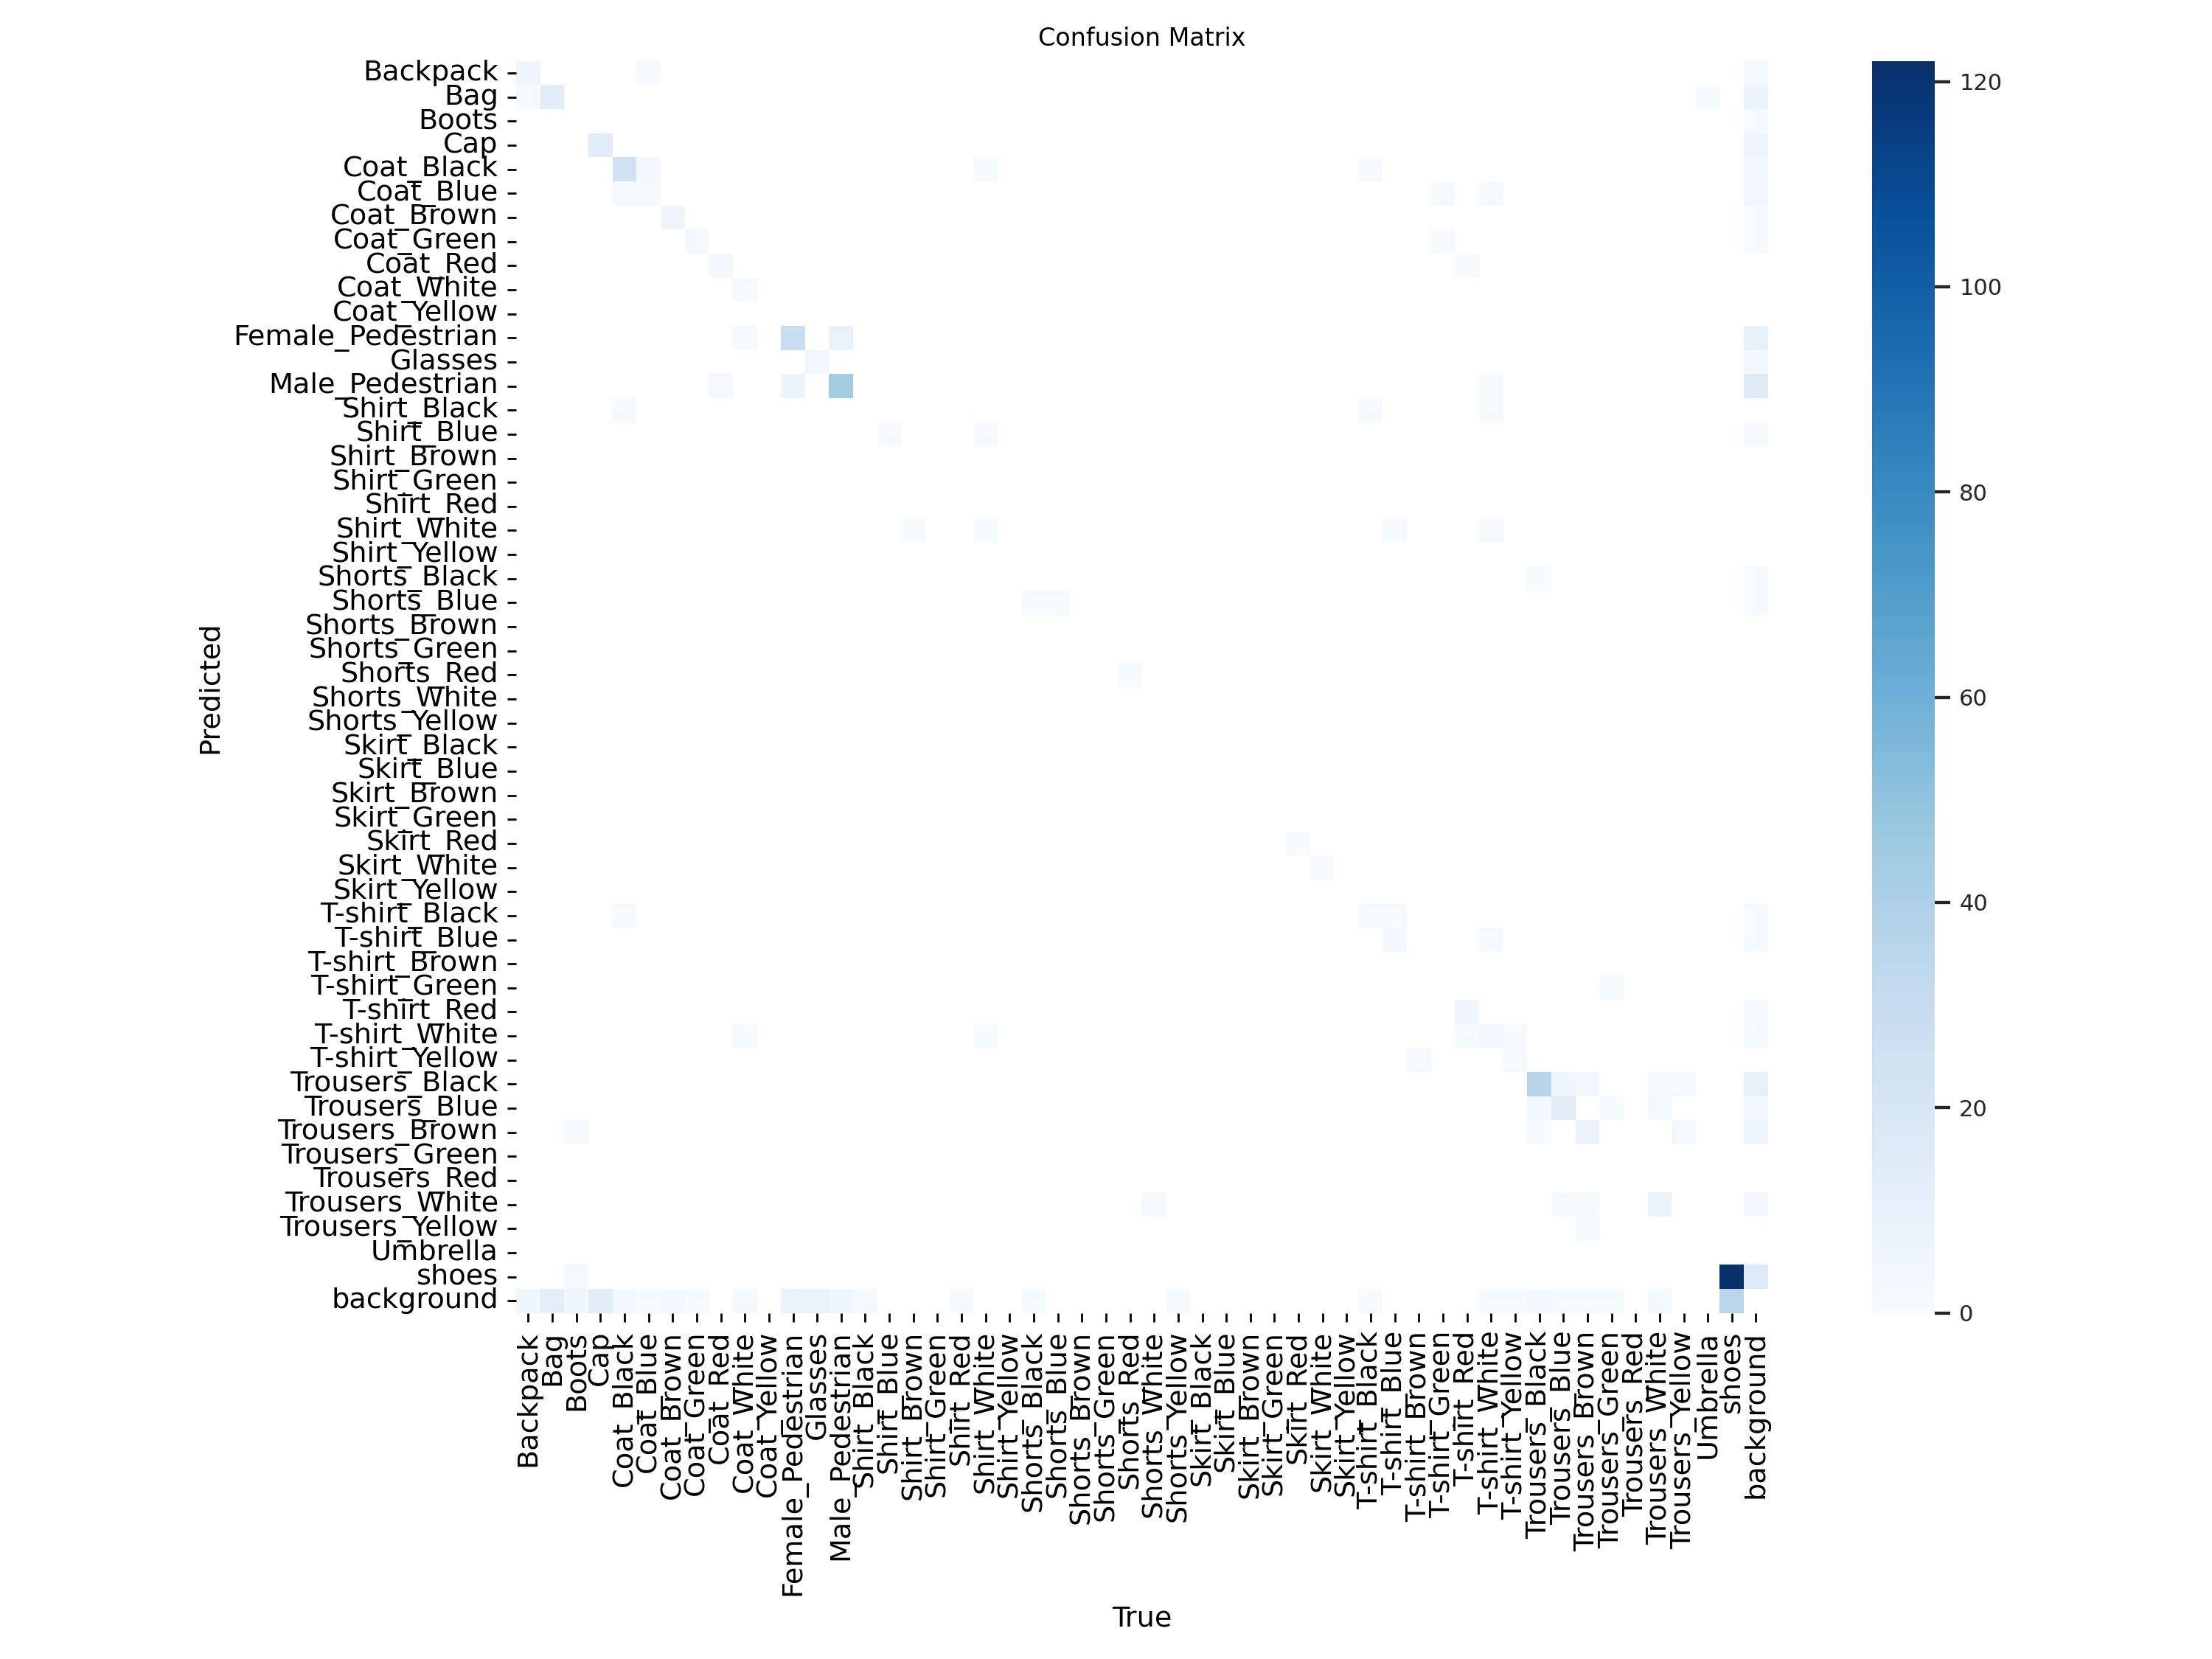

In [20]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=1000)

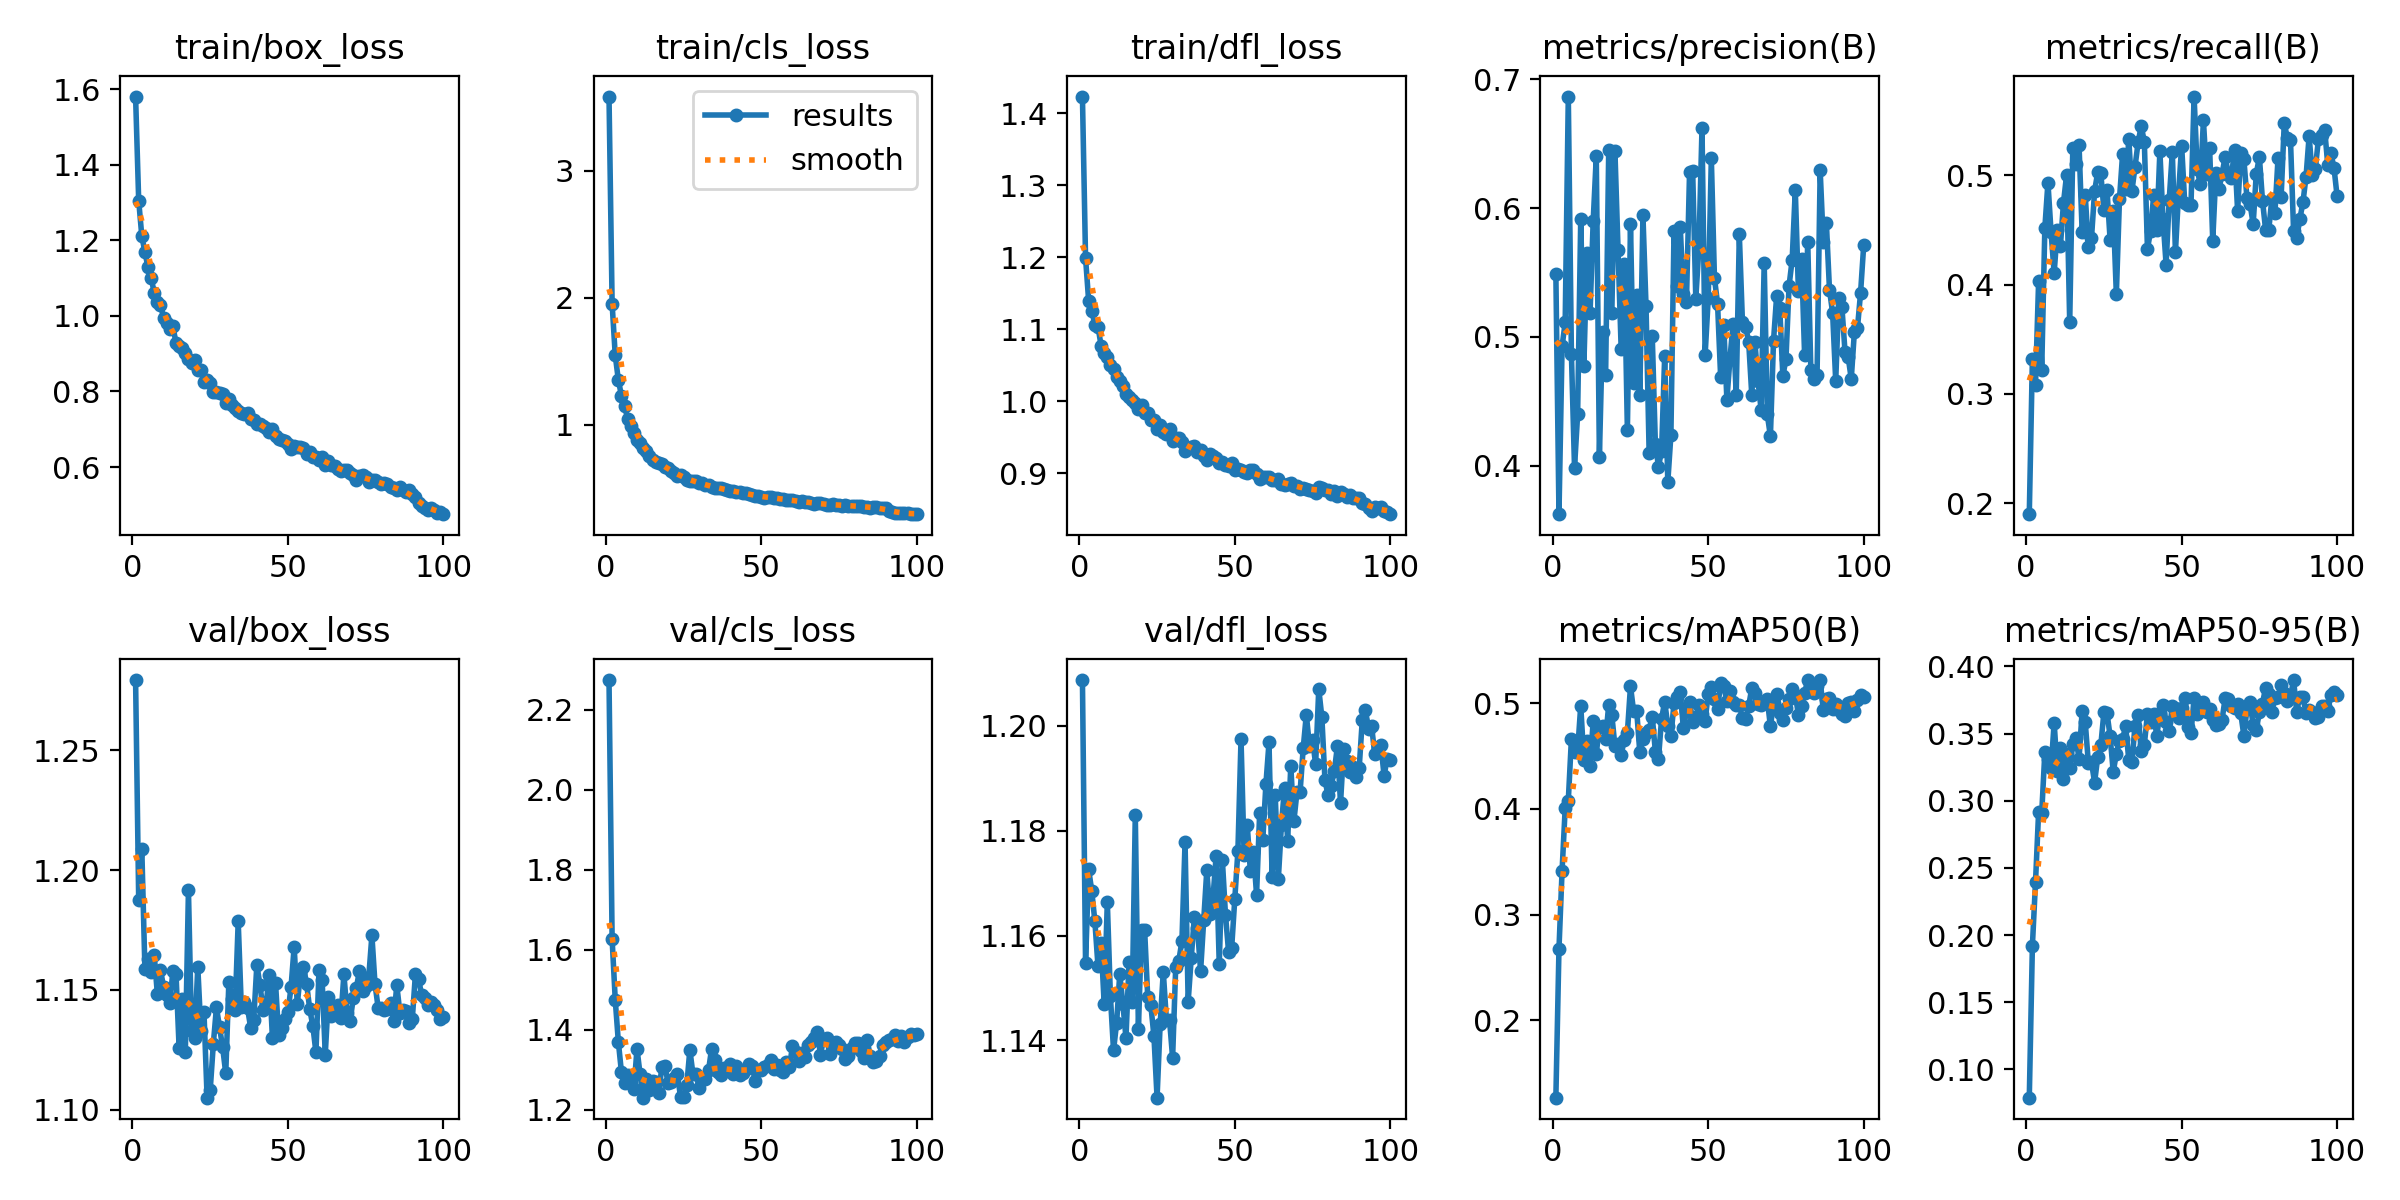

In [21]:
Image(filename=f'runs/detect/train/results.png', width=600)

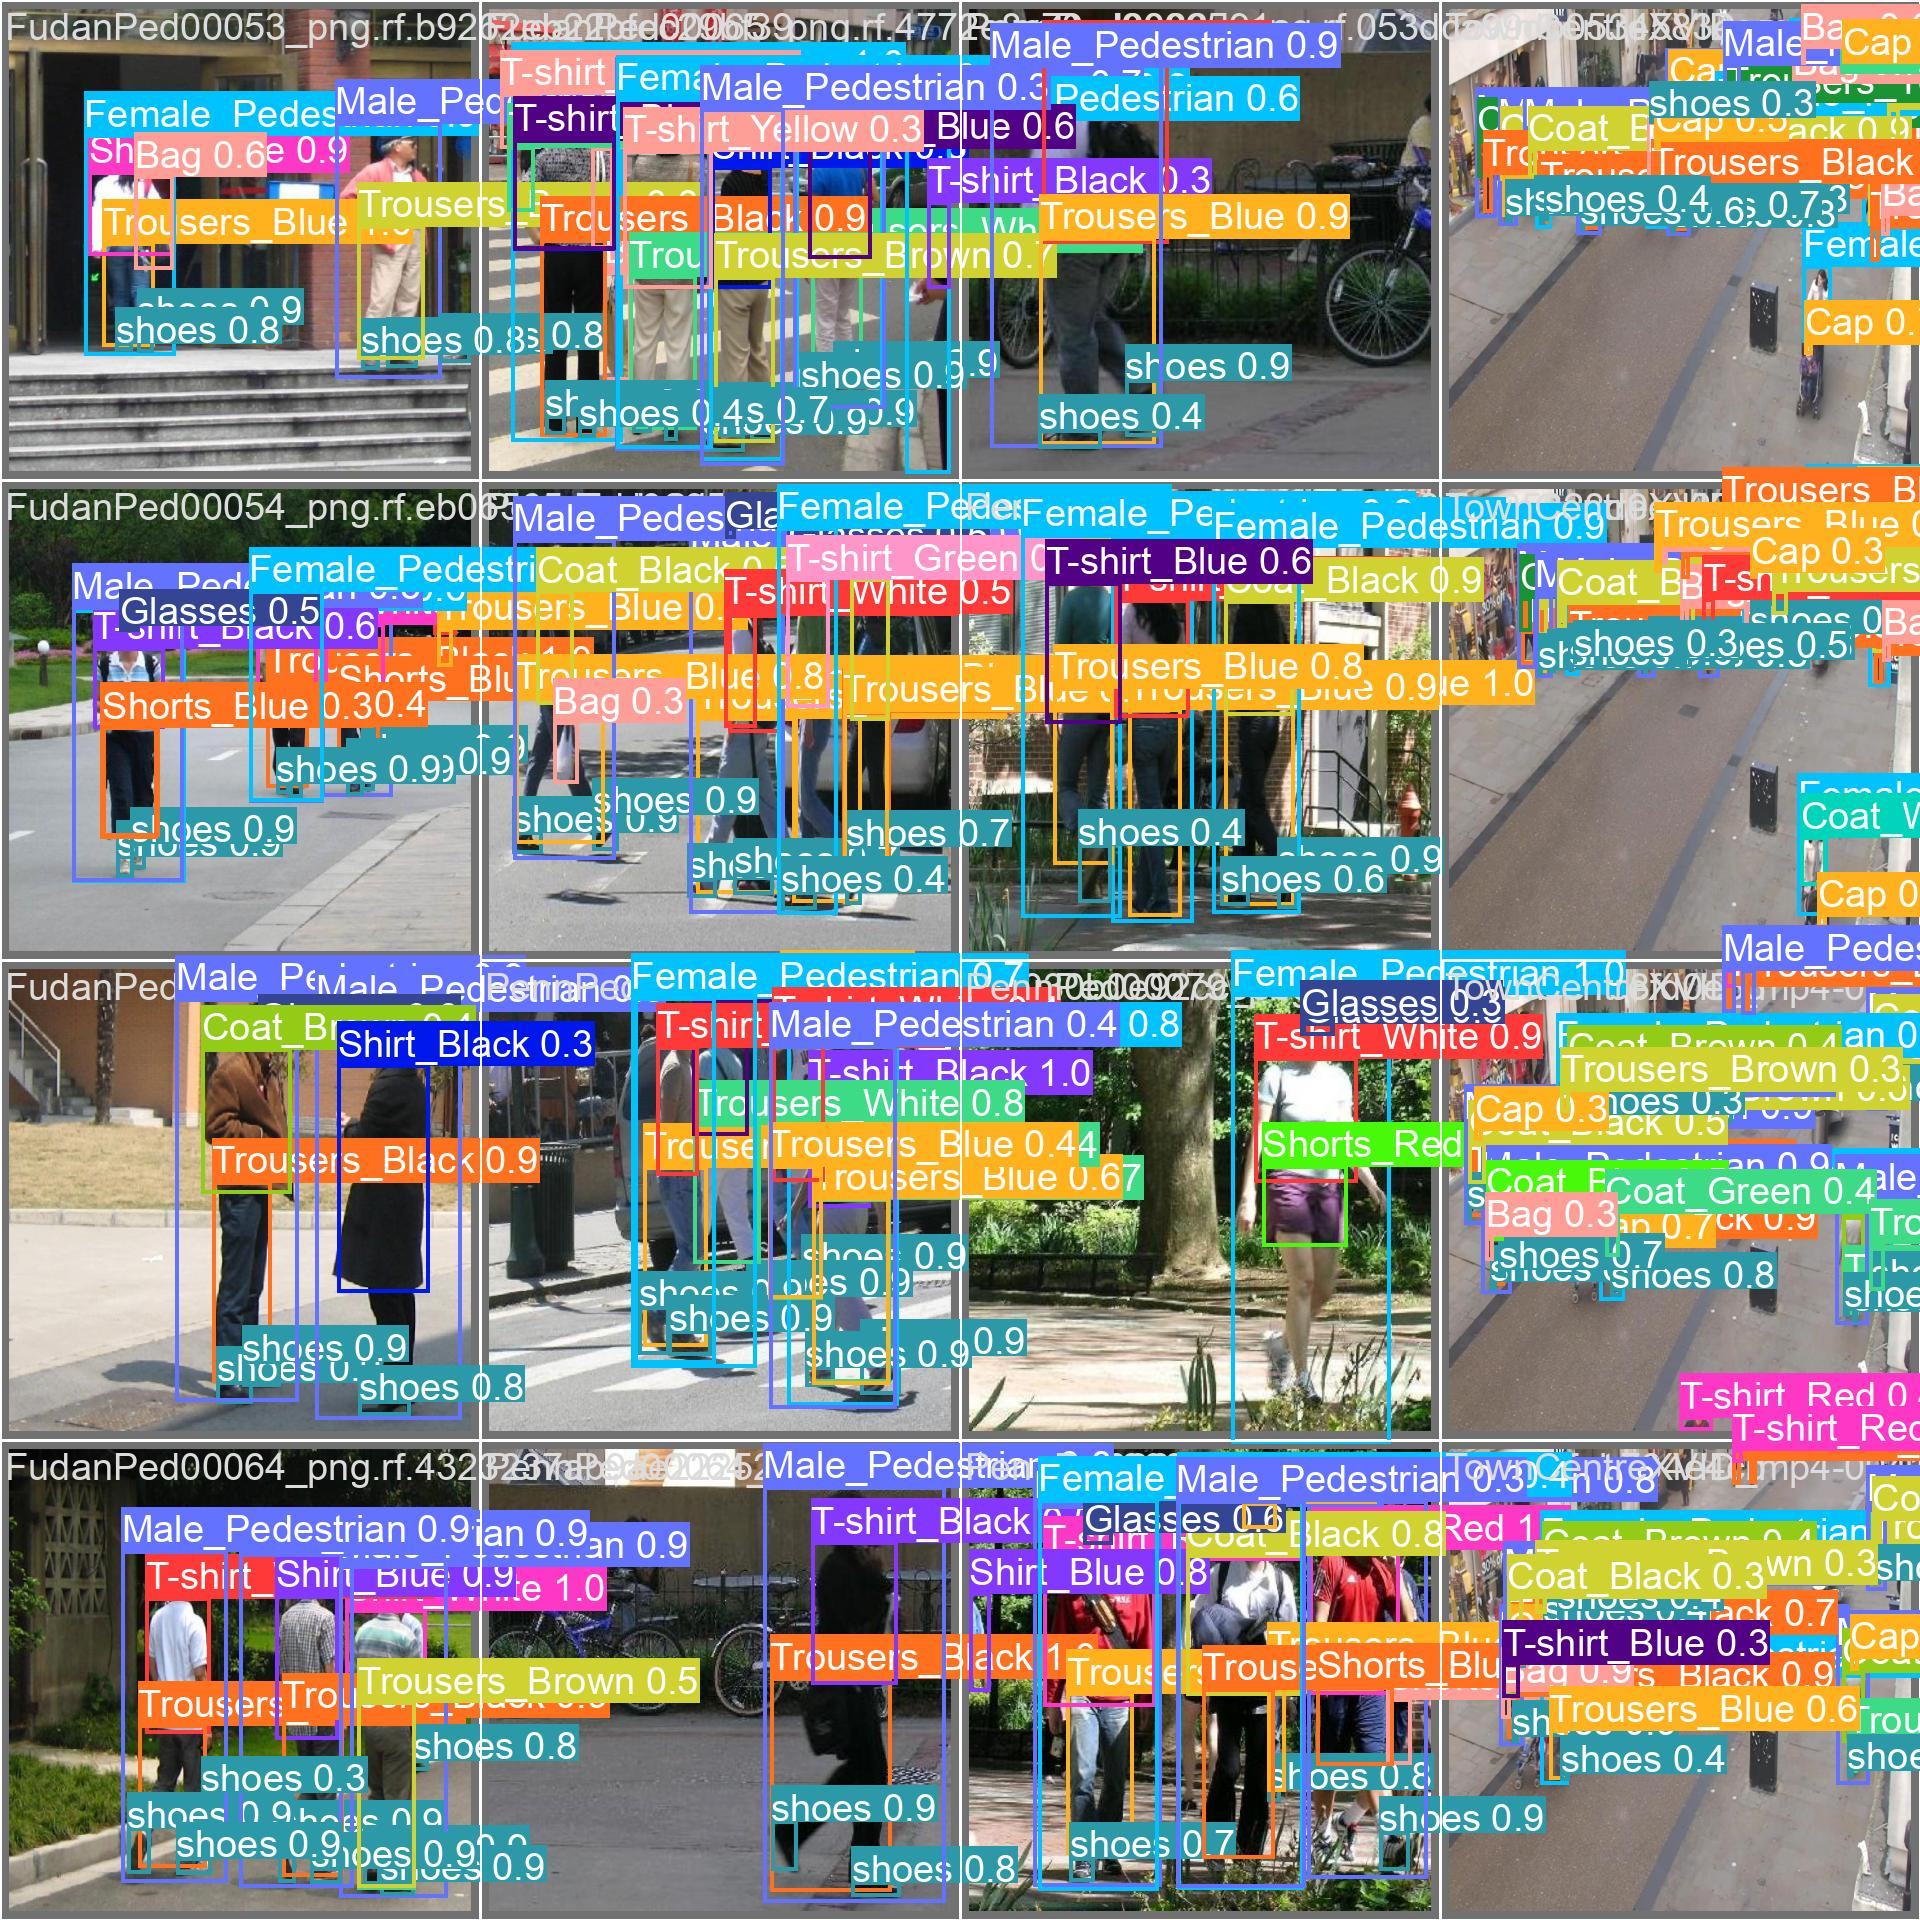

In [22]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [23]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/kaggle/input/fyp-datasetv2/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Model summary (fused): 218 layers, 25869289 parameters, 0 gradients, 78.8 GFLOPs

val: Scanning /kaggle/input/fyp-datasetv2/valid/labels...:   0%|          | 0/20


val: Scanning /kaggle/input/fyp-datasetv2/valid/labels... 20 images, 0 backgroun
val: WARNING ⚠️ Cache directory /kaggle/input/fyp-datasetv2/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m


                 Class     Images  Instances      Box(P          R      mAP50  m
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         20        556      0.629      0.449      0.522      0.391
              Backpack         20         12      0.668        0.5      0.626      0.435
                   Bag         20         25      0.588       0.48      0.612      0.364
                 Boots         20          8      0.388     0.0969       0.12     0.0532
                   Cap         20         27       0.65      0.412      0.634      0.457
            Coat_Black         20         32      0.747      0.781      0.842      0.443
             Coat_Blue         20          7      0.253      0.391      0.342      0.196
            Coat_Brown         20          9      0.818      0.667      0.722      0.478
            Coat_Green         20          3      0.464      0.667      0.665      0.438
              Coat_Red         20          5      0.649        0.6      0.493      0.313
            Coat_White         20          5       0.65        0.2      0.666      0.295
     Female_Pedestria

Speed: 6.7ms preprocess, 86.0ms inference, 0.0ms loss, 51.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [24]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/fyp-datasetv2/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)


Model summary (fused): 218 layers, 25869289 parameters, 0 gradients, 78.8 GFLOPs



image 1/20 /kaggle/input/fyp-datasetv2/test/images/FudanPed00057_png.rf.4ef63ddbce80dc7c87a2f7001cce5d48.jpg: 800x800 1 Backpack, 1 Bag, 1 Coat_Black, 4 Female_Pedestrians, 3 Male_Pedestrians, 1 Shirt_Blue, 2 T-shirt_Whites, 2 Trousers_Blacks, 2 Trousers_Blues, 2 Trousers_Whites, 9 shoess, 20.6ms


image 2/20 /kaggle/input/fyp-datasetv2/test/images/FudanPed00061_png.rf.ef8f22d1c8262dbea979921bd9f0d233.jpg: 800x800 3 Coat_Blacks, 2 Female_Pedestrians, 1 Glasses, 1 Male_Pedestrian, 3 Trousers_Blacks, 4 shoess, 20.8ms


image 3/20 /kaggle/input/fyp-datasetv2/test/images/FudanPed00063_png.rf.a7b833aa0755423bcf15d2e426f3ec94.jpg: 800x800 1 Bag, 1 Coat_Black, 2 Female_Pedestrians, 2 Male_Pedestrians, 1 Shirt_Blue, 1 Shirt_White, 3 Trousers_Blues, 1 Trousers_Brown, 4 shoess, 20.8ms


image 4/20 /kaggle/input/fyp-datasetv2/test/images/PennPed00059_png.rf.21b4b6478adf6d21464f56b7450580e5.jpg: 800x800 1 Backpack, 1 Bag, 2 Female_Pedestrians, 1 Glasses, 1 Male_Pedestrian, 1 T-shirt_White, 1 Trousers_Green, 3 shoess, 20.9ms


image 5/20 /kaggle/input/fyp-datasetv2/test/images/PennPed00077_png.rf.a00bea7ecf8e12943dc783257d786ed0.jpg: 800x800 1 Coat_Black, 1 Male_Pedestrian, 1 Trousers_Brown, 1 Trousers_White, 2 shoess, 20.6ms


image 6/20 /kaggle/input/fyp-datasetv2/test/images/PennPed00085_png.rf.73bec04a9ce9ad7d96177bd9a4c41819.jpg: 800x800 1 Female_Pedestrian, 2 Male_Pedestrians, 1 T-shirt_Blue, 1 T-shirt_White, 2 shoess, 20.9ms


image 7/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0000_jpg.rf.483c5d7664c89fbf5190bac763f14879.jpg: 800x800 3 Caps, 4 Coat_Blacks, 1 Coat_Brown, 1 Coat_Red, 2 Female_Pedestrians, 5 Male_Pedestrians, 1 Shirt_Blue, 5 Trousers_Blacks, 3 Trousers_Blues, 1 Trousers_White, 2 Trousers_Yellows, 1 Umbrella, 5 shoess, 20.6ms


image 8/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0036_jpg.rf.dab643e6abd115c429ab4fd1418b0729.jpg: 800x800 2 Backpacks, 3 Bags, 2 Coat_Blacks, 1 Coat_Brown, 1 Coat_Green, 1 Coat_Red, 4 Female_Pedestrians, 6 Male_Pedestrians, 1 Shirt_Black, 1 T-shirt_Red, 7 Trousers_Blacks, 3 Trousers_Browns, 2 Trousers_Whites, 8 shoess, 20.9ms


image 9/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0042_jpg.rf.ba27c01ed8d80db7b82329ed6aae5011.jpg: 800x800 1 Bag, 1 Cap, 2 Coat_Blacks, 2 Coat_Blues, 2 Coat_Browns, 1 Coat_Green, 2 Female_Pedestrians, 5 Male_Pedestrians, 1 T-shirt_Red, 4 Trousers_Blacks, 1 Trousers_Brown, 2 Trousers_Whites, 8 shoess, 20.9ms


image 10/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0061_jpg.rf.d36367b2be1b6297bd9b27c294d58b14.jpg: 800x800 3 Backpacks, 5 Bags, 4 Caps, 7 Coat_Blacks, 2 Coat_Blues, 1 Coat_Brown, 1 Coat_Red, 2 Coat_Whites, 9 Female_Pedestrians, 12 Male_Pedestrians, 1 Skirt_Green, 1 Skirt_Red, 12 Trousers_Blacks, 2 Trousers_Blues, 1 Trousers_White, 14 shoess, 20.9ms


image 11/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0063_jpg.rf.1fb1d4e3f5249240cd16fa2b791fb386.jpg: 800x800 2 Backpacks, 2 Bags, 1 Boots, 5 Caps, 8 Coat_Blacks, 1 Coat_Brown, 1 Coat_Red, 3 Coat_Whites, 7 Female_Pedestrians, 8 Male_Pedestrians, 1 Skirt_Black, 1 Skirt_Red, 11 Trousers_Blacks, 2 Trousers_Blues, 1 Trousers_White, 7 shoess, 20.9ms


image 12/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0083_jpg.rf.c22006fde8bbeb80a730d3a7622612f4.jpg: 800x800 3 Backpacks, 4 Bags, 2 Bootss, 1 Cap, 4 Coat_Blacks, 2 Coat_Whites, 4 Female_Pedestrians, 6 Male_Pedestrians, 1 Shirt_Black, 4 Trousers_Blacks, 1 Trousers_Blue, 1 Trousers_Brown, 3 Trousers_Whites, 10 shoess, 20.5ms


image 13/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0084_jpg.rf.e865cbc0a78ac1280e0b2edbb7a51f40.jpg: 800x800 2 Backpacks, 4 Bags, 2 Bootss, 5 Caps, 5 Coat_Blacks, 2 Coat_Whites, 5 Female_Pedestrians, 4 Male_Pedestrians, 1 Shirt_Black, 1 Shorts_Green, 3 Trousers_Blacks, 2 Trousers_Blues, 1 Trousers_Brown, 1 Trousers_Red, 2 Trousers_Whites, 7 shoess, 20.7ms


image 14/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0112_jpg.rf.a8771b2f9a7e19eab7cf2bc3bec04e84.jpg: 800x800 2 Backpacks, 3 Bags, 2 Bootss, 3 Caps, 2 Coat_Blacks, 3 Coat_Browns, 2 Coat_Greens, 3 Coat_Reds, 1 Coat_White, 6 Female_Pedestrians, 5 Male_Pedestrians, 1 T-shirt_Green, 6 Trousers_Blacks, 1 Trousers_Blue, 1 Trousers_Brown, 1 Trousers_White, 12 shoess, 20.7ms


image 15/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0129_jpg.rf.7f344d11eebb48d2f6a98cb8ed09c7e6.jpg: 800x800 3 Backpacks, 3 Bags, 1 Cap, 1 Coat_Black, 1 Coat_Brown, 1 Coat_Green, 1 Coat_Red, 3 Female_Pedestrians, 7 Male_Pedestrians, 1 Shirt_Blue, 1 T-shirt_Red, 1 Trousers_Black, 2 Trousers_Blues, 3 Trousers_Browns, 2 Trousers_Whites, 8 shoess, 20.7ms


image 16/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0173_jpg.rf.0a31fa3472b47f23c7faaa89a64eed41.jpg: 800x800 1 Backpack, 3 Bags, 3 Bootss, 2 Caps, 1 Coat_Black, 2 Coat_Browns, 1 Coat_Green, 1 Coat_Yellow, 4 Female_Pedestrians, 3 Male_Pedestrians, 1 Shirt_White, 1 Shorts_Red, 1 Skirt_Yellow, 5 Trousers_Blacks, 3 Trousers_Blues, 14 shoess, 20.6ms


image 17/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0179_jpg.rf.b69eb64a24043663db0c860e52e7ae5a.jpg: 800x800 1 Backpack, 2 Bags, 3 Bootss, 2 Caps, 4 Coat_Blacks, 3 Coat_Browns, 2 Coat_Yellows, 5 Female_Pedestrians, 8 Male_Pedestrians, 1 Shirt_Black, 1 Shirt_White, 9 Trousers_Blacks, 1 Trousers_Blue, 2 Trousers_Browns, 2 Trousers_Whites, 16 shoess, 20.7ms


image 18/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0197_jpg.rf.671cbe326e4c7b3f49dbf7134e751ce0.jpg: 800x800 3 Bags, 1 Cap, 2 Coat_Blacks, 1 Coat_Brown, 1 Coat_Green, 2 Coat_Reds, 1 Coat_Yellow, 5 Female_Pedestrians, 3 Male_Pedestrians, 1 Shirt_Black, 1 Shirt_Red, 1 Shirt_Yellow, 2 Skirt_Reds, 1 T-shirt_Black, 5 Trousers_Blacks, 1 Trousers_White, 13 shoess, 20.7ms


image 19/20 /kaggle/input/fyp-datasetv2/test/images/TownCentreXVID_mp4-0247_jpg.rf.1ecdf5977249f3acf5e6a8d71de6ec58.jpg: 800x800 1 Backpack, 2 Bags, 3 Caps, 7 Coat_Blacks, 2 Coat_Browns, 2 Coat_Greens, 1 Coat_Yellow, 7 Female_Pedestrians, 8 Male_Pedestrians, 1 Skirt_Black, 1 Skirt_Red, 8 Trousers_Blacks, 5 Trousers_Blues, 3 Trousers_Browns, 1 Trousers_Red, 18 shoess, 20.8ms


image 20/20 /kaggle/input/fyp-datasetv2/test/images/test_mp4-0052_jpg.rf.ad087c00bb706b7bc473a304e681556f.jpg: 800x800 1 Coat_Green, 1 Female_Pedestrian, 1 Trousers_Black, 2 shoess, 20.7ms
Speed: 4.0ms preprocess, 20.7ms inference, 19.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Let's take a look at few results.

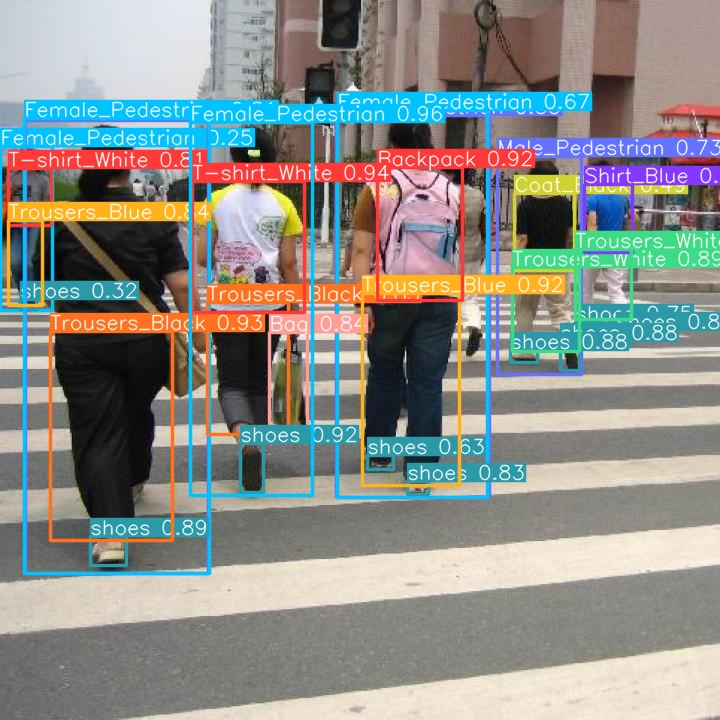

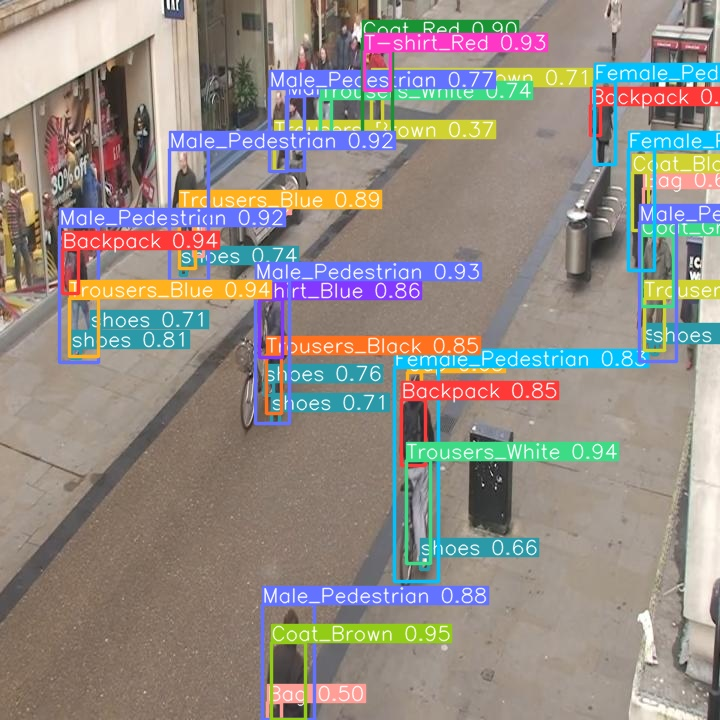

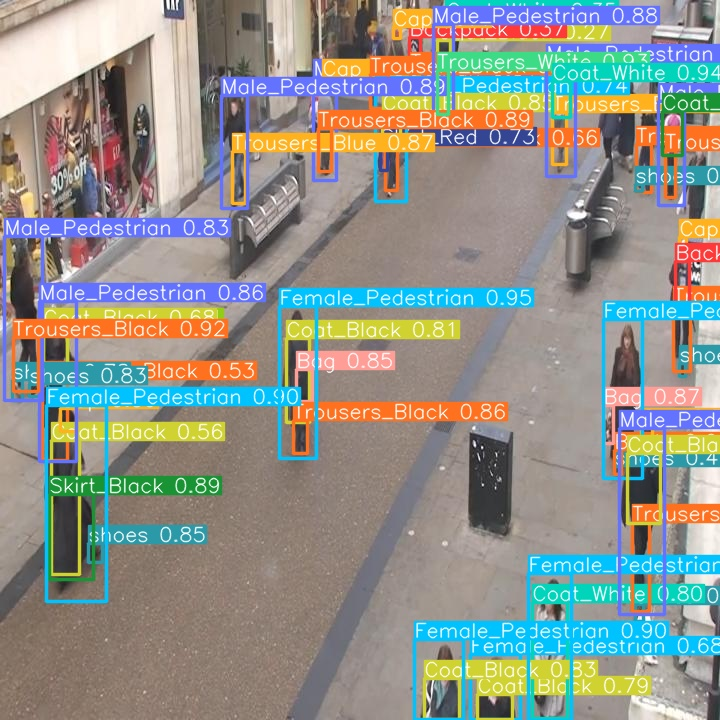

In [25]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")